In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [14]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import MaxPooling2D, Conv2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.image import central_crop, pad_to_bounding_box, resize
from tensorflow.keras.models import Model, load_model

In [5]:
df = pd.read_excel('data_file/나라별 여행지 라벨.xlsx')
datas = df[['en나라', 'en관광지']].values
datas

array([['Greece', 'Temple of Olympian Zeus'],
       ['Greece', 'Ancient Agora of Athens'],
       ['Greece', 'Santorini'],
       ['Germany', 'Neuschwanstein'],
       ['Germany', 'Brandenburg Gate'],
       ['Germany', 'Berliner Dom'],
       ['Germany', 'Hamburg Town Hall'],
       ['Germany', 'Cologne Cathedral'],
       ['Germany', 'Plonlein'],
       ['Spain', 'Sagrada Familia'],
       ['Spain', 'Casa Batllo'],
       ['Spain', 'Parc Guell'],
       ['Spain', 'Cordoba Mezquita'],
       ['England', 'Stonehenge'],
       ['England', 'Tower Bridge'],
       ['England', "St. Paul's Cathedral"],
       ['Italy', 'Colosseum'],
       ['Italy', 'Trevi Fountain'],
       ['Italy', 'Pantheon'],
       ['Italy', 'Bocca della Verita'],
       ['Italy', 'Arco di Costantino'],
       ['Italy', 'Basilica di San Marco'],
       ['Italy', 'Ponte di Rialto'],
       ['Italy', 'Campanile di San Marco'],
       ['Italy', 'Leaning Tower of Pisa'],
       ['Czech Republic', 'Staromestske namesti'],

In [13]:
li = ['train', 'validation', 'test']
for _ in li:
    print(f"{_} start")
    globals()[f"x_{_}"] = []
    globals()[f"y_{_}"] = []
    size = (128, 128)
    datas = df[['en나라', 'en관광지']].values
    for data in datas:
        country = data[0]
        #tour = data[1]
        path = f"country_img_gen/{_}/{country}"
        img_li = os.listdir(path)
        for img in img_li:
            print(img)
            img_path = f"{path}/{img}"
            img = load_img(img_path)
            img_array = img_to_array(img) / 255
            img_resize = resize(img_array, size)
            globals()[f"x_{_}"].append(np.array(img_resize))
            globals()[f"y_{_}"].append(country)
        print(f"{tour} transform Successful")

train start
Ancient Agora of Athens0.jpg
Ancient Agora of Athens1.jpg
Ancient Agora of Athens10.jpg
Ancient Agora of Athens100.jpg
Ancient Agora of Athens101.jpg
Ancient Agora of Athens102.jpg
Ancient Agora of Athens103.jpg
Ancient Agora of Athens104.jpg
Ancient Agora of Athens105.jpg
Ancient Agora of Athens106.jpg
Ancient Agora of Athens107.jpg
Ancient Agora of Athens108.jpg
Ancient Agora of Athens109.jpg
Ancient Agora of Athens11.jpg
Ancient Agora of Athens110.jpg
Ancient Agora of Athens111.jpg
Ancient Agora of Athens112.jpg
Ancient Agora of Athens113.jpg
Ancient Agora of Athens114.jpg
Ancient Agora of Athens115.jpg
Ancient Agora of Athens116.jpg
Ancient Agora of Athens117.jpg
Ancient Agora of Athens118.jpg
Ancient Agora of Athens119.jpg
Ancient Agora of Athens12.jpg
Ancient Agora of Athens120.jpg
Ancient Agora of Athens121.jpg
Ancient Agora of Athens122.jpg
Ancient Agora of Athens123.jpg
Ancient Agora of Athens124.jpg
Ancient Agora of Athens125.jpg
Ancient Agora of Athens126.jpg
Anc

Santorini20.jpg
Santorini200.jpg
Santorini201.jpg
Santorini202.jpg
Santorini203.jpg
Santorini204.jpg
Santorini205.jpg
Santorini206.jpg
Santorini207.jpg
Santorini208.jpg
Santorini209.jpg
Santorini21.jpg
Santorini210.jpg
Santorini211.jpg
Santorini212.jpg
Santorini213.jpg
Santorini214.jpg
Santorini215.jpg
Santorini216.jpg
Santorini217.jpg
Santorini218.jpg
Santorini219.jpg
Santorini22.jpg
Santorini220.jpg
Santorini221.jpg
Santorini222.jpg
Santorini223.jpg
Santorini224.jpg
Santorini225.jpg
Santorini226.jpg
Santorini227.jpg
Santorini228.jpg
Santorini229.jpg
Santorini23.jpg
Santorini230.jpg
Santorini231.jpg
Santorini232.jpg
Santorini233.jpg
Santorini234.jpg
Santorini235.jpg
Santorini236.jpg
Santorini237.jpg
Santorini238.jpg
Santorini239.jpg
Santorini24.jpg
Santorini240.jpg
Santorini241.jpg
Santorini242.jpg
Santorini243.jpg
Santorini244.jpg
Santorini245.jpg
Santorini246.jpg
Santorini247.jpg
Santorini248.jpg
Santorini249.jpg
Santorini25.jpg
Santorini250.jpg
Santorini251.jpg
Santorini252.jpg
San

Santorini637.jpg
Santorini638.jpg
Santorini639.jpg
Santorini64.jpg
Santorini640.jpg
Santorini641.jpg
Santorini642.jpg
Santorini643.jpg
Santorini644.jpg
Santorini645.jpg
Santorini646.jpg
Santorini647.jpg
Santorini648.jpg
Santorini649.jpg
Santorini65.jpg
Santorini650.jpg
Santorini651.jpg
Santorini652.jpg
Santorini653.jpg
Santorini654.jpg
Santorini655.jpg
Santorini656.jpg
Santorini657.jpg
Santorini658.jpg
Santorini659.jpg
Santorini66.jpg
Santorini660.jpg
Santorini661.jpg
Santorini662.jpg
Santorini663.jpg
Santorini664.jpg
Santorini665.jpg
Santorini666.jpg
Santorini667.jpg
Santorini668.jpg
Santorini669.jpg
Santorini67.jpg
Santorini670.jpg
Santorini671.jpg
Santorini672.jpg
Santorini673.jpg
Santorini674.jpg
Santorini675.jpg
Santorini676.jpg
Santorini677.jpg
Santorini678.jpg
Santorini679.jpg
Santorini68.jpg
Santorini680.jpg
Santorini681.jpg
Santorini682.jpg
Santorini683.jpg
Santorini684.jpg
Santorini685.jpg
Santorini686.jpg
Santorini687.jpg
Santorini688.jpg
Santorini689.jpg
Santorini69.jpg
San

Temple of Olympian Zeus229.jpg
Temple of Olympian Zeus23.jpg
Temple of Olympian Zeus230.jpg
Temple of Olympian Zeus231.jpg
Temple of Olympian Zeus232.jpg
Temple of Olympian Zeus233.jpg
Temple of Olympian Zeus234.jpg
Temple of Olympian Zeus235.jpg
Temple of Olympian Zeus236.jpg
Temple of Olympian Zeus237.jpg
Temple of Olympian Zeus238.jpg
Temple of Olympian Zeus239.jpg
Temple of Olympian Zeus24.jpg
Temple of Olympian Zeus240.jpg
Temple of Olympian Zeus241.jpg
Temple of Olympian Zeus242.jpg
Temple of Olympian Zeus243.jpg
Temple of Olympian Zeus244.jpg
Temple of Olympian Zeus245.jpg
Temple of Olympian Zeus246.jpg
Temple of Olympian Zeus247.jpg
Temple of Olympian Zeus248.jpg
Temple of Olympian Zeus249.jpg
Temple of Olympian Zeus25.jpg
Temple of Olympian Zeus250.jpg
Temple of Olympian Zeus251.jpg
Temple of Olympian Zeus252.jpg
Temple of Olympian Zeus253.jpg
Temple of Olympian Zeus254.jpg
Temple of Olympian Zeus255.jpg
Temple of Olympian Zeus256.jpg
Temple of Olympian Zeus257.jpg
Temple of O

Temple of Olympian Zeus474.jpg
Temple of Olympian Zeus475.jpg
Temple of Olympian Zeus476.jpg
Temple of Olympian Zeus477.jpg
Temple of Olympian Zeus478.jpg
Temple of Olympian Zeus479.jpg
Temple of Olympian Zeus48.jpg
Temple of Olympian Zeus480.jpg
Temple of Olympian Zeus481.jpg
Temple of Olympian Zeus482.jpg
Temple of Olympian Zeus483.jpg
Temple of Olympian Zeus484.jpg
Temple of Olympian Zeus485.jpg
Temple of Olympian Zeus486.jpg
Temple of Olympian Zeus487.jpg
Temple of Olympian Zeus488.jpg
Temple of Olympian Zeus489.jpg
Temple of Olympian Zeus49.jpg
Temple of Olympian Zeus490.jpg
Temple of Olympian Zeus491.jpg
Temple of Olympian Zeus492.jpg
Temple of Olympian Zeus493.jpg
Temple of Olympian Zeus494.jpg
Temple of Olympian Zeus495.jpg
Temple of Olympian Zeus496.jpg
Temple of Olympian Zeus497.jpg
Temple of Olympian Zeus498.jpg
Temple of Olympian Zeus499.jpg
Temple of Olympian Zeus5.jpg
Temple of Olympian Zeus50.jpg
Temple of Olympian Zeus500.jpg
Temple of Olympian Zeus501.jpg
Temple of Oly

Ancient Agora of Athens3.jpg
Ancient Agora of Athens30.jpg
Ancient Agora of Athens31.jpg
Ancient Agora of Athens32.jpg
Ancient Agora of Athens33.jpg
Ancient Agora of Athens34.jpg
Ancient Agora of Athens35.jpg
Ancient Agora of Athens36.jpg
Ancient Agora of Athens37.jpg
Ancient Agora of Athens38.jpg
Ancient Agora of Athens39.jpg
Ancient Agora of Athens4.jpg
Ancient Agora of Athens40.jpg
Ancient Agora of Athens41.jpg
Ancient Agora of Athens42.jpg
Ancient Agora of Athens43.jpg
Ancient Agora of Athens44.jpg
Ancient Agora of Athens45.jpg
Ancient Agora of Athens46.jpg
Ancient Agora of Athens47.jpg
Ancient Agora of Athens48.jpg
Ancient Agora of Athens49.jpg
Ancient Agora of Athens5.jpg
Ancient Agora of Athens50.jpg
Ancient Agora of Athens51.jpg
Ancient Agora of Athens52.jpg
Ancient Agora of Athens53.jpg
Ancient Agora of Athens54.jpg
Ancient Agora of Athens55.jpg
Ancient Agora of Athens56.jpg
Ancient Agora of Athens57.jpg
Ancient Agora of Athens58.jpg
Ancient Agora of Athens59.jpg
Ancient Agora

Santorini43.jpg
Santorini430.jpg
Santorini431.jpg
Santorini432.jpg
Santorini433.jpg
Santorini434.jpg
Santorini435.jpg
Santorini436.jpg
Santorini437.jpg
Santorini438.jpg
Santorini439.jpg
Santorini44.jpg
Santorini440.jpg
Santorini441.jpg
Santorini442.jpg
Santorini443.jpg
Santorini444.jpg
Santorini445.jpg
Santorini446.jpg
Santorini447.jpg
Santorini448.jpg
Santorini449.jpg
Santorini45.jpg
Santorini450.jpg
Santorini451.jpg
Santorini452.jpg
Santorini453.jpg
Santorini454.jpg
Santorini455.jpg
Santorini456.jpg
Santorini457.jpg
Santorini458.jpg
Santorini459.jpg
Santorini46.jpg
Santorini460.jpg
Santorini461.jpg
Santorini462.jpg
Santorini463.jpg
Santorini464.jpg
Santorini465.jpg
Santorini466.jpg
Santorini467.jpg
Santorini468.jpg
Santorini469.jpg
Santorini47.jpg
Santorini470.jpg
Santorini471.jpg
Santorini472.jpg
Santorini473.jpg
Santorini474.jpg
Santorini475.jpg
Santorini476.jpg
Santorini477.jpg
Santorini478.jpg
Santorini479.jpg
Santorini48.jpg
Santorini480.jpg
Santorini481.jpg
Santorini482.jpg
San

Temple of Olympian Zeus1.jpg
Temple of Olympian Zeus10.jpg
Temple of Olympian Zeus100.jpg
Temple of Olympian Zeus101.jpg
Temple of Olympian Zeus102.jpg
Temple of Olympian Zeus103.jpg
Temple of Olympian Zeus104.jpg
Temple of Olympian Zeus105.jpg
Temple of Olympian Zeus106.jpg
Temple of Olympian Zeus107.jpg
Temple of Olympian Zeus108.jpg
Temple of Olympian Zeus109.jpg
Temple of Olympian Zeus11.jpg
Temple of Olympian Zeus110.jpg
Temple of Olympian Zeus111.jpg
Temple of Olympian Zeus112.jpg
Temple of Olympian Zeus113.jpg
Temple of Olympian Zeus114.jpg
Temple of Olympian Zeus115.jpg
Temple of Olympian Zeus116.jpg
Temple of Olympian Zeus117.jpg
Temple of Olympian Zeus118.jpg
Temple of Olympian Zeus119.jpg
Temple of Olympian Zeus12.jpg
Temple of Olympian Zeus120.jpg
Temple of Olympian Zeus121.jpg
Temple of Olympian Zeus122.jpg
Temple of Olympian Zeus123.jpg
Temple of Olympian Zeus124.jpg
Temple of Olympian Zeus125.jpg
Temple of Olympian Zeus126.jpg
Temple of Olympian Zeus127.jpg
Temple of Oly

Temple of Olympian Zeus34.jpg
Temple of Olympian Zeus340.jpg
Temple of Olympian Zeus341.jpg
Temple of Olympian Zeus342.jpg
Temple of Olympian Zeus343.jpg
Temple of Olympian Zeus344.jpg
Temple of Olympian Zeus345.jpg
Temple of Olympian Zeus346.jpg
Temple of Olympian Zeus347.jpg
Temple of Olympian Zeus348.jpg
Temple of Olympian Zeus349.jpg
Temple of Olympian Zeus35.jpg
Temple of Olympian Zeus350.jpg
Temple of Olympian Zeus351.jpg
Temple of Olympian Zeus352.jpg
Temple of Olympian Zeus353.jpg
Temple of Olympian Zeus354.jpg
Temple of Olympian Zeus355.jpg
Temple of Olympian Zeus356.jpg
Temple of Olympian Zeus357.jpg
Temple of Olympian Zeus358.jpg
Temple of Olympian Zeus359.jpg
Temple of Olympian Zeus36.jpg
Temple of Olympian Zeus360.jpg
Temple of Olympian Zeus361.jpg
Temple of Olympian Zeus362.jpg
Temple of Olympian Zeus363.jpg
Temple of Olympian Zeus364.jpg
Temple of Olympian Zeus365.jpg
Temple of Olympian Zeus366.jpg
Temple of Olympian Zeus367.jpg
Temple of Olympian Zeus368.jpg
Temple of O

Temple of Olympian Zeus97.jpg
Temple of Olympian Zeus98.jpg
Temple of Olympian Zeus99.jpg
Temple of Olympian Zeus transform Successful
Ancient Agora of Athens0.jpg
Ancient Agora of Athens1.jpg
Ancient Agora of Athens10.jpg
Ancient Agora of Athens100.jpg
Ancient Agora of Athens101.jpg
Ancient Agora of Athens102.jpg
Ancient Agora of Athens103.jpg
Ancient Agora of Athens104.jpg
Ancient Agora of Athens105.jpg
Ancient Agora of Athens106.jpg
Ancient Agora of Athens107.jpg
Ancient Agora of Athens108.jpg
Ancient Agora of Athens109.jpg
Ancient Agora of Athens11.jpg
Ancient Agora of Athens110.jpg
Ancient Agora of Athens111.jpg
Ancient Agora of Athens112.jpg
Ancient Agora of Athens113.jpg
Ancient Agora of Athens114.jpg
Ancient Agora of Athens115.jpg
Ancient Agora of Athens116.jpg
Ancient Agora of Athens117.jpg
Ancient Agora of Athens118.jpg
Ancient Agora of Athens119.jpg
Ancient Agora of Athens12.jpg
Ancient Agora of Athens120.jpg
Ancient Agora of Athens121.jpg
Ancient Agora of Athens122.jpg
Anci

Santorini186.jpg
Santorini187.jpg
Santorini188.jpg
Santorini189.jpg
Santorini19.jpg
Santorini190.jpg
Santorini191.jpg
Santorini192.jpg
Santorini193.jpg
Santorini194.jpg
Santorini195.jpg
Santorini196.jpg
Santorini197.jpg
Santorini198.jpg
Santorini199.jpg
Santorini2.jpg
Santorini20.jpg
Santorini200.jpg
Santorini201.jpg
Santorini202.jpg
Santorini203.jpg
Santorini204.jpg
Santorini205.jpg
Santorini206.jpg
Santorini207.jpg
Santorini208.jpg
Santorini209.jpg
Santorini21.jpg
Santorini210.jpg
Santorini211.jpg
Santorini212.jpg
Santorini213.jpg
Santorini214.jpg
Santorini215.jpg
Santorini216.jpg
Santorini217.jpg
Santorini218.jpg
Santorini219.jpg
Santorini22.jpg
Santorini220.jpg
Santorini221.jpg
Santorini222.jpg
Santorini223.jpg
Santorini224.jpg
Santorini225.jpg
Santorini226.jpg
Santorini227.jpg
Santorini228.jpg
Santorini229.jpg
Santorini23.jpg
Santorini230.jpg
Santorini231.jpg
Santorini232.jpg
Santorini233.jpg
Santorini234.jpg
Santorini235.jpg
Santorini236.jpg
Santorini237.jpg
Santorini238.jpg
Sant

Santorini640.jpg
Santorini641.jpg
Santorini642.jpg
Santorini643.jpg
Santorini644.jpg
Santorini645.jpg
Santorini646.jpg
Santorini647.jpg
Santorini648.jpg
Santorini649.jpg
Santorini65.jpg
Santorini650.jpg
Santorini651.jpg
Santorini652.jpg
Santorini653.jpg
Santorini654.jpg
Santorini655.jpg
Santorini656.jpg
Santorini657.jpg
Santorini658.jpg
Santorini659.jpg
Santorini66.jpg
Santorini660.jpg
Santorini661.jpg
Santorini662.jpg
Santorini663.jpg
Santorini664.jpg
Santorini665.jpg
Santorini666.jpg
Santorini667.jpg
Santorini668.jpg
Santorini669.jpg
Santorini67.jpg
Santorini670.jpg
Santorini671.jpg
Santorini672.jpg
Santorini673.jpg
Santorini674.jpg
Santorini675.jpg
Santorini676.jpg
Santorini677.jpg
Santorini678.jpg
Santorini679.jpg
Santorini68.jpg
Santorini680.jpg
Santorini681.jpg
Santorini682.jpg
Santorini683.jpg
Santorini684.jpg
Santorini685.jpg
Santorini686.jpg
Santorini687.jpg
Santorini688.jpg
Santorini689.jpg
Santorini69.jpg
Santorini690.jpg
Santorini691.jpg
Santorini692.jpg
Santorini693.jpg
Sa

Temple of Olympian Zeus220.jpg
Temple of Olympian Zeus221.jpg
Temple of Olympian Zeus222.jpg
Temple of Olympian Zeus223.jpg
Temple of Olympian Zeus224.jpg
Temple of Olympian Zeus225.jpg
Temple of Olympian Zeus226.jpg
Temple of Olympian Zeus227.jpg
Temple of Olympian Zeus228.jpg
Temple of Olympian Zeus229.jpg
Temple of Olympian Zeus23.jpg
Temple of Olympian Zeus230.jpg
Temple of Olympian Zeus231.jpg
Temple of Olympian Zeus232.jpg
Temple of Olympian Zeus233.jpg
Temple of Olympian Zeus234.jpg
Temple of Olympian Zeus235.jpg
Temple of Olympian Zeus236.jpg
Temple of Olympian Zeus237.jpg
Temple of Olympian Zeus238.jpg
Temple of Olympian Zeus239.jpg
Temple of Olympian Zeus24.jpg
Temple of Olympian Zeus240.jpg
Temple of Olympian Zeus241.jpg
Temple of Olympian Zeus242.jpg
Temple of Olympian Zeus243.jpg
Temple of Olympian Zeus244.jpg
Temple of Olympian Zeus245.jpg
Temple of Olympian Zeus246.jpg
Temple of Olympian Zeus247.jpg
Temple of Olympian Zeus248.jpg
Temple of Olympian Zeus249.jpg
Temple of 

Temple of Olympian Zeus469.jpg
Temple of Olympian Zeus47.jpg
Temple of Olympian Zeus470.jpg
Temple of Olympian Zeus471.jpg
Temple of Olympian Zeus472.jpg
Temple of Olympian Zeus473.jpg
Temple of Olympian Zeus474.jpg
Temple of Olympian Zeus475.jpg
Temple of Olympian Zeus476.jpg
Temple of Olympian Zeus477.jpg
Temple of Olympian Zeus478.jpg
Temple of Olympian Zeus479.jpg
Temple of Olympian Zeus48.jpg
Temple of Olympian Zeus480.jpg
Temple of Olympian Zeus481.jpg
Temple of Olympian Zeus482.jpg
Temple of Olympian Zeus483.jpg
Temple of Olympian Zeus484.jpg
Temple of Olympian Zeus485.jpg
Temple of Olympian Zeus486.jpg
Temple of Olympian Zeus487.jpg
Temple of Olympian Zeus488.jpg
Temple of Olympian Zeus489.jpg
Temple of Olympian Zeus49.jpg
Temple of Olympian Zeus490.jpg
Temple of Olympian Zeus491.jpg
Temple of Olympian Zeus492.jpg
Temple of Olympian Zeus493.jpg
Temple of Olympian Zeus494.jpg
Temple of Olympian Zeus495.jpg
Temple of Olympian Zeus496.jpg
Temple of Olympian Zeus497.jpg
Temple of O

Berliner Dom278.jpg
Berliner Dom279.jpg
Berliner Dom28.jpg
Berliner Dom280.jpg
Berliner Dom281.jpg
Berliner Dom282.jpg
Berliner Dom283.jpg
Berliner Dom284.jpg
Berliner Dom285.jpg
Berliner Dom286.jpg
Berliner Dom287.jpg
Berliner Dom288.jpg
Berliner Dom289.jpg
Berliner Dom29.jpg
Berliner Dom290.jpg
Berliner Dom291.jpg
Berliner Dom292.jpg
Berliner Dom293.jpg
Berliner Dom294.jpg
Berliner Dom295.jpg
Berliner Dom296.jpg
Berliner Dom297.jpg
Berliner Dom298.jpg
Berliner Dom299.jpg
Berliner Dom3.jpg
Berliner Dom30.jpg
Berliner Dom300.jpg
Berliner Dom301.jpg
Berliner Dom302.jpg
Berliner Dom303.jpg
Berliner Dom304.jpg
Berliner Dom305.jpg
Berliner Dom306.jpg
Berliner Dom307.jpg
Berliner Dom308.jpg
Berliner Dom309.jpg
Berliner Dom31.jpg
Berliner Dom310.jpg
Berliner Dom311.jpg
Berliner Dom312.jpg
Berliner Dom313.jpg
Berliner Dom314.jpg
Berliner Dom315.jpg
Berliner Dom316.jpg
Berliner Dom317.jpg
Berliner Dom318.jpg
Berliner Dom319.jpg
Berliner Dom32.jpg
Berliner Dom320.jpg
Berliner Dom321.jpg
Berline

Brandenburg Gate13.jpg
Brandenburg Gate130.jpg
Brandenburg Gate131.jpg
Brandenburg Gate132.jpg
Brandenburg Gate133.jpg
Brandenburg Gate134.jpg
Brandenburg Gate135.jpg
Brandenburg Gate136.jpg
Brandenburg Gate137.jpg
Brandenburg Gate138.jpg
Brandenburg Gate139.jpg
Brandenburg Gate14.jpg
Brandenburg Gate140.jpg
Brandenburg Gate141.jpg
Brandenburg Gate142.jpg
Brandenburg Gate143.jpg
Brandenburg Gate144.jpg
Brandenburg Gate145.jpg
Brandenburg Gate146.jpg
Brandenburg Gate147.jpg
Brandenburg Gate148.jpg
Brandenburg Gate149.jpg
Brandenburg Gate15.jpg
Brandenburg Gate150.jpg
Brandenburg Gate151.jpg
Brandenburg Gate152.jpg
Brandenburg Gate153.jpg
Brandenburg Gate154.jpg
Brandenburg Gate155.jpg
Brandenburg Gate156.jpg
Brandenburg Gate157.jpg
Brandenburg Gate158.jpg
Brandenburg Gate159.jpg
Brandenburg Gate16.jpg
Brandenburg Gate160.jpg
Brandenburg Gate161.jpg
Brandenburg Gate162.jpg
Brandenburg Gate163.jpg
Brandenburg Gate164.jpg
Brandenburg Gate165.jpg
Brandenburg Gate166.jpg
Brandenburg Gate167.

Brandenburg Gate445.jpg
Brandenburg Gate446.jpg
Brandenburg Gate447.jpg
Brandenburg Gate448.jpg
Brandenburg Gate449.jpg
Brandenburg Gate45.jpg
Brandenburg Gate450.jpg
Brandenburg Gate451.jpg
Brandenburg Gate452.jpg
Brandenburg Gate453.jpg
Brandenburg Gate454.jpg
Brandenburg Gate455.jpg
Brandenburg Gate456.jpg
Brandenburg Gate457.jpg
Brandenburg Gate458.jpg
Brandenburg Gate459.jpg
Brandenburg Gate46.jpg
Brandenburg Gate460.jpg
Brandenburg Gate461.jpg
Brandenburg Gate462.jpg
Brandenburg Gate463.jpg
Brandenburg Gate464.jpg
Brandenburg Gate465.jpg
Brandenburg Gate466.jpg
Brandenburg Gate467.jpg
Brandenburg Gate468.jpg
Brandenburg Gate469.jpg
Brandenburg Gate47.jpg
Brandenburg Gate470.jpg
Brandenburg Gate471.jpg
Brandenburg Gate472.jpg
Brandenburg Gate473.jpg
Brandenburg Gate474.jpg
Brandenburg Gate475.jpg
Brandenburg Gate476.jpg
Brandenburg Gate477.jpg
Brandenburg Gate478.jpg
Brandenburg Gate479.jpg
Brandenburg Gate48.jpg
Brandenburg Gate480.jpg
Brandenburg Gate481.jpg
Brandenburg Gate482.

Cologne Cathedral135.jpg
Cologne Cathedral136.jpg
Cologne Cathedral137.jpg
Cologne Cathedral138.jpg
Cologne Cathedral139.jpg
Cologne Cathedral14.jpg
Cologne Cathedral140.jpg
Cologne Cathedral141.jpg
Cologne Cathedral142.jpg
Cologne Cathedral143.jpg
Cologne Cathedral144.jpg
Cologne Cathedral145.jpg
Cologne Cathedral146.jpg
Cologne Cathedral147.jpg
Cologne Cathedral148.jpg
Cologne Cathedral149.jpg
Cologne Cathedral15.jpg
Cologne Cathedral150.jpg
Cologne Cathedral151.jpg
Cologne Cathedral152.jpg
Cologne Cathedral153.jpg
Cologne Cathedral154.jpg
Cologne Cathedral155.jpg
Cologne Cathedral156.jpg
Cologne Cathedral157.jpg
Cologne Cathedral158.jpg
Cologne Cathedral159.jpg
Cologne Cathedral16.jpg
Cologne Cathedral160.jpg
Cologne Cathedral161.jpg
Cologne Cathedral162.jpg
Cologne Cathedral163.jpg
Cologne Cathedral164.jpg
Cologne Cathedral165.jpg
Cologne Cathedral166.jpg
Cologne Cathedral167.jpg
Cologne Cathedral168.jpg
Cologne Cathedral169.jpg
Cologne Cathedral17.jpg
Cologne Cathedral170.jpg
Colo

Hamburg Town Hall21.jpg
Hamburg Town Hall210.jpg
Hamburg Town Hall211.jpg
Hamburg Town Hall212.jpg
Hamburg Town Hall213.jpg
Hamburg Town Hall214.jpg
Hamburg Town Hall215.jpg
Hamburg Town Hall216.jpg
Hamburg Town Hall217.jpg
Hamburg Town Hall218.jpg
Hamburg Town Hall219.jpg
Hamburg Town Hall22.jpg
Hamburg Town Hall220.jpg
Hamburg Town Hall221.jpg
Hamburg Town Hall222.jpg
Hamburg Town Hall223.jpg
Hamburg Town Hall224.jpg
Hamburg Town Hall225.jpg
Hamburg Town Hall226.jpg
Hamburg Town Hall227.jpg
Hamburg Town Hall228.jpg
Hamburg Town Hall229.jpg
Hamburg Town Hall23.jpg
Hamburg Town Hall230.jpg
Hamburg Town Hall231.jpg
Hamburg Town Hall232.jpg
Hamburg Town Hall233.jpg
Hamburg Town Hall234.jpg
Hamburg Town Hall24.jpg
Hamburg Town Hall25.jpg
Hamburg Town Hall26.jpg
Hamburg Town Hall27.jpg
Hamburg Town Hall28.jpg
Hamburg Town Hall29.jpg
Hamburg Town Hall3.jpg
Hamburg Town Hall30.jpg
Hamburg Town Hall31.jpg
Hamburg Town Hall32.jpg
Hamburg Town Hall33.jpg
Hamburg Town Hall34.jpg
Hamburg Town Hal

Neuschwanstein331.jpg
Neuschwanstein332.jpg
Neuschwanstein333.jpg
Neuschwanstein334.jpg
Neuschwanstein335.jpg
Neuschwanstein336.jpg
Neuschwanstein337.jpg
Neuschwanstein338.jpg
Neuschwanstein339.jpg
Neuschwanstein34.jpg
Neuschwanstein340.jpg
Neuschwanstein341.jpg
Neuschwanstein342.jpg
Neuschwanstein343.jpg
Neuschwanstein344.jpg
Neuschwanstein345.jpg
Neuschwanstein346.jpg
Neuschwanstein347.jpg
Neuschwanstein348.jpg
Neuschwanstein349.jpg
Neuschwanstein35.jpg
Neuschwanstein350.jpg
Neuschwanstein351.jpg
Neuschwanstein352.jpg
Neuschwanstein353.jpg
Neuschwanstein354.jpg
Neuschwanstein355.jpg
Neuschwanstein356.jpg
Neuschwanstein357.jpg
Neuschwanstein358.jpg
Neuschwanstein359.jpg
Neuschwanstein36.jpg
Neuschwanstein360.jpg
Neuschwanstein361.jpg
Neuschwanstein362.jpg
Neuschwanstein363.jpg
Neuschwanstein364.jpg
Neuschwanstein365.jpg
Neuschwanstein366.jpg
Neuschwanstein367.jpg
Neuschwanstein368.jpg
Neuschwanstein369.jpg
Neuschwanstein37.jpg
Neuschwanstein370.jpg
Neuschwanstein371.jpg
Neuschwanstein

Berliner Dom121.jpg
Berliner Dom122.jpg
Berliner Dom123.jpg
Berliner Dom124.jpg
Berliner Dom125.jpg
Berliner Dom126.jpg
Berliner Dom127.jpg
Berliner Dom128.jpg
Berliner Dom129.jpg
Berliner Dom13.jpg
Berliner Dom130.jpg
Berliner Dom131.jpg
Berliner Dom132.jpg
Berliner Dom133.jpg
Berliner Dom134.jpg
Berliner Dom135.jpg
Berliner Dom136.jpg
Berliner Dom137.jpg
Berliner Dom138.jpg
Berliner Dom139.jpg
Berliner Dom14.jpg
Berliner Dom140.jpg
Berliner Dom141.jpg
Berliner Dom142.jpg
Berliner Dom143.jpg
Berliner Dom144.jpg
Berliner Dom145.jpg
Berliner Dom146.jpg
Berliner Dom147.jpg
Berliner Dom148.jpg
Berliner Dom149.jpg
Berliner Dom15.jpg
Berliner Dom150.jpg
Berliner Dom151.jpg
Berliner Dom152.jpg
Berliner Dom153.jpg
Berliner Dom154.jpg
Berliner Dom155.jpg
Berliner Dom156.jpg
Berliner Dom157.jpg
Berliner Dom158.jpg
Berliner Dom159.jpg
Berliner Dom16.jpg
Berliner Dom160.jpg
Berliner Dom161.jpg
Berliner Dom162.jpg
Berliner Dom163.jpg
Berliner Dom164.jpg
Berliner Dom165.jpg
Berliner Dom166.jpg
Berl

Berliner Dom499.jpg
Berliner Dom5.jpg
Berliner Dom50.jpg
Berliner Dom500.jpg
Berliner Dom501.jpg
Berliner Dom502.jpg
Berliner Dom503.jpg
Berliner Dom504.jpg
Berliner Dom505.jpg
Berliner Dom506.jpg
Berliner Dom507.jpg
Berliner Dom508.jpg
Berliner Dom509.jpg
Berliner Dom51.jpg
Berliner Dom510.jpg
Berliner Dom511.jpg
Berliner Dom512.jpg
Berliner Dom513.jpg
Berliner Dom514.jpg
Berliner Dom515.jpg
Berliner Dom516.jpg
Berliner Dom517.jpg
Berliner Dom518.jpg
Berliner Dom519.jpg
Berliner Dom52.jpg
Berliner Dom520.jpg
Berliner Dom521.jpg
Berliner Dom522.jpg
Berliner Dom523.jpg
Berliner Dom524.jpg
Berliner Dom525.jpg
Berliner Dom526.jpg
Berliner Dom527.jpg
Berliner Dom528.jpg
Berliner Dom529.jpg
Berliner Dom53.jpg
Berliner Dom530.jpg
Berliner Dom531.jpg
Berliner Dom532.jpg
Berliner Dom533.jpg
Berliner Dom534.jpg
Berliner Dom535.jpg
Berliner Dom536.jpg
Berliner Dom537.jpg
Berliner Dom538.jpg
Berliner Dom539.jpg
Berliner Dom54.jpg
Berliner Dom540.jpg
Berliner Dom541.jpg
Berliner Dom542.jpg
Berline

Brandenburg Gate315.jpg
Brandenburg Gate316.jpg
Brandenburg Gate317.jpg
Brandenburg Gate318.jpg
Brandenburg Gate319.jpg
Brandenburg Gate32.jpg
Brandenburg Gate320.jpg
Brandenburg Gate321.jpg
Brandenburg Gate322.jpg
Brandenburg Gate323.jpg
Brandenburg Gate324.jpg
Brandenburg Gate325.jpg
Brandenburg Gate326.jpg
Brandenburg Gate327.jpg
Brandenburg Gate328.jpg
Brandenburg Gate329.jpg
Brandenburg Gate33.jpg
Brandenburg Gate330.jpg
Brandenburg Gate331.jpg
Brandenburg Gate332.jpg
Brandenburg Gate333.jpg
Brandenburg Gate334.jpg
Brandenburg Gate335.jpg
Brandenburg Gate336.jpg
Brandenburg Gate337.jpg
Brandenburg Gate338.jpg
Brandenburg Gate339.jpg
Brandenburg Gate34.jpg
Brandenburg Gate340.jpg
Brandenburg Gate341.jpg
Brandenburg Gate342.jpg
Brandenburg Gate343.jpg
Brandenburg Gate344.jpg
Brandenburg Gate345.jpg
Brandenburg Gate346.jpg
Brandenburg Gate347.jpg
Brandenburg Gate348.jpg
Brandenburg Gate349.jpg
Brandenburg Gate35.jpg
Brandenburg Gate350.jpg
Brandenburg Gate351.jpg
Brandenburg Gate352.

Brandenburg Gate632.jpg
Brandenburg Gate633.jpg
Brandenburg Gate634.jpg
Brandenburg Gate635.jpg
Brandenburg Gate636.jpg
Brandenburg Gate637.jpg
Brandenburg Gate638.jpg
Brandenburg Gate639.jpg
Brandenburg Gate64.jpg
Brandenburg Gate640.jpg
Brandenburg Gate641.jpg
Brandenburg Gate642.jpg
Brandenburg Gate643.jpg
Brandenburg Gate644.jpg
Brandenburg Gate645.jpg
Brandenburg Gate646.jpg
Brandenburg Gate647.jpg
Brandenburg Gate648.jpg
Brandenburg Gate649.jpg
Brandenburg Gate65.jpg
Brandenburg Gate650.jpg
Brandenburg Gate651.jpg
Brandenburg Gate652.jpg
Brandenburg Gate653.jpg
Brandenburg Gate654.jpg
Brandenburg Gate655.jpg
Brandenburg Gate656.jpg
Brandenburg Gate657.jpg
Brandenburg Gate658.jpg
Brandenburg Gate659.jpg
Brandenburg Gate66.jpg
Brandenburg Gate660.jpg
Brandenburg Gate661.jpg
Brandenburg Gate662.jpg
Brandenburg Gate663.jpg
Brandenburg Gate664.jpg
Brandenburg Gate665.jpg
Brandenburg Gate666.jpg
Brandenburg Gate667.jpg
Brandenburg Gate668.jpg
Brandenburg Gate669.jpg
Brandenburg Gate67.

Cologne Cathedral79.jpg
Cologne Cathedral8.jpg
Cologne Cathedral80.jpg
Cologne Cathedral81.jpg
Cologne Cathedral82.jpg
Cologne Cathedral83.jpg
Cologne Cathedral84.jpg
Cologne Cathedral85.jpg
Cologne Cathedral86.jpg
Cologne Cathedral87.jpg
Cologne Cathedral88.jpg
Cologne Cathedral89.jpg
Cologne Cathedral9.jpg
Cologne Cathedral90.jpg
Cologne Cathedral91.jpg
Cologne Cathedral92.jpg
Cologne Cathedral93.jpg
Cologne Cathedral94.jpg
Cologne Cathedral95.jpg
Cologne Cathedral96.jpg
Cologne Cathedral97.jpg
Cologne Cathedral98.jpg
Cologne Cathedral99.jpg
Hamburg Town Hall0.jpg
Hamburg Town Hall1.jpg
Hamburg Town Hall10.jpg
Hamburg Town Hall100.jpg
Hamburg Town Hall101.jpg
Hamburg Town Hall102.jpg
Hamburg Town Hall103.jpg
Hamburg Town Hall104.jpg
Hamburg Town Hall105.jpg
Hamburg Town Hall106.jpg
Hamburg Town Hall107.jpg
Hamburg Town Hall108.jpg
Hamburg Town Hall109.jpg
Hamburg Town Hall11.jpg
Hamburg Town Hall110.jpg
Hamburg Town Hall111.jpg
Hamburg Town Hall112.jpg
Hamburg Town Hall113.jpg
Hambur

Neuschwanstein177.jpg
Neuschwanstein178.jpg
Neuschwanstein179.jpg
Neuschwanstein18.jpg
Neuschwanstein180.jpg
Neuschwanstein181.jpg
Neuschwanstein182.jpg
Neuschwanstein183.jpg
Neuschwanstein184.jpg
Neuschwanstein185.jpg
Neuschwanstein186.jpg
Neuschwanstein187.jpg
Neuschwanstein188.jpg
Neuschwanstein189.jpg
Neuschwanstein19.jpg
Neuschwanstein190.jpg
Neuschwanstein191.jpg
Neuschwanstein192.jpg
Neuschwanstein193.jpg
Neuschwanstein194.jpg
Neuschwanstein195.jpg
Neuschwanstein196.jpg
Neuschwanstein197.jpg
Neuschwanstein198.jpg
Neuschwanstein199.jpg
Neuschwanstein2.jpg
Neuschwanstein20.jpg
Neuschwanstein200.jpg
Neuschwanstein201.jpg
Neuschwanstein202.jpg
Neuschwanstein203.jpg
Neuschwanstein204.jpg
Neuschwanstein205.jpg
Neuschwanstein206.jpg
Neuschwanstein207.jpg
Neuschwanstein208.jpg
Neuschwanstein209.jpg
Neuschwanstein21.jpg
Neuschwanstein210.jpg
Neuschwanstein211.jpg
Neuschwanstein212.jpg
Neuschwanstein213.jpg
Neuschwanstein214.jpg
Neuschwanstein215.jpg
Neuschwanstein216.jpg
Neuschwanstein21

Neuschwanstein517.jpg
Neuschwanstein518.jpg
Neuschwanstein519.jpg
Neuschwanstein52.jpg
Neuschwanstein520.jpg
Neuschwanstein521.jpg
Neuschwanstein522.jpg
Neuschwanstein523.jpg
Neuschwanstein524.jpg
Neuschwanstein525.jpg
Neuschwanstein526.jpg
Neuschwanstein527.jpg
Neuschwanstein528.jpg
Neuschwanstein529.jpg
Neuschwanstein53.jpg
Neuschwanstein530.jpg
Neuschwanstein531.jpg
Neuschwanstein532.jpg
Neuschwanstein533.jpg
Neuschwanstein534.jpg
Neuschwanstein535.jpg
Neuschwanstein536.jpg
Neuschwanstein537.jpg
Neuschwanstein538.jpg
Neuschwanstein539.jpg
Neuschwanstein54.jpg
Neuschwanstein540.jpg
Neuschwanstein55.jpg
Neuschwanstein56.jpg
Neuschwanstein57.jpg
Neuschwanstein58.jpg
Neuschwanstein59.jpg
Neuschwanstein6.jpg
Neuschwanstein60.jpg
Neuschwanstein61.jpg
Neuschwanstein62.jpg
Neuschwanstein63.jpg
Neuschwanstein64.jpg
Neuschwanstein65.jpg
Neuschwanstein66.jpg
Neuschwanstein67.jpg
Neuschwanstein68.jpg
Neuschwanstein69.jpg
Neuschwanstein7.jpg
Neuschwanstein70.jpg
Neuschwanstein71.jpg
Neuschwanste

Berliner Dom332.jpg
Berliner Dom333.jpg
Berliner Dom334.jpg
Berliner Dom335.jpg
Berliner Dom336.jpg
Berliner Dom337.jpg
Berliner Dom338.jpg
Berliner Dom339.jpg
Berliner Dom34.jpg
Berliner Dom340.jpg
Berliner Dom341.jpg
Berliner Dom342.jpg
Berliner Dom343.jpg
Berliner Dom344.jpg
Berliner Dom345.jpg
Berliner Dom346.jpg
Berliner Dom347.jpg
Berliner Dom348.jpg
Berliner Dom349.jpg
Berliner Dom35.jpg
Berliner Dom350.jpg
Berliner Dom351.jpg
Berliner Dom352.jpg
Berliner Dom353.jpg
Berliner Dom354.jpg
Berliner Dom355.jpg
Berliner Dom356.jpg
Berliner Dom357.jpg
Berliner Dom358.jpg
Berliner Dom359.jpg
Berliner Dom36.jpg
Berliner Dom360.jpg
Berliner Dom361.jpg
Berliner Dom362.jpg
Berliner Dom363.jpg
Berliner Dom364.jpg
Berliner Dom365.jpg
Berliner Dom366.jpg
Berliner Dom367.jpg
Berliner Dom368.jpg
Berliner Dom369.jpg
Berliner Dom37.jpg
Berliner Dom370.jpg
Berliner Dom371.jpg
Berliner Dom372.jpg
Berliner Dom373.jpg
Berliner Dom374.jpg
Berliner Dom375.jpg
Berliner Dom376.jpg
Berliner Dom377.jpg
Berl

Brandenburg Gate172.jpg
Brandenburg Gate173.jpg
Brandenburg Gate174.jpg
Brandenburg Gate175.jpg
Brandenburg Gate176.jpg
Brandenburg Gate177.jpg
Brandenburg Gate178.jpg
Brandenburg Gate179.jpg
Brandenburg Gate18.jpg
Brandenburg Gate180.jpg
Brandenburg Gate181.jpg
Brandenburg Gate182.jpg
Brandenburg Gate183.jpg
Brandenburg Gate184.jpg
Brandenburg Gate185.jpg
Brandenburg Gate186.jpg
Brandenburg Gate187.jpg
Brandenburg Gate188.jpg
Brandenburg Gate189.jpg
Brandenburg Gate19.jpg
Brandenburg Gate190.jpg
Brandenburg Gate191.jpg
Brandenburg Gate192.jpg
Brandenburg Gate193.jpg
Brandenburg Gate194.jpg
Brandenburg Gate195.jpg
Brandenburg Gate196.jpg
Brandenburg Gate197.jpg
Brandenburg Gate198.jpg
Brandenburg Gate199.jpg
Brandenburg Gate2.jpg
Brandenburg Gate20.jpg
Brandenburg Gate200.jpg
Brandenburg Gate201.jpg
Brandenburg Gate202.jpg
Brandenburg Gate203.jpg
Brandenburg Gate204.jpg
Brandenburg Gate205.jpg
Brandenburg Gate206.jpg
Brandenburg Gate207.jpg
Brandenburg Gate208.jpg
Brandenburg Gate209.j

Brandenburg Gate488.jpg
Brandenburg Gate489.jpg
Brandenburg Gate49.jpg
Brandenburg Gate490.jpg
Brandenburg Gate491.jpg
Brandenburg Gate492.jpg
Brandenburg Gate493.jpg
Brandenburg Gate494.jpg
Brandenburg Gate495.jpg
Brandenburg Gate496.jpg
Brandenburg Gate497.jpg
Brandenburg Gate498.jpg
Brandenburg Gate499.jpg
Brandenburg Gate5.jpg
Brandenburg Gate50.jpg
Brandenburg Gate500.jpg
Brandenburg Gate501.jpg
Brandenburg Gate502.jpg
Brandenburg Gate503.jpg
Brandenburg Gate504.jpg
Brandenburg Gate505.jpg
Brandenburg Gate506.jpg
Brandenburg Gate507.jpg
Brandenburg Gate508.jpg
Brandenburg Gate509.jpg
Brandenburg Gate51.jpg
Brandenburg Gate510.jpg
Brandenburg Gate511.jpg
Brandenburg Gate512.jpg
Brandenburg Gate513.jpg
Brandenburg Gate514.jpg
Brandenburg Gate515.jpg
Brandenburg Gate516.jpg
Brandenburg Gate517.jpg
Brandenburg Gate518.jpg
Brandenburg Gate519.jpg
Brandenburg Gate52.jpg
Brandenburg Gate520.jpg
Brandenburg Gate521.jpg
Brandenburg Gate522.jpg
Brandenburg Gate523.jpg
Brandenburg Gate524.jp

Cologne Cathedral180.jpg
Cologne Cathedral181.jpg
Cologne Cathedral182.jpg
Cologne Cathedral183.jpg
Cologne Cathedral184.jpg
Cologne Cathedral185.jpg
Cologne Cathedral186.jpg
Cologne Cathedral187.jpg
Cologne Cathedral188.jpg
Cologne Cathedral189.jpg
Cologne Cathedral19.jpg
Cologne Cathedral190.jpg
Cologne Cathedral191.jpg
Cologne Cathedral192.jpg
Cologne Cathedral193.jpg
Cologne Cathedral194.jpg
Cologne Cathedral195.jpg
Cologne Cathedral196.jpg
Cologne Cathedral197.jpg
Cologne Cathedral198.jpg
Cologne Cathedral199.jpg
Cologne Cathedral2.jpg
Cologne Cathedral20.jpg
Cologne Cathedral200.jpg
Cologne Cathedral201.jpg
Cologne Cathedral202.jpg
Cologne Cathedral203.jpg
Cologne Cathedral204.jpg
Cologne Cathedral205.jpg
Cologne Cathedral206.jpg
Cologne Cathedral207.jpg
Cologne Cathedral208.jpg
Cologne Cathedral209.jpg
Cologne Cathedral21.jpg
Cologne Cathedral210.jpg
Cologne Cathedral211.jpg
Cologne Cathedral212.jpg
Cologne Cathedral213.jpg
Cologne Cathedral214.jpg
Cologne Cathedral215.jpg
Colog

Hamburg Town Hall3.jpg
Hamburg Town Hall30.jpg
Hamburg Town Hall31.jpg
Hamburg Town Hall32.jpg
Hamburg Town Hall33.jpg
Hamburg Town Hall34.jpg
Hamburg Town Hall35.jpg
Hamburg Town Hall36.jpg
Hamburg Town Hall37.jpg
Hamburg Town Hall38.jpg
Hamburg Town Hall39.jpg
Hamburg Town Hall4.jpg
Hamburg Town Hall40.jpg
Hamburg Town Hall41.jpg
Hamburg Town Hall42.jpg
Hamburg Town Hall43.jpg
Hamburg Town Hall44.jpg
Hamburg Town Hall45.jpg
Hamburg Town Hall46.jpg
Hamburg Town Hall47.jpg
Hamburg Town Hall48.jpg
Hamburg Town Hall49.jpg
Hamburg Town Hall5.jpg
Hamburg Town Hall50.jpg
Hamburg Town Hall51.jpg
Hamburg Town Hall52.jpg
Hamburg Town Hall53.jpg
Hamburg Town Hall54.jpg
Hamburg Town Hall55.jpg
Hamburg Town Hall56.jpg
Hamburg Town Hall57.jpg
Hamburg Town Hall58.jpg
Hamburg Town Hall59.jpg
Hamburg Town Hall6.jpg
Hamburg Town Hall60.jpg
Hamburg Town Hall61.jpg
Hamburg Town Hall62.jpg
Hamburg Town Hall63.jpg
Hamburg Town Hall64.jpg
Hamburg Town Hall65.jpg
Hamburg Town Hall66.jpg
Hamburg Town Hall67.

Neuschwanstein37.jpg
Neuschwanstein370.jpg
Neuschwanstein371.jpg
Neuschwanstein372.jpg
Neuschwanstein373.jpg
Neuschwanstein374.jpg
Neuschwanstein375.jpg
Neuschwanstein376.jpg
Neuschwanstein377.jpg
Neuschwanstein378.jpg
Neuschwanstein379.jpg
Neuschwanstein38.jpg
Neuschwanstein380.jpg
Neuschwanstein381.jpg
Neuschwanstein382.jpg
Neuschwanstein383.jpg
Neuschwanstein384.jpg
Neuschwanstein385.jpg
Neuschwanstein386.jpg
Neuschwanstein387.jpg
Neuschwanstein388.jpg
Neuschwanstein389.jpg
Neuschwanstein39.jpg
Neuschwanstein390.jpg
Neuschwanstein391.jpg
Neuschwanstein392.jpg
Neuschwanstein393.jpg
Neuschwanstein394.jpg
Neuschwanstein395.jpg
Neuschwanstein396.jpg
Neuschwanstein397.jpg
Neuschwanstein398.jpg
Neuschwanstein399.jpg
Neuschwanstein4.jpg
Neuschwanstein40.jpg
Neuschwanstein400.jpg
Neuschwanstein401.jpg
Neuschwanstein402.jpg
Neuschwanstein403.jpg
Neuschwanstein404.jpg
Neuschwanstein405.jpg
Neuschwanstein406.jpg
Neuschwanstein407.jpg
Neuschwanstein408.jpg
Neuschwanstein409.jpg
Neuschwanstein41

Berliner Dom160.jpg
Berliner Dom161.jpg
Berliner Dom162.jpg
Berliner Dom163.jpg
Berliner Dom164.jpg
Berliner Dom165.jpg
Berliner Dom166.jpg
Berliner Dom167.jpg
Berliner Dom168.jpg
Berliner Dom169.jpg
Berliner Dom17.jpg
Berliner Dom170.jpg
Berliner Dom171.jpg
Berliner Dom172.jpg
Berliner Dom173.jpg
Berliner Dom174.jpg
Berliner Dom175.jpg
Berliner Dom176.jpg
Berliner Dom177.jpg
Berliner Dom178.jpg
Berliner Dom179.jpg
Berliner Dom18.jpg
Berliner Dom180.jpg
Berliner Dom181.jpg
Berliner Dom182.jpg
Berliner Dom183.jpg
Berliner Dom184.jpg
Berliner Dom185.jpg
Berliner Dom186.jpg
Berliner Dom187.jpg
Berliner Dom188.jpg
Berliner Dom189.jpg
Berliner Dom19.jpg
Berliner Dom190.jpg
Berliner Dom191.jpg
Berliner Dom192.jpg
Berliner Dom193.jpg
Berliner Dom194.jpg
Berliner Dom195.jpg
Berliner Dom196.jpg
Berliner Dom197.jpg
Berliner Dom198.jpg
Berliner Dom199.jpg
Berliner Dom2.jpg
Berliner Dom20.jpg
Berliner Dom200.jpg
Berliner Dom201.jpg
Berliner Dom202.jpg
Berliner Dom203.jpg
Berliner Dom204.jpg
Berlin

Berliner Dom542.jpg
Berliner Dom543.jpg
Berliner Dom544.jpg
Berliner Dom545.jpg
Berliner Dom546.jpg
Berliner Dom547.jpg
Berliner Dom548.jpg
Berliner Dom549.jpg
Berliner Dom55.jpg
Berliner Dom550.jpg
Berliner Dom551.jpg
Berliner Dom552.jpg
Berliner Dom553.jpg
Berliner Dom554.jpg
Berliner Dom555.jpg
Berliner Dom556.jpg
Berliner Dom557.jpg
Berliner Dom558.jpg
Berliner Dom559.jpg
Berliner Dom56.jpg
Berliner Dom560.jpg
Berliner Dom561.jpg
Berliner Dom562.jpg
Berliner Dom563.jpg
Berliner Dom564.jpg
Berliner Dom565.jpg
Berliner Dom566.jpg
Berliner Dom567.jpg
Berliner Dom568.jpg
Berliner Dom569.jpg
Berliner Dom57.jpg
Berliner Dom570.jpg
Berliner Dom571.jpg
Berliner Dom572.jpg
Berliner Dom573.jpg
Berliner Dom574.jpg
Berliner Dom575.jpg
Berliner Dom576.jpg
Berliner Dom577.jpg
Berliner Dom578.jpg
Berliner Dom579.jpg
Berliner Dom58.jpg
Berliner Dom580.jpg
Berliner Dom581.jpg
Berliner Dom582.jpg
Berliner Dom583.jpg
Berliner Dom584.jpg
Berliner Dom59.jpg
Berliner Dom6.jpg
Berliner Dom60.jpg
Berliner

Brandenburg Gate346.jpg
Brandenburg Gate347.jpg
Brandenburg Gate348.jpg
Brandenburg Gate349.jpg
Brandenburg Gate35.jpg
Brandenburg Gate350.jpg
Brandenburg Gate351.jpg
Brandenburg Gate352.jpg
Brandenburg Gate353.jpg
Brandenburg Gate354.jpg
Brandenburg Gate355.jpg
Brandenburg Gate356.jpg
Brandenburg Gate357.jpg
Brandenburg Gate358.jpg
Brandenburg Gate359.jpg
Brandenburg Gate36.jpg
Brandenburg Gate360.jpg
Brandenburg Gate361.jpg
Brandenburg Gate362.jpg
Brandenburg Gate363.jpg
Brandenburg Gate364.jpg
Brandenburg Gate365.jpg
Brandenburg Gate366.jpg
Brandenburg Gate367.jpg
Brandenburg Gate368.jpg
Brandenburg Gate369.jpg
Brandenburg Gate37.jpg
Brandenburg Gate370.jpg
Brandenburg Gate371.jpg
Brandenburg Gate372.jpg
Brandenburg Gate373.jpg
Brandenburg Gate374.jpg
Brandenburg Gate375.jpg
Brandenburg Gate376.jpg
Brandenburg Gate377.jpg
Brandenburg Gate378.jpg
Brandenburg Gate379.jpg
Brandenburg Gate38.jpg
Brandenburg Gate380.jpg
Brandenburg Gate381.jpg
Brandenburg Gate382.jpg
Brandenburg Gate383.

Brandenburg Gate67.jpg
Brandenburg Gate670.jpg
Brandenburg Gate671.jpg
Brandenburg Gate672.jpg
Brandenburg Gate673.jpg
Brandenburg Gate674.jpg
Brandenburg Gate675.jpg
Brandenburg Gate676.jpg
Brandenburg Gate677.jpg
Brandenburg Gate678.jpg
Brandenburg Gate679.jpg
Brandenburg Gate68.jpg
Brandenburg Gate680.jpg
Brandenburg Gate681.jpg
Brandenburg Gate682.jpg
Brandenburg Gate683.jpg
Brandenburg Gate684.jpg
Brandenburg Gate685.jpg
Brandenburg Gate686.jpg
Brandenburg Gate687.jpg
Brandenburg Gate688.jpg
Brandenburg Gate689.jpg
Brandenburg Gate69.jpg
Brandenburg Gate690.jpg
Brandenburg Gate691.jpg
Brandenburg Gate692.jpg
Brandenburg Gate693.jpg
Brandenburg Gate694.jpg
Brandenburg Gate695.jpg
Brandenburg Gate696.jpg
Brandenburg Gate697.jpg
Brandenburg Gate698.jpg
Brandenburg Gate699.jpg
Brandenburg Gate7.jpg
Brandenburg Gate70.jpg
Brandenburg Gate700.jpg
Brandenburg Gate701.jpg
Brandenburg Gate702.jpg
Brandenburg Gate71.jpg
Brandenburg Gate72.jpg
Brandenburg Gate73.jpg
Brandenburg Gate74.jpg
Br

Hamburg Town Hall10.jpg
Hamburg Town Hall100.jpg
Hamburg Town Hall101.jpg
Hamburg Town Hall102.jpg
Hamburg Town Hall103.jpg
Hamburg Town Hall104.jpg
Hamburg Town Hall105.jpg
Hamburg Town Hall106.jpg
Hamburg Town Hall107.jpg
Hamburg Town Hall108.jpg
Hamburg Town Hall109.jpg
Hamburg Town Hall11.jpg
Hamburg Town Hall110.jpg
Hamburg Town Hall111.jpg
Hamburg Town Hall112.jpg
Hamburg Town Hall113.jpg
Hamburg Town Hall114.jpg
Hamburg Town Hall115.jpg
Hamburg Town Hall116.jpg
Hamburg Town Hall117.jpg
Hamburg Town Hall118.jpg
Hamburg Town Hall119.jpg
Hamburg Town Hall12.jpg
Hamburg Town Hall120.jpg
Hamburg Town Hall121.jpg
Hamburg Town Hall122.jpg
Hamburg Town Hall123.jpg
Hamburg Town Hall124.jpg
Hamburg Town Hall125.jpg
Hamburg Town Hall126.jpg
Hamburg Town Hall127.jpg
Hamburg Town Hall128.jpg
Hamburg Town Hall129.jpg
Hamburg Town Hall13.jpg
Hamburg Town Hall130.jpg
Hamburg Town Hall131.jpg
Hamburg Town Hall132.jpg
Hamburg Town Hall133.jpg
Hamburg Town Hall134.jpg
Hamburg Town Hall135.jpg
Hamb

Neuschwanstein205.jpg
Neuschwanstein206.jpg
Neuschwanstein207.jpg
Neuschwanstein208.jpg
Neuschwanstein209.jpg
Neuschwanstein21.jpg
Neuschwanstein210.jpg
Neuschwanstein211.jpg
Neuschwanstein212.jpg
Neuschwanstein213.jpg
Neuschwanstein214.jpg
Neuschwanstein215.jpg
Neuschwanstein216.jpg
Neuschwanstein217.jpg
Neuschwanstein218.jpg
Neuschwanstein219.jpg
Neuschwanstein22.jpg
Neuschwanstein220.jpg
Neuschwanstein221.jpg
Neuschwanstein222.jpg
Neuschwanstein223.jpg
Neuschwanstein224.jpg
Neuschwanstein225.jpg
Neuschwanstein226.jpg
Neuschwanstein227.jpg
Neuschwanstein228.jpg
Neuschwanstein229.jpg
Neuschwanstein23.jpg
Neuschwanstein230.jpg
Neuschwanstein231.jpg
Neuschwanstein232.jpg
Neuschwanstein233.jpg
Neuschwanstein234.jpg
Neuschwanstein235.jpg
Neuschwanstein236.jpg
Neuschwanstein237.jpg
Neuschwanstein238.jpg
Neuschwanstein239.jpg
Neuschwanstein24.jpg
Neuschwanstein240.jpg
Neuschwanstein241.jpg
Neuschwanstein242.jpg
Neuschwanstein243.jpg
Neuschwanstein244.jpg
Neuschwanstein245.jpg
Neuschwanstein

Neuschwanstein61.jpg
Neuschwanstein62.jpg
Neuschwanstein63.jpg
Neuschwanstein64.jpg
Neuschwanstein65.jpg
Neuschwanstein66.jpg
Neuschwanstein67.jpg
Neuschwanstein68.jpg
Neuschwanstein69.jpg
Neuschwanstein7.jpg
Neuschwanstein70.jpg
Neuschwanstein71.jpg
Neuschwanstein72.jpg
Neuschwanstein73.jpg
Neuschwanstein74.jpg
Neuschwanstein75.jpg
Neuschwanstein76.jpg
Neuschwanstein77.jpg
Neuschwanstein78.jpg
Neuschwanstein79.jpg
Neuschwanstein8.jpg
Neuschwanstein80.jpg
Neuschwanstein81.jpg
Neuschwanstein82.jpg
Neuschwanstein83.jpg
Neuschwanstein84.jpg
Neuschwanstein85.jpg
Neuschwanstein86.jpg
Neuschwanstein87.jpg
Neuschwanstein88.jpg
Neuschwanstein89.jpg
Neuschwanstein9.jpg
Neuschwanstein90.jpg
Neuschwanstein91.jpg
Neuschwanstein92.jpg
Neuschwanstein93.jpg
Neuschwanstein94.jpg
Neuschwanstein95.jpg
Neuschwanstein96.jpg
Neuschwanstein97.jpg
Neuschwanstein98.jpg
Neuschwanstein99.jpg
Plonlein0.jpg
Plonlein1.jpg
Plonlein10.jpg
Plonlein100.jpg
Plonlein101.jpg
Plonlein102.jpg
Plonlein103.jpg
Plonlein104.jp

Berliner Dom356.jpg
Berliner Dom357.jpg
Berliner Dom358.jpg
Berliner Dom359.jpg
Berliner Dom36.jpg
Berliner Dom360.jpg
Berliner Dom361.jpg
Berliner Dom362.jpg
Berliner Dom363.jpg
Berliner Dom364.jpg
Berliner Dom365.jpg
Berliner Dom366.jpg
Berliner Dom367.jpg
Berliner Dom368.jpg
Berliner Dom369.jpg
Berliner Dom37.jpg
Berliner Dom370.jpg
Berliner Dom371.jpg
Berliner Dom372.jpg
Berliner Dom373.jpg
Berliner Dom374.jpg
Berliner Dom375.jpg
Berliner Dom376.jpg
Berliner Dom377.jpg
Berliner Dom378.jpg
Berliner Dom379.jpg
Berliner Dom38.jpg
Berliner Dom380.jpg
Berliner Dom381.jpg
Berliner Dom382.jpg
Berliner Dom383.jpg
Berliner Dom384.jpg
Berliner Dom385.jpg
Berliner Dom386.jpg
Berliner Dom387.jpg
Berliner Dom388.jpg
Berliner Dom389.jpg
Berliner Dom39.jpg
Berliner Dom390.jpg
Berliner Dom391.jpg
Berliner Dom392.jpg
Berliner Dom393.jpg
Berliner Dom394.jpg
Berliner Dom395.jpg
Berliner Dom396.jpg
Berliner Dom397.jpg
Berliner Dom398.jpg
Berliner Dom399.jpg
Berliner Dom4.jpg
Berliner Dom40.jpg
Berline

Brandenburg Gate187.jpg
Brandenburg Gate188.jpg
Brandenburg Gate189.jpg
Brandenburg Gate19.jpg
Brandenburg Gate190.jpg
Brandenburg Gate191.jpg
Brandenburg Gate192.jpg
Brandenburg Gate193.jpg
Brandenburg Gate194.jpg
Brandenburg Gate195.jpg
Brandenburg Gate196.jpg
Brandenburg Gate197.jpg
Brandenburg Gate198.jpg
Brandenburg Gate199.jpg
Brandenburg Gate2.jpg
Brandenburg Gate20.jpg
Brandenburg Gate200.jpg
Brandenburg Gate201.jpg
Brandenburg Gate202.jpg
Brandenburg Gate203.jpg
Brandenburg Gate204.jpg
Brandenburg Gate205.jpg
Brandenburg Gate206.jpg
Brandenburg Gate207.jpg
Brandenburg Gate208.jpg
Brandenburg Gate209.jpg
Brandenburg Gate21.jpg
Brandenburg Gate210.jpg
Brandenburg Gate211.jpg
Brandenburg Gate212.jpg
Brandenburg Gate213.jpg
Brandenburg Gate214.jpg
Brandenburg Gate215.jpg
Brandenburg Gate216.jpg
Brandenburg Gate217.jpg
Brandenburg Gate218.jpg
Brandenburg Gate219.jpg
Brandenburg Gate22.jpg
Brandenburg Gate220.jpg
Brandenburg Gate221.jpg
Brandenburg Gate222.jpg
Brandenburg Gate223.jp

Brandenburg Gate509.jpg
Brandenburg Gate51.jpg
Brandenburg Gate510.jpg
Brandenburg Gate511.jpg
Brandenburg Gate512.jpg
Brandenburg Gate513.jpg
Brandenburg Gate514.jpg
Brandenburg Gate515.jpg
Brandenburg Gate516.jpg
Brandenburg Gate517.jpg
Brandenburg Gate518.jpg
Brandenburg Gate519.jpg
Brandenburg Gate52.jpg
Brandenburg Gate520.jpg
Brandenburg Gate521.jpg
Brandenburg Gate522.jpg
Brandenburg Gate523.jpg
Brandenburg Gate524.jpg
Brandenburg Gate525.jpg
Brandenburg Gate526.jpg
Brandenburg Gate527.jpg
Brandenburg Gate528.jpg
Brandenburg Gate529.jpg
Brandenburg Gate53.jpg
Brandenburg Gate530.jpg
Brandenburg Gate531.jpg
Brandenburg Gate532.jpg
Brandenburg Gate533.jpg
Brandenburg Gate534.jpg
Brandenburg Gate535.jpg
Brandenburg Gate536.jpg
Brandenburg Gate537.jpg
Brandenburg Gate538.jpg
Brandenburg Gate539.jpg
Brandenburg Gate54.jpg
Brandenburg Gate540.jpg
Brandenburg Gate541.jpg
Brandenburg Gate542.jpg
Brandenburg Gate543.jpg
Brandenburg Gate544.jpg
Brandenburg Gate545.jpg
Brandenburg Gate546.

Cologne Cathedral189.jpg
Cologne Cathedral19.jpg
Cologne Cathedral190.jpg
Cologne Cathedral191.jpg
Cologne Cathedral192.jpg
Cologne Cathedral193.jpg
Cologne Cathedral194.jpg
Cologne Cathedral195.jpg
Cologne Cathedral196.jpg
Cologne Cathedral197.jpg
Cologne Cathedral198.jpg
Cologne Cathedral199.jpg
Cologne Cathedral2.jpg
Cologne Cathedral20.jpg
Cologne Cathedral200.jpg
Cologne Cathedral201.jpg
Cologne Cathedral202.jpg
Cologne Cathedral203.jpg
Cologne Cathedral204.jpg
Cologne Cathedral205.jpg
Cologne Cathedral206.jpg
Cologne Cathedral207.jpg
Cologne Cathedral208.jpg
Cologne Cathedral209.jpg
Cologne Cathedral21.jpg
Cologne Cathedral210.jpg
Cologne Cathedral211.jpg
Cologne Cathedral212.jpg
Cologne Cathedral213.jpg
Cologne Cathedral214.jpg
Cologne Cathedral215.jpg
Cologne Cathedral216.jpg
Cologne Cathedral217.jpg
Cologne Cathedral218.jpg
Cologne Cathedral219.jpg
Cologne Cathedral22.jpg
Cologne Cathedral220.jpg
Cologne Cathedral221.jpg
Cologne Cathedral222.jpg
Cologne Cathedral223.jpg
Cologn

Hamburg Town Hall58.jpg
Hamburg Town Hall59.jpg
Hamburg Town Hall6.jpg
Hamburg Town Hall60.jpg
Hamburg Town Hall61.jpg
Hamburg Town Hall62.jpg
Hamburg Town Hall63.jpg
Hamburg Town Hall64.jpg
Hamburg Town Hall65.jpg
Hamburg Town Hall66.jpg
Hamburg Town Hall67.jpg
Hamburg Town Hall68.jpg
Hamburg Town Hall69.jpg
Hamburg Town Hall7.jpg
Hamburg Town Hall70.jpg
Hamburg Town Hall71.jpg
Hamburg Town Hall72.jpg
Hamburg Town Hall73.jpg
Hamburg Town Hall74.jpg
Hamburg Town Hall75.jpg
Hamburg Town Hall76.jpg
Hamburg Town Hall77.jpg
Hamburg Town Hall78.jpg
Hamburg Town Hall79.jpg
Hamburg Town Hall8.jpg
Hamburg Town Hall80.jpg
Hamburg Town Hall81.jpg
Hamburg Town Hall82.jpg
Hamburg Town Hall83.jpg
Hamburg Town Hall84.jpg
Hamburg Town Hall85.jpg
Hamburg Town Hall86.jpg
Hamburg Town Hall87.jpg
Hamburg Town Hall88.jpg
Hamburg Town Hall89.jpg
Hamburg Town Hall9.jpg
Hamburg Town Hall90.jpg
Hamburg Town Hall91.jpg
Hamburg Town Hall92.jpg
Hamburg Town Hall93.jpg
Hamburg Town Hall94.jpg
Hamburg Town Hall95.

Neuschwanstein400.jpg
Neuschwanstein401.jpg
Neuschwanstein402.jpg
Neuschwanstein403.jpg
Neuschwanstein404.jpg
Neuschwanstein405.jpg
Neuschwanstein406.jpg
Neuschwanstein407.jpg
Neuschwanstein408.jpg
Neuschwanstein409.jpg
Neuschwanstein41.jpg
Neuschwanstein410.jpg
Neuschwanstein411.jpg
Neuschwanstein412.jpg
Neuschwanstein413.jpg
Neuschwanstein414.jpg
Neuschwanstein415.jpg
Neuschwanstein416.jpg
Neuschwanstein417.jpg
Neuschwanstein418.jpg
Neuschwanstein419.jpg
Neuschwanstein42.jpg
Neuschwanstein420.jpg
Neuschwanstein421.jpg
Neuschwanstein422.jpg
Neuschwanstein423.jpg
Neuschwanstein424.jpg
Neuschwanstein425.jpg
Neuschwanstein426.jpg
Neuschwanstein427.jpg
Neuschwanstein428.jpg
Neuschwanstein429.jpg
Neuschwanstein43.jpg
Neuschwanstein430.jpg
Neuschwanstein431.jpg
Neuschwanstein432.jpg
Neuschwanstein433.jpg
Neuschwanstein434.jpg
Neuschwanstein435.jpg
Neuschwanstein436.jpg
Neuschwanstein437.jpg
Neuschwanstein438.jpg
Neuschwanstein439.jpg
Neuschwanstein44.jpg
Neuschwanstein440.jpg
Neuschwanstein

Berliner Dom193.jpg
Berliner Dom194.jpg
Berliner Dom195.jpg
Berliner Dom196.jpg
Berliner Dom197.jpg
Berliner Dom198.jpg
Berliner Dom199.jpg
Berliner Dom2.jpg
Berliner Dom20.jpg
Berliner Dom200.jpg
Berliner Dom201.jpg
Berliner Dom202.jpg
Berliner Dom203.jpg
Berliner Dom204.jpg
Berliner Dom205.jpg
Berliner Dom206.jpg
Berliner Dom207.jpg
Berliner Dom208.jpg
Berliner Dom209.jpg
Berliner Dom21.jpg
Berliner Dom210.jpg
Berliner Dom211.jpg
Berliner Dom212.jpg
Berliner Dom213.jpg
Berliner Dom214.jpg
Berliner Dom215.jpg
Berliner Dom216.jpg
Berliner Dom217.jpg
Berliner Dom218.jpg
Berliner Dom219.jpg
Berliner Dom22.jpg
Berliner Dom220.jpg
Berliner Dom221.jpg
Berliner Dom222.jpg
Berliner Dom223.jpg
Berliner Dom224.jpg
Berliner Dom225.jpg
Berliner Dom226.jpg
Berliner Dom227.jpg
Berliner Dom228.jpg
Berliner Dom229.jpg
Berliner Dom23.jpg
Berliner Dom230.jpg
Berliner Dom231.jpg
Berliner Dom232.jpg
Berliner Dom233.jpg
Berliner Dom234.jpg
Berliner Dom235.jpg
Berliner Dom236.jpg
Berliner Dom237.jpg
Berlin

Berliner Dom574.jpg
Berliner Dom575.jpg
Berliner Dom576.jpg
Berliner Dom577.jpg
Berliner Dom578.jpg
Berliner Dom579.jpg
Berliner Dom58.jpg
Berliner Dom580.jpg
Berliner Dom581.jpg
Berliner Dom582.jpg
Berliner Dom583.jpg
Berliner Dom584.jpg
Berliner Dom59.jpg
Berliner Dom6.jpg
Berliner Dom60.jpg
Berliner Dom61.jpg
Berliner Dom62.jpg
Berliner Dom63.jpg
Berliner Dom64.jpg
Berliner Dom65.jpg
Berliner Dom66.jpg
Berliner Dom67.jpg
Berliner Dom68.jpg
Berliner Dom69.jpg
Berliner Dom7.jpg
Berliner Dom70.jpg
Berliner Dom71.jpg
Berliner Dom72.jpg
Berliner Dom73.jpg
Berliner Dom74.jpg
Berliner Dom75.jpg
Berliner Dom76.jpg
Berliner Dom77.jpg
Berliner Dom78.jpg
Berliner Dom79.jpg
Berliner Dom8.jpg
Berliner Dom80.jpg
Berliner Dom81.jpg
Berliner Dom82.jpg
Berliner Dom83.jpg
Berliner Dom84.jpg
Berliner Dom85.jpg
Berliner Dom86.jpg
Berliner Dom87.jpg
Berliner Dom88.jpg
Berliner Dom89.jpg
Berliner Dom9.jpg
Berliner Dom90.jpg
Berliner Dom91.jpg
Berliner Dom92.jpg
Berliner Dom93.jpg
Berliner Dom94.jpg
Berli

Brandenburg Gate372.jpg
Brandenburg Gate373.jpg
Brandenburg Gate374.jpg
Brandenburg Gate375.jpg
Brandenburg Gate376.jpg
Brandenburg Gate377.jpg
Brandenburg Gate378.jpg
Brandenburg Gate379.jpg
Brandenburg Gate38.jpg
Brandenburg Gate380.jpg
Brandenburg Gate381.jpg
Brandenburg Gate382.jpg
Brandenburg Gate383.jpg
Brandenburg Gate384.jpg
Brandenburg Gate385.jpg
Brandenburg Gate386.jpg
Brandenburg Gate387.jpg
Brandenburg Gate388.jpg
Brandenburg Gate389.jpg
Brandenburg Gate39.jpg
Brandenburg Gate390.jpg
Brandenburg Gate391.jpg
Brandenburg Gate392.jpg
Brandenburg Gate393.jpg
Brandenburg Gate394.jpg
Brandenburg Gate395.jpg
Brandenburg Gate396.jpg
Brandenburg Gate397.jpg
Brandenburg Gate398.jpg
Brandenburg Gate399.jpg
Brandenburg Gate4.jpg
Brandenburg Gate40.jpg
Brandenburg Gate400.jpg
Brandenburg Gate401.jpg
Brandenburg Gate402.jpg
Brandenburg Gate403.jpg
Brandenburg Gate404.jpg
Brandenburg Gate405.jpg
Brandenburg Gate406.jpg
Brandenburg Gate407.jpg
Brandenburg Gate408.jpg
Brandenburg Gate409.j

Brandenburg Gate694.jpg
Brandenburg Gate695.jpg
Brandenburg Gate696.jpg
Brandenburg Gate697.jpg
Brandenburg Gate698.jpg
Brandenburg Gate699.jpg
Brandenburg Gate7.jpg
Brandenburg Gate70.jpg
Brandenburg Gate700.jpg
Brandenburg Gate701.jpg
Brandenburg Gate702.jpg
Brandenburg Gate71.jpg
Brandenburg Gate72.jpg
Brandenburg Gate73.jpg
Brandenburg Gate74.jpg
Brandenburg Gate75.jpg
Brandenburg Gate76.jpg
Brandenburg Gate77.jpg
Brandenburg Gate78.jpg
Brandenburg Gate79.jpg
Brandenburg Gate8.jpg
Brandenburg Gate80.jpg
Brandenburg Gate81.jpg
Brandenburg Gate82.jpg
Brandenburg Gate83.jpg
Brandenburg Gate84.jpg
Brandenburg Gate85.jpg
Brandenburg Gate86.jpg
Brandenburg Gate87.jpg
Brandenburg Gate88.jpg
Brandenburg Gate89.jpg
Brandenburg Gate9.jpg
Brandenburg Gate90.jpg
Brandenburg Gate91.jpg
Brandenburg Gate92.jpg
Brandenburg Gate93.jpg
Brandenburg Gate94.jpg
Brandenburg Gate95.jpg
Brandenburg Gate96.jpg
Brandenburg Gate97.jpg
Brandenburg Gate98.jpg
Brandenburg Gate99.jpg
Cologne Cathedral0.jpg
Colog

Hamburg Town Hall123.jpg
Hamburg Town Hall124.jpg
Hamburg Town Hall125.jpg
Hamburg Town Hall126.jpg
Hamburg Town Hall127.jpg
Hamburg Town Hall128.jpg
Hamburg Town Hall129.jpg
Hamburg Town Hall13.jpg
Hamburg Town Hall130.jpg
Hamburg Town Hall131.jpg
Hamburg Town Hall132.jpg
Hamburg Town Hall133.jpg
Hamburg Town Hall134.jpg
Hamburg Town Hall135.jpg
Hamburg Town Hall136.jpg
Hamburg Town Hall137.jpg
Hamburg Town Hall138.jpg
Hamburg Town Hall139.jpg
Hamburg Town Hall14.jpg
Hamburg Town Hall140.jpg
Hamburg Town Hall141.jpg
Hamburg Town Hall142.jpg
Hamburg Town Hall143.jpg
Hamburg Town Hall144.jpg
Hamburg Town Hall145.jpg
Hamburg Town Hall146.jpg
Hamburg Town Hall147.jpg
Hamburg Town Hall148.jpg
Hamburg Town Hall149.jpg
Hamburg Town Hall15.jpg
Hamburg Town Hall150.jpg
Hamburg Town Hall151.jpg
Hamburg Town Hall152.jpg
Hamburg Town Hall153.jpg
Hamburg Town Hall154.jpg
Hamburg Town Hall155.jpg
Hamburg Town Hall156.jpg
Hamburg Town Hall157.jpg
Hamburg Town Hall158.jpg
Hamburg Town Hall159.jpg
Ham

Neuschwanstein232.jpg
Neuschwanstein233.jpg
Neuschwanstein234.jpg
Neuschwanstein235.jpg
Neuschwanstein236.jpg
Neuschwanstein237.jpg
Neuschwanstein238.jpg
Neuschwanstein239.jpg
Neuschwanstein24.jpg
Neuschwanstein240.jpg
Neuschwanstein241.jpg
Neuschwanstein242.jpg
Neuschwanstein243.jpg
Neuschwanstein244.jpg
Neuschwanstein245.jpg
Neuschwanstein246.jpg
Neuschwanstein247.jpg
Neuschwanstein248.jpg
Neuschwanstein249.jpg
Neuschwanstein25.jpg
Neuschwanstein250.jpg
Neuschwanstein251.jpg
Neuschwanstein252.jpg
Neuschwanstein253.jpg
Neuschwanstein254.jpg
Neuschwanstein255.jpg
Neuschwanstein256.jpg
Neuschwanstein257.jpg
Neuschwanstein258.jpg
Neuschwanstein259.jpg
Neuschwanstein26.jpg
Neuschwanstein260.jpg
Neuschwanstein261.jpg
Neuschwanstein262.jpg
Neuschwanstein263.jpg
Neuschwanstein264.jpg
Neuschwanstein265.jpg
Neuschwanstein266.jpg
Neuschwanstein267.jpg
Neuschwanstein268.jpg
Neuschwanstein269.jpg
Neuschwanstein27.jpg
Neuschwanstein270.jpg
Neuschwanstein271.jpg
Neuschwanstein272.jpg
Neuschwanstein

Neuschwanstein9.jpg
Neuschwanstein90.jpg
Neuschwanstein91.jpg
Neuschwanstein92.jpg
Neuschwanstein93.jpg
Neuschwanstein94.jpg
Neuschwanstein95.jpg
Neuschwanstein96.jpg
Neuschwanstein97.jpg
Neuschwanstein98.jpg
Neuschwanstein99.jpg
Plonlein0.jpg
Plonlein1.jpg
Plonlein10.jpg
Plonlein100.jpg
Plonlein101.jpg
Plonlein102.jpg
Plonlein103.jpg
Plonlein104.jpg
Plonlein105.jpg
Plonlein106.jpg
Plonlein107.jpg
Plonlein108.jpg
Plonlein109.jpg
Plonlein11.jpg
Plonlein12.jpg
Plonlein13.jpg
Plonlein14.jpg
Plonlein15.jpg
Plonlein16.jpg
Plonlein17.jpg
Plonlein18.jpg
Plonlein19.jpg
Plonlein2.jpg
Plonlein20.jpg
Plonlein21.jpg
Plonlein22.jpg
Plonlein23.jpg
Plonlein24.jpg
Plonlein25.jpg
Plonlein26.jpg
Plonlein27.jpg
Plonlein28.jpg
Plonlein29.jpg
Plonlein3.jpg
Plonlein30.jpg
Plonlein31.jpg
Plonlein32.jpg
Plonlein33.jpg
Plonlein34.jpg
Plonlein35.jpg
Plonlein36.jpg
Plonlein37.jpg
Plonlein38.jpg
Plonlein39.jpg
Plonlein4.jpg
Plonlein40.jpg
Plonlein41.jpg
Plonlein42.jpg
Plonlein43.jpg
Plonlein44.jpg
Plonlein45.jpg


Cordoba Mezquita83.jpg
Cordoba Mezquita84.jpg
Cordoba Mezquita85.jpg
Cordoba Mezquita86.jpg
Cordoba Mezquita87.jpg
Cordoba Mezquita88.jpg
Cordoba Mezquita89.jpg
Cordoba Mezquita9.jpg
Cordoba Mezquita90.jpg
Cordoba Mezquita91.jpg
Cordoba Mezquita92.jpg
Cordoba Mezquita93.jpg
Cordoba Mezquita94.jpg
Cordoba Mezquita95.jpg
Cordoba Mezquita96.jpg
Cordoba Mezquita97.jpg
Cordoba Mezquita98.jpg
Cordoba Mezquita99.jpg
Parc Guell0.jpg
Parc Guell1.jpg
Parc Guell10.jpg
Parc Guell100.jpg
Parc Guell101.jpg
Parc Guell102.jpg
Parc Guell103.jpg
Parc Guell104.jpg
Parc Guell105.jpg
Parc Guell106.jpg
Parc Guell107.jpg
Parc Guell108.jpg
Parc Guell109.jpg
Parc Guell11.jpg
Parc Guell110.jpg
Parc Guell111.jpg
Parc Guell112.jpg
Parc Guell113.jpg
Parc Guell114.jpg
Parc Guell115.jpg
Parc Guell116.jpg
Parc Guell117.jpg
Parc Guell118.jpg
Parc Guell119.jpg
Parc Guell12.jpg
Parc Guell120.jpg
Parc Guell121.jpg
Parc Guell122.jpg
Parc Guell123.jpg
Parc Guell124.jpg
Parc Guell125.jpg
Parc Guell126.jpg
Parc Guell127.jpg


Sagrada Familia302.jpg
Sagrada Familia303.jpg
Sagrada Familia304.jpg
Sagrada Familia305.jpg
Sagrada Familia306.jpg
Sagrada Familia307.jpg
Sagrada Familia308.jpg
Sagrada Familia309.jpg
Sagrada Familia31.jpg
Sagrada Familia310.jpg
Sagrada Familia311.jpg
Sagrada Familia312.jpg
Sagrada Familia313.jpg
Sagrada Familia314.jpg
Sagrada Familia315.jpg
Sagrada Familia316.jpg
Sagrada Familia317.jpg
Sagrada Familia318.jpg
Sagrada Familia319.jpg
Sagrada Familia32.jpg
Sagrada Familia320.jpg
Sagrada Familia321.jpg
Sagrada Familia322.jpg
Sagrada Familia323.jpg
Sagrada Familia324.jpg
Sagrada Familia325.jpg
Sagrada Familia326.jpg
Sagrada Familia327.jpg
Sagrada Familia328.jpg
Sagrada Familia329.jpg
Sagrada Familia33.jpg
Sagrada Familia330.jpg
Sagrada Familia331.jpg
Sagrada Familia332.jpg
Sagrada Familia333.jpg
Sagrada Familia334.jpg
Sagrada Familia335.jpg
Sagrada Familia336.jpg
Sagrada Familia337.jpg
Sagrada Familia338.jpg
Sagrada Familia339.jpg
Sagrada Familia34.jpg
Sagrada Familia340.jpg
Sagrada Familia

Cordoba Mezquita213.jpg
Cordoba Mezquita214.jpg
Cordoba Mezquita215.jpg
Cordoba Mezquita216.jpg
Cordoba Mezquita217.jpg
Cordoba Mezquita218.jpg
Cordoba Mezquita219.jpg
Cordoba Mezquita22.jpg
Cordoba Mezquita220.jpg
Cordoba Mezquita221.jpg
Cordoba Mezquita222.jpg
Cordoba Mezquita223.jpg
Cordoba Mezquita224.jpg
Cordoba Mezquita225.jpg
Cordoba Mezquita226.jpg
Cordoba Mezquita227.jpg
Cordoba Mezquita228.jpg
Cordoba Mezquita229.jpg
Cordoba Mezquita23.jpg
Cordoba Mezquita230.jpg
Cordoba Mezquita231.jpg
Cordoba Mezquita232.jpg
Cordoba Mezquita233.jpg
Cordoba Mezquita234.jpg
Cordoba Mezquita235.jpg
Cordoba Mezquita236.jpg
Cordoba Mezquita237.jpg
Cordoba Mezquita238.jpg
Cordoba Mezquita239.jpg
Cordoba Mezquita24.jpg
Cordoba Mezquita240.jpg
Cordoba Mezquita241.jpg
Cordoba Mezquita242.jpg
Cordoba Mezquita243.jpg
Cordoba Mezquita244.jpg
Cordoba Mezquita245.jpg
Cordoba Mezquita246.jpg
Cordoba Mezquita247.jpg
Cordoba Mezquita248.jpg
Cordoba Mezquita249.jpg
Cordoba Mezquita25.jpg
Cordoba Mezquita250.

Sagrada Familia187.jpg
Sagrada Familia188.jpg
Sagrada Familia189.jpg
Sagrada Familia19.jpg
Sagrada Familia190.jpg
Sagrada Familia191.jpg
Sagrada Familia192.jpg
Sagrada Familia193.jpg
Sagrada Familia194.jpg
Sagrada Familia195.jpg
Sagrada Familia196.jpg
Sagrada Familia197.jpg
Sagrada Familia198.jpg
Sagrada Familia199.jpg
Sagrada Familia2.jpg
Sagrada Familia20.jpg
Sagrada Familia200.jpg
Sagrada Familia201.jpg
Sagrada Familia202.jpg
Sagrada Familia203.jpg
Sagrada Familia204.jpg
Sagrada Familia205.jpg
Sagrada Familia206.jpg
Sagrada Familia207.jpg
Sagrada Familia208.jpg
Sagrada Familia209.jpg
Sagrada Familia21.jpg
Sagrada Familia210.jpg
Sagrada Familia211.jpg
Sagrada Familia212.jpg
Sagrada Familia213.jpg
Sagrada Familia214.jpg
Sagrada Familia215.jpg
Sagrada Familia216.jpg
Sagrada Familia217.jpg
Sagrada Familia218.jpg
Sagrada Familia219.jpg
Sagrada Familia22.jpg
Sagrada Familia220.jpg
Sagrada Familia221.jpg
Sagrada Familia222.jpg
Sagrada Familia223.jpg
Sagrada Familia224.jpg
Sagrada Familia22

Cordoba Mezquita106.jpg
Cordoba Mezquita107.jpg
Cordoba Mezquita108.jpg
Cordoba Mezquita109.jpg
Cordoba Mezquita11.jpg
Cordoba Mezquita110.jpg
Cordoba Mezquita111.jpg
Cordoba Mezquita112.jpg
Cordoba Mezquita113.jpg
Cordoba Mezquita114.jpg
Cordoba Mezquita115.jpg
Cordoba Mezquita116.jpg
Cordoba Mezquita117.jpg
Cordoba Mezquita118.jpg
Cordoba Mezquita119.jpg
Cordoba Mezquita12.jpg
Cordoba Mezquita120.jpg
Cordoba Mezquita121.jpg
Cordoba Mezquita122.jpg
Cordoba Mezquita123.jpg
Cordoba Mezquita124.jpg
Cordoba Mezquita125.jpg
Cordoba Mezquita126.jpg
Cordoba Mezquita127.jpg
Cordoba Mezquita128.jpg
Cordoba Mezquita129.jpg
Cordoba Mezquita13.jpg
Cordoba Mezquita130.jpg
Cordoba Mezquita131.jpg
Cordoba Mezquita132.jpg
Cordoba Mezquita133.jpg
Cordoba Mezquita134.jpg
Cordoba Mezquita135.jpg
Cordoba Mezquita136.jpg
Cordoba Mezquita137.jpg
Cordoba Mezquita138.jpg
Cordoba Mezquita139.jpg
Cordoba Mezquita14.jpg
Cordoba Mezquita140.jpg
Cordoba Mezquita141.jpg
Cordoba Mezquita142.jpg
Cordoba Mezquita143.

Parc Guell68.jpg
Parc Guell69.jpg
Parc Guell7.jpg
Parc Guell70.jpg
Parc Guell71.jpg
Parc Guell72.jpg
Parc Guell73.jpg
Parc Guell74.jpg
Parc Guell75.jpg
Parc Guell76.jpg
Parc Guell77.jpg
Parc Guell78.jpg
Parc Guell79.jpg
Parc Guell8.jpg
Parc Guell80.jpg
Parc Guell81.jpg
Parc Guell82.jpg
Parc Guell83.jpg
Parc Guell84.jpg
Parc Guell85.jpg
Parc Guell86.jpg
Parc Guell87.jpg
Parc Guell88.jpg
Parc Guell89.jpg
Parc Guell9.jpg
Parc Guell90.jpg
Parc Guell91.jpg
Parc Guell92.jpg
Parc Guell93.jpg
Parc Guell94.jpg
Parc Guell95.jpg
Parc Guell96.jpg
Parc Guell97.jpg
Parc Guell98.jpg
Parc Guell99.jpg
Sagrada Familia0.jpg
Sagrada Familia1.jpg
Sagrada Familia10.jpg
Sagrada Familia100.jpg
Sagrada Familia101.jpg
Sagrada Familia102.jpg
Sagrada Familia103.jpg
Sagrada Familia104.jpg
Sagrada Familia105.jpg
Sagrada Familia106.jpg
Sagrada Familia107.jpg
Sagrada Familia108.jpg
Sagrada Familia109.jpg
Sagrada Familia11.jpg
Sagrada Familia110.jpg
Sagrada Familia111.jpg
Sagrada Familia112.jpg
Sagrada Familia113.jpg


Sagrada Familia403.jpg
Sagrada Familia404.jpg
Sagrada Familia405.jpg
Sagrada Familia406.jpg
Sagrada Familia407.jpg
Sagrada Familia408.jpg
Sagrada Familia409.jpg
Sagrada Familia41.jpg
Sagrada Familia410.jpg
Sagrada Familia411.jpg
Sagrada Familia412.jpg
Sagrada Familia413.jpg
Sagrada Familia414.jpg
Sagrada Familia415.jpg
Sagrada Familia416.jpg
Sagrada Familia417.jpg
Sagrada Familia418.jpg
Sagrada Familia419.jpg
Sagrada Familia42.jpg
Sagrada Familia420.jpg
Sagrada Familia421.jpg
Sagrada Familia422.jpg
Sagrada Familia423.jpg
Sagrada Familia424.jpg
Sagrada Familia425.jpg
Sagrada Familia426.jpg
Sagrada Familia43.jpg
Sagrada Familia44.jpg
Sagrada Familia45.jpg
Sagrada Familia46.jpg
Sagrada Familia47.jpg
Sagrada Familia48.jpg
Sagrada Familia49.jpg
Sagrada Familia5.jpg
Sagrada Familia50.jpg
Sagrada Familia51.jpg
Sagrada Familia52.jpg
Sagrada Familia53.jpg
Sagrada Familia54.jpg
Sagrada Familia55.jpg
Sagrada Familia56.jpg
Sagrada Familia57.jpg
Sagrada Familia58.jpg
Sagrada Familia59.jpg
Sagrada F

Cordoba Mezquita82.jpg
Cordoba Mezquita83.jpg
Cordoba Mezquita84.jpg
Cordoba Mezquita85.jpg
Cordoba Mezquita86.jpg
Cordoba Mezquita87.jpg
Cordoba Mezquita88.jpg
Cordoba Mezquita89.jpg
Cordoba Mezquita9.jpg
Cordoba Mezquita90.jpg
Cordoba Mezquita91.jpg
Cordoba Mezquita92.jpg
Cordoba Mezquita93.jpg
Cordoba Mezquita94.jpg
Cordoba Mezquita95.jpg
Cordoba Mezquita96.jpg
Cordoba Mezquita97.jpg
Cordoba Mezquita98.jpg
Cordoba Mezquita99.jpg
Parc Guell0.jpg
Parc Guell1.jpg
Parc Guell10.jpg
Parc Guell100.jpg
Parc Guell101.jpg
Parc Guell102.jpg
Parc Guell103.jpg
Parc Guell104.jpg
Parc Guell105.jpg
Parc Guell106.jpg
Parc Guell107.jpg
Parc Guell108.jpg
Parc Guell109.jpg
Parc Guell11.jpg
Parc Guell110.jpg
Parc Guell111.jpg
Parc Guell112.jpg
Parc Guell113.jpg
Parc Guell114.jpg
Parc Guell115.jpg
Parc Guell116.jpg
Parc Guell117.jpg
Parc Guell118.jpg
Parc Guell119.jpg
Parc Guell12.jpg
Parc Guell120.jpg
Parc Guell121.jpg
Parc Guell122.jpg
Parc Guell123.jpg
Parc Guell124.jpg
Parc Guell125.jpg
Parc Guell126

Sagrada Familia296.jpg
Sagrada Familia297.jpg
Sagrada Familia298.jpg
Sagrada Familia299.jpg
Sagrada Familia3.jpg
Sagrada Familia30.jpg
Sagrada Familia300.jpg
Sagrada Familia301.jpg
Sagrada Familia302.jpg
Sagrada Familia303.jpg
Sagrada Familia304.jpg
Sagrada Familia305.jpg
Sagrada Familia306.jpg
Sagrada Familia307.jpg
Sagrada Familia308.jpg
Sagrada Familia309.jpg
Sagrada Familia31.jpg
Sagrada Familia310.jpg
Sagrada Familia311.jpg
Sagrada Familia312.jpg
Sagrada Familia313.jpg
Sagrada Familia314.jpg
Sagrada Familia315.jpg
Sagrada Familia316.jpg
Sagrada Familia317.jpg
Sagrada Familia318.jpg
Sagrada Familia319.jpg
Sagrada Familia32.jpg
Sagrada Familia320.jpg
Sagrada Familia321.jpg
Sagrada Familia322.jpg
Sagrada Familia323.jpg
Sagrada Familia324.jpg
Sagrada Familia325.jpg
Sagrada Familia326.jpg
Sagrada Familia327.jpg
Sagrada Familia328.jpg
Sagrada Familia329.jpg
Sagrada Familia33.jpg
Sagrada Familia330.jpg
Sagrada Familia331.jpg
Sagrada Familia332.jpg
Sagrada Familia333.jpg
Sagrada Familia33

St. Paul's Cathedral22.jpg
St. Paul's Cathedral220.jpg
St. Paul's Cathedral221.jpg
St. Paul's Cathedral222.jpg
St. Paul's Cathedral223.jpg
St. Paul's Cathedral224.jpg
St. Paul's Cathedral225.jpg
St. Paul's Cathedral226.jpg
St. Paul's Cathedral227.jpg
St. Paul's Cathedral228.jpg
St. Paul's Cathedral229.jpg
St. Paul's Cathedral23.jpg
St. Paul's Cathedral230.jpg
St. Paul's Cathedral231.jpg
St. Paul's Cathedral232.jpg
St. Paul's Cathedral233.jpg
St. Paul's Cathedral234.jpg
St. Paul's Cathedral235.jpg
St. Paul's Cathedral236.jpg
St. Paul's Cathedral237.jpg
St. Paul's Cathedral238.jpg
St. Paul's Cathedral239.jpg
St. Paul's Cathedral24.jpg
St. Paul's Cathedral240.jpg
St. Paul's Cathedral241.jpg
St. Paul's Cathedral242.jpg
St. Paul's Cathedral243.jpg
St. Paul's Cathedral244.jpg
St. Paul's Cathedral245.jpg
St. Paul's Cathedral246.jpg
St. Paul's Cathedral247.jpg
St. Paul's Cathedral248.jpg
St. Paul's Cathedral249.jpg
St. Paul's Cathedral25.jpg
St. Paul's Cathedral250.jpg
St. Paul's Cathedral251.

St. Paul's Cathedral491.jpg
St. Paul's Cathedral492.jpg
St. Paul's Cathedral493.jpg
St. Paul's Cathedral494.jpg
St. Paul's Cathedral495.jpg
St. Paul's Cathedral496.jpg
St. Paul's Cathedral497.jpg
St. Paul's Cathedral498.jpg
St. Paul's Cathedral499.jpg
St. Paul's Cathedral5.jpg
St. Paul's Cathedral50.jpg
St. Paul's Cathedral500.jpg
St. Paul's Cathedral501.jpg
St. Paul's Cathedral502.jpg
St. Paul's Cathedral503.jpg
St. Paul's Cathedral504.jpg
St. Paul's Cathedral505.jpg
St. Paul's Cathedral506.jpg
St. Paul's Cathedral507.jpg
St. Paul's Cathedral508.jpg
St. Paul's Cathedral509.jpg
St. Paul's Cathedral51.jpg
St. Paul's Cathedral510.jpg
St. Paul's Cathedral511.jpg
St. Paul's Cathedral512.jpg
St. Paul's Cathedral513.jpg
St. Paul's Cathedral514.jpg
St. Paul's Cathedral515.jpg
St. Paul's Cathedral516.jpg
St. Paul's Cathedral517.jpg
St. Paul's Cathedral518.jpg
St. Paul's Cathedral519.jpg
St. Paul's Cathedral52.jpg
St. Paul's Cathedral520.jpg
St. Paul's Cathedral521.jpg
St. Paul's Cathedral522.j

Stonehenge204.jpg
Stonehenge205.jpg
Stonehenge206.jpg
Stonehenge207.jpg
Stonehenge208.jpg
Stonehenge209.jpg
Stonehenge21.jpg
Stonehenge210.jpg
Stonehenge211.jpg
Stonehenge212.jpg
Stonehenge213.jpg
Stonehenge214.jpg
Stonehenge215.jpg
Stonehenge216.jpg
Stonehenge217.jpg
Stonehenge218.jpg
Stonehenge219.jpg
Stonehenge22.jpg
Stonehenge220.jpg
Stonehenge221.jpg
Stonehenge222.jpg
Stonehenge223.jpg
Stonehenge224.jpg
Stonehenge225.jpg
Stonehenge226.jpg
Stonehenge227.jpg
Stonehenge228.jpg
Stonehenge229.jpg
Stonehenge23.jpg
Stonehenge230.jpg
Stonehenge231.jpg
Stonehenge232.jpg
Stonehenge233.jpg
Stonehenge234.jpg
Stonehenge235.jpg
Stonehenge236.jpg
Stonehenge237.jpg
Stonehenge238.jpg
Stonehenge239.jpg
Stonehenge24.jpg
Stonehenge240.jpg
Stonehenge241.jpg
Stonehenge242.jpg
Stonehenge243.jpg
Stonehenge244.jpg
Stonehenge245.jpg
Stonehenge246.jpg
Stonehenge247.jpg
Stonehenge248.jpg
Stonehenge249.jpg
Stonehenge25.jpg
Stonehenge250.jpg
Stonehenge251.jpg
Stonehenge252.jpg
Stonehenge253.jpg
Stonehenge254.j

Stonehenge626.jpg
Stonehenge627.jpg
Stonehenge628.jpg
Stonehenge629.jpg
Stonehenge63.jpg
Stonehenge630.jpg
Stonehenge631.jpg
Stonehenge632.jpg
Stonehenge633.jpg
Stonehenge634.jpg
Stonehenge635.jpg
Stonehenge636.jpg
Stonehenge637.jpg
Stonehenge638.jpg
Stonehenge639.jpg
Stonehenge64.jpg
Stonehenge640.jpg
Stonehenge641.jpg
Stonehenge642.jpg
Stonehenge643.jpg
Stonehenge644.jpg
Stonehenge645.jpg
Stonehenge646.jpg
Stonehenge647.jpg
Stonehenge648.jpg
Stonehenge649.jpg
Stonehenge65.jpg
Stonehenge650.jpg
Stonehenge651.jpg
Stonehenge652.jpg
Stonehenge653.jpg
Stonehenge654.jpg
Stonehenge655.jpg
Stonehenge656.jpg
Stonehenge657.jpg
Stonehenge658.jpg
Stonehenge659.jpg
Stonehenge66.jpg
Stonehenge660.jpg
Stonehenge661.jpg
Stonehenge662.jpg
Stonehenge663.jpg
Stonehenge664.jpg
Stonehenge665.jpg
Stonehenge666.jpg
Stonehenge667.jpg
Stonehenge668.jpg
Stonehenge669.jpg
Stonehenge67.jpg
Stonehenge670.jpg
Stonehenge671.jpg
Stonehenge672.jpg
Stonehenge673.jpg
Stonehenge674.jpg
Stonehenge675.jpg
Stonehenge676.j

Tower Bridge312.jpg
Tower Bridge313.jpg
Tower Bridge314.jpg
Tower Bridge315.jpg
Tower Bridge316.jpg
Tower Bridge317.jpg
Tower Bridge318.jpg
Tower Bridge319.jpg
Tower Bridge32.jpg
Tower Bridge320.jpg
Tower Bridge321.jpg
Tower Bridge322.jpg
Tower Bridge323.jpg
Tower Bridge324.jpg
Tower Bridge325.jpg
Tower Bridge326.jpg
Tower Bridge327.jpg
Tower Bridge328.jpg
Tower Bridge329.jpg
Tower Bridge33.jpg
Tower Bridge330.jpg
Tower Bridge331.jpg
Tower Bridge332.jpg
Tower Bridge333.jpg
Tower Bridge334.jpg
Tower Bridge335.jpg
Tower Bridge336.jpg
Tower Bridge337.jpg
Tower Bridge338.jpg
Tower Bridge339.jpg
Tower Bridge34.jpg
Tower Bridge340.jpg
Tower Bridge341.jpg
Tower Bridge342.jpg
Tower Bridge343.jpg
Tower Bridge344.jpg
Tower Bridge345.jpg
Tower Bridge346.jpg
Tower Bridge347.jpg
Tower Bridge348.jpg
Tower Bridge349.jpg
Tower Bridge35.jpg
Tower Bridge350.jpg
Tower Bridge351.jpg
Tower Bridge352.jpg
Tower Bridge353.jpg
Tower Bridge354.jpg
Tower Bridge355.jpg
Tower Bridge356.jpg
Tower Bridge357.jpg
Towe

St. Paul's Cathedral176.jpg
St. Paul's Cathedral177.jpg
St. Paul's Cathedral178.jpg
St. Paul's Cathedral179.jpg
St. Paul's Cathedral18.jpg
St. Paul's Cathedral180.jpg
St. Paul's Cathedral181.jpg
St. Paul's Cathedral182.jpg
St. Paul's Cathedral183.jpg
St. Paul's Cathedral184.jpg
St. Paul's Cathedral185.jpg
St. Paul's Cathedral186.jpg
St. Paul's Cathedral187.jpg
St. Paul's Cathedral188.jpg
St. Paul's Cathedral189.jpg
St. Paul's Cathedral19.jpg
St. Paul's Cathedral190.jpg
St. Paul's Cathedral191.jpg
St. Paul's Cathedral192.jpg
St. Paul's Cathedral193.jpg
St. Paul's Cathedral194.jpg
St. Paul's Cathedral195.jpg
St. Paul's Cathedral196.jpg
St. Paul's Cathedral197.jpg
St. Paul's Cathedral198.jpg
St. Paul's Cathedral199.jpg
St. Paul's Cathedral2.jpg
St. Paul's Cathedral20.jpg
St. Paul's Cathedral200.jpg
St. Paul's Cathedral201.jpg
St. Paul's Cathedral202.jpg
St. Paul's Cathedral203.jpg
St. Paul's Cathedral204.jpg
St. Paul's Cathedral205.jpg
St. Paul's Cathedral206.jpg
St. Paul's Cathedral207.j

St. Paul's Cathedral445.jpg
St. Paul's Cathedral446.jpg
St. Paul's Cathedral447.jpg
St. Paul's Cathedral448.jpg
St. Paul's Cathedral449.jpg
St. Paul's Cathedral45.jpg
St. Paul's Cathedral450.jpg
St. Paul's Cathedral451.jpg
St. Paul's Cathedral452.jpg
St. Paul's Cathedral453.jpg
St. Paul's Cathedral454.jpg
St. Paul's Cathedral455.jpg
St. Paul's Cathedral456.jpg
St. Paul's Cathedral457.jpg
St. Paul's Cathedral458.jpg
St. Paul's Cathedral459.jpg
St. Paul's Cathedral46.jpg
St. Paul's Cathedral460.jpg
St. Paul's Cathedral461.jpg
St. Paul's Cathedral462.jpg
St. Paul's Cathedral463.jpg
St. Paul's Cathedral464.jpg
St. Paul's Cathedral465.jpg
St. Paul's Cathedral466.jpg
St. Paul's Cathedral467.jpg
St. Paul's Cathedral468.jpg
St. Paul's Cathedral469.jpg
St. Paul's Cathedral47.jpg
St. Paul's Cathedral470.jpg
St. Paul's Cathedral471.jpg
St. Paul's Cathedral472.jpg
St. Paul's Cathedral473.jpg
St. Paul's Cathedral474.jpg
St. Paul's Cathedral475.jpg
St. Paul's Cathedral476.jpg
St. Paul's Cathedral477

Stonehenge137.jpg
Stonehenge138.jpg
Stonehenge139.jpg
Stonehenge14.jpg
Stonehenge140.jpg
Stonehenge141.jpg
Stonehenge142.jpg
Stonehenge143.jpg
Stonehenge144.jpg
Stonehenge145.jpg
Stonehenge146.jpg
Stonehenge147.jpg
Stonehenge148.jpg
Stonehenge149.jpg
Stonehenge15.jpg
Stonehenge150.jpg
Stonehenge151.jpg
Stonehenge152.jpg
Stonehenge153.jpg
Stonehenge154.jpg
Stonehenge155.jpg
Stonehenge156.jpg
Stonehenge157.jpg
Stonehenge158.jpg
Stonehenge159.jpg
Stonehenge16.jpg
Stonehenge160.jpg
Stonehenge161.jpg
Stonehenge162.jpg
Stonehenge163.jpg
Stonehenge164.jpg
Stonehenge165.jpg
Stonehenge166.jpg
Stonehenge167.jpg
Stonehenge168.jpg
Stonehenge169.jpg
Stonehenge17.jpg
Stonehenge170.jpg
Stonehenge171.jpg
Stonehenge172.jpg
Stonehenge173.jpg
Stonehenge174.jpg
Stonehenge175.jpg
Stonehenge176.jpg
Stonehenge177.jpg
Stonehenge178.jpg
Stonehenge179.jpg
Stonehenge18.jpg
Stonehenge180.jpg
Stonehenge181.jpg
Stonehenge182.jpg
Stonehenge183.jpg
Stonehenge184.jpg
Stonehenge185.jpg
Stonehenge186.jpg
Stonehenge187.j

Stonehenge555.jpg
Stonehenge556.jpg
Stonehenge557.jpg
Stonehenge558.jpg
Stonehenge559.jpg
Stonehenge56.jpg
Stonehenge560.jpg
Stonehenge561.jpg
Stonehenge562.jpg
Stonehenge563.jpg
Stonehenge564.jpg
Stonehenge565.jpg
Stonehenge566.jpg
Stonehenge567.jpg
Stonehenge568.jpg
Stonehenge569.jpg
Stonehenge57.jpg
Stonehenge570.jpg
Stonehenge571.jpg
Stonehenge572.jpg
Stonehenge573.jpg
Stonehenge574.jpg
Stonehenge575.jpg
Stonehenge576.jpg
Stonehenge577.jpg
Stonehenge578.jpg
Stonehenge579.jpg
Stonehenge58.jpg
Stonehenge580.jpg
Stonehenge581.jpg
Stonehenge582.jpg
Stonehenge583.jpg
Stonehenge584.jpg
Stonehenge585.jpg
Stonehenge586.jpg
Stonehenge587.jpg
Stonehenge588.jpg
Stonehenge589.jpg
Stonehenge59.jpg
Stonehenge590.jpg
Stonehenge591.jpg
Stonehenge592.jpg
Stonehenge593.jpg
Stonehenge594.jpg
Stonehenge595.jpg
Stonehenge596.jpg
Stonehenge597.jpg
Stonehenge598.jpg
Stonehenge599.jpg
Stonehenge6.jpg
Stonehenge60.jpg
Stonehenge600.jpg
Stonehenge601.jpg
Stonehenge602.jpg
Stonehenge603.jpg
Stonehenge604.jpg

Tower Bridge254.jpg
Tower Bridge255.jpg
Tower Bridge256.jpg
Tower Bridge257.jpg
Tower Bridge258.jpg
Tower Bridge259.jpg
Tower Bridge26.jpg
Tower Bridge260.jpg
Tower Bridge261.jpg
Tower Bridge262.jpg
Tower Bridge263.jpg
Tower Bridge264.jpg
Tower Bridge265.jpg
Tower Bridge266.jpg
Tower Bridge267.jpg
Tower Bridge268.jpg
Tower Bridge269.jpg
Tower Bridge27.jpg
Tower Bridge270.jpg
Tower Bridge271.jpg
Tower Bridge272.jpg
Tower Bridge273.jpg
Tower Bridge274.jpg
Tower Bridge275.jpg
Tower Bridge276.jpg
Tower Bridge277.jpg
Tower Bridge278.jpg
Tower Bridge279.jpg
Tower Bridge28.jpg
Tower Bridge280.jpg
Tower Bridge281.jpg
Tower Bridge282.jpg
Tower Bridge283.jpg
Tower Bridge284.jpg
Tower Bridge285.jpg
Tower Bridge286.jpg
Tower Bridge287.jpg
Tower Bridge288.jpg
Tower Bridge289.jpg
Tower Bridge29.jpg
Tower Bridge290.jpg
Tower Bridge291.jpg
Tower Bridge292.jpg
Tower Bridge293.jpg
Tower Bridge294.jpg
Tower Bridge295.jpg
Tower Bridge296.jpg
Tower Bridge297.jpg
Tower Bridge298.jpg
Tower Bridge299.jpg
Towe

St. Paul's Cathedral14.jpg
St. Paul's Cathedral140.jpg
St. Paul's Cathedral141.jpg
St. Paul's Cathedral142.jpg
St. Paul's Cathedral143.jpg
St. Paul's Cathedral144.jpg
St. Paul's Cathedral145.jpg
St. Paul's Cathedral146.jpg
St. Paul's Cathedral147.jpg
St. Paul's Cathedral148.jpg
St. Paul's Cathedral149.jpg
St. Paul's Cathedral15.jpg
St. Paul's Cathedral150.jpg
St. Paul's Cathedral151.jpg
St. Paul's Cathedral152.jpg
St. Paul's Cathedral153.jpg
St. Paul's Cathedral154.jpg
St. Paul's Cathedral155.jpg
St. Paul's Cathedral156.jpg
St. Paul's Cathedral157.jpg
St. Paul's Cathedral158.jpg
St. Paul's Cathedral159.jpg
St. Paul's Cathedral16.jpg
St. Paul's Cathedral160.jpg
St. Paul's Cathedral161.jpg
St. Paul's Cathedral162.jpg
St. Paul's Cathedral163.jpg
St. Paul's Cathedral164.jpg
St. Paul's Cathedral165.jpg
St. Paul's Cathedral166.jpg
St. Paul's Cathedral167.jpg
St. Paul's Cathedral168.jpg
St. Paul's Cathedral169.jpg
St. Paul's Cathedral17.jpg
St. Paul's Cathedral170.jpg
St. Paul's Cathedral171.

St. Paul's Cathedral410.jpg
St. Paul's Cathedral411.jpg
St. Paul's Cathedral412.jpg
St. Paul's Cathedral413.jpg
St. Paul's Cathedral414.jpg
St. Paul's Cathedral415.jpg
St. Paul's Cathedral416.jpg
St. Paul's Cathedral417.jpg
St. Paul's Cathedral418.jpg
St. Paul's Cathedral419.jpg
St. Paul's Cathedral42.jpg
St. Paul's Cathedral420.jpg
St. Paul's Cathedral421.jpg
St. Paul's Cathedral422.jpg
St. Paul's Cathedral423.jpg
St. Paul's Cathedral424.jpg
St. Paul's Cathedral425.jpg
St. Paul's Cathedral426.jpg
St. Paul's Cathedral427.jpg
St. Paul's Cathedral428.jpg
St. Paul's Cathedral429.jpg
St. Paul's Cathedral43.jpg
St. Paul's Cathedral430.jpg
St. Paul's Cathedral431.jpg
St. Paul's Cathedral432.jpg
St. Paul's Cathedral433.jpg
St. Paul's Cathedral434.jpg
St. Paul's Cathedral435.jpg
St. Paul's Cathedral436.jpg
St. Paul's Cathedral437.jpg
St. Paul's Cathedral438.jpg
St. Paul's Cathedral439.jpg
St. Paul's Cathedral44.jpg
St. Paul's Cathedral440.jpg
St. Paul's Cathedral441.jpg
St. Paul's Cathedral442

St. Paul's Cathedral90.jpg
St. Paul's Cathedral91.jpg
St. Paul's Cathedral92.jpg
St. Paul's Cathedral93.jpg
St. Paul's Cathedral94.jpg
St. Paul's Cathedral95.jpg
St. Paul's Cathedral96.jpg
St. Paul's Cathedral97.jpg
St. Paul's Cathedral98.jpg
St. Paul's Cathedral99.jpg
Stonehenge0.jpg
Stonehenge1.jpg
Stonehenge10.jpg
Stonehenge100.jpg
Stonehenge101.jpg
Stonehenge102.jpg
Stonehenge103.jpg
Stonehenge104.jpg
Stonehenge105.jpg
Stonehenge106.jpg
Stonehenge107.jpg
Stonehenge108.jpg
Stonehenge109.jpg
Stonehenge11.jpg
Stonehenge110.jpg
Stonehenge111.jpg
Stonehenge112.jpg
Stonehenge113.jpg
Stonehenge114.jpg
Stonehenge115.jpg
Stonehenge116.jpg
Stonehenge117.jpg
Stonehenge118.jpg
Stonehenge119.jpg
Stonehenge12.jpg
Stonehenge120.jpg
Stonehenge121.jpg
Stonehenge122.jpg
Stonehenge123.jpg
Stonehenge124.jpg
Stonehenge125.jpg
Stonehenge126.jpg
Stonehenge127.jpg
Stonehenge128.jpg
Stonehenge129.jpg
Stonehenge13.jpg
Stonehenge130.jpg
Stonehenge131.jpg
Stonehenge132.jpg
Stonehenge133.jpg
Stonehenge134.jpg


Stonehenge500.jpg
Stonehenge501.jpg
Stonehenge502.jpg
Stonehenge503.jpg
Stonehenge504.jpg
Stonehenge505.jpg
Stonehenge506.jpg
Stonehenge507.jpg
Stonehenge508.jpg
Stonehenge509.jpg
Stonehenge51.jpg
Stonehenge510.jpg
Stonehenge511.jpg
Stonehenge512.jpg
Stonehenge513.jpg
Stonehenge514.jpg
Stonehenge515.jpg
Stonehenge516.jpg
Stonehenge517.jpg
Stonehenge518.jpg
Stonehenge519.jpg
Stonehenge52.jpg
Stonehenge520.jpg
Stonehenge521.jpg
Stonehenge522.jpg
Stonehenge523.jpg
Stonehenge524.jpg
Stonehenge525.jpg
Stonehenge526.jpg
Stonehenge527.jpg
Stonehenge528.jpg
Stonehenge529.jpg
Stonehenge53.jpg
Stonehenge530.jpg
Stonehenge531.jpg
Stonehenge532.jpg
Stonehenge533.jpg
Stonehenge534.jpg
Stonehenge535.jpg
Stonehenge536.jpg
Stonehenge537.jpg
Stonehenge538.jpg
Stonehenge539.jpg
Stonehenge54.jpg
Stonehenge540.jpg
Stonehenge541.jpg
Stonehenge542.jpg
Stonehenge543.jpg
Stonehenge544.jpg
Stonehenge545.jpg
Stonehenge546.jpg
Stonehenge547.jpg
Stonehenge548.jpg
Stonehenge549.jpg
Stonehenge55.jpg
Stonehenge550.j

Tower Bridge20.jpg
Tower Bridge200.jpg
Tower Bridge201.jpg
Tower Bridge202.jpg
Tower Bridge203.jpg
Tower Bridge204.jpg
Tower Bridge205.jpg
Tower Bridge206.jpg
Tower Bridge207.jpg
Tower Bridge208.jpg
Tower Bridge209.jpg
Tower Bridge21.jpg
Tower Bridge210.jpg
Tower Bridge211.jpg
Tower Bridge212.jpg
Tower Bridge213.jpg
Tower Bridge214.jpg
Tower Bridge215.jpg
Tower Bridge216.jpg
Tower Bridge217.jpg
Tower Bridge218.jpg
Tower Bridge219.jpg
Tower Bridge22.jpg
Tower Bridge220.jpg
Tower Bridge221.jpg
Tower Bridge222.jpg
Tower Bridge223.jpg
Tower Bridge224.jpg
Tower Bridge225.jpg
Tower Bridge226.jpg
Tower Bridge227.jpg
Tower Bridge228.jpg
Tower Bridge229.jpg
Tower Bridge23.jpg
Tower Bridge230.jpg
Tower Bridge231.jpg
Tower Bridge232.jpg
Tower Bridge233.jpg
Tower Bridge234.jpg
Tower Bridge235.jpg
Tower Bridge236.jpg
Tower Bridge237.jpg
Tower Bridge238.jpg
Tower Bridge239.jpg
Tower Bridge24.jpg
Tower Bridge240.jpg
Tower Bridge241.jpg
Tower Bridge242.jpg
Tower Bridge243.jpg
Tower Bridge244.jpg
Tower

Tower Bridge99.jpg
Temple of Olympian Zeus transform Successful
Arco di Costantino0.jpg
Arco di Costantino1.jpg
Arco di Costantino10.jpg
Arco di Costantino100.jpg
Arco di Costantino101.jpg
Arco di Costantino102.jpg
Arco di Costantino103.jpg
Arco di Costantino104.jpg
Arco di Costantino105.jpg
Arco di Costantino106.jpg
Arco di Costantino107.jpg
Arco di Costantino108.jpg
Arco di Costantino109.jpg
Arco di Costantino11.jpg
Arco di Costantino110.jpg
Arco di Costantino111.jpg
Arco di Costantino112.jpg
Arco di Costantino113.jpg
Arco di Costantino114.jpg
Arco di Costantino115.jpg
Arco di Costantino116.jpg
Arco di Costantino117.jpg
Arco di Costantino118.jpg
Arco di Costantino119.jpg
Arco di Costantino12.jpg
Arco di Costantino120.jpg
Arco di Costantino121.jpg
Arco di Costantino122.jpg
Arco di Costantino123.jpg
Arco di Costantino124.jpg
Arco di Costantino125.jpg
Arco di Costantino126.jpg
Arco di Costantino127.jpg
Arco di Costantino128.jpg
Arco di Costantino129.jpg
Arco di Costantino13.jpg
Arco di 

Basilica di San Marco123.jpg
Basilica di San Marco124.jpg
Basilica di San Marco125.jpg
Basilica di San Marco13.jpg
Basilica di San Marco14.jpg
Basilica di San Marco15.jpg
Basilica di San Marco16.jpg
Basilica di San Marco17.jpg
Basilica di San Marco18.jpg
Basilica di San Marco19.jpg
Basilica di San Marco2.jpg
Basilica di San Marco20.jpg
Basilica di San Marco21.jpg
Basilica di San Marco22.jpg
Basilica di San Marco23.jpg
Basilica di San Marco24.jpg
Basilica di San Marco25.jpg
Basilica di San Marco26.jpg
Basilica di San Marco27.jpg
Basilica di San Marco28.jpg
Basilica di San Marco29.jpg
Basilica di San Marco3.jpg
Basilica di San Marco30.jpg
Basilica di San Marco31.jpg
Basilica di San Marco32.jpg
Basilica di San Marco33.jpg
Basilica di San Marco34.jpg
Basilica di San Marco35.jpg
Basilica di San Marco36.jpg
Basilica di San Marco37.jpg
Basilica di San Marco38.jpg
Basilica di San Marco39.jpg
Basilica di San Marco4.jpg
Basilica di San Marco40.jpg
Basilica di San Marco41.jpg
Basilica di San Marc

Campanile di San Marco229.jpg
Campanile di San Marco23.jpg
Campanile di San Marco230.jpg
Campanile di San Marco231.jpg
Campanile di San Marco232.jpg
Campanile di San Marco233.jpg
Campanile di San Marco234.jpg
Campanile di San Marco235.jpg
Campanile di San Marco236.jpg
Campanile di San Marco237.jpg
Campanile di San Marco238.jpg
Campanile di San Marco239.jpg
Campanile di San Marco24.jpg
Campanile di San Marco240.jpg
Campanile di San Marco241.jpg
Campanile di San Marco242.jpg
Campanile di San Marco243.jpg
Campanile di San Marco244.jpg
Campanile di San Marco245.jpg
Campanile di San Marco246.jpg
Campanile di San Marco247.jpg
Campanile di San Marco248.jpg
Campanile di San Marco249.jpg
Campanile di San Marco25.jpg
Campanile di San Marco250.jpg
Campanile di San Marco251.jpg
Campanile di San Marco252.jpg
Campanile di San Marco253.jpg
Campanile di San Marco254.jpg
Campanile di San Marco255.jpg
Campanile di San Marco256.jpg
Campanile di San Marco257.jpg
Campanile di San Marco258.jpg
Campanile di 

Colosseum148.jpg
Colosseum149.jpg
Colosseum15.jpg
Colosseum150.jpg
Colosseum151.jpg
Colosseum152.jpg
Colosseum153.jpg
Colosseum154.jpg
Colosseum155.jpg
Colosseum156.jpg
Colosseum157.jpg
Colosseum158.jpg
Colosseum159.jpg
Colosseum16.jpg
Colosseum160.jpg
Colosseum161.jpg
Colosseum162.jpg
Colosseum163.jpg
Colosseum164.jpg
Colosseum165.jpg
Colosseum166.jpg
Colosseum167.jpg
Colosseum168.jpg
Colosseum169.jpg
Colosseum17.jpg
Colosseum170.jpg
Colosseum171.jpg
Colosseum172.jpg
Colosseum173.jpg
Colosseum174.jpg
Colosseum175.jpg
Colosseum176.jpg
Colosseum177.jpg
Colosseum178.jpg
Colosseum179.jpg
Colosseum18.jpg
Colosseum180.jpg
Colosseum181.jpg
Colosseum182.jpg
Colosseum183.jpg
Colosseum184.jpg
Colosseum185.jpg
Colosseum186.jpg
Colosseum187.jpg
Colosseum188.jpg
Colosseum189.jpg
Colosseum19.jpg
Colosseum190.jpg
Colosseum191.jpg
Colosseum192.jpg
Colosseum193.jpg
Colosseum194.jpg
Colosseum195.jpg
Colosseum196.jpg
Colosseum197.jpg
Colosseum198.jpg
Colosseum199.jpg
Colosseum2.jpg
Colosseum20.jpg
Colos

Colosseum592.jpg
Colosseum593.jpg
Colosseum594.jpg
Colosseum595.jpg
Colosseum596.jpg
Colosseum597.jpg
Colosseum598.jpg
Colosseum599.jpg
Colosseum6.jpg
Colosseum60.jpg
Colosseum600.jpg
Colosseum601.jpg
Colosseum602.jpg
Colosseum603.jpg
Colosseum604.jpg
Colosseum605.jpg
Colosseum606.jpg
Colosseum607.jpg
Colosseum608.jpg
Colosseum609.jpg
Colosseum61.jpg
Colosseum610.jpg
Colosseum611.jpg
Colosseum612.jpg
Colosseum613.jpg
Colosseum614.jpg
Colosseum615.jpg
Colosseum616.jpg
Colosseum617.jpg
Colosseum618.jpg
Colosseum619.jpg
Colosseum62.jpg
Colosseum620.jpg
Colosseum621.jpg
Colosseum622.jpg
Colosseum623.jpg
Colosseum624.jpg
Colosseum625.jpg
Colosseum626.jpg
Colosseum627.jpg
Colosseum628.jpg
Colosseum629.jpg
Colosseum63.jpg
Colosseum630.jpg
Colosseum631.jpg
Colosseum632.jpg
Colosseum633.jpg
Colosseum634.jpg
Colosseum635.jpg
Colosseum636.jpg
Colosseum637.jpg
Colosseum638.jpg
Colosseum639.jpg
Colosseum64.jpg
Colosseum640.jpg
Colosseum641.jpg
Colosseum642.jpg
Colosseum643.jpg
Colosseum644.jpg
Colo

Leaning Tower of Pisa246.jpg
Leaning Tower of Pisa247.jpg
Leaning Tower of Pisa248.jpg
Leaning Tower of Pisa249.jpg
Leaning Tower of Pisa25.jpg
Leaning Tower of Pisa250.jpg
Leaning Tower of Pisa251.jpg
Leaning Tower of Pisa252.jpg
Leaning Tower of Pisa253.jpg
Leaning Tower of Pisa254.jpg
Leaning Tower of Pisa255.jpg
Leaning Tower of Pisa256.jpg
Leaning Tower of Pisa257.jpg
Leaning Tower of Pisa258.jpg
Leaning Tower of Pisa259.jpg
Leaning Tower of Pisa26.jpg
Leaning Tower of Pisa260.jpg
Leaning Tower of Pisa261.jpg
Leaning Tower of Pisa262.jpg
Leaning Tower of Pisa263.jpg
Leaning Tower of Pisa264.jpg
Leaning Tower of Pisa265.jpg
Leaning Tower of Pisa266.jpg
Leaning Tower of Pisa267.jpg
Leaning Tower of Pisa268.jpg
Leaning Tower of Pisa269.jpg
Leaning Tower of Pisa27.jpg
Leaning Tower of Pisa270.jpg
Leaning Tower of Pisa271.jpg
Leaning Tower of Pisa272.jpg
Leaning Tower of Pisa273.jpg
Leaning Tower of Pisa274.jpg
Leaning Tower of Pisa275.jpg
Leaning Tower of Pisa276.jpg
Leaning Tower of 

Leaning Tower of Pisa503.jpg
Leaning Tower of Pisa504.jpg
Leaning Tower of Pisa505.jpg
Leaning Tower of Pisa506.jpg
Leaning Tower of Pisa507.jpg
Leaning Tower of Pisa508.jpg
Leaning Tower of Pisa509.jpg
Leaning Tower of Pisa51.jpg
Leaning Tower of Pisa510.jpg
Leaning Tower of Pisa511.jpg
Leaning Tower of Pisa512.jpg
Leaning Tower of Pisa513.jpg
Leaning Tower of Pisa514.jpg
Leaning Tower of Pisa515.jpg
Leaning Tower of Pisa516.jpg
Leaning Tower of Pisa517.jpg
Leaning Tower of Pisa518.jpg
Leaning Tower of Pisa519.jpg
Leaning Tower of Pisa52.jpg
Leaning Tower of Pisa520.jpg
Leaning Tower of Pisa521.jpg
Leaning Tower of Pisa522.jpg
Leaning Tower of Pisa523.jpg
Leaning Tower of Pisa524.jpg
Leaning Tower of Pisa525.jpg
Leaning Tower of Pisa526.jpg
Leaning Tower of Pisa527.jpg
Leaning Tower of Pisa528.jpg
Leaning Tower of Pisa529.jpg
Leaning Tower of Pisa53.jpg
Leaning Tower of Pisa530.jpg
Leaning Tower of Pisa531.jpg
Leaning Tower of Pisa532.jpg
Leaning Tower of Pisa533.jpg
Leaning Tower of 

Leaning Tower of Pisa760.jpg
Leaning Tower of Pisa761.jpg
Leaning Tower of Pisa762.jpg
Leaning Tower of Pisa763.jpg
Leaning Tower of Pisa764.jpg
Leaning Tower of Pisa765.jpg
Leaning Tower of Pisa766.jpg
Leaning Tower of Pisa767.jpg
Leaning Tower of Pisa768.jpg
Leaning Tower of Pisa769.jpg
Leaning Tower of Pisa77.jpg
Leaning Tower of Pisa770.jpg
Leaning Tower of Pisa771.jpg
Leaning Tower of Pisa772.jpg
Leaning Tower of Pisa773.jpg
Leaning Tower of Pisa774.jpg
Leaning Tower of Pisa775.jpg
Leaning Tower of Pisa776.jpg
Leaning Tower of Pisa777.jpg
Leaning Tower of Pisa778.jpg
Leaning Tower of Pisa779.jpg
Leaning Tower of Pisa78.jpg
Leaning Tower of Pisa780.jpg
Leaning Tower of Pisa781.jpg
Leaning Tower of Pisa782.jpg
Leaning Tower of Pisa783.jpg
Leaning Tower of Pisa784.jpg
Leaning Tower of Pisa785.jpg
Leaning Tower of Pisa786.jpg
Leaning Tower of Pisa787.jpg
Leaning Tower of Pisa788.jpg
Leaning Tower of Pisa789.jpg
Leaning Tower of Pisa79.jpg
Leaning Tower of Pisa790.jpg
Leaning Tower of 

Pantheon98.jpg
Pantheon99.jpg
Ponte di Rialto0.jpg
Ponte di Rialto1.jpg
Ponte di Rialto10.jpg
Ponte di Rialto100.jpg
Ponte di Rialto101.jpg
Ponte di Rialto102.jpg
Ponte di Rialto103.jpg
Ponte di Rialto104.jpg
Ponte di Rialto105.jpg
Ponte di Rialto106.jpg
Ponte di Rialto107.jpg
Ponte di Rialto108.jpg
Ponte di Rialto109.jpg
Ponte di Rialto11.jpg
Ponte di Rialto110.jpg
Ponte di Rialto111.jpg
Ponte di Rialto112.jpg
Ponte di Rialto113.jpg
Ponte di Rialto114.jpg
Ponte di Rialto115.jpg
Ponte di Rialto116.jpg
Ponte di Rialto117.jpg
Ponte di Rialto118.jpg
Ponte di Rialto119.jpg
Ponte di Rialto12.jpg
Ponte di Rialto120.jpg
Ponte di Rialto121.jpg
Ponte di Rialto122.jpg
Ponte di Rialto123.jpg
Ponte di Rialto124.jpg
Ponte di Rialto125.jpg
Ponte di Rialto126.jpg
Ponte di Rialto127.jpg
Ponte di Rialto128.jpg
Ponte di Rialto129.jpg
Ponte di Rialto13.jpg
Ponte di Rialto130.jpg
Ponte di Rialto131.jpg
Ponte di Rialto132.jpg
Ponte di Rialto133.jpg
Ponte di Rialto134.jpg
Ponte di Rialto135.jpg
Ponte di Ria

Trevi Fountain263.jpg
Trevi Fountain264.jpg
Trevi Fountain265.jpg
Trevi Fountain266.jpg
Trevi Fountain267.jpg
Trevi Fountain268.jpg
Trevi Fountain269.jpg
Trevi Fountain27.jpg
Trevi Fountain270.jpg
Trevi Fountain271.jpg
Trevi Fountain272.jpg
Trevi Fountain273.jpg
Trevi Fountain274.jpg
Trevi Fountain275.jpg
Trevi Fountain276.jpg
Trevi Fountain277.jpg
Trevi Fountain278.jpg
Trevi Fountain279.jpg
Trevi Fountain28.jpg
Trevi Fountain280.jpg
Trevi Fountain281.jpg
Trevi Fountain282.jpg
Trevi Fountain283.jpg
Trevi Fountain284.jpg
Trevi Fountain285.jpg
Trevi Fountain286.jpg
Trevi Fountain287.jpg
Trevi Fountain288.jpg
Trevi Fountain289.jpg
Trevi Fountain29.jpg
Trevi Fountain290.jpg
Trevi Fountain291.jpg
Trevi Fountain292.jpg
Trevi Fountain293.jpg
Trevi Fountain294.jpg
Trevi Fountain295.jpg
Trevi Fountain296.jpg
Trevi Fountain297.jpg
Trevi Fountain298.jpg
Trevi Fountain299.jpg
Trevi Fountain3.jpg
Trevi Fountain30.jpg
Trevi Fountain300.jpg
Trevi Fountain301.jpg
Trevi Fountain302.jpg
Trevi Fountain30

Trevi Fountain606.jpg
Trevi Fountain607.jpg
Trevi Fountain608.jpg
Trevi Fountain609.jpg
Trevi Fountain61.jpg
Trevi Fountain610.jpg
Trevi Fountain611.jpg
Trevi Fountain612.jpg
Trevi Fountain613.jpg
Trevi Fountain614.jpg
Trevi Fountain615.jpg
Trevi Fountain616.jpg
Trevi Fountain617.jpg
Trevi Fountain618.jpg
Trevi Fountain619.jpg
Trevi Fountain62.jpg
Trevi Fountain620.jpg
Trevi Fountain621.jpg
Trevi Fountain622.jpg
Trevi Fountain623.jpg
Trevi Fountain624.jpg
Trevi Fountain625.jpg
Trevi Fountain626.jpg
Trevi Fountain627.jpg
Trevi Fountain628.jpg
Trevi Fountain629.jpg
Trevi Fountain63.jpg
Trevi Fountain630.jpg
Trevi Fountain631.jpg
Trevi Fountain632.jpg
Trevi Fountain633.jpg
Trevi Fountain634.jpg
Trevi Fountain635.jpg
Trevi Fountain636.jpg
Trevi Fountain637.jpg
Trevi Fountain638.jpg
Trevi Fountain639.jpg
Trevi Fountain64.jpg
Trevi Fountain640.jpg
Trevi Fountain641.jpg
Trevi Fountain642.jpg
Trevi Fountain643.jpg
Trevi Fountain644.jpg
Trevi Fountain645.jpg
Trevi Fountain646.jpg
Trevi Fountain

Arco di Costantino185.jpg
Arco di Costantino186.jpg
Arco di Costantino187.jpg
Arco di Costantino188.jpg
Arco di Costantino189.jpg
Arco di Costantino19.jpg
Arco di Costantino190.jpg
Arco di Costantino191.jpg
Arco di Costantino192.jpg
Arco di Costantino193.jpg
Arco di Costantino194.jpg
Arco di Costantino195.jpg
Arco di Costantino196.jpg
Arco di Costantino197.jpg
Arco di Costantino198.jpg
Arco di Costantino199.jpg
Arco di Costantino2.jpg
Arco di Costantino20.jpg
Arco di Costantino200.jpg
Arco di Costantino201.jpg
Arco di Costantino202.jpg
Arco di Costantino203.jpg
Arco di Costantino204.jpg
Arco di Costantino205.jpg
Arco di Costantino206.jpg
Arco di Costantino207.jpg
Arco di Costantino208.jpg
Arco di Costantino209.jpg
Arco di Costantino21.jpg
Arco di Costantino210.jpg
Arco di Costantino211.jpg
Arco di Costantino212.jpg
Arco di Costantino213.jpg
Arco di Costantino214.jpg
Arco di Costantino215.jpg
Arco di Costantino216.jpg
Arco di Costantino217.jpg
Arco di Costantino218.jpg
Arco di Costantin

Basilica di San Marco91.jpg
Basilica di San Marco92.jpg
Basilica di San Marco93.jpg
Basilica di San Marco94.jpg
Basilica di San Marco95.jpg
Basilica di San Marco96.jpg
Basilica di San Marco97.jpg
Basilica di San Marco98.jpg
Basilica di San Marco99.jpg
Bocca della Verita0.jpg
Bocca della Verita1.jpg
Bocca della Verita10.jpg
Bocca della Verita11.jpg
Bocca della Verita12.jpg
Bocca della Verita13.jpg
Bocca della Verita14.jpg
Bocca della Verita15.jpg
Bocca della Verita16.jpg
Bocca della Verita17.jpg
Bocca della Verita18.jpg
Bocca della Verita19.jpg
Bocca della Verita2.jpg
Bocca della Verita20.jpg
Bocca della Verita21.jpg
Bocca della Verita22.jpg
Bocca della Verita23.jpg
Bocca della Verita24.jpg
Bocca della Verita25.jpg
Bocca della Verita26.jpg
Bocca della Verita27.jpg
Bocca della Verita28.jpg
Bocca della Verita29.jpg
Bocca della Verita3.jpg
Bocca della Verita30.jpg
Bocca della Verita31.jpg
Bocca della Verita32.jpg
Bocca della Verita33.jpg
Bocca della Verita34.jpg
Bocca della Verita35.jpg
Bo

Campanile di San Marco306.jpg
Campanile di San Marco307.jpg
Campanile di San Marco308.jpg
Campanile di San Marco309.jpg
Campanile di San Marco31.jpg
Campanile di San Marco310.jpg
Campanile di San Marco311.jpg
Campanile di San Marco312.jpg
Campanile di San Marco313.jpg
Campanile di San Marco314.jpg
Campanile di San Marco315.jpg
Campanile di San Marco316.jpg
Campanile di San Marco317.jpg
Campanile di San Marco318.jpg
Campanile di San Marco319.jpg
Campanile di San Marco32.jpg
Campanile di San Marco320.jpg
Campanile di San Marco321.jpg
Campanile di San Marco322.jpg
Campanile di San Marco323.jpg
Campanile di San Marco324.jpg
Campanile di San Marco325.jpg
Campanile di San Marco326.jpg
Campanile di San Marco327.jpg
Campanile di San Marco328.jpg
Campanile di San Marco329.jpg
Campanile di San Marco33.jpg
Campanile di San Marco330.jpg
Campanile di San Marco331.jpg
Campanile di San Marco332.jpg
Campanile di San Marco333.jpg
Campanile di San Marco334.jpg
Campanile di San Marco335.jpg
Campanile di 

Colosseum286.jpg
Colosseum287.jpg
Colosseum288.jpg
Colosseum289.jpg
Colosseum29.jpg
Colosseum290.jpg
Colosseum291.jpg
Colosseum292.jpg
Colosseum293.jpg
Colosseum294.jpg
Colosseum295.jpg
Colosseum296.jpg
Colosseum297.jpg
Colosseum298.jpg
Colosseum299.jpg
Colosseum3.jpg
Colosseum30.jpg
Colosseum300.jpg
Colosseum301.jpg
Colosseum302.jpg
Colosseum303.jpg
Colosseum304.jpg
Colosseum305.jpg
Colosseum306.jpg
Colosseum307.jpg
Colosseum308.jpg
Colosseum309.jpg
Colosseum31.jpg
Colosseum310.jpg
Colosseum311.jpg
Colosseum312.jpg
Colosseum313.jpg
Colosseum314.jpg
Colosseum315.jpg
Colosseum316.jpg
Colosseum317.jpg
Colosseum318.jpg
Colosseum319.jpg
Colosseum32.jpg
Colosseum320.jpg
Colosseum321.jpg
Colosseum322.jpg
Colosseum323.jpg
Colosseum324.jpg
Colosseum325.jpg
Colosseum326.jpg
Colosseum327.jpg
Colosseum328.jpg
Colosseum329.jpg
Colosseum33.jpg
Colosseum330.jpg
Colosseum331.jpg
Colosseum332.jpg
Colosseum333.jpg
Colosseum334.jpg
Colosseum335.jpg
Colosseum336.jpg
Colosseum337.jpg
Colosseum338.jpg
Colo

Colosseum723.jpg
Colosseum724.jpg
Colosseum725.jpg
Colosseum726.jpg
Colosseum727.jpg
Colosseum728.jpg
Colosseum729.jpg
Colosseum73.jpg
Colosseum730.jpg
Colosseum731.jpg
Colosseum732.jpg
Colosseum733.jpg
Colosseum734.jpg
Colosseum735.jpg
Colosseum736.jpg
Colosseum737.jpg
Colosseum738.jpg
Colosseum739.jpg
Colosseum74.jpg
Colosseum740.jpg
Colosseum741.jpg
Colosseum742.jpg
Colosseum743.jpg
Colosseum744.jpg
Colosseum745.jpg
Colosseum746.jpg
Colosseum747.jpg
Colosseum748.jpg
Colosseum749.jpg
Colosseum75.jpg
Colosseum750.jpg
Colosseum751.jpg
Colosseum752.jpg
Colosseum753.jpg
Colosseum754.jpg
Colosseum755.jpg
Colosseum756.jpg
Colosseum757.jpg
Colosseum758.jpg
Colosseum759.jpg
Colosseum76.jpg
Colosseum760.jpg
Colosseum761.jpg
Colosseum762.jpg
Colosseum763.jpg
Colosseum764.jpg
Colosseum765.jpg
Colosseum77.jpg
Colosseum78.jpg
Colosseum79.jpg
Colosseum8.jpg
Colosseum80.jpg
Colosseum81.jpg
Colosseum82.jpg
Colosseum83.jpg
Colosseum84.jpg
Colosseum85.jpg
Colosseum86.jpg
Colosseum87.jpg
Colosseum88.jp

Leaning Tower of Pisa325.jpg
Leaning Tower of Pisa326.jpg
Leaning Tower of Pisa327.jpg
Leaning Tower of Pisa328.jpg
Leaning Tower of Pisa329.jpg
Leaning Tower of Pisa33.jpg
Leaning Tower of Pisa330.jpg
Leaning Tower of Pisa331.jpg
Leaning Tower of Pisa332.jpg
Leaning Tower of Pisa333.jpg
Leaning Tower of Pisa334.jpg
Leaning Tower of Pisa335.jpg
Leaning Tower of Pisa336.jpg
Leaning Tower of Pisa337.jpg
Leaning Tower of Pisa338.jpg
Leaning Tower of Pisa339.jpg
Leaning Tower of Pisa34.jpg
Leaning Tower of Pisa340.jpg
Leaning Tower of Pisa341.jpg
Leaning Tower of Pisa342.jpg
Leaning Tower of Pisa343.jpg
Leaning Tower of Pisa344.jpg
Leaning Tower of Pisa345.jpg
Leaning Tower of Pisa346.jpg
Leaning Tower of Pisa347.jpg
Leaning Tower of Pisa348.jpg
Leaning Tower of Pisa349.jpg
Leaning Tower of Pisa35.jpg
Leaning Tower of Pisa350.jpg
Leaning Tower of Pisa351.jpg
Leaning Tower of Pisa352.jpg
Leaning Tower of Pisa353.jpg
Leaning Tower of Pisa354.jpg
Leaning Tower of Pisa355.jpg
Leaning Tower of 

Leaning Tower of Pisa59.jpg
Leaning Tower of Pisa590.jpg
Leaning Tower of Pisa591.jpg
Leaning Tower of Pisa592.jpg
Leaning Tower of Pisa593.jpg
Leaning Tower of Pisa594.jpg
Leaning Tower of Pisa595.jpg
Leaning Tower of Pisa596.jpg
Leaning Tower of Pisa597.jpg
Leaning Tower of Pisa598.jpg
Leaning Tower of Pisa599.jpg
Leaning Tower of Pisa6.jpg
Leaning Tower of Pisa60.jpg
Leaning Tower of Pisa600.jpg
Leaning Tower of Pisa601.jpg
Leaning Tower of Pisa602.jpg
Leaning Tower of Pisa603.jpg
Leaning Tower of Pisa604.jpg
Leaning Tower of Pisa605.jpg
Leaning Tower of Pisa606.jpg
Leaning Tower of Pisa607.jpg
Leaning Tower of Pisa608.jpg
Leaning Tower of Pisa609.jpg
Leaning Tower of Pisa61.jpg
Leaning Tower of Pisa610.jpg
Leaning Tower of Pisa611.jpg
Leaning Tower of Pisa612.jpg
Leaning Tower of Pisa613.jpg
Leaning Tower of Pisa614.jpg
Leaning Tower of Pisa615.jpg
Leaning Tower of Pisa616.jpg
Leaning Tower of Pisa617.jpg
Leaning Tower of Pisa618.jpg
Leaning Tower of Pisa619.jpg
Leaning Tower of Pi

Pantheon111.jpg
Pantheon112.jpg
Pantheon113.jpg
Pantheon114.jpg
Pantheon115.jpg
Pantheon116.jpg
Pantheon117.jpg
Pantheon118.jpg
Pantheon119.jpg
Pantheon12.jpg
Pantheon120.jpg
Pantheon121.jpg
Pantheon122.jpg
Pantheon123.jpg
Pantheon124.jpg
Pantheon125.jpg
Pantheon126.jpg
Pantheon127.jpg
Pantheon128.jpg
Pantheon129.jpg
Pantheon13.jpg
Pantheon130.jpg
Pantheon131.jpg
Pantheon132.jpg
Pantheon133.jpg
Pantheon134.jpg
Pantheon135.jpg
Pantheon136.jpg
Pantheon137.jpg
Pantheon138.jpg
Pantheon139.jpg
Pantheon14.jpg
Pantheon140.jpg
Pantheon141.jpg
Pantheon142.jpg
Pantheon143.jpg
Pantheon144.jpg
Pantheon145.jpg
Pantheon146.jpg
Pantheon147.jpg
Pantheon148.jpg
Pantheon149.jpg
Pantheon15.jpg
Pantheon150.jpg
Pantheon151.jpg
Pantheon152.jpg
Pantheon153.jpg
Pantheon154.jpg
Pantheon155.jpg
Pantheon156.jpg
Pantheon157.jpg
Pantheon158.jpg
Pantheon159.jpg
Pantheon16.jpg
Pantheon160.jpg
Pantheon161.jpg
Pantheon162.jpg
Pantheon163.jpg
Pantheon164.jpg
Pantheon165.jpg
Pantheon166.jpg
Pantheon167.jpg
Pantheon168.j

Ponte di Rialto38.jpg
Ponte di Rialto39.jpg
Ponte di Rialto4.jpg
Ponte di Rialto40.jpg
Ponte di Rialto41.jpg
Ponte di Rialto42.jpg
Ponte di Rialto43.jpg
Ponte di Rialto44.jpg
Ponte di Rialto45.jpg
Ponte di Rialto46.jpg
Ponte di Rialto47.jpg
Ponte di Rialto48.jpg
Ponte di Rialto49.jpg
Ponte di Rialto5.jpg
Ponte di Rialto50.jpg
Ponte di Rialto51.jpg
Ponte di Rialto52.jpg
Ponte di Rialto53.jpg
Ponte di Rialto54.jpg
Ponte di Rialto55.jpg
Ponte di Rialto56.jpg
Ponte di Rialto57.jpg
Ponte di Rialto58.jpg
Ponte di Rialto59.jpg
Ponte di Rialto6.jpg
Ponte di Rialto60.jpg
Ponte di Rialto61.jpg
Ponte di Rialto62.jpg
Ponte di Rialto63.jpg
Ponte di Rialto64.jpg
Ponte di Rialto65.jpg
Ponte di Rialto66.jpg
Ponte di Rialto67.jpg
Ponte di Rialto68.jpg
Ponte di Rialto69.jpg
Ponte di Rialto7.jpg
Ponte di Rialto70.jpg
Ponte di Rialto71.jpg
Ponte di Rialto72.jpg
Ponte di Rialto73.jpg
Ponte di Rialto74.jpg
Ponte di Rialto75.jpg
Ponte di Rialto76.jpg
Ponte di Rialto77.jpg
Ponte di Rialto78.jpg
Ponte di Rialt

Trevi Fountain384.jpg
Trevi Fountain385.jpg
Trevi Fountain386.jpg
Trevi Fountain387.jpg
Trevi Fountain388.jpg
Trevi Fountain389.jpg
Trevi Fountain39.jpg
Trevi Fountain390.jpg
Trevi Fountain391.jpg
Trevi Fountain392.jpg
Trevi Fountain393.jpg
Trevi Fountain394.jpg
Trevi Fountain395.jpg
Trevi Fountain396.jpg
Trevi Fountain397.jpg
Trevi Fountain398.jpg
Trevi Fountain399.jpg
Trevi Fountain4.jpg
Trevi Fountain40.jpg
Trevi Fountain400.jpg
Trevi Fountain401.jpg
Trevi Fountain402.jpg
Trevi Fountain403.jpg
Trevi Fountain404.jpg
Trevi Fountain405.jpg
Trevi Fountain406.jpg
Trevi Fountain407.jpg
Trevi Fountain408.jpg
Trevi Fountain409.jpg
Trevi Fountain41.jpg
Trevi Fountain410.jpg
Trevi Fountain411.jpg
Trevi Fountain412.jpg
Trevi Fountain413.jpg
Trevi Fountain414.jpg
Trevi Fountain415.jpg
Trevi Fountain416.jpg
Trevi Fountain417.jpg
Trevi Fountain418.jpg
Trevi Fountain419.jpg
Trevi Fountain42.jpg
Trevi Fountain420.jpg
Trevi Fountain421.jpg
Trevi Fountain422.jpg
Trevi Fountain423.jpg
Trevi Fountain42

Trevi Fountain725.jpg
Trevi Fountain726.jpg
Trevi Fountain727.jpg
Trevi Fountain728.jpg
Trevi Fountain729.jpg
Trevi Fountain73.jpg
Trevi Fountain730.jpg
Trevi Fountain731.jpg
Trevi Fountain732.jpg
Trevi Fountain733.jpg
Trevi Fountain734.jpg
Trevi Fountain735.jpg
Trevi Fountain736.jpg
Trevi Fountain737.jpg
Trevi Fountain738.jpg
Trevi Fountain739.jpg
Trevi Fountain74.jpg
Trevi Fountain740.jpg
Trevi Fountain741.jpg
Trevi Fountain742.jpg
Trevi Fountain743.jpg
Trevi Fountain744.jpg
Trevi Fountain745.jpg
Trevi Fountain746.jpg
Trevi Fountain747.jpg
Trevi Fountain748.jpg
Trevi Fountain749.jpg
Trevi Fountain75.jpg
Trevi Fountain750.jpg
Trevi Fountain751.jpg
Trevi Fountain752.jpg
Trevi Fountain753.jpg
Trevi Fountain754.jpg
Trevi Fountain755.jpg
Trevi Fountain756.jpg
Trevi Fountain757.jpg
Trevi Fountain758.jpg
Trevi Fountain759.jpg
Trevi Fountain76.jpg
Trevi Fountain760.jpg
Trevi Fountain761.jpg
Trevi Fountain762.jpg
Trevi Fountain763.jpg
Trevi Fountain764.jpg
Trevi Fountain765.jpg
Trevi Fountain

Arco di Costantino282.jpg
Arco di Costantino283.jpg
Arco di Costantino284.jpg
Arco di Costantino285.jpg
Arco di Costantino286.jpg
Arco di Costantino287.jpg
Arco di Costantino288.jpg
Arco di Costantino289.jpg
Arco di Costantino29.jpg
Arco di Costantino290.jpg
Arco di Costantino291.jpg
Arco di Costantino3.jpg
Arco di Costantino30.jpg
Arco di Costantino31.jpg
Arco di Costantino32.jpg
Arco di Costantino33.jpg
Arco di Costantino34.jpg
Arco di Costantino35.jpg
Arco di Costantino36.jpg
Arco di Costantino37.jpg
Arco di Costantino38.jpg
Arco di Costantino39.jpg
Arco di Costantino4.jpg
Arco di Costantino40.jpg
Arco di Costantino41.jpg
Arco di Costantino42.jpg
Arco di Costantino43.jpg
Arco di Costantino44.jpg
Arco di Costantino45.jpg
Arco di Costantino46.jpg
Arco di Costantino47.jpg
Arco di Costantino48.jpg
Arco di Costantino49.jpg
Arco di Costantino5.jpg
Arco di Costantino50.jpg
Arco di Costantino51.jpg
Arco di Costantino52.jpg
Arco di Costantino53.jpg
Arco di Costantino54.jpg
Arco di Costantino

Campanile di San Marco145.jpg
Campanile di San Marco146.jpg
Campanile di San Marco147.jpg
Campanile di San Marco148.jpg
Campanile di San Marco149.jpg
Campanile di San Marco15.jpg
Campanile di San Marco150.jpg
Campanile di San Marco151.jpg
Campanile di San Marco152.jpg
Campanile di San Marco153.jpg
Campanile di San Marco154.jpg
Campanile di San Marco155.jpg
Campanile di San Marco156.jpg
Campanile di San Marco157.jpg
Campanile di San Marco158.jpg
Campanile di San Marco159.jpg
Campanile di San Marco16.jpg
Campanile di San Marco160.jpg
Campanile di San Marco161.jpg
Campanile di San Marco162.jpg
Campanile di San Marco163.jpg
Campanile di San Marco164.jpg
Campanile di San Marco165.jpg
Campanile di San Marco166.jpg
Campanile di San Marco167.jpg
Campanile di San Marco168.jpg
Campanile di San Marco169.jpg
Campanile di San Marco17.jpg
Campanile di San Marco170.jpg
Campanile di San Marco171.jpg
Campanile di San Marco172.jpg
Campanile di San Marco173.jpg
Campanile di San Marco174.jpg
Campanile di 

Campanile di San Marco47.jpg
Campanile di San Marco48.jpg
Campanile di San Marco49.jpg
Campanile di San Marco5.jpg
Campanile di San Marco50.jpg
Campanile di San Marco51.jpg
Campanile di San Marco52.jpg
Campanile di San Marco53.jpg
Campanile di San Marco54.jpg
Campanile di San Marco55.jpg
Campanile di San Marco56.jpg
Campanile di San Marco57.jpg
Campanile di San Marco58.jpg
Campanile di San Marco59.jpg
Campanile di San Marco6.jpg
Campanile di San Marco60.jpg
Campanile di San Marco61.jpg
Campanile di San Marco62.jpg
Campanile di San Marco63.jpg
Campanile di San Marco64.jpg
Campanile di San Marco65.jpg
Campanile di San Marco66.jpg
Campanile di San Marco67.jpg
Campanile di San Marco68.jpg
Campanile di San Marco69.jpg
Campanile di San Marco7.jpg
Campanile di San Marco70.jpg
Campanile di San Marco71.jpg
Campanile di San Marco72.jpg
Campanile di San Marco73.jpg
Campanile di San Marco74.jpg
Campanile di San Marco75.jpg
Campanile di San Marco76.jpg
Campanile di San Marco77.jpg
Campanile di San 

Colosseum453.jpg
Colosseum454.jpg
Colosseum455.jpg
Colosseum456.jpg
Colosseum457.jpg
Colosseum458.jpg
Colosseum459.jpg
Colosseum46.jpg
Colosseum460.jpg
Colosseum461.jpg
Colosseum462.jpg
Colosseum463.jpg
Colosseum464.jpg
Colosseum465.jpg
Colosseum466.jpg
Colosseum467.jpg
Colosseum468.jpg
Colosseum469.jpg
Colosseum47.jpg
Colosseum470.jpg
Colosseum471.jpg
Colosseum472.jpg
Colosseum473.jpg
Colosseum474.jpg
Colosseum475.jpg
Colosseum476.jpg
Colosseum477.jpg
Colosseum478.jpg
Colosseum479.jpg
Colosseum48.jpg
Colosseum480.jpg
Colosseum481.jpg
Colosseum482.jpg
Colosseum483.jpg
Colosseum484.jpg
Colosseum485.jpg
Colosseum486.jpg
Colosseum487.jpg
Colosseum488.jpg
Colosseum489.jpg
Colosseum49.jpg
Colosseum490.jpg
Colosseum491.jpg
Colosseum492.jpg
Colosseum493.jpg
Colosseum494.jpg
Colosseum495.jpg
Colosseum496.jpg
Colosseum497.jpg
Colosseum498.jpg
Colosseum499.jpg
Colosseum5.jpg
Colosseum50.jpg
Colosseum500.jpg
Colosseum501.jpg
Colosseum502.jpg
Colosseum503.jpg
Colosseum504.jpg
Colosseum505.jpg
Colo

Leaning Tower of Pisa162.jpg
Leaning Tower of Pisa163.jpg
Leaning Tower of Pisa164.jpg
Leaning Tower of Pisa165.jpg
Leaning Tower of Pisa166.jpg
Leaning Tower of Pisa167.jpg
Leaning Tower of Pisa168.jpg
Leaning Tower of Pisa169.jpg
Leaning Tower of Pisa17.jpg
Leaning Tower of Pisa170.jpg
Leaning Tower of Pisa171.jpg
Leaning Tower of Pisa172.jpg
Leaning Tower of Pisa173.jpg
Leaning Tower of Pisa174.jpg
Leaning Tower of Pisa175.jpg
Leaning Tower of Pisa176.jpg
Leaning Tower of Pisa177.jpg
Leaning Tower of Pisa178.jpg
Leaning Tower of Pisa179.jpg
Leaning Tower of Pisa18.jpg
Leaning Tower of Pisa180.jpg
Leaning Tower of Pisa181.jpg
Leaning Tower of Pisa182.jpg
Leaning Tower of Pisa183.jpg
Leaning Tower of Pisa184.jpg
Leaning Tower of Pisa185.jpg
Leaning Tower of Pisa186.jpg
Leaning Tower of Pisa187.jpg
Leaning Tower of Pisa188.jpg
Leaning Tower of Pisa189.jpg
Leaning Tower of Pisa19.jpg
Leaning Tower of Pisa190.jpg
Leaning Tower of Pisa191.jpg
Leaning Tower of Pisa192.jpg
Leaning Tower of 

Leaning Tower of Pisa423.jpg
Leaning Tower of Pisa424.jpg
Leaning Tower of Pisa425.jpg
Leaning Tower of Pisa426.jpg
Leaning Tower of Pisa427.jpg
Leaning Tower of Pisa428.jpg
Leaning Tower of Pisa429.jpg
Leaning Tower of Pisa43.jpg
Leaning Tower of Pisa430.jpg
Leaning Tower of Pisa431.jpg
Leaning Tower of Pisa432.jpg
Leaning Tower of Pisa433.jpg
Leaning Tower of Pisa434.jpg
Leaning Tower of Pisa435.jpg
Leaning Tower of Pisa436.jpg
Leaning Tower of Pisa437.jpg
Leaning Tower of Pisa438.jpg
Leaning Tower of Pisa439.jpg
Leaning Tower of Pisa44.jpg
Leaning Tower of Pisa440.jpg
Leaning Tower of Pisa441.jpg
Leaning Tower of Pisa442.jpg
Leaning Tower of Pisa443.jpg
Leaning Tower of Pisa444.jpg
Leaning Tower of Pisa445.jpg
Leaning Tower of Pisa446.jpg
Leaning Tower of Pisa447.jpg
Leaning Tower of Pisa448.jpg
Leaning Tower of Pisa449.jpg
Leaning Tower of Pisa45.jpg
Leaning Tower of Pisa450.jpg
Leaning Tower of Pisa451.jpg
Leaning Tower of Pisa452.jpg
Leaning Tower of Pisa453.jpg
Leaning Tower of 

Leaning Tower of Pisa684.jpg
Leaning Tower of Pisa685.jpg
Leaning Tower of Pisa686.jpg
Leaning Tower of Pisa687.jpg
Leaning Tower of Pisa688.jpg
Leaning Tower of Pisa689.jpg
Leaning Tower of Pisa69.jpg
Leaning Tower of Pisa690.jpg
Leaning Tower of Pisa691.jpg
Leaning Tower of Pisa692.jpg
Leaning Tower of Pisa693.jpg
Leaning Tower of Pisa694.jpg
Leaning Tower of Pisa695.jpg
Leaning Tower of Pisa696.jpg
Leaning Tower of Pisa697.jpg
Leaning Tower of Pisa698.jpg
Leaning Tower of Pisa699.jpg
Leaning Tower of Pisa7.jpg
Leaning Tower of Pisa70.jpg
Leaning Tower of Pisa700.jpg
Leaning Tower of Pisa701.jpg
Leaning Tower of Pisa702.jpg
Leaning Tower of Pisa703.jpg
Leaning Tower of Pisa704.jpg
Leaning Tower of Pisa705.jpg
Leaning Tower of Pisa706.jpg
Leaning Tower of Pisa707.jpg
Leaning Tower of Pisa708.jpg
Leaning Tower of Pisa709.jpg
Leaning Tower of Pisa71.jpg
Leaning Tower of Pisa710.jpg
Leaning Tower of Pisa711.jpg
Leaning Tower of Pisa712.jpg
Leaning Tower of Pisa713.jpg
Leaning Tower of Pi

Pantheon277.jpg
Pantheon278.jpg
Pantheon279.jpg
Pantheon28.jpg
Pantheon280.jpg
Pantheon281.jpg
Pantheon282.jpg
Pantheon283.jpg
Pantheon284.jpg
Pantheon285.jpg
Pantheon286.jpg
Pantheon287.jpg
Pantheon288.jpg
Pantheon289.jpg
Pantheon29.jpg
Pantheon290.jpg
Pantheon291.jpg
Pantheon292.jpg
Pantheon293.jpg
Pantheon294.jpg
Pantheon295.jpg
Pantheon296.jpg
Pantheon297.jpg
Pantheon298.jpg
Pantheon299.jpg
Pantheon3.jpg
Pantheon30.jpg
Pantheon300.jpg
Pantheon301.jpg
Pantheon302.jpg
Pantheon303.jpg
Pantheon304.jpg
Pantheon305.jpg
Pantheon306.jpg
Pantheon307.jpg
Pantheon308.jpg
Pantheon309.jpg
Pantheon31.jpg
Pantheon310.jpg
Pantheon311.jpg
Pantheon312.jpg
Pantheon313.jpg
Pantheon314.jpg
Pantheon315.jpg
Pantheon316.jpg
Pantheon317.jpg
Pantheon318.jpg
Pantheon319.jpg
Pantheon32.jpg
Pantheon320.jpg
Pantheon321.jpg
Pantheon322.jpg
Pantheon323.jpg
Pantheon324.jpg
Pantheon325.jpg
Pantheon326.jpg
Pantheon327.jpg
Pantheon328.jpg
Pantheon329.jpg
Pantheon33.jpg
Pantheon330.jpg
Pantheon331.jpg
Pantheon332.jpg


Trevi Fountain157.jpg
Trevi Fountain158.jpg
Trevi Fountain159.jpg
Trevi Fountain16.jpg
Trevi Fountain160.jpg
Trevi Fountain161.jpg
Trevi Fountain162.jpg
Trevi Fountain163.jpg
Trevi Fountain164.jpg
Trevi Fountain165.jpg
Trevi Fountain166.jpg
Trevi Fountain167.jpg
Trevi Fountain168.jpg
Trevi Fountain169.jpg
Trevi Fountain17.jpg
Trevi Fountain170.jpg
Trevi Fountain171.jpg
Trevi Fountain172.jpg
Trevi Fountain173.jpg
Trevi Fountain174.jpg
Trevi Fountain175.jpg
Trevi Fountain176.jpg
Trevi Fountain177.jpg
Trevi Fountain178.jpg
Trevi Fountain179.jpg
Trevi Fountain18.jpg
Trevi Fountain180.jpg
Trevi Fountain181.jpg
Trevi Fountain182.jpg
Trevi Fountain183.jpg
Trevi Fountain184.jpg
Trevi Fountain185.jpg
Trevi Fountain186.jpg
Trevi Fountain187.jpg
Trevi Fountain188.jpg
Trevi Fountain189.jpg
Trevi Fountain19.jpg
Trevi Fountain190.jpg
Trevi Fountain191.jpg
Trevi Fountain192.jpg
Trevi Fountain193.jpg
Trevi Fountain194.jpg
Trevi Fountain195.jpg
Trevi Fountain196.jpg
Trevi Fountain197.jpg
Trevi Fountain

Trevi Fountain498.jpg
Trevi Fountain499.jpg
Trevi Fountain5.jpg
Trevi Fountain50.jpg
Trevi Fountain500.jpg
Trevi Fountain501.jpg
Trevi Fountain502.jpg
Trevi Fountain503.jpg
Trevi Fountain504.jpg
Trevi Fountain505.jpg
Trevi Fountain506.jpg
Trevi Fountain507.jpg
Trevi Fountain508.jpg
Trevi Fountain509.jpg
Trevi Fountain51.jpg
Trevi Fountain510.jpg
Trevi Fountain511.jpg
Trevi Fountain512.jpg
Trevi Fountain513.jpg
Trevi Fountain514.jpg
Trevi Fountain515.jpg
Trevi Fountain516.jpg
Trevi Fountain517.jpg
Trevi Fountain518.jpg
Trevi Fountain519.jpg
Trevi Fountain52.jpg
Trevi Fountain520.jpg
Trevi Fountain521.jpg
Trevi Fountain522.jpg
Trevi Fountain523.jpg
Trevi Fountain524.jpg
Trevi Fountain525.jpg
Trevi Fountain526.jpg
Trevi Fountain527.jpg
Trevi Fountain528.jpg
Trevi Fountain529.jpg
Trevi Fountain53.jpg
Trevi Fountain530.jpg
Trevi Fountain531.jpg
Trevi Fountain532.jpg
Trevi Fountain533.jpg
Trevi Fountain534.jpg
Trevi Fountain535.jpg
Trevi Fountain536.jpg
Trevi Fountain537.jpg
Trevi Fountain53

Trevi Fountain90.jpg
Trevi Fountain91.jpg
Trevi Fountain92.jpg
Trevi Fountain93.jpg
Trevi Fountain94.jpg
Trevi Fountain95.jpg
Trevi Fountain96.jpg
Trevi Fountain97.jpg
Trevi Fountain98.jpg
Trevi Fountain99.jpg
Temple of Olympian Zeus transform Successful
Arco di Costantino0.jpg
Arco di Costantino1.jpg
Arco di Costantino10.jpg
Arco di Costantino100.jpg
Arco di Costantino101.jpg
Arco di Costantino102.jpg
Arco di Costantino103.jpg
Arco di Costantino104.jpg
Arco di Costantino105.jpg
Arco di Costantino106.jpg
Arco di Costantino107.jpg
Arco di Costantino108.jpg
Arco di Costantino109.jpg
Arco di Costantino11.jpg
Arco di Costantino110.jpg
Arco di Costantino111.jpg
Arco di Costantino112.jpg
Arco di Costantino113.jpg
Arco di Costantino114.jpg
Arco di Costantino115.jpg
Arco di Costantino116.jpg
Arco di Costantino117.jpg
Arco di Costantino118.jpg
Arco di Costantino119.jpg
Arco di Costantino12.jpg
Arco di Costantino120.jpg
Arco di Costantino121.jpg
Arco di Costantino122.jpg
Arco di Costantino123.jp

Basilica di San Marco116.jpg
Basilica di San Marco117.jpg
Basilica di San Marco118.jpg
Basilica di San Marco119.jpg
Basilica di San Marco12.jpg
Basilica di San Marco120.jpg
Basilica di San Marco121.jpg
Basilica di San Marco122.jpg
Basilica di San Marco123.jpg
Basilica di San Marco124.jpg
Basilica di San Marco125.jpg
Basilica di San Marco13.jpg
Basilica di San Marco14.jpg
Basilica di San Marco15.jpg
Basilica di San Marco16.jpg
Basilica di San Marco17.jpg
Basilica di San Marco18.jpg
Basilica di San Marco19.jpg
Basilica di San Marco2.jpg
Basilica di San Marco20.jpg
Basilica di San Marco21.jpg
Basilica di San Marco22.jpg
Basilica di San Marco23.jpg
Basilica di San Marco24.jpg
Basilica di San Marco25.jpg
Basilica di San Marco26.jpg
Basilica di San Marco27.jpg
Basilica di San Marco28.jpg
Basilica di San Marco29.jpg
Basilica di San Marco3.jpg
Basilica di San Marco30.jpg
Basilica di San Marco31.jpg
Basilica di San Marco32.jpg
Basilica di San Marco33.jpg
Basilica di San Marco34.jpg
Basilica di 

Campanile di San Marco224.jpg
Campanile di San Marco225.jpg
Campanile di San Marco226.jpg
Campanile di San Marco227.jpg
Campanile di San Marco228.jpg
Campanile di San Marco229.jpg
Campanile di San Marco23.jpg
Campanile di San Marco230.jpg
Campanile di San Marco231.jpg
Campanile di San Marco232.jpg
Campanile di San Marco233.jpg
Campanile di San Marco234.jpg
Campanile di San Marco235.jpg
Campanile di San Marco236.jpg
Campanile di San Marco237.jpg
Campanile di San Marco238.jpg
Campanile di San Marco239.jpg
Campanile di San Marco24.jpg
Campanile di San Marco240.jpg
Campanile di San Marco241.jpg
Campanile di San Marco242.jpg
Campanile di San Marco243.jpg
Campanile di San Marco244.jpg
Campanile di San Marco245.jpg
Campanile di San Marco246.jpg
Campanile di San Marco247.jpg
Campanile di San Marco248.jpg
Campanile di San Marco249.jpg
Campanile di San Marco25.jpg
Campanile di San Marco250.jpg
Campanile di San Marco251.jpg
Campanile di San Marco252.jpg
Campanile di San Marco253.jpg
Campanile di 

Colosseum144.jpg
Colosseum145.jpg
Colosseum146.jpg
Colosseum147.jpg
Colosseum148.jpg
Colosseum149.jpg
Colosseum15.jpg
Colosseum150.jpg
Colosseum151.jpg
Colosseum152.jpg
Colosseum153.jpg
Colosseum154.jpg
Colosseum155.jpg
Colosseum156.jpg
Colosseum157.jpg
Colosseum158.jpg
Colosseum159.jpg
Colosseum16.jpg
Colosseum160.jpg
Colosseum161.jpg
Colosseum162.jpg
Colosseum163.jpg
Colosseum164.jpg
Colosseum165.jpg
Colosseum166.jpg
Colosseum167.jpg
Colosseum168.jpg
Colosseum169.jpg
Colosseum17.jpg
Colosseum170.jpg
Colosseum171.jpg
Colosseum172.jpg
Colosseum173.jpg
Colosseum174.jpg
Colosseum175.jpg
Colosseum176.jpg
Colosseum177.jpg
Colosseum178.jpg
Colosseum179.jpg
Colosseum18.jpg
Colosseum180.jpg
Colosseum181.jpg
Colosseum182.jpg
Colosseum183.jpg
Colosseum184.jpg
Colosseum185.jpg
Colosseum186.jpg
Colosseum187.jpg
Colosseum188.jpg
Colosseum189.jpg
Colosseum19.jpg
Colosseum190.jpg
Colosseum191.jpg
Colosseum192.jpg
Colosseum193.jpg
Colosseum194.jpg
Colosseum195.jpg
Colosseum196.jpg
Colosseum197.jpg
Co

Colosseum586.jpg
Colosseum587.jpg
Colosseum588.jpg
Colosseum589.jpg
Colosseum59.jpg
Colosseum590.jpg
Colosseum591.jpg
Colosseum592.jpg
Colosseum593.jpg
Colosseum594.jpg
Colosseum595.jpg
Colosseum596.jpg
Colosseum597.jpg
Colosseum598.jpg
Colosseum599.jpg
Colosseum6.jpg
Colosseum60.jpg
Colosseum600.jpg
Colosseum601.jpg
Colosseum602.jpg
Colosseum603.jpg
Colosseum604.jpg
Colosseum605.jpg
Colosseum606.jpg
Colosseum607.jpg
Colosseum608.jpg
Colosseum609.jpg
Colosseum61.jpg
Colosseum610.jpg
Colosseum611.jpg
Colosseum612.jpg
Colosseum613.jpg
Colosseum614.jpg
Colosseum615.jpg
Colosseum616.jpg
Colosseum617.jpg
Colosseum618.jpg
Colosseum619.jpg
Colosseum62.jpg
Colosseum620.jpg
Colosseum621.jpg
Colosseum622.jpg
Colosseum623.jpg
Colosseum624.jpg
Colosseum625.jpg
Colosseum626.jpg
Colosseum627.jpg
Colosseum628.jpg
Colosseum629.jpg
Colosseum63.jpg
Colosseum630.jpg
Colosseum631.jpg
Colosseum632.jpg
Colosseum633.jpg
Colosseum634.jpg
Colosseum635.jpg
Colosseum636.jpg
Colosseum637.jpg
Colosseum638.jpg
Colo

Leaning Tower of Pisa241.jpg
Leaning Tower of Pisa242.jpg
Leaning Tower of Pisa243.jpg
Leaning Tower of Pisa244.jpg
Leaning Tower of Pisa245.jpg
Leaning Tower of Pisa246.jpg
Leaning Tower of Pisa247.jpg
Leaning Tower of Pisa248.jpg
Leaning Tower of Pisa249.jpg
Leaning Tower of Pisa25.jpg
Leaning Tower of Pisa250.jpg
Leaning Tower of Pisa251.jpg
Leaning Tower of Pisa252.jpg
Leaning Tower of Pisa253.jpg
Leaning Tower of Pisa254.jpg
Leaning Tower of Pisa255.jpg
Leaning Tower of Pisa256.jpg
Leaning Tower of Pisa257.jpg
Leaning Tower of Pisa258.jpg
Leaning Tower of Pisa259.jpg
Leaning Tower of Pisa26.jpg
Leaning Tower of Pisa260.jpg
Leaning Tower of Pisa261.jpg
Leaning Tower of Pisa262.jpg
Leaning Tower of Pisa263.jpg
Leaning Tower of Pisa264.jpg
Leaning Tower of Pisa265.jpg
Leaning Tower of Pisa266.jpg
Leaning Tower of Pisa267.jpg
Leaning Tower of Pisa268.jpg
Leaning Tower of Pisa269.jpg
Leaning Tower of Pisa27.jpg
Leaning Tower of Pisa270.jpg
Leaning Tower of Pisa271.jpg
Leaning Tower of 

Leaning Tower of Pisa504.jpg
Leaning Tower of Pisa505.jpg
Leaning Tower of Pisa506.jpg
Leaning Tower of Pisa507.jpg
Leaning Tower of Pisa508.jpg
Leaning Tower of Pisa509.jpg
Leaning Tower of Pisa51.jpg
Leaning Tower of Pisa510.jpg
Leaning Tower of Pisa511.jpg
Leaning Tower of Pisa512.jpg
Leaning Tower of Pisa513.jpg
Leaning Tower of Pisa514.jpg
Leaning Tower of Pisa515.jpg
Leaning Tower of Pisa516.jpg
Leaning Tower of Pisa517.jpg
Leaning Tower of Pisa518.jpg
Leaning Tower of Pisa519.jpg
Leaning Tower of Pisa52.jpg
Leaning Tower of Pisa520.jpg
Leaning Tower of Pisa521.jpg
Leaning Tower of Pisa522.jpg
Leaning Tower of Pisa523.jpg
Leaning Tower of Pisa524.jpg
Leaning Tower of Pisa525.jpg
Leaning Tower of Pisa526.jpg
Leaning Tower of Pisa527.jpg
Leaning Tower of Pisa528.jpg
Leaning Tower of Pisa529.jpg
Leaning Tower of Pisa53.jpg
Leaning Tower of Pisa530.jpg
Leaning Tower of Pisa531.jpg
Leaning Tower of Pisa532.jpg
Leaning Tower of Pisa533.jpg
Leaning Tower of Pisa534.jpg
Leaning Tower of 

Leaning Tower of Pisa760.jpg
Leaning Tower of Pisa761.jpg
Leaning Tower of Pisa762.jpg
Leaning Tower of Pisa763.jpg
Leaning Tower of Pisa764.jpg
Leaning Tower of Pisa765.jpg
Leaning Tower of Pisa766.jpg
Leaning Tower of Pisa767.jpg
Leaning Tower of Pisa768.jpg
Leaning Tower of Pisa769.jpg
Leaning Tower of Pisa77.jpg
Leaning Tower of Pisa770.jpg
Leaning Tower of Pisa771.jpg
Leaning Tower of Pisa772.jpg
Leaning Tower of Pisa773.jpg
Leaning Tower of Pisa774.jpg
Leaning Tower of Pisa775.jpg
Leaning Tower of Pisa776.jpg
Leaning Tower of Pisa777.jpg
Leaning Tower of Pisa778.jpg
Leaning Tower of Pisa779.jpg
Leaning Tower of Pisa78.jpg
Leaning Tower of Pisa780.jpg
Leaning Tower of Pisa781.jpg
Leaning Tower of Pisa782.jpg
Leaning Tower of Pisa783.jpg
Leaning Tower of Pisa784.jpg
Leaning Tower of Pisa785.jpg
Leaning Tower of Pisa786.jpg
Leaning Tower of Pisa787.jpg
Leaning Tower of Pisa788.jpg
Leaning Tower of Pisa789.jpg
Leaning Tower of Pisa79.jpg
Leaning Tower of Pisa790.jpg
Leaning Tower of 

Pantheon91.jpg
Pantheon92.jpg
Pantheon93.jpg
Pantheon94.jpg
Pantheon95.jpg
Pantheon96.jpg
Pantheon97.jpg
Pantheon98.jpg
Pantheon99.jpg
Ponte di Rialto0.jpg
Ponte di Rialto1.jpg
Ponte di Rialto10.jpg
Ponte di Rialto100.jpg
Ponte di Rialto101.jpg
Ponte di Rialto102.jpg
Ponte di Rialto103.jpg
Ponte di Rialto104.jpg
Ponte di Rialto105.jpg
Ponte di Rialto106.jpg
Ponte di Rialto107.jpg
Ponte di Rialto108.jpg
Ponte di Rialto109.jpg
Ponte di Rialto11.jpg
Ponte di Rialto110.jpg
Ponte di Rialto111.jpg
Ponte di Rialto112.jpg
Ponte di Rialto113.jpg
Ponte di Rialto114.jpg
Ponte di Rialto115.jpg
Ponte di Rialto116.jpg
Ponte di Rialto117.jpg
Ponte di Rialto118.jpg
Ponte di Rialto119.jpg
Ponte di Rialto12.jpg
Ponte di Rialto120.jpg
Ponte di Rialto121.jpg
Ponte di Rialto122.jpg
Ponte di Rialto123.jpg
Ponte di Rialto124.jpg
Ponte di Rialto125.jpg
Ponte di Rialto126.jpg
Ponte di Rialto127.jpg
Ponte di Rialto128.jpg
Ponte di Rialto129.jpg
Ponte di Rialto13.jpg
Ponte di Rialto130.jpg
Ponte di Rialto131.jpg

Trevi Fountain259.jpg
Trevi Fountain26.jpg
Trevi Fountain260.jpg
Trevi Fountain261.jpg
Trevi Fountain262.jpg
Trevi Fountain263.jpg
Trevi Fountain264.jpg
Trevi Fountain265.jpg
Trevi Fountain266.jpg
Trevi Fountain267.jpg
Trevi Fountain268.jpg
Trevi Fountain269.jpg
Trevi Fountain27.jpg
Trevi Fountain270.jpg
Trevi Fountain271.jpg
Trevi Fountain272.jpg
Trevi Fountain273.jpg
Trevi Fountain274.jpg
Trevi Fountain275.jpg
Trevi Fountain276.jpg
Trevi Fountain277.jpg
Trevi Fountain278.jpg
Trevi Fountain279.jpg
Trevi Fountain28.jpg
Trevi Fountain280.jpg
Trevi Fountain281.jpg
Trevi Fountain282.jpg
Trevi Fountain283.jpg
Trevi Fountain284.jpg
Trevi Fountain285.jpg
Trevi Fountain286.jpg
Trevi Fountain287.jpg
Trevi Fountain288.jpg
Trevi Fountain289.jpg
Trevi Fountain29.jpg
Trevi Fountain290.jpg
Trevi Fountain291.jpg
Trevi Fountain292.jpg
Trevi Fountain293.jpg
Trevi Fountain294.jpg
Trevi Fountain295.jpg
Trevi Fountain296.jpg
Trevi Fountain297.jpg
Trevi Fountain298.jpg
Trevi Fountain299.jpg
Trevi Fountain

Trevi Fountain598.jpg
Trevi Fountain599.jpg
Trevi Fountain6.jpg
Trevi Fountain60.jpg
Trevi Fountain600.jpg
Trevi Fountain601.jpg
Trevi Fountain602.jpg
Trevi Fountain603.jpg
Trevi Fountain604.jpg
Trevi Fountain605.jpg
Trevi Fountain606.jpg
Trevi Fountain607.jpg
Trevi Fountain608.jpg
Trevi Fountain609.jpg
Trevi Fountain61.jpg
Trevi Fountain610.jpg
Trevi Fountain611.jpg
Trevi Fountain612.jpg
Trevi Fountain613.jpg
Trevi Fountain614.jpg
Trevi Fountain615.jpg
Trevi Fountain616.jpg
Trevi Fountain617.jpg
Trevi Fountain618.jpg
Trevi Fountain619.jpg
Trevi Fountain62.jpg
Trevi Fountain620.jpg
Trevi Fountain621.jpg
Trevi Fountain622.jpg
Trevi Fountain623.jpg
Trevi Fountain624.jpg
Trevi Fountain625.jpg
Trevi Fountain626.jpg
Trevi Fountain627.jpg
Trevi Fountain628.jpg
Trevi Fountain629.jpg
Trevi Fountain63.jpg
Trevi Fountain630.jpg
Trevi Fountain631.jpg
Trevi Fountain632.jpg
Trevi Fountain633.jpg
Trevi Fountain634.jpg
Trevi Fountain635.jpg
Trevi Fountain636.jpg
Trevi Fountain637.jpg
Trevi Fountain63

Arco di Costantino178.jpg
Arco di Costantino179.jpg
Arco di Costantino18.jpg
Arco di Costantino180.jpg
Arco di Costantino181.jpg
Arco di Costantino182.jpg
Arco di Costantino183.jpg
Arco di Costantino184.jpg
Arco di Costantino185.jpg
Arco di Costantino186.jpg
Arco di Costantino187.jpg
Arco di Costantino188.jpg
Arco di Costantino189.jpg
Arco di Costantino19.jpg
Arco di Costantino190.jpg
Arco di Costantino191.jpg
Arco di Costantino192.jpg
Arco di Costantino193.jpg
Arco di Costantino194.jpg
Arco di Costantino195.jpg
Arco di Costantino196.jpg
Arco di Costantino197.jpg
Arco di Costantino198.jpg
Arco di Costantino199.jpg
Arco di Costantino2.jpg
Arco di Costantino20.jpg
Arco di Costantino200.jpg
Arco di Costantino201.jpg
Arco di Costantino202.jpg
Arco di Costantino203.jpg
Arco di Costantino204.jpg
Arco di Costantino205.jpg
Arco di Costantino206.jpg
Arco di Costantino207.jpg
Arco di Costantino208.jpg
Arco di Costantino209.jpg
Arco di Costantino21.jpg
Arco di Costantino210.jpg
Arco di Costantino

Basilica di San Marco84.jpg
Basilica di San Marco85.jpg
Basilica di San Marco86.jpg
Basilica di San Marco87.jpg
Basilica di San Marco88.jpg
Basilica di San Marco89.jpg
Basilica di San Marco9.jpg
Basilica di San Marco90.jpg
Basilica di San Marco91.jpg
Basilica di San Marco92.jpg
Basilica di San Marco93.jpg
Basilica di San Marco94.jpg
Basilica di San Marco95.jpg
Basilica di San Marco96.jpg
Basilica di San Marco97.jpg
Basilica di San Marco98.jpg
Basilica di San Marco99.jpg
Bocca della Verita0.jpg
Bocca della Verita1.jpg
Bocca della Verita10.jpg
Bocca della Verita11.jpg
Bocca della Verita12.jpg
Bocca della Verita13.jpg
Bocca della Verita14.jpg
Bocca della Verita15.jpg
Bocca della Verita16.jpg
Bocca della Verita17.jpg
Bocca della Verita18.jpg
Bocca della Verita19.jpg
Bocca della Verita2.jpg
Bocca della Verita20.jpg
Bocca della Verita21.jpg
Bocca della Verita22.jpg
Bocca della Verita23.jpg
Bocca della Verita24.jpg
Bocca della Verita25.jpg
Bocca della Verita26.jpg
Bocca della Verita27.jpg
Boc

Campanile di San Marco305.jpg
Campanile di San Marco306.jpg
Campanile di San Marco307.jpg
Campanile di San Marco308.jpg
Campanile di San Marco309.jpg
Campanile di San Marco31.jpg
Campanile di San Marco310.jpg
Campanile di San Marco311.jpg
Campanile di San Marco312.jpg
Campanile di San Marco313.jpg
Campanile di San Marco314.jpg
Campanile di San Marco315.jpg
Campanile di San Marco316.jpg
Campanile di San Marco317.jpg
Campanile di San Marco318.jpg
Campanile di San Marco319.jpg
Campanile di San Marco32.jpg
Campanile di San Marco320.jpg
Campanile di San Marco321.jpg
Campanile di San Marco322.jpg
Campanile di San Marco323.jpg
Campanile di San Marco324.jpg
Campanile di San Marco325.jpg
Campanile di San Marco326.jpg
Campanile di San Marco327.jpg
Campanile di San Marco328.jpg
Campanile di San Marco329.jpg
Campanile di San Marco33.jpg
Campanile di San Marco330.jpg
Campanile di San Marco331.jpg
Campanile di San Marco332.jpg
Campanile di San Marco333.jpg
Campanile di San Marco334.jpg
Campanile di 

Colosseum287.jpg
Colosseum288.jpg
Colosseum289.jpg
Colosseum29.jpg
Colosseum290.jpg
Colosseum291.jpg
Colosseum292.jpg
Colosseum293.jpg
Colosseum294.jpg
Colosseum295.jpg
Colosseum296.jpg
Colosseum297.jpg
Colosseum298.jpg
Colosseum299.jpg
Colosseum3.jpg
Colosseum30.jpg
Colosseum300.jpg
Colosseum301.jpg
Colosseum302.jpg
Colosseum303.jpg
Colosseum304.jpg
Colosseum305.jpg
Colosseum306.jpg
Colosseum307.jpg
Colosseum308.jpg
Colosseum309.jpg
Colosseum31.jpg
Colosseum310.jpg
Colosseum311.jpg
Colosseum312.jpg
Colosseum313.jpg
Colosseum314.jpg
Colosseum315.jpg
Colosseum316.jpg
Colosseum317.jpg
Colosseum318.jpg
Colosseum319.jpg
Colosseum32.jpg
Colosseum320.jpg
Colosseum321.jpg
Colosseum322.jpg
Colosseum323.jpg
Colosseum324.jpg
Colosseum325.jpg
Colosseum326.jpg
Colosseum327.jpg
Colosseum328.jpg
Colosseum329.jpg
Colosseum33.jpg
Colosseum330.jpg
Colosseum331.jpg
Colosseum332.jpg
Colosseum333.jpg
Colosseum334.jpg
Colosseum335.jpg
Colosseum336.jpg
Colosseum337.jpg
Colosseum338.jpg
Colosseum339.jpg
Colo

Colosseum725.jpg
Colosseum726.jpg
Colosseum727.jpg
Colosseum728.jpg
Colosseum729.jpg
Colosseum73.jpg
Colosseum730.jpg
Colosseum731.jpg
Colosseum732.jpg
Colosseum733.jpg
Colosseum734.jpg
Colosseum735.jpg
Colosseum736.jpg
Colosseum737.jpg
Colosseum738.jpg
Colosseum739.jpg
Colosseum74.jpg
Colosseum740.jpg
Colosseum741.jpg
Colosseum742.jpg
Colosseum743.jpg
Colosseum744.jpg
Colosseum745.jpg
Colosseum746.jpg
Colosseum747.jpg
Colosseum748.jpg
Colosseum749.jpg
Colosseum75.jpg
Colosseum750.jpg
Colosseum751.jpg
Colosseum752.jpg
Colosseum753.jpg
Colosseum754.jpg
Colosseum755.jpg
Colosseum756.jpg
Colosseum757.jpg
Colosseum758.jpg
Colosseum759.jpg
Colosseum76.jpg
Colosseum760.jpg
Colosseum761.jpg
Colosseum762.jpg
Colosseum763.jpg
Colosseum764.jpg
Colosseum765.jpg
Colosseum77.jpg
Colosseum78.jpg
Colosseum79.jpg
Colosseum8.jpg
Colosseum80.jpg
Colosseum81.jpg
Colosseum82.jpg
Colosseum83.jpg
Colosseum84.jpg
Colosseum85.jpg
Colosseum86.jpg
Colosseum87.jpg
Colosseum88.jpg
Colosseum89.jpg
Colosseum9.jpg
C

Leaning Tower of Pisa326.jpg
Leaning Tower of Pisa327.jpg
Leaning Tower of Pisa328.jpg
Leaning Tower of Pisa329.jpg
Leaning Tower of Pisa33.jpg
Leaning Tower of Pisa330.jpg
Leaning Tower of Pisa331.jpg
Leaning Tower of Pisa332.jpg
Leaning Tower of Pisa333.jpg
Leaning Tower of Pisa334.jpg
Leaning Tower of Pisa335.jpg
Leaning Tower of Pisa336.jpg
Leaning Tower of Pisa337.jpg
Leaning Tower of Pisa338.jpg
Leaning Tower of Pisa339.jpg
Leaning Tower of Pisa34.jpg
Leaning Tower of Pisa340.jpg
Leaning Tower of Pisa341.jpg
Leaning Tower of Pisa342.jpg
Leaning Tower of Pisa343.jpg
Leaning Tower of Pisa344.jpg
Leaning Tower of Pisa345.jpg
Leaning Tower of Pisa346.jpg
Leaning Tower of Pisa347.jpg
Leaning Tower of Pisa348.jpg
Leaning Tower of Pisa349.jpg
Leaning Tower of Pisa35.jpg
Leaning Tower of Pisa350.jpg
Leaning Tower of Pisa351.jpg
Leaning Tower of Pisa352.jpg
Leaning Tower of Pisa353.jpg
Leaning Tower of Pisa354.jpg
Leaning Tower of Pisa355.jpg
Leaning Tower of Pisa356.jpg
Leaning Tower of 

Leaning Tower of Pisa589.jpg
Leaning Tower of Pisa59.jpg
Leaning Tower of Pisa590.jpg
Leaning Tower of Pisa591.jpg
Leaning Tower of Pisa592.jpg
Leaning Tower of Pisa593.jpg
Leaning Tower of Pisa594.jpg
Leaning Tower of Pisa595.jpg
Leaning Tower of Pisa596.jpg
Leaning Tower of Pisa597.jpg
Leaning Tower of Pisa598.jpg
Leaning Tower of Pisa599.jpg
Leaning Tower of Pisa6.jpg
Leaning Tower of Pisa60.jpg
Leaning Tower of Pisa600.jpg
Leaning Tower of Pisa601.jpg
Leaning Tower of Pisa602.jpg
Leaning Tower of Pisa603.jpg
Leaning Tower of Pisa604.jpg
Leaning Tower of Pisa605.jpg
Leaning Tower of Pisa606.jpg
Leaning Tower of Pisa607.jpg
Leaning Tower of Pisa608.jpg
Leaning Tower of Pisa609.jpg
Leaning Tower of Pisa61.jpg
Leaning Tower of Pisa610.jpg
Leaning Tower of Pisa611.jpg
Leaning Tower of Pisa612.jpg
Leaning Tower of Pisa613.jpg
Leaning Tower of Pisa614.jpg
Leaning Tower of Pisa615.jpg
Leaning Tower of Pisa616.jpg
Leaning Tower of Pisa617.jpg
Leaning Tower of Pisa618.jpg
Leaning Tower of Pi

Pantheon103.jpg
Pantheon104.jpg
Pantheon105.jpg
Pantheon106.jpg
Pantheon107.jpg
Pantheon108.jpg
Pantheon109.jpg
Pantheon11.jpg
Pantheon110.jpg
Pantheon111.jpg
Pantheon112.jpg
Pantheon113.jpg
Pantheon114.jpg
Pantheon115.jpg
Pantheon116.jpg
Pantheon117.jpg
Pantheon118.jpg
Pantheon119.jpg
Pantheon12.jpg
Pantheon120.jpg
Pantheon121.jpg
Pantheon122.jpg
Pantheon123.jpg
Pantheon124.jpg
Pantheon125.jpg
Pantheon126.jpg
Pantheon127.jpg
Pantheon128.jpg
Pantheon129.jpg
Pantheon13.jpg
Pantheon130.jpg
Pantheon131.jpg
Pantheon132.jpg
Pantheon133.jpg
Pantheon134.jpg
Pantheon135.jpg
Pantheon136.jpg
Pantheon137.jpg
Pantheon138.jpg
Pantheon139.jpg
Pantheon14.jpg
Pantheon140.jpg
Pantheon141.jpg
Pantheon142.jpg
Pantheon143.jpg
Pantheon144.jpg
Pantheon145.jpg
Pantheon146.jpg
Pantheon147.jpg
Pantheon148.jpg
Pantheon149.jpg
Pantheon15.jpg
Pantheon150.jpg
Pantheon151.jpg
Pantheon152.jpg
Pantheon153.jpg
Pantheon154.jpg
Pantheon155.jpg
Pantheon156.jpg
Pantheon157.jpg
Pantheon158.jpg
Pantheon159.jpg
Pantheon16.jp

Ponte di Rialto34.jpg
Ponte di Rialto35.jpg
Ponte di Rialto36.jpg
Ponte di Rialto37.jpg
Ponte di Rialto38.jpg
Ponte di Rialto39.jpg
Ponte di Rialto4.jpg
Ponte di Rialto40.jpg
Ponte di Rialto41.jpg
Ponte di Rialto42.jpg
Ponte di Rialto43.jpg
Ponte di Rialto44.jpg
Ponte di Rialto45.jpg
Ponte di Rialto46.jpg
Ponte di Rialto47.jpg
Ponte di Rialto48.jpg
Ponte di Rialto49.jpg
Ponte di Rialto5.jpg
Ponte di Rialto50.jpg
Ponte di Rialto51.jpg
Ponte di Rialto52.jpg
Ponte di Rialto53.jpg
Ponte di Rialto54.jpg
Ponte di Rialto55.jpg
Ponte di Rialto56.jpg
Ponte di Rialto57.jpg
Ponte di Rialto58.jpg
Ponte di Rialto59.jpg
Ponte di Rialto6.jpg
Ponte di Rialto60.jpg
Ponte di Rialto61.jpg
Ponte di Rialto62.jpg
Ponte di Rialto63.jpg
Ponte di Rialto64.jpg
Ponte di Rialto65.jpg
Ponte di Rialto66.jpg
Ponte di Rialto67.jpg
Ponte di Rialto68.jpg
Ponte di Rialto69.jpg
Ponte di Rialto7.jpg
Ponte di Rialto70.jpg
Ponte di Rialto71.jpg
Ponte di Rialto72.jpg
Ponte di Rialto73.jpg
Ponte di Rialto74.jpg
Ponte di Rialt

Trevi Fountain379.jpg
Trevi Fountain38.jpg
Trevi Fountain380.jpg
Trevi Fountain381.jpg
Trevi Fountain382.jpg
Trevi Fountain383.jpg
Trevi Fountain384.jpg
Trevi Fountain385.jpg
Trevi Fountain386.jpg
Trevi Fountain387.jpg
Trevi Fountain388.jpg
Trevi Fountain389.jpg
Trevi Fountain39.jpg
Trevi Fountain390.jpg
Trevi Fountain391.jpg
Trevi Fountain392.jpg
Trevi Fountain393.jpg
Trevi Fountain394.jpg
Trevi Fountain395.jpg
Trevi Fountain396.jpg
Trevi Fountain397.jpg
Trevi Fountain398.jpg
Trevi Fountain399.jpg
Trevi Fountain4.jpg
Trevi Fountain40.jpg
Trevi Fountain400.jpg
Trevi Fountain401.jpg
Trevi Fountain402.jpg
Trevi Fountain403.jpg
Trevi Fountain404.jpg
Trevi Fountain405.jpg
Trevi Fountain406.jpg
Trevi Fountain407.jpg
Trevi Fountain408.jpg
Trevi Fountain409.jpg
Trevi Fountain41.jpg
Trevi Fountain410.jpg
Trevi Fountain411.jpg
Trevi Fountain412.jpg
Trevi Fountain413.jpg
Trevi Fountain414.jpg
Trevi Fountain415.jpg
Trevi Fountain416.jpg
Trevi Fountain417.jpg
Trevi Fountain418.jpg
Trevi Fountain41

Trevi Fountain718.jpg
Trevi Fountain719.jpg
Trevi Fountain72.jpg
Trevi Fountain720.jpg
Trevi Fountain721.jpg
Trevi Fountain722.jpg
Trevi Fountain723.jpg
Trevi Fountain724.jpg
Trevi Fountain725.jpg
Trevi Fountain726.jpg
Trevi Fountain727.jpg
Trevi Fountain728.jpg
Trevi Fountain729.jpg
Trevi Fountain73.jpg
Trevi Fountain730.jpg
Trevi Fountain731.jpg
Trevi Fountain732.jpg
Trevi Fountain733.jpg
Trevi Fountain734.jpg
Trevi Fountain735.jpg
Trevi Fountain736.jpg
Trevi Fountain737.jpg
Trevi Fountain738.jpg
Trevi Fountain739.jpg
Trevi Fountain74.jpg
Trevi Fountain740.jpg
Trevi Fountain741.jpg
Trevi Fountain742.jpg
Trevi Fountain743.jpg
Trevi Fountain744.jpg
Trevi Fountain745.jpg
Trevi Fountain746.jpg
Trevi Fountain747.jpg
Trevi Fountain748.jpg
Trevi Fountain749.jpg
Trevi Fountain75.jpg
Trevi Fountain750.jpg
Trevi Fountain751.jpg
Trevi Fountain752.jpg
Trevi Fountain753.jpg
Trevi Fountain754.jpg
Trevi Fountain755.jpg
Trevi Fountain756.jpg
Trevi Fountain757.jpg
Trevi Fountain758.jpg
Trevi Fountain

Arco di Costantino281.jpg
Arco di Costantino282.jpg
Arco di Costantino283.jpg
Arco di Costantino284.jpg
Arco di Costantino285.jpg
Arco di Costantino286.jpg
Arco di Costantino287.jpg
Arco di Costantino288.jpg
Arco di Costantino289.jpg
Arco di Costantino29.jpg
Arco di Costantino290.jpg
Arco di Costantino291.jpg
Arco di Costantino3.jpg
Arco di Costantino30.jpg
Arco di Costantino31.jpg
Arco di Costantino32.jpg
Arco di Costantino33.jpg
Arco di Costantino34.jpg
Arco di Costantino35.jpg
Arco di Costantino36.jpg
Arco di Costantino37.jpg
Arco di Costantino38.jpg
Arco di Costantino39.jpg
Arco di Costantino4.jpg
Arco di Costantino40.jpg
Arco di Costantino41.jpg
Arco di Costantino42.jpg
Arco di Costantino43.jpg
Arco di Costantino44.jpg
Arco di Costantino45.jpg
Arco di Costantino46.jpg
Arco di Costantino47.jpg
Arco di Costantino48.jpg
Arco di Costantino49.jpg
Arco di Costantino5.jpg
Arco di Costantino50.jpg
Arco di Costantino51.jpg
Arco di Costantino52.jpg
Arco di Costantino53.jpg
Arco di Costantin

Campanile di San Marco139.jpg
Campanile di San Marco14.jpg
Campanile di San Marco140.jpg
Campanile di San Marco141.jpg
Campanile di San Marco142.jpg
Campanile di San Marco143.jpg
Campanile di San Marco144.jpg
Campanile di San Marco145.jpg
Campanile di San Marco146.jpg
Campanile di San Marco147.jpg
Campanile di San Marco148.jpg
Campanile di San Marco149.jpg
Campanile di San Marco15.jpg
Campanile di San Marco150.jpg
Campanile di San Marco151.jpg
Campanile di San Marco152.jpg
Campanile di San Marco153.jpg
Campanile di San Marco154.jpg
Campanile di San Marco155.jpg
Campanile di San Marco156.jpg
Campanile di San Marco157.jpg
Campanile di San Marco158.jpg
Campanile di San Marco159.jpg
Campanile di San Marco16.jpg
Campanile di San Marco160.jpg
Campanile di San Marco161.jpg
Campanile di San Marco162.jpg
Campanile di San Marco163.jpg
Campanile di San Marco164.jpg
Campanile di San Marco165.jpg
Campanile di San Marco166.jpg
Campanile di San Marco167.jpg
Campanile di San Marco168.jpg
Campanile di 

Campanile di San Marco392.jpg
Campanile di San Marco4.jpg
Campanile di San Marco40.jpg
Campanile di San Marco41.jpg
Campanile di San Marco42.jpg
Campanile di San Marco43.jpg
Campanile di San Marco44.jpg
Campanile di San Marco45.jpg
Campanile di San Marco46.jpg
Campanile di San Marco47.jpg
Campanile di San Marco48.jpg
Campanile di San Marco49.jpg
Campanile di San Marco5.jpg
Campanile di San Marco50.jpg
Campanile di San Marco51.jpg
Campanile di San Marco52.jpg
Campanile di San Marco53.jpg
Campanile di San Marco54.jpg
Campanile di San Marco55.jpg
Campanile di San Marco56.jpg
Campanile di San Marco57.jpg
Campanile di San Marco58.jpg
Campanile di San Marco59.jpg
Campanile di San Marco6.jpg
Campanile di San Marco60.jpg
Campanile di San Marco61.jpg
Campanile di San Marco62.jpg
Campanile di San Marco63.jpg
Campanile di San Marco64.jpg
Campanile di San Marco65.jpg
Campanile di San Marco66.jpg
Campanile di San Marco67.jpg
Campanile di San Marco68.jpg
Campanile di San Marco69.jpg
Campanile di San

Colosseum432.jpg
Colosseum433.jpg
Colosseum434.jpg
Colosseum435.jpg
Colosseum436.jpg
Colosseum437.jpg
Colosseum438.jpg
Colosseum439.jpg
Colosseum44.jpg
Colosseum440.jpg
Colosseum441.jpg
Colosseum442.jpg
Colosseum443.jpg
Colosseum444.jpg
Colosseum445.jpg
Colosseum446.jpg
Colosseum447.jpg
Colosseum448.jpg
Colosseum449.jpg
Colosseum45.jpg
Colosseum450.jpg
Colosseum451.jpg
Colosseum452.jpg
Colosseum453.jpg
Colosseum454.jpg
Colosseum455.jpg
Colosseum456.jpg
Colosseum457.jpg
Colosseum458.jpg
Colosseum459.jpg
Colosseum46.jpg
Colosseum460.jpg
Colosseum461.jpg
Colosseum462.jpg
Colosseum463.jpg
Colosseum464.jpg
Colosseum465.jpg
Colosseum466.jpg
Colosseum467.jpg
Colosseum468.jpg
Colosseum469.jpg
Colosseum47.jpg
Colosseum470.jpg
Colosseum471.jpg
Colosseum472.jpg
Colosseum473.jpg
Colosseum474.jpg
Colosseum475.jpg
Colosseum476.jpg
Colosseum477.jpg
Colosseum478.jpg
Colosseum479.jpg
Colosseum48.jpg
Colosseum480.jpg
Colosseum481.jpg
Colosseum482.jpg
Colosseum483.jpg
Colosseum484.jpg
Colosseum485.jpg
Co

Leaning Tower of Pisa148.jpg
Leaning Tower of Pisa149.jpg
Leaning Tower of Pisa15.jpg
Leaning Tower of Pisa150.jpg
Leaning Tower of Pisa151.jpg
Leaning Tower of Pisa152.jpg
Leaning Tower of Pisa153.jpg
Leaning Tower of Pisa154.jpg
Leaning Tower of Pisa155.jpg
Leaning Tower of Pisa156.jpg
Leaning Tower of Pisa157.jpg
Leaning Tower of Pisa158.jpg
Leaning Tower of Pisa159.jpg
Leaning Tower of Pisa16.jpg
Leaning Tower of Pisa160.jpg
Leaning Tower of Pisa161.jpg
Leaning Tower of Pisa162.jpg
Leaning Tower of Pisa163.jpg
Leaning Tower of Pisa164.jpg
Leaning Tower of Pisa165.jpg
Leaning Tower of Pisa166.jpg
Leaning Tower of Pisa167.jpg
Leaning Tower of Pisa168.jpg
Leaning Tower of Pisa169.jpg
Leaning Tower of Pisa17.jpg
Leaning Tower of Pisa170.jpg
Leaning Tower of Pisa171.jpg
Leaning Tower of Pisa172.jpg
Leaning Tower of Pisa173.jpg
Leaning Tower of Pisa174.jpg
Leaning Tower of Pisa175.jpg
Leaning Tower of Pisa176.jpg
Leaning Tower of Pisa177.jpg
Leaning Tower of Pisa178.jpg
Leaning Tower of 

Leaning Tower of Pisa41.jpg
Leaning Tower of Pisa410.jpg
Leaning Tower of Pisa411.jpg
Leaning Tower of Pisa412.jpg
Leaning Tower of Pisa413.jpg
Leaning Tower of Pisa414.jpg
Leaning Tower of Pisa415.jpg
Leaning Tower of Pisa416.jpg
Leaning Tower of Pisa417.jpg
Leaning Tower of Pisa418.jpg
Leaning Tower of Pisa419.jpg
Leaning Tower of Pisa42.jpg
Leaning Tower of Pisa420.jpg
Leaning Tower of Pisa421.jpg
Leaning Tower of Pisa422.jpg
Leaning Tower of Pisa423.jpg
Leaning Tower of Pisa424.jpg
Leaning Tower of Pisa425.jpg
Leaning Tower of Pisa426.jpg
Leaning Tower of Pisa427.jpg
Leaning Tower of Pisa428.jpg
Leaning Tower of Pisa429.jpg
Leaning Tower of Pisa43.jpg
Leaning Tower of Pisa430.jpg
Leaning Tower of Pisa431.jpg
Leaning Tower of Pisa432.jpg
Leaning Tower of Pisa433.jpg
Leaning Tower of Pisa434.jpg
Leaning Tower of Pisa435.jpg
Leaning Tower of Pisa436.jpg
Leaning Tower of Pisa437.jpg
Leaning Tower of Pisa438.jpg
Leaning Tower of Pisa439.jpg
Leaning Tower of Pisa44.jpg
Leaning Tower of P

Leaning Tower of Pisa67.jpg
Leaning Tower of Pisa670.jpg
Leaning Tower of Pisa671.jpg
Leaning Tower of Pisa672.jpg
Leaning Tower of Pisa673.jpg
Leaning Tower of Pisa674.jpg
Leaning Tower of Pisa675.jpg
Leaning Tower of Pisa676.jpg
Leaning Tower of Pisa677.jpg
Leaning Tower of Pisa678.jpg
Leaning Tower of Pisa679.jpg
Leaning Tower of Pisa68.jpg
Leaning Tower of Pisa680.jpg
Leaning Tower of Pisa681.jpg
Leaning Tower of Pisa682.jpg
Leaning Tower of Pisa683.jpg
Leaning Tower of Pisa684.jpg
Leaning Tower of Pisa685.jpg
Leaning Tower of Pisa686.jpg
Leaning Tower of Pisa687.jpg
Leaning Tower of Pisa688.jpg
Leaning Tower of Pisa689.jpg
Leaning Tower of Pisa69.jpg
Leaning Tower of Pisa690.jpg
Leaning Tower of Pisa691.jpg
Leaning Tower of Pisa692.jpg
Leaning Tower of Pisa693.jpg
Leaning Tower of Pisa694.jpg
Leaning Tower of Pisa695.jpg
Leaning Tower of Pisa696.jpg
Leaning Tower of Pisa697.jpg
Leaning Tower of Pisa698.jpg
Leaning Tower of Pisa699.jpg
Leaning Tower of Pisa7.jpg
Leaning Tower of Pi

Pantheon250.jpg
Pantheon251.jpg
Pantheon252.jpg
Pantheon253.jpg
Pantheon254.jpg
Pantheon255.jpg
Pantheon256.jpg
Pantheon257.jpg
Pantheon258.jpg
Pantheon259.jpg
Pantheon26.jpg
Pantheon260.jpg
Pantheon261.jpg
Pantheon262.jpg
Pantheon263.jpg
Pantheon264.jpg
Pantheon265.jpg
Pantheon266.jpg
Pantheon267.jpg
Pantheon268.jpg
Pantheon269.jpg
Pantheon27.jpg
Pantheon270.jpg
Pantheon271.jpg
Pantheon272.jpg
Pantheon273.jpg
Pantheon274.jpg
Pantheon275.jpg
Pantheon276.jpg
Pantheon277.jpg
Pantheon278.jpg
Pantheon279.jpg
Pantheon28.jpg
Pantheon280.jpg
Pantheon281.jpg
Pantheon282.jpg
Pantheon283.jpg
Pantheon284.jpg
Pantheon285.jpg
Pantheon286.jpg
Pantheon287.jpg
Pantheon288.jpg
Pantheon289.jpg
Pantheon29.jpg
Pantheon290.jpg
Pantheon291.jpg
Pantheon292.jpg
Pantheon293.jpg
Pantheon294.jpg
Pantheon295.jpg
Pantheon296.jpg
Pantheon297.jpg
Pantheon298.jpg
Pantheon299.jpg
Pantheon3.jpg
Pantheon30.jpg
Pantheon300.jpg
Pantheon301.jpg
Pantheon302.jpg
Pantheon303.jpg
Pantheon304.jpg
Pantheon305.jpg
Pantheon306.jpg

Trevi Fountain14.jpg
Trevi Fountain140.jpg
Trevi Fountain141.jpg
Trevi Fountain142.jpg
Trevi Fountain143.jpg
Trevi Fountain144.jpg
Trevi Fountain145.jpg
Trevi Fountain146.jpg
Trevi Fountain147.jpg
Trevi Fountain148.jpg
Trevi Fountain149.jpg
Trevi Fountain15.jpg
Trevi Fountain150.jpg
Trevi Fountain151.jpg
Trevi Fountain152.jpg
Trevi Fountain153.jpg
Trevi Fountain154.jpg
Trevi Fountain155.jpg
Trevi Fountain156.jpg
Trevi Fountain157.jpg
Trevi Fountain158.jpg
Trevi Fountain159.jpg
Trevi Fountain16.jpg
Trevi Fountain160.jpg
Trevi Fountain161.jpg
Trevi Fountain162.jpg
Trevi Fountain163.jpg
Trevi Fountain164.jpg
Trevi Fountain165.jpg
Trevi Fountain166.jpg
Trevi Fountain167.jpg
Trevi Fountain168.jpg
Trevi Fountain169.jpg
Trevi Fountain17.jpg
Trevi Fountain170.jpg
Trevi Fountain171.jpg
Trevi Fountain172.jpg
Trevi Fountain173.jpg
Trevi Fountain174.jpg
Trevi Fountain175.jpg
Trevi Fountain176.jpg
Trevi Fountain177.jpg
Trevi Fountain178.jpg
Trevi Fountain179.jpg
Trevi Fountain18.jpg
Trevi Fountain1

Trevi Fountain480.jpg
Trevi Fountain481.jpg
Trevi Fountain482.jpg
Trevi Fountain483.jpg
Trevi Fountain484.jpg
Trevi Fountain485.jpg
Trevi Fountain486.jpg
Trevi Fountain487.jpg
Trevi Fountain488.jpg
Trevi Fountain489.jpg
Trevi Fountain49.jpg
Trevi Fountain490.jpg
Trevi Fountain491.jpg
Trevi Fountain492.jpg
Trevi Fountain493.jpg
Trevi Fountain494.jpg
Trevi Fountain495.jpg
Trevi Fountain496.jpg
Trevi Fountain497.jpg
Trevi Fountain498.jpg
Trevi Fountain499.jpg
Trevi Fountain5.jpg
Trevi Fountain50.jpg
Trevi Fountain500.jpg
Trevi Fountain501.jpg
Trevi Fountain502.jpg
Trevi Fountain503.jpg
Trevi Fountain504.jpg
Trevi Fountain505.jpg
Trevi Fountain506.jpg
Trevi Fountain507.jpg
Trevi Fountain508.jpg
Trevi Fountain509.jpg
Trevi Fountain51.jpg
Trevi Fountain510.jpg
Trevi Fountain511.jpg
Trevi Fountain512.jpg
Trevi Fountain513.jpg
Trevi Fountain514.jpg
Trevi Fountain515.jpg
Trevi Fountain516.jpg
Trevi Fountain517.jpg
Trevi Fountain518.jpg
Trevi Fountain519.jpg
Trevi Fountain52.jpg
Trevi Fountain52

Trevi Fountain819.jpg
Trevi Fountain82.jpg
Trevi Fountain820.jpg
Trevi Fountain821.jpg
Trevi Fountain822.jpg
Trevi Fountain823.jpg
Trevi Fountain824.jpg
Trevi Fountain825.jpg
Trevi Fountain826.jpg
Trevi Fountain827.jpg
Trevi Fountain828.jpg
Trevi Fountain83.jpg
Trevi Fountain84.jpg
Trevi Fountain85.jpg
Trevi Fountain86.jpg
Trevi Fountain87.jpg
Trevi Fountain88.jpg
Trevi Fountain89.jpg
Trevi Fountain9.jpg
Trevi Fountain90.jpg
Trevi Fountain91.jpg
Trevi Fountain92.jpg
Trevi Fountain93.jpg
Trevi Fountain94.jpg
Trevi Fountain95.jpg
Trevi Fountain96.jpg
Trevi Fountain97.jpg
Trevi Fountain98.jpg
Trevi Fountain99.jpg
Temple of Olympian Zeus transform Successful
Arco di Costantino0.jpg
Arco di Costantino1.jpg
Arco di Costantino10.jpg
Arco di Costantino100.jpg
Arco di Costantino101.jpg
Arco di Costantino102.jpg
Arco di Costantino103.jpg
Arco di Costantino104.jpg
Arco di Costantino105.jpg
Arco di Costantino106.jpg
Arco di Costantino107.jpg
Arco di Costantino108.jpg
Arco di Costantino109.jpg
Arco

Basilica di San Marco10.jpg
Basilica di San Marco100.jpg
Basilica di San Marco101.jpg
Basilica di San Marco102.jpg
Basilica di San Marco103.jpg
Basilica di San Marco104.jpg
Basilica di San Marco105.jpg
Basilica di San Marco106.jpg
Basilica di San Marco107.jpg
Basilica di San Marco108.jpg
Basilica di San Marco109.jpg
Basilica di San Marco11.jpg
Basilica di San Marco110.jpg
Basilica di San Marco111.jpg
Basilica di San Marco112.jpg
Basilica di San Marco113.jpg
Basilica di San Marco114.jpg
Basilica di San Marco115.jpg
Basilica di San Marco116.jpg
Basilica di San Marco117.jpg
Basilica di San Marco118.jpg
Basilica di San Marco119.jpg
Basilica di San Marco12.jpg
Basilica di San Marco120.jpg
Basilica di San Marco121.jpg
Basilica di San Marco122.jpg
Basilica di San Marco123.jpg
Basilica di San Marco124.jpg
Basilica di San Marco125.jpg
Basilica di San Marco13.jpg
Basilica di San Marco14.jpg
Basilica di San Marco15.jpg
Basilica di San Marco16.jpg
Basilica di San Marco17.jpg
Basilica di San Marco1

Campanile di San Marco208.jpg
Campanile di San Marco209.jpg
Campanile di San Marco21.jpg
Campanile di San Marco210.jpg
Campanile di San Marco211.jpg
Campanile di San Marco212.jpg
Campanile di San Marco213.jpg
Campanile di San Marco214.jpg
Campanile di San Marco215.jpg
Campanile di San Marco216.jpg
Campanile di San Marco217.jpg
Campanile di San Marco218.jpg
Campanile di San Marco219.jpg
Campanile di San Marco22.jpg
Campanile di San Marco220.jpg
Campanile di San Marco221.jpg
Campanile di San Marco222.jpg
Campanile di San Marco223.jpg
Campanile di San Marco224.jpg
Campanile di San Marco225.jpg
Campanile di San Marco226.jpg
Campanile di San Marco227.jpg
Campanile di San Marco228.jpg
Campanile di San Marco229.jpg
Campanile di San Marco23.jpg
Campanile di San Marco230.jpg
Campanile di San Marco231.jpg
Campanile di San Marco232.jpg
Campanile di San Marco233.jpg
Campanile di San Marco234.jpg
Campanile di San Marco235.jpg
Campanile di San Marco236.jpg
Campanile di San Marco237.jpg
Campanile di 

Colosseum109.jpg
Colosseum11.jpg
Colosseum110.jpg
Colosseum111.jpg
Colosseum112.jpg
Colosseum113.jpg
Colosseum114.jpg
Colosseum115.jpg
Colosseum116.jpg
Colosseum117.jpg
Colosseum118.jpg
Colosseum119.jpg
Colosseum12.jpg
Colosseum120.jpg
Colosseum121.jpg
Colosseum122.jpg
Colosseum123.jpg
Colosseum124.jpg
Colosseum125.jpg
Colosseum126.jpg
Colosseum127.jpg
Colosseum128.jpg
Colosseum129.jpg
Colosseum13.jpg
Colosseum130.jpg
Colosseum131.jpg
Colosseum132.jpg
Colosseum133.jpg
Colosseum134.jpg
Colosseum135.jpg
Colosseum136.jpg
Colosseum137.jpg
Colosseum138.jpg
Colosseum139.jpg
Colosseum14.jpg
Colosseum140.jpg
Colosseum141.jpg
Colosseum142.jpg
Colosseum143.jpg
Colosseum144.jpg
Colosseum145.jpg
Colosseum146.jpg
Colosseum147.jpg
Colosseum148.jpg
Colosseum149.jpg
Colosseum15.jpg
Colosseum150.jpg
Colosseum151.jpg
Colosseum152.jpg
Colosseum153.jpg
Colosseum154.jpg
Colosseum155.jpg
Colosseum156.jpg
Colosseum157.jpg
Colosseum158.jpg
Colosseum159.jpg
Colosseum16.jpg
Colosseum160.jpg
Colosseum161.jpg
Col

Colosseum549.jpg
Colosseum55.jpg
Colosseum550.jpg
Colosseum551.jpg
Colosseum552.jpg
Colosseum553.jpg
Colosseum554.jpg
Colosseum555.jpg
Colosseum556.jpg
Colosseum557.jpg
Colosseum558.jpg
Colosseum559.jpg
Colosseum56.jpg
Colosseum560.jpg
Colosseum561.jpg
Colosseum562.jpg
Colosseum563.jpg
Colosseum564.jpg
Colosseum565.jpg
Colosseum566.jpg
Colosseum567.jpg
Colosseum568.jpg
Colosseum569.jpg
Colosseum57.jpg
Colosseum570.jpg
Colosseum571.jpg
Colosseum572.jpg
Colosseum573.jpg
Colosseum574.jpg
Colosseum575.jpg
Colosseum576.jpg
Colosseum577.jpg
Colosseum578.jpg
Colosseum579.jpg
Colosseum58.jpg
Colosseum580.jpg
Colosseum581.jpg
Colosseum582.jpg
Colosseum583.jpg
Colosseum584.jpg
Colosseum585.jpg
Colosseum586.jpg
Colosseum587.jpg
Colosseum588.jpg
Colosseum589.jpg
Colosseum59.jpg
Colosseum590.jpg
Colosseum591.jpg
Colosseum592.jpg
Colosseum593.jpg
Colosseum594.jpg
Colosseum595.jpg
Colosseum596.jpg
Colosseum597.jpg
Colosseum598.jpg
Colosseum599.jpg
Colosseum6.jpg
Colosseum60.jpg
Colosseum600.jpg
Colos

Leaning Tower of Pisa216.jpg
Leaning Tower of Pisa217.jpg
Leaning Tower of Pisa218.jpg
Leaning Tower of Pisa219.jpg
Leaning Tower of Pisa22.jpg
Leaning Tower of Pisa220.jpg
Leaning Tower of Pisa221.jpg
Leaning Tower of Pisa222.jpg
Leaning Tower of Pisa223.jpg
Leaning Tower of Pisa224.jpg
Leaning Tower of Pisa225.jpg
Leaning Tower of Pisa226.jpg
Leaning Tower of Pisa227.jpg
Leaning Tower of Pisa228.jpg
Leaning Tower of Pisa229.jpg
Leaning Tower of Pisa23.jpg
Leaning Tower of Pisa230.jpg
Leaning Tower of Pisa231.jpg
Leaning Tower of Pisa232.jpg
Leaning Tower of Pisa233.jpg
Leaning Tower of Pisa234.jpg
Leaning Tower of Pisa235.jpg
Leaning Tower of Pisa236.jpg
Leaning Tower of Pisa237.jpg
Leaning Tower of Pisa238.jpg
Leaning Tower of Pisa239.jpg
Leaning Tower of Pisa24.jpg
Leaning Tower of Pisa240.jpg
Leaning Tower of Pisa241.jpg
Leaning Tower of Pisa242.jpg
Leaning Tower of Pisa243.jpg
Leaning Tower of Pisa244.jpg
Leaning Tower of Pisa245.jpg
Leaning Tower of Pisa246.jpg
Leaning Tower of 

Leaning Tower of Pisa473.jpg
Leaning Tower of Pisa474.jpg
Leaning Tower of Pisa475.jpg
Leaning Tower of Pisa476.jpg
Leaning Tower of Pisa477.jpg
Leaning Tower of Pisa478.jpg
Leaning Tower of Pisa479.jpg
Leaning Tower of Pisa48.jpg
Leaning Tower of Pisa480.jpg
Leaning Tower of Pisa481.jpg
Leaning Tower of Pisa482.jpg
Leaning Tower of Pisa483.jpg
Leaning Tower of Pisa484.jpg
Leaning Tower of Pisa485.jpg
Leaning Tower of Pisa486.jpg
Leaning Tower of Pisa487.jpg
Leaning Tower of Pisa488.jpg
Leaning Tower of Pisa489.jpg
Leaning Tower of Pisa49.jpg
Leaning Tower of Pisa490.jpg
Leaning Tower of Pisa491.jpg
Leaning Tower of Pisa492.jpg
Leaning Tower of Pisa493.jpg
Leaning Tower of Pisa494.jpg
Leaning Tower of Pisa495.jpg
Leaning Tower of Pisa496.jpg
Leaning Tower of Pisa497.jpg
Leaning Tower of Pisa498.jpg
Leaning Tower of Pisa499.jpg
Leaning Tower of Pisa5.jpg
Leaning Tower of Pisa50.jpg
Leaning Tower of Pisa500.jpg
Leaning Tower of Pisa501.jpg
Leaning Tower of Pisa502.jpg
Leaning Tower of Pi

Leaning Tower of Pisa732.jpg
Leaning Tower of Pisa733.jpg
Leaning Tower of Pisa734.jpg
Leaning Tower of Pisa735.jpg
Leaning Tower of Pisa736.jpg
Leaning Tower of Pisa737.jpg
Leaning Tower of Pisa738.jpg
Leaning Tower of Pisa739.jpg
Leaning Tower of Pisa74.jpg
Leaning Tower of Pisa740.jpg
Leaning Tower of Pisa741.jpg
Leaning Tower of Pisa742.jpg
Leaning Tower of Pisa743.jpg
Leaning Tower of Pisa744.jpg
Leaning Tower of Pisa745.jpg
Leaning Tower of Pisa746.jpg
Leaning Tower of Pisa747.jpg
Leaning Tower of Pisa748.jpg
Leaning Tower of Pisa749.jpg
Leaning Tower of Pisa75.jpg
Leaning Tower of Pisa750.jpg
Leaning Tower of Pisa751.jpg
Leaning Tower of Pisa752.jpg
Leaning Tower of Pisa753.jpg
Leaning Tower of Pisa754.jpg
Leaning Tower of Pisa755.jpg
Leaning Tower of Pisa756.jpg
Leaning Tower of Pisa757.jpg
Leaning Tower of Pisa758.jpg
Leaning Tower of Pisa759.jpg
Leaning Tower of Pisa76.jpg
Leaning Tower of Pisa760.jpg
Leaning Tower of Pisa761.jpg
Leaning Tower of Pisa762.jpg
Leaning Tower of 

Pantheon40.jpg
Pantheon41.jpg
Pantheon42.jpg
Pantheon43.jpg
Pantheon44.jpg
Pantheon45.jpg
Pantheon46.jpg
Pantheon47.jpg
Pantheon48.jpg
Pantheon49.jpg
Pantheon5.jpg
Pantheon50.jpg
Pantheon51.jpg
Pantheon52.jpg
Pantheon53.jpg
Pantheon54.jpg
Pantheon55.jpg
Pantheon56.jpg
Pantheon57.jpg
Pantheon58.jpg
Pantheon59.jpg
Pantheon6.jpg
Pantheon60.jpg
Pantheon61.jpg
Pantheon62.jpg
Pantheon63.jpg
Pantheon64.jpg
Pantheon65.jpg
Pantheon66.jpg
Pantheon67.jpg
Pantheon68.jpg
Pantheon69.jpg
Pantheon7.jpg
Pantheon70.jpg
Pantheon71.jpg
Pantheon72.jpg
Pantheon73.jpg
Pantheon74.jpg
Pantheon75.jpg
Pantheon76.jpg
Pantheon77.jpg
Pantheon78.jpg
Pantheon79.jpg
Pantheon8.jpg
Pantheon80.jpg
Pantheon81.jpg
Pantheon82.jpg
Pantheon83.jpg
Pantheon84.jpg
Pantheon85.jpg
Pantheon86.jpg
Pantheon87.jpg
Pantheon88.jpg
Pantheon89.jpg
Pantheon9.jpg
Pantheon90.jpg
Pantheon91.jpg
Pantheon92.jpg
Pantheon93.jpg
Pantheon94.jpg
Pantheon95.jpg
Pantheon96.jpg
Pantheon97.jpg
Pantheon98.jpg
Pantheon99.jpg
Ponte di Rialto0.jpg
Ponte di 

Trevi Fountain224.jpg
Trevi Fountain225.jpg
Trevi Fountain226.jpg
Trevi Fountain227.jpg
Trevi Fountain228.jpg
Trevi Fountain229.jpg
Trevi Fountain23.jpg
Trevi Fountain230.jpg
Trevi Fountain231.jpg
Trevi Fountain232.jpg
Trevi Fountain233.jpg
Trevi Fountain234.jpg
Trevi Fountain235.jpg
Trevi Fountain236.jpg
Trevi Fountain237.jpg
Trevi Fountain238.jpg
Trevi Fountain239.jpg
Trevi Fountain24.jpg
Trevi Fountain240.jpg
Trevi Fountain241.jpg
Trevi Fountain242.jpg
Trevi Fountain243.jpg
Trevi Fountain244.jpg
Trevi Fountain245.jpg
Trevi Fountain246.jpg
Trevi Fountain247.jpg
Trevi Fountain248.jpg
Trevi Fountain249.jpg
Trevi Fountain25.jpg
Trevi Fountain250.jpg
Trevi Fountain251.jpg
Trevi Fountain252.jpg
Trevi Fountain253.jpg
Trevi Fountain254.jpg
Trevi Fountain255.jpg
Trevi Fountain256.jpg
Trevi Fountain257.jpg
Trevi Fountain258.jpg
Trevi Fountain259.jpg
Trevi Fountain26.jpg
Trevi Fountain260.jpg
Trevi Fountain261.jpg
Trevi Fountain262.jpg
Trevi Fountain263.jpg
Trevi Fountain264.jpg
Trevi Fountain

Trevi Fountain567.jpg
Trevi Fountain568.jpg
Trevi Fountain569.jpg
Trevi Fountain57.jpg
Trevi Fountain570.jpg
Trevi Fountain571.jpg
Trevi Fountain572.jpg
Trevi Fountain573.jpg
Trevi Fountain574.jpg
Trevi Fountain575.jpg
Trevi Fountain576.jpg
Trevi Fountain577.jpg
Trevi Fountain578.jpg
Trevi Fountain579.jpg
Trevi Fountain58.jpg
Trevi Fountain580.jpg
Trevi Fountain581.jpg
Trevi Fountain582.jpg
Trevi Fountain583.jpg
Trevi Fountain584.jpg
Trevi Fountain585.jpg
Trevi Fountain586.jpg
Trevi Fountain587.jpg
Trevi Fountain588.jpg
Trevi Fountain589.jpg
Trevi Fountain59.jpg
Trevi Fountain590.jpg
Trevi Fountain591.jpg
Trevi Fountain592.jpg
Trevi Fountain593.jpg
Trevi Fountain594.jpg
Trevi Fountain595.jpg
Trevi Fountain596.jpg
Trevi Fountain597.jpg
Trevi Fountain598.jpg
Trevi Fountain599.jpg
Trevi Fountain6.jpg
Trevi Fountain60.jpg
Trevi Fountain600.jpg
Trevi Fountain601.jpg
Trevi Fountain602.jpg
Trevi Fountain603.jpg
Trevi Fountain604.jpg
Trevi Fountain605.jpg
Trevi Fountain606.jpg
Trevi Fountain60

Arco di Costantino15.jpg
Arco di Costantino150.jpg
Arco di Costantino151.jpg
Arco di Costantino152.jpg
Arco di Costantino153.jpg
Arco di Costantino154.jpg
Arco di Costantino155.jpg
Arco di Costantino156.jpg
Arco di Costantino157.jpg
Arco di Costantino158.jpg
Arco di Costantino159.jpg
Arco di Costantino16.jpg
Arco di Costantino160.jpg
Arco di Costantino161.jpg
Arco di Costantino162.jpg
Arco di Costantino163.jpg
Arco di Costantino164.jpg
Arco di Costantino165.jpg
Arco di Costantino166.jpg
Arco di Costantino167.jpg
Arco di Costantino168.jpg
Arco di Costantino169.jpg
Arco di Costantino17.jpg
Arco di Costantino170.jpg
Arco di Costantino171.jpg
Arco di Costantino172.jpg
Arco di Costantino173.jpg
Arco di Costantino174.jpg
Arco di Costantino175.jpg
Arco di Costantino176.jpg
Arco di Costantino177.jpg
Arco di Costantino178.jpg
Arco di Costantino179.jpg
Arco di Costantino18.jpg
Arco di Costantino180.jpg
Arco di Costantino181.jpg
Arco di Costantino182.jpg
Arco di Costantino183.jpg
Arco di Costanti

Basilica di San Marco57.jpg
Basilica di San Marco58.jpg
Basilica di San Marco59.jpg
Basilica di San Marco6.jpg
Basilica di San Marco60.jpg
Basilica di San Marco61.jpg
Basilica di San Marco62.jpg
Basilica di San Marco63.jpg
Basilica di San Marco64.jpg
Basilica di San Marco65.jpg
Basilica di San Marco66.jpg
Basilica di San Marco67.jpg
Basilica di San Marco68.jpg
Basilica di San Marco69.jpg
Basilica di San Marco7.jpg
Basilica di San Marco70.jpg
Basilica di San Marco71.jpg
Basilica di San Marco72.jpg
Basilica di San Marco73.jpg
Basilica di San Marco74.jpg
Basilica di San Marco75.jpg
Basilica di San Marco76.jpg
Basilica di San Marco77.jpg
Basilica di San Marco78.jpg
Basilica di San Marco79.jpg
Basilica di San Marco8.jpg
Basilica di San Marco80.jpg
Basilica di San Marco81.jpg
Basilica di San Marco82.jpg
Basilica di San Marco83.jpg
Basilica di San Marco84.jpg
Basilica di San Marco85.jpg
Basilica di San Marco86.jpg
Basilica di San Marco87.jpg
Basilica di San Marco88.jpg
Basilica di San Marco89

Campanile di San Marco275.jpg
Campanile di San Marco276.jpg
Campanile di San Marco277.jpg
Campanile di San Marco278.jpg
Campanile di San Marco279.jpg
Campanile di San Marco28.jpg
Campanile di San Marco280.jpg
Campanile di San Marco281.jpg
Campanile di San Marco282.jpg
Campanile di San Marco283.jpg
Campanile di San Marco284.jpg
Campanile di San Marco285.jpg
Campanile di San Marco286.jpg
Campanile di San Marco287.jpg
Campanile di San Marco288.jpg
Campanile di San Marco289.jpg
Campanile di San Marco29.jpg
Campanile di San Marco290.jpg
Campanile di San Marco291.jpg
Campanile di San Marco292.jpg
Campanile di San Marco293.jpg
Campanile di San Marco294.jpg
Campanile di San Marco295.jpg
Campanile di San Marco296.jpg
Campanile di San Marco297.jpg
Campanile di San Marco298.jpg
Campanile di San Marco299.jpg
Campanile di San Marco3.jpg
Campanile di San Marco30.jpg
Campanile di San Marco300.jpg
Campanile di San Marco301.jpg
Campanile di San Marco302.jpg
Campanile di San Marco303.jpg
Campanile di Sa

Colosseum227.jpg
Colosseum228.jpg
Colosseum229.jpg
Colosseum23.jpg
Colosseum230.jpg
Colosseum231.jpg
Colosseum232.jpg
Colosseum233.jpg
Colosseum234.jpg
Colosseum235.jpg
Colosseum236.jpg
Colosseum237.jpg
Colosseum238.jpg
Colosseum239.jpg
Colosseum24.jpg
Colosseum240.jpg
Colosseum241.jpg
Colosseum242.jpg
Colosseum243.jpg
Colosseum244.jpg
Colosseum245.jpg
Colosseum246.jpg
Colosseum247.jpg
Colosseum248.jpg
Colosseum249.jpg
Colosseum25.jpg
Colosseum250.jpg
Colosseum251.jpg
Colosseum252.jpg
Colosseum253.jpg
Colosseum254.jpg
Colosseum255.jpg
Colosseum256.jpg
Colosseum257.jpg
Colosseum258.jpg
Colosseum259.jpg
Colosseum26.jpg
Colosseum260.jpg
Colosseum261.jpg
Colosseum262.jpg
Colosseum263.jpg
Colosseum264.jpg
Colosseum265.jpg
Colosseum266.jpg
Colosseum267.jpg
Colosseum268.jpg
Colosseum269.jpg
Colosseum27.jpg
Colosseum270.jpg
Colosseum271.jpg
Colosseum272.jpg
Colosseum273.jpg
Colosseum274.jpg
Colosseum275.jpg
Colosseum276.jpg
Colosseum277.jpg
Colosseum278.jpg
Colosseum279.jpg
Colosseum28.jpg
Col

Colosseum664.jpg
Colosseum665.jpg
Colosseum666.jpg
Colosseum667.jpg
Colosseum668.jpg
Colosseum669.jpg
Colosseum67.jpg
Colosseum670.jpg
Colosseum671.jpg
Colosseum672.jpg
Colosseum673.jpg
Colosseum674.jpg
Colosseum675.jpg
Colosseum676.jpg
Colosseum677.jpg
Colosseum678.jpg
Colosseum679.jpg
Colosseum68.jpg
Colosseum680.jpg
Colosseum681.jpg
Colosseum682.jpg
Colosseum683.jpg
Colosseum684.jpg
Colosseum685.jpg
Colosseum686.jpg
Colosseum687.jpg
Colosseum688.jpg
Colosseum689.jpg
Colosseum69.jpg
Colosseum690.jpg
Colosseum691.jpg
Colosseum692.jpg
Colosseum693.jpg
Colosseum694.jpg
Colosseum695.jpg
Colosseum696.jpg
Colosseum697.jpg
Colosseum698.jpg
Colosseum699.jpg
Colosseum7.jpg
Colosseum70.jpg
Colosseum700.jpg
Colosseum701.jpg
Colosseum702.jpg
Colosseum703.jpg
Colosseum704.jpg
Colosseum705.jpg
Colosseum706.jpg
Colosseum707.jpg
Colosseum708.jpg
Colosseum709.jpg
Colosseum71.jpg
Colosseum710.jpg
Colosseum711.jpg
Colosseum712.jpg
Colosseum713.jpg
Colosseum714.jpg
Colosseum715.jpg
Colosseum716.jpg
Colo

Leaning Tower of Pisa284.jpg
Leaning Tower of Pisa285.jpg
Leaning Tower of Pisa286.jpg
Leaning Tower of Pisa287.jpg
Leaning Tower of Pisa288.jpg
Leaning Tower of Pisa289.jpg
Leaning Tower of Pisa29.jpg
Leaning Tower of Pisa290.jpg
Leaning Tower of Pisa291.jpg
Leaning Tower of Pisa292.jpg
Leaning Tower of Pisa293.jpg
Leaning Tower of Pisa294.jpg
Leaning Tower of Pisa295.jpg
Leaning Tower of Pisa296.jpg
Leaning Tower of Pisa297.jpg
Leaning Tower of Pisa298.jpg
Leaning Tower of Pisa299.jpg
Leaning Tower of Pisa3.jpg
Leaning Tower of Pisa30.jpg
Leaning Tower of Pisa300.jpg
Leaning Tower of Pisa301.jpg
Leaning Tower of Pisa302.jpg
Leaning Tower of Pisa303.jpg
Leaning Tower of Pisa304.jpg
Leaning Tower of Pisa305.jpg
Leaning Tower of Pisa306.jpg
Leaning Tower of Pisa307.jpg
Leaning Tower of Pisa308.jpg
Leaning Tower of Pisa309.jpg
Leaning Tower of Pisa31.jpg
Leaning Tower of Pisa310.jpg
Leaning Tower of Pisa311.jpg
Leaning Tower of Pisa312.jpg
Leaning Tower of Pisa313.jpg
Leaning Tower of Pi

Leaning Tower of Pisa545.jpg
Leaning Tower of Pisa546.jpg
Leaning Tower of Pisa547.jpg
Leaning Tower of Pisa548.jpg
Leaning Tower of Pisa549.jpg
Leaning Tower of Pisa55.jpg
Leaning Tower of Pisa550.jpg
Leaning Tower of Pisa551.jpg
Leaning Tower of Pisa552.jpg
Leaning Tower of Pisa553.jpg
Leaning Tower of Pisa554.jpg
Leaning Tower of Pisa555.jpg
Leaning Tower of Pisa556.jpg
Leaning Tower of Pisa557.jpg
Leaning Tower of Pisa558.jpg
Leaning Tower of Pisa559.jpg
Leaning Tower of Pisa56.jpg
Leaning Tower of Pisa560.jpg
Leaning Tower of Pisa561.jpg
Leaning Tower of Pisa562.jpg
Leaning Tower of Pisa563.jpg
Leaning Tower of Pisa564.jpg
Leaning Tower of Pisa565.jpg
Leaning Tower of Pisa566.jpg
Leaning Tower of Pisa567.jpg
Leaning Tower of Pisa568.jpg
Leaning Tower of Pisa569.jpg
Leaning Tower of Pisa57.jpg
Leaning Tower of Pisa570.jpg
Leaning Tower of Pisa571.jpg
Leaning Tower of Pisa572.jpg
Leaning Tower of Pisa573.jpg
Leaning Tower of Pisa574.jpg
Leaning Tower of Pisa575.jpg
Leaning Tower of 

Leaning Tower of Pisa804.jpg
Leaning Tower of Pisa805.jpg
Leaning Tower of Pisa806.jpg
Leaning Tower of Pisa807.jpg
Leaning Tower of Pisa808.jpg
Leaning Tower of Pisa809.jpg
Leaning Tower of Pisa81.jpg
Leaning Tower of Pisa810.jpg
Leaning Tower of Pisa811.jpg
Leaning Tower of Pisa812.jpg
Leaning Tower of Pisa813.jpg
Leaning Tower of Pisa814.jpg
Leaning Tower of Pisa815.jpg
Leaning Tower of Pisa816.jpg
Leaning Tower of Pisa817.jpg
Leaning Tower of Pisa818.jpg
Leaning Tower of Pisa819.jpg
Leaning Tower of Pisa82.jpg
Leaning Tower of Pisa820.jpg
Leaning Tower of Pisa821.jpg
Leaning Tower of Pisa822.jpg
Leaning Tower of Pisa823.jpg
Leaning Tower of Pisa824.jpg
Leaning Tower of Pisa825.jpg
Leaning Tower of Pisa83.jpg
Leaning Tower of Pisa84.jpg
Leaning Tower of Pisa85.jpg
Leaning Tower of Pisa86.jpg
Leaning Tower of Pisa87.jpg
Leaning Tower of Pisa88.jpg
Leaning Tower of Pisa89.jpg
Leaning Tower of Pisa9.jpg
Leaning Tower of Pisa90.jpg
Leaning Tower of Pisa91.jpg
Leaning Tower of Pisa92.jpg

Ponte di Rialto151.jpg
Ponte di Rialto152.jpg
Ponte di Rialto153.jpg
Ponte di Rialto154.jpg
Ponte di Rialto155.jpg
Ponte di Rialto156.jpg
Ponte di Rialto157.jpg
Ponte di Rialto158.jpg
Ponte di Rialto159.jpg
Ponte di Rialto16.jpg
Ponte di Rialto160.jpg
Ponte di Rialto161.jpg
Ponte di Rialto162.jpg
Ponte di Rialto163.jpg
Ponte di Rialto164.jpg
Ponte di Rialto165.jpg
Ponte di Rialto166.jpg
Ponte di Rialto167.jpg
Ponte di Rialto168.jpg
Ponte di Rialto169.jpg
Ponte di Rialto17.jpg
Ponte di Rialto170.jpg
Ponte di Rialto171.jpg
Ponte di Rialto172.jpg
Ponte di Rialto173.jpg
Ponte di Rialto174.jpg
Ponte di Rialto175.jpg
Ponte di Rialto176.jpg
Ponte di Rialto177.jpg
Ponte di Rialto178.jpg
Ponte di Rialto179.jpg
Ponte di Rialto18.jpg
Ponte di Rialto180.jpg
Ponte di Rialto181.jpg
Ponte di Rialto182.jpg
Ponte di Rialto183.jpg
Ponte di Rialto184.jpg
Ponte di Rialto185.jpg
Ponte di Rialto186.jpg
Ponte di Rialto187.jpg
Ponte di Rialto19.jpg
Ponte di Rialto2.jpg
Ponte di Rialto20.jpg
Ponte di Rialto21.

Trevi Fountain319.jpg
Trevi Fountain32.jpg
Trevi Fountain320.jpg
Trevi Fountain321.jpg
Trevi Fountain322.jpg
Trevi Fountain323.jpg
Trevi Fountain324.jpg
Trevi Fountain325.jpg
Trevi Fountain326.jpg
Trevi Fountain327.jpg
Trevi Fountain328.jpg
Trevi Fountain329.jpg
Trevi Fountain33.jpg
Trevi Fountain330.jpg
Trevi Fountain331.jpg
Trevi Fountain332.jpg
Trevi Fountain333.jpg
Trevi Fountain334.jpg
Trevi Fountain335.jpg
Trevi Fountain336.jpg
Trevi Fountain337.jpg
Trevi Fountain338.jpg
Trevi Fountain339.jpg
Trevi Fountain34.jpg
Trevi Fountain340.jpg
Trevi Fountain341.jpg
Trevi Fountain342.jpg
Trevi Fountain343.jpg
Trevi Fountain344.jpg
Trevi Fountain345.jpg
Trevi Fountain346.jpg
Trevi Fountain347.jpg
Trevi Fountain348.jpg
Trevi Fountain349.jpg
Trevi Fountain35.jpg
Trevi Fountain350.jpg
Trevi Fountain351.jpg
Trevi Fountain352.jpg
Trevi Fountain353.jpg
Trevi Fountain354.jpg
Trevi Fountain355.jpg
Trevi Fountain356.jpg
Trevi Fountain357.jpg
Trevi Fountain358.jpg
Trevi Fountain359.jpg
Trevi Fountain

Trevi Fountain657.jpg
Trevi Fountain658.jpg
Trevi Fountain659.jpg
Trevi Fountain66.jpg
Trevi Fountain660.jpg
Trevi Fountain661.jpg
Trevi Fountain662.jpg
Trevi Fountain663.jpg
Trevi Fountain664.jpg
Trevi Fountain665.jpg
Trevi Fountain666.jpg
Trevi Fountain667.jpg
Trevi Fountain668.jpg
Trevi Fountain669.jpg
Trevi Fountain67.jpg
Trevi Fountain670.jpg
Trevi Fountain671.jpg
Trevi Fountain672.jpg
Trevi Fountain673.jpg
Trevi Fountain674.jpg
Trevi Fountain675.jpg
Trevi Fountain676.jpg
Trevi Fountain677.jpg
Trevi Fountain678.jpg
Trevi Fountain679.jpg
Trevi Fountain68.jpg
Trevi Fountain680.jpg
Trevi Fountain681.jpg
Trevi Fountain682.jpg
Trevi Fountain683.jpg
Trevi Fountain684.jpg
Trevi Fountain685.jpg
Trevi Fountain686.jpg
Trevi Fountain687.jpg
Trevi Fountain688.jpg
Trevi Fountain689.jpg
Trevi Fountain69.jpg
Trevi Fountain690.jpg
Trevi Fountain691.jpg
Trevi Fountain692.jpg
Trevi Fountain693.jpg
Trevi Fountain694.jpg
Trevi Fountain695.jpg
Trevi Fountain696.jpg
Trevi Fountain697.jpg
Trevi Fountain

Arco di Costantino223.jpg
Arco di Costantino224.jpg
Arco di Costantino225.jpg
Arco di Costantino226.jpg
Arco di Costantino227.jpg
Arco di Costantino228.jpg
Arco di Costantino229.jpg
Arco di Costantino23.jpg
Arco di Costantino230.jpg
Arco di Costantino231.jpg
Arco di Costantino232.jpg
Arco di Costantino233.jpg
Arco di Costantino234.jpg
Arco di Costantino235.jpg
Arco di Costantino236.jpg
Arco di Costantino237.jpg
Arco di Costantino238.jpg
Arco di Costantino239.jpg
Arco di Costantino24.jpg
Arco di Costantino240.jpg
Arco di Costantino241.jpg
Arco di Costantino242.jpg
Arco di Costantino243.jpg
Arco di Costantino244.jpg
Arco di Costantino245.jpg
Arco di Costantino246.jpg
Arco di Costantino247.jpg
Arco di Costantino248.jpg
Arco di Costantino249.jpg
Arco di Costantino25.jpg
Arco di Costantino250.jpg
Arco di Costantino251.jpg
Arco di Costantino252.jpg
Arco di Costantino253.jpg
Arco di Costantino254.jpg
Arco di Costantino255.jpg
Arco di Costantino256.jpg
Arco di Costantino257.jpg
Arco di Costant

Bocca della Verita39.jpg
Bocca della Verita4.jpg
Bocca della Verita40.jpg
Bocca della Verita41.jpg
Bocca della Verita42.jpg
Bocca della Verita43.jpg
Bocca della Verita44.jpg
Bocca della Verita45.jpg
Bocca della Verita46.jpg
Bocca della Verita5.jpg
Bocca della Verita6.jpg
Bocca della Verita7.jpg
Bocca della Verita8.jpg
Bocca della Verita9.jpg
Campanile di San Marco0.jpg
Campanile di San Marco1.jpg
Campanile di San Marco10.jpg
Campanile di San Marco100.jpg
Campanile di San Marco101.jpg
Campanile di San Marco102.jpg
Campanile di San Marco103.jpg
Campanile di San Marco104.jpg
Campanile di San Marco105.jpg
Campanile di San Marco106.jpg
Campanile di San Marco107.jpg
Campanile di San Marco108.jpg
Campanile di San Marco109.jpg
Campanile di San Marco11.jpg
Campanile di San Marco110.jpg
Campanile di San Marco111.jpg
Campanile di San Marco112.jpg
Campanile di San Marco113.jpg
Campanile di San Marco114.jpg
Campanile di San Marco115.jpg
Campanile di San Marco116.jpg
Campanile di San Marco117.jpg
Ca

Campanile di San Marco34.jpg
Campanile di San Marco340.jpg
Campanile di San Marco341.jpg
Campanile di San Marco342.jpg
Campanile di San Marco343.jpg
Campanile di San Marco344.jpg
Campanile di San Marco345.jpg
Campanile di San Marco346.jpg
Campanile di San Marco347.jpg
Campanile di San Marco348.jpg
Campanile di San Marco349.jpg
Campanile di San Marco35.jpg
Campanile di San Marco350.jpg
Campanile di San Marco351.jpg
Campanile di San Marco352.jpg
Campanile di San Marco353.jpg
Campanile di San Marco354.jpg
Campanile di San Marco355.jpg
Campanile di San Marco356.jpg
Campanile di San Marco357.jpg
Campanile di San Marco358.jpg
Campanile di San Marco359.jpg
Campanile di San Marco36.jpg
Campanile di San Marco360.jpg
Campanile di San Marco361.jpg
Campanile di San Marco362.jpg
Campanile di San Marco363.jpg
Campanile di San Marco364.jpg
Campanile di San Marco365.jpg
Campanile di San Marco366.jpg
Campanile di San Marco367.jpg
Campanile di San Marco368.jpg
Campanile di San Marco369.jpg
Campanile di 

Colosseum343.jpg
Colosseum344.jpg
Colosseum345.jpg
Colosseum346.jpg
Colosseum347.jpg
Colosseum348.jpg
Colosseum349.jpg
Colosseum35.jpg
Colosseum350.jpg
Colosseum351.jpg
Colosseum352.jpg
Colosseum353.jpg
Colosseum354.jpg
Colosseum355.jpg
Colosseum356.jpg
Colosseum357.jpg
Colosseum358.jpg
Colosseum359.jpg
Colosseum36.jpg
Colosseum360.jpg
Colosseum361.jpg
Colosseum362.jpg
Colosseum363.jpg
Colosseum364.jpg
Colosseum365.jpg
Colosseum366.jpg
Colosseum367.jpg
Colosseum368.jpg
Colosseum369.jpg
Colosseum37.jpg
Colosseum370.jpg
Colosseum371.jpg
Colosseum372.jpg
Colosseum373.jpg
Colosseum374.jpg
Colosseum375.jpg
Colosseum376.jpg
Colosseum377.jpg
Colosseum378.jpg
Colosseum379.jpg
Colosseum38.jpg
Colosseum380.jpg
Colosseum381.jpg
Colosseum382.jpg
Colosseum383.jpg
Colosseum384.jpg
Colosseum385.jpg
Colosseum386.jpg
Colosseum387.jpg
Colosseum388.jpg
Colosseum389.jpg
Colosseum39.jpg
Colosseum390.jpg
Colosseum391.jpg
Colosseum392.jpg
Colosseum393.jpg
Colosseum394.jpg
Colosseum395.jpg
Colosseum396.jpg
Co

Colosseum97.jpg
Colosseum98.jpg
Colosseum99.jpg
Leaning Tower of Pisa0.jpg
Leaning Tower of Pisa1.jpg
Leaning Tower of Pisa10.jpg
Leaning Tower of Pisa100.jpg
Leaning Tower of Pisa101.jpg
Leaning Tower of Pisa102.jpg
Leaning Tower of Pisa103.jpg
Leaning Tower of Pisa104.jpg
Leaning Tower of Pisa105.jpg
Leaning Tower of Pisa106.jpg
Leaning Tower of Pisa107.jpg
Leaning Tower of Pisa108.jpg
Leaning Tower of Pisa109.jpg
Leaning Tower of Pisa11.jpg
Leaning Tower of Pisa110.jpg
Leaning Tower of Pisa111.jpg
Leaning Tower of Pisa112.jpg
Leaning Tower of Pisa113.jpg
Leaning Tower of Pisa114.jpg
Leaning Tower of Pisa115.jpg
Leaning Tower of Pisa116.jpg
Leaning Tower of Pisa117.jpg
Leaning Tower of Pisa118.jpg
Leaning Tower of Pisa119.jpg
Leaning Tower of Pisa12.jpg
Leaning Tower of Pisa120.jpg
Leaning Tower of Pisa121.jpg
Leaning Tower of Pisa122.jpg
Leaning Tower of Pisa123.jpg
Leaning Tower of Pisa124.jpg
Leaning Tower of Pisa125.jpg
Leaning Tower of Pisa126.jpg
Leaning Tower of Pisa127.jpg
Le

Leaning Tower of Pisa355.jpg
Leaning Tower of Pisa356.jpg
Leaning Tower of Pisa357.jpg
Leaning Tower of Pisa358.jpg
Leaning Tower of Pisa359.jpg
Leaning Tower of Pisa36.jpg
Leaning Tower of Pisa360.jpg
Leaning Tower of Pisa361.jpg
Leaning Tower of Pisa362.jpg
Leaning Tower of Pisa363.jpg
Leaning Tower of Pisa364.jpg
Leaning Tower of Pisa365.jpg
Leaning Tower of Pisa366.jpg
Leaning Tower of Pisa367.jpg
Leaning Tower of Pisa368.jpg
Leaning Tower of Pisa369.jpg
Leaning Tower of Pisa37.jpg
Leaning Tower of Pisa370.jpg
Leaning Tower of Pisa371.jpg
Leaning Tower of Pisa372.jpg
Leaning Tower of Pisa373.jpg
Leaning Tower of Pisa374.jpg
Leaning Tower of Pisa375.jpg
Leaning Tower of Pisa376.jpg
Leaning Tower of Pisa377.jpg
Leaning Tower of Pisa378.jpg
Leaning Tower of Pisa379.jpg
Leaning Tower of Pisa38.jpg
Leaning Tower of Pisa380.jpg
Leaning Tower of Pisa381.jpg
Leaning Tower of Pisa382.jpg
Leaning Tower of Pisa383.jpg
Leaning Tower of Pisa384.jpg
Leaning Tower of Pisa385.jpg
Leaning Tower of 

Leaning Tower of Pisa611.jpg
Leaning Tower of Pisa612.jpg
Leaning Tower of Pisa613.jpg
Leaning Tower of Pisa614.jpg
Leaning Tower of Pisa615.jpg
Leaning Tower of Pisa616.jpg
Leaning Tower of Pisa617.jpg
Leaning Tower of Pisa618.jpg
Leaning Tower of Pisa619.jpg
Leaning Tower of Pisa62.jpg
Leaning Tower of Pisa620.jpg
Leaning Tower of Pisa621.jpg
Leaning Tower of Pisa622.jpg
Leaning Tower of Pisa623.jpg
Leaning Tower of Pisa624.jpg
Leaning Tower of Pisa625.jpg
Leaning Tower of Pisa626.jpg
Leaning Tower of Pisa627.jpg
Leaning Tower of Pisa628.jpg
Leaning Tower of Pisa629.jpg
Leaning Tower of Pisa63.jpg
Leaning Tower of Pisa630.jpg
Leaning Tower of Pisa631.jpg
Leaning Tower of Pisa632.jpg
Leaning Tower of Pisa633.jpg
Leaning Tower of Pisa634.jpg
Leaning Tower of Pisa635.jpg
Leaning Tower of Pisa636.jpg
Leaning Tower of Pisa637.jpg
Leaning Tower of Pisa638.jpg
Leaning Tower of Pisa639.jpg
Leaning Tower of Pisa64.jpg
Leaning Tower of Pisa640.jpg
Leaning Tower of Pisa641.jpg
Leaning Tower of 

Pantheon147.jpg
Pantheon148.jpg
Pantheon149.jpg
Pantheon15.jpg
Pantheon150.jpg
Pantheon151.jpg
Pantheon152.jpg
Pantheon153.jpg
Pantheon154.jpg
Pantheon155.jpg
Pantheon156.jpg
Pantheon157.jpg
Pantheon158.jpg
Pantheon159.jpg
Pantheon16.jpg
Pantheon160.jpg
Pantheon161.jpg
Pantheon162.jpg
Pantheon163.jpg
Pantheon164.jpg
Pantheon165.jpg
Pantheon166.jpg
Pantheon167.jpg
Pantheon168.jpg
Pantheon169.jpg
Pantheon17.jpg
Pantheon170.jpg
Pantheon171.jpg
Pantheon172.jpg
Pantheon173.jpg
Pantheon174.jpg
Pantheon175.jpg
Pantheon176.jpg
Pantheon177.jpg
Pantheon178.jpg
Pantheon179.jpg
Pantheon18.jpg
Pantheon180.jpg
Pantheon181.jpg
Pantheon182.jpg
Pantheon183.jpg
Pantheon184.jpg
Pantheon185.jpg
Pantheon186.jpg
Pantheon187.jpg
Pantheon188.jpg
Pantheon189.jpg
Pantheon19.jpg
Pantheon190.jpg
Pantheon191.jpg
Pantheon192.jpg
Pantheon193.jpg
Pantheon194.jpg
Pantheon195.jpg
Pantheon196.jpg
Pantheon197.jpg
Pantheon198.jpg
Pantheon199.jpg
Pantheon2.jpg
Pantheon20.jpg
Pantheon200.jpg
Pantheon201.jpg
Pantheon202.jpg


Ponte di Rialto65.jpg
Ponte di Rialto66.jpg
Ponte di Rialto67.jpg
Ponte di Rialto68.jpg
Ponte di Rialto69.jpg
Ponte di Rialto7.jpg
Ponte di Rialto70.jpg
Ponte di Rialto71.jpg
Ponte di Rialto72.jpg
Ponte di Rialto73.jpg
Ponte di Rialto74.jpg
Ponte di Rialto75.jpg
Ponte di Rialto76.jpg
Ponte di Rialto77.jpg
Ponte di Rialto78.jpg
Ponte di Rialto79.jpg
Ponte di Rialto8.jpg
Ponte di Rialto80.jpg
Ponte di Rialto81.jpg
Ponte di Rialto82.jpg
Ponte di Rialto83.jpg
Ponte di Rialto84.jpg
Ponte di Rialto85.jpg
Ponte di Rialto86.jpg
Ponte di Rialto87.jpg
Ponte di Rialto88.jpg
Ponte di Rialto89.jpg
Ponte di Rialto9.jpg
Ponte di Rialto90.jpg
Ponte di Rialto91.jpg
Ponte di Rialto92.jpg
Ponte di Rialto93.jpg
Ponte di Rialto94.jpg
Ponte di Rialto95.jpg
Ponte di Rialto96.jpg
Ponte di Rialto97.jpg
Ponte di Rialto98.jpg
Ponte di Rialto99.jpg
Trevi Fountain0.jpg
Trevi Fountain1.jpg
Trevi Fountain10.jpg
Trevi Fountain100.jpg
Trevi Fountain101.jpg
Trevi Fountain102.jpg
Trevi Fountain103.jpg
Trevi Fountain104.

Trevi Fountain407.jpg
Trevi Fountain408.jpg
Trevi Fountain409.jpg
Trevi Fountain41.jpg
Trevi Fountain410.jpg
Trevi Fountain411.jpg
Trevi Fountain412.jpg
Trevi Fountain413.jpg
Trevi Fountain414.jpg
Trevi Fountain415.jpg
Trevi Fountain416.jpg
Trevi Fountain417.jpg
Trevi Fountain418.jpg
Trevi Fountain419.jpg
Trevi Fountain42.jpg
Trevi Fountain420.jpg
Trevi Fountain421.jpg
Trevi Fountain422.jpg
Trevi Fountain423.jpg
Trevi Fountain424.jpg
Trevi Fountain425.jpg
Trevi Fountain426.jpg
Trevi Fountain427.jpg
Trevi Fountain428.jpg
Trevi Fountain429.jpg
Trevi Fountain43.jpg
Trevi Fountain430.jpg
Trevi Fountain431.jpg
Trevi Fountain432.jpg
Trevi Fountain433.jpg
Trevi Fountain434.jpg
Trevi Fountain435.jpg
Trevi Fountain436.jpg
Trevi Fountain437.jpg
Trevi Fountain438.jpg
Trevi Fountain439.jpg
Trevi Fountain44.jpg
Trevi Fountain440.jpg
Trevi Fountain441.jpg
Trevi Fountain442.jpg
Trevi Fountain443.jpg
Trevi Fountain444.jpg
Trevi Fountain445.jpg
Trevi Fountain446.jpg
Trevi Fountain447.jpg
Trevi Fountain

Trevi Fountain750.jpg
Trevi Fountain751.jpg
Trevi Fountain752.jpg
Trevi Fountain753.jpg
Trevi Fountain754.jpg
Trevi Fountain755.jpg
Trevi Fountain756.jpg
Trevi Fountain757.jpg
Trevi Fountain758.jpg
Trevi Fountain759.jpg
Trevi Fountain76.jpg
Trevi Fountain760.jpg
Trevi Fountain761.jpg
Trevi Fountain762.jpg
Trevi Fountain763.jpg
Trevi Fountain764.jpg
Trevi Fountain765.jpg
Trevi Fountain766.jpg
Trevi Fountain767.jpg
Trevi Fountain768.jpg
Trevi Fountain769.jpg
Trevi Fountain77.jpg
Trevi Fountain770.jpg
Trevi Fountain771.jpg
Trevi Fountain772.jpg
Trevi Fountain773.jpg
Trevi Fountain774.jpg
Trevi Fountain775.jpg
Trevi Fountain776.jpg
Trevi Fountain777.jpg
Trevi Fountain778.jpg
Trevi Fountain779.jpg
Trevi Fountain78.jpg
Trevi Fountain780.jpg
Trevi Fountain781.jpg
Trevi Fountain782.jpg
Trevi Fountain783.jpg
Trevi Fountain784.jpg
Trevi Fountain785.jpg
Trevi Fountain786.jpg
Trevi Fountain787.jpg
Trevi Fountain788.jpg
Trevi Fountain789.jpg
Trevi Fountain79.jpg
Trevi Fountain790.jpg
Trevi Fountain

Staromestske namesti290.jpg
Staromestske namesti291.jpg
Staromestske namesti292.jpg
Staromestske namesti293.jpg
Staromestske namesti294.jpg
Staromestske namesti295.jpg
Staromestske namesti296.jpg
Staromestske namesti297.jpg
Staromestske namesti298.jpg
Staromestske namesti299.jpg
Staromestske namesti3.jpg
Staromestske namesti30.jpg
Staromestske namesti300.jpg
Staromestske namesti301.jpg
Staromestske namesti302.jpg
Staromestske namesti303.jpg
Staromestske namesti304.jpg
Staromestske namesti305.jpg
Staromestske namesti306.jpg
Staromestske namesti307.jpg
Staromestske namesti308.jpg
Staromestske namesti309.jpg
Staromestske namesti31.jpg
Staromestske namesti310.jpg
Staromestske namesti311.jpg
Staromestske namesti312.jpg
Staromestske namesti313.jpg
Staromestske namesti314.jpg
Staromestske namesti315.jpg
Staromestske namesti316.jpg
Staromestske namesti317.jpg
Staromestske namesti318.jpg
Staromestske namesti319.jpg
Staromestske namesti32.jpg
Staromestske namesti320.jpg
Staromestske namesti321.j

Staromestske namesti556.jpg
Staromestske namesti557.jpg
Staromestske namesti558.jpg
Staromestske namesti559.jpg
Staromestske namesti56.jpg
Staromestske namesti560.jpg
Staromestske namesti561.jpg
Staromestske namesti562.jpg
Staromestske namesti563.jpg
Staromestske namesti564.jpg
Staromestske namesti565.jpg
Staromestske namesti566.jpg
Staromestske namesti567.jpg
Staromestske namesti568.jpg
Staromestske namesti569.jpg
Staromestske namesti57.jpg
Staromestske namesti570.jpg
Staromestske namesti571.jpg
Staromestske namesti572.jpg
Staromestske namesti573.jpg
Staromestske namesti574.jpg
Staromestske namesti575.jpg
Staromestske namesti58.jpg
Staromestske namesti59.jpg
Staromestske namesti6.jpg
Staromestske namesti60.jpg
Staromestske namesti61.jpg
Staromestske namesti62.jpg
Staromestske namesti63.jpg
Staromestske namesti64.jpg
Staromestske namesti65.jpg
Staromestske namesti66.jpg
Staromestske namesti67.jpg
Staromestske namesti68.jpg
Staromestske namesti69.jpg
Staromestske namesti7.jpg
Staromests

Basilica Cistern336.jpg
Basilica Cistern337.jpg
Basilica Cistern338.jpg
Basilica Cistern339.jpg
Basilica Cistern34.jpg
Basilica Cistern340.jpg
Basilica Cistern341.jpg
Basilica Cistern342.jpg
Basilica Cistern343.jpg
Basilica Cistern344.jpg
Basilica Cistern345.jpg
Basilica Cistern346.jpg
Basilica Cistern347.jpg
Basilica Cistern348.jpg
Basilica Cistern349.jpg
Basilica Cistern35.jpg
Basilica Cistern350.jpg
Basilica Cistern351.jpg
Basilica Cistern352.jpg
Basilica Cistern353.jpg
Basilica Cistern354.jpg
Basilica Cistern355.jpg
Basilica Cistern356.jpg
Basilica Cistern357.jpg
Basilica Cistern358.jpg
Basilica Cistern359.jpg
Basilica Cistern36.jpg
Basilica Cistern360.jpg
Basilica Cistern361.jpg
Basilica Cistern362.jpg
Basilica Cistern363.jpg
Basilica Cistern364.jpg
Basilica Cistern365.jpg
Basilica Cistern366.jpg
Basilica Cistern367.jpg
Basilica Cistern368.jpg
Basilica Cistern369.jpg
Basilica Cistern37.jpg
Basilica Cistern370.jpg
Basilica Cistern371.jpg
Basilica Cistern372.jpg
Basilica Cistern373.

Blue Mosque344.jpg
Blue Mosque345.jpg
Blue Mosque346.jpg
Blue Mosque347.jpg
Blue Mosque348.jpg
Blue Mosque349.jpg
Blue Mosque35.jpg
Blue Mosque350.jpg
Blue Mosque351.jpg
Blue Mosque352.jpg
Blue Mosque353.jpg
Blue Mosque354.jpg
Blue Mosque355.jpg
Blue Mosque356.jpg
Blue Mosque357.jpg
Blue Mosque358.jpg
Blue Mosque359.jpg
Blue Mosque36.jpg
Blue Mosque360.jpg
Blue Mosque361.jpg
Blue Mosque362.jpg
Blue Mosque363.jpg
Blue Mosque364.jpg
Blue Mosque365.jpg
Blue Mosque366.jpg
Blue Mosque367.jpg
Blue Mosque368.jpg
Blue Mosque369.jpg
Blue Mosque37.jpg
Blue Mosque370.jpg
Blue Mosque371.jpg
Blue Mosque372.jpg
Blue Mosque373.jpg
Blue Mosque374.jpg
Blue Mosque375.jpg
Blue Mosque376.jpg
Blue Mosque377.jpg
Blue Mosque378.jpg
Blue Mosque379.jpg
Blue Mosque38.jpg
Blue Mosque380.jpg
Blue Mosque381.jpg
Blue Mosque382.jpg
Blue Mosque383.jpg
Blue Mosque384.jpg
Blue Mosque385.jpg
Blue Mosque386.jpg
Blue Mosque387.jpg
Blue Mosque388.jpg
Blue Mosque389.jpg
Blue Mosque39.jpg
Blue Mosque390.jpg
Blue Mosque391.jp

Hadrian's Gate202.jpg
Hadrian's Gate203.jpg
Hadrian's Gate204.jpg
Hadrian's Gate205.jpg
Hadrian's Gate206.jpg
Hadrian's Gate207.jpg
Hadrian's Gate208.jpg
Hadrian's Gate209.jpg
Hadrian's Gate21.jpg
Hadrian's Gate210.jpg
Hadrian's Gate211.jpg
Hadrian's Gate212.jpg
Hadrian's Gate213.jpg
Hadrian's Gate214.jpg
Hadrian's Gate215.jpg
Hadrian's Gate216.jpg
Hadrian's Gate217.jpg
Hadrian's Gate218.jpg
Hadrian's Gate219.jpg
Hadrian's Gate22.jpg
Hadrian's Gate220.jpg
Hadrian's Gate221.jpg
Hadrian's Gate222.jpg
Hadrian's Gate223.jpg
Hadrian's Gate224.jpg
Hadrian's Gate225.jpg
Hadrian's Gate226.jpg
Hadrian's Gate227.jpg
Hadrian's Gate228.jpg
Hadrian's Gate229.jpg
Hadrian's Gate23.jpg
Hadrian's Gate230.jpg
Hadrian's Gate231.jpg
Hadrian's Gate232.jpg
Hadrian's Gate233.jpg
Hadrian's Gate234.jpg
Hadrian's Gate235.jpg
Hadrian's Gate236.jpg
Hadrian's Gate237.jpg
Hadrian's Gate238.jpg
Hadrian's Gate239.jpg
Hadrian's Gate24.jpg
Hadrian's Gate240.jpg
Hadrian's Gate241.jpg
Hadrian's Gate242.jpg
Hadrian's Gate

Basilica Cistern113.jpg
Basilica Cistern114.jpg
Basilica Cistern115.jpg
Basilica Cistern116.jpg
Basilica Cistern117.jpg
Basilica Cistern118.jpg
Basilica Cistern119.jpg
Basilica Cistern12.jpg
Basilica Cistern120.jpg
Basilica Cistern121.jpg
Basilica Cistern122.jpg
Basilica Cistern123.jpg
Basilica Cistern124.jpg
Basilica Cistern125.jpg
Basilica Cistern126.jpg
Basilica Cistern127.jpg
Basilica Cistern128.jpg
Basilica Cistern129.jpg
Basilica Cistern13.jpg
Basilica Cistern130.jpg
Basilica Cistern131.jpg
Basilica Cistern132.jpg
Basilica Cistern133.jpg
Basilica Cistern134.jpg
Basilica Cistern135.jpg
Basilica Cistern136.jpg
Basilica Cistern137.jpg
Basilica Cistern138.jpg
Basilica Cistern139.jpg
Basilica Cistern14.jpg
Basilica Cistern140.jpg
Basilica Cistern141.jpg
Basilica Cistern142.jpg
Basilica Cistern143.jpg
Basilica Cistern144.jpg
Basilica Cistern145.jpg
Basilica Cistern146.jpg
Basilica Cistern147.jpg
Basilica Cistern148.jpg
Basilica Cistern149.jpg
Basilica Cistern15.jpg
Basilica Cistern150.

Basilica Cistern70.jpg
Basilica Cistern71.jpg
Basilica Cistern72.jpg
Basilica Cistern73.jpg
Basilica Cistern74.jpg
Basilica Cistern75.jpg
Basilica Cistern76.jpg
Basilica Cistern77.jpg
Basilica Cistern78.jpg
Basilica Cistern79.jpg
Basilica Cistern8.jpg
Basilica Cistern80.jpg
Basilica Cistern81.jpg
Basilica Cistern82.jpg
Basilica Cistern83.jpg
Basilica Cistern84.jpg
Basilica Cistern85.jpg
Basilica Cistern86.jpg
Basilica Cistern87.jpg
Basilica Cistern88.jpg
Basilica Cistern89.jpg
Basilica Cistern9.jpg
Basilica Cistern90.jpg
Basilica Cistern91.jpg
Basilica Cistern92.jpg
Basilica Cistern93.jpg
Basilica Cistern94.jpg
Basilica Cistern95.jpg
Basilica Cistern96.jpg
Basilica Cistern97.jpg
Basilica Cistern98.jpg
Basilica Cistern99.jpg
Blue Mosque0.jpg
Blue Mosque1.jpg
Blue Mosque10.jpg
Blue Mosque100.jpg
Blue Mosque101.jpg
Blue Mosque102.jpg
Blue Mosque103.jpg
Blue Mosque104.jpg
Blue Mosque105.jpg
Blue Mosque106.jpg
Blue Mosque107.jpg
Blue Mosque108.jpg
Blue Mosque109.jpg
Blue Mosque11.jpg
Blue M

Blue Mosque455.jpg
Blue Mosque456.jpg
Blue Mosque457.jpg
Blue Mosque458.jpg
Blue Mosque459.jpg
Blue Mosque46.jpg
Blue Mosque460.jpg
Blue Mosque461.jpg
Blue Mosque462.jpg
Blue Mosque463.jpg
Blue Mosque464.jpg
Blue Mosque465.jpg
Blue Mosque466.jpg
Blue Mosque467.jpg
Blue Mosque468.jpg
Blue Mosque469.jpg
Blue Mosque47.jpg
Blue Mosque470.jpg
Blue Mosque471.jpg
Blue Mosque472.jpg
Blue Mosque473.jpg
Blue Mosque474.jpg
Blue Mosque475.jpg
Blue Mosque476.jpg
Blue Mosque477.jpg
Blue Mosque478.jpg
Blue Mosque479.jpg
Blue Mosque48.jpg
Blue Mosque480.jpg
Blue Mosque481.jpg
Blue Mosque482.jpg
Blue Mosque483.jpg
Blue Mosque484.jpg
Blue Mosque485.jpg
Blue Mosque486.jpg
Blue Mosque487.jpg
Blue Mosque488.jpg
Blue Mosque489.jpg
Blue Mosque49.jpg
Blue Mosque490.jpg
Blue Mosque491.jpg
Blue Mosque492.jpg
Blue Mosque493.jpg
Blue Mosque494.jpg
Blue Mosque495.jpg
Blue Mosque496.jpg
Blue Mosque497.jpg
Blue Mosque498.jpg
Blue Mosque499.jpg
Blue Mosque5.jpg
Blue Mosque50.jpg
Blue Mosque500.jpg
Blue Mosque501.jpg


Hadrian's Gate3.jpg
Hadrian's Gate30.jpg
Hadrian's Gate300.jpg
Hadrian's Gate301.jpg
Hadrian's Gate302.jpg
Hadrian's Gate303.jpg
Hadrian's Gate304.jpg
Hadrian's Gate305.jpg
Hadrian's Gate306.jpg
Hadrian's Gate307.jpg
Hadrian's Gate308.jpg
Hadrian's Gate309.jpg
Hadrian's Gate31.jpg
Hadrian's Gate310.jpg
Hadrian's Gate311.jpg
Hadrian's Gate312.jpg
Hadrian's Gate313.jpg
Hadrian's Gate314.jpg
Hadrian's Gate315.jpg
Hadrian's Gate316.jpg
Hadrian's Gate317.jpg
Hadrian's Gate318.jpg
Hadrian's Gate319.jpg
Hadrian's Gate32.jpg
Hadrian's Gate320.jpg
Hadrian's Gate321.jpg
Hadrian's Gate322.jpg
Hadrian's Gate323.jpg
Hadrian's Gate324.jpg
Hadrian's Gate325.jpg
Hadrian's Gate326.jpg
Hadrian's Gate327.jpg
Hadrian's Gate328.jpg
Hadrian's Gate329.jpg
Hadrian's Gate33.jpg
Hadrian's Gate330.jpg
Hadrian's Gate331.jpg
Hadrian's Gate332.jpg
Hadrian's Gate333.jpg
Hadrian's Gate334.jpg
Hadrian's Gate335.jpg
Hadrian's Gate336.jpg
Hadrian's Gate337.jpg
Hadrian's Gate338.jpg
Hadrian's Gate339.jpg
Hadrian's Gate34

Basilica Cistern199.jpg
Basilica Cistern2.jpg
Basilica Cistern20.jpg
Basilica Cistern200.jpg
Basilica Cistern201.jpg
Basilica Cistern202.jpg
Basilica Cistern203.jpg
Basilica Cistern204.jpg
Basilica Cistern205.jpg
Basilica Cistern206.jpg
Basilica Cistern207.jpg
Basilica Cistern208.jpg
Basilica Cistern209.jpg
Basilica Cistern21.jpg
Basilica Cistern210.jpg
Basilica Cistern211.jpg
Basilica Cistern212.jpg
Basilica Cistern213.jpg
Basilica Cistern214.jpg
Basilica Cistern215.jpg
Basilica Cistern216.jpg
Basilica Cistern217.jpg
Basilica Cistern218.jpg
Basilica Cistern219.jpg
Basilica Cistern22.jpg
Basilica Cistern220.jpg
Basilica Cistern221.jpg
Basilica Cistern222.jpg
Basilica Cistern223.jpg
Basilica Cistern224.jpg
Basilica Cistern225.jpg
Basilica Cistern226.jpg
Basilica Cistern227.jpg
Basilica Cistern228.jpg
Basilica Cistern229.jpg
Basilica Cistern23.jpg
Basilica Cistern230.jpg
Basilica Cistern231.jpg
Basilica Cistern232.jpg
Basilica Cistern233.jpg
Basilica Cistern234.jpg
Basilica Cistern235.jp

Blue Mosque169.jpg
Blue Mosque17.jpg
Blue Mosque170.jpg
Blue Mosque171.jpg
Blue Mosque172.jpg
Blue Mosque173.jpg
Blue Mosque174.jpg
Blue Mosque175.jpg
Blue Mosque176.jpg
Blue Mosque177.jpg
Blue Mosque178.jpg
Blue Mosque179.jpg
Blue Mosque18.jpg
Blue Mosque180.jpg
Blue Mosque181.jpg
Blue Mosque182.jpg
Blue Mosque183.jpg
Blue Mosque184.jpg
Blue Mosque185.jpg
Blue Mosque186.jpg
Blue Mosque187.jpg
Blue Mosque188.jpg
Blue Mosque189.jpg
Blue Mosque19.jpg
Blue Mosque190.jpg
Blue Mosque191.jpg
Blue Mosque192.jpg
Blue Mosque193.jpg
Blue Mosque194.jpg
Blue Mosque195.jpg
Blue Mosque196.jpg
Blue Mosque197.jpg
Blue Mosque198.jpg
Blue Mosque199.jpg
Blue Mosque2.jpg
Blue Mosque20.jpg
Blue Mosque200.jpg
Blue Mosque201.jpg
Blue Mosque202.jpg
Blue Mosque203.jpg
Blue Mosque204.jpg
Blue Mosque205.jpg
Blue Mosque206.jpg
Blue Mosque207.jpg
Blue Mosque208.jpg
Blue Mosque209.jpg
Blue Mosque21.jpg
Blue Mosque210.jpg
Blue Mosque211.jpg
Blue Mosque212.jpg
Blue Mosque213.jpg
Blue Mosque214.jpg
Blue Mosque215.jpg


Blue Mosque56.jpg
Blue Mosque560.jpg
Blue Mosque561.jpg
Blue Mosque562.jpg
Blue Mosque563.jpg
Blue Mosque564.jpg
Blue Mosque565.jpg
Blue Mosque566.jpg
Blue Mosque567.jpg
Blue Mosque568.jpg
Blue Mosque569.jpg
Blue Mosque57.jpg
Blue Mosque570.jpg
Blue Mosque571.jpg
Blue Mosque572.jpg
Blue Mosque573.jpg
Blue Mosque574.jpg
Blue Mosque575.jpg
Blue Mosque576.jpg
Blue Mosque577.jpg
Blue Mosque578.jpg
Blue Mosque579.jpg
Blue Mosque58.jpg
Blue Mosque59.jpg
Blue Mosque6.jpg
Blue Mosque60.jpg
Blue Mosque61.jpg
Blue Mosque62.jpg
Blue Mosque63.jpg
Blue Mosque64.jpg
Blue Mosque65.jpg
Blue Mosque66.jpg
Blue Mosque67.jpg
Blue Mosque68.jpg
Blue Mosque69.jpg
Blue Mosque7.jpg
Blue Mosque70.jpg
Blue Mosque71.jpg
Blue Mosque72.jpg
Blue Mosque73.jpg
Blue Mosque74.jpg
Blue Mosque75.jpg
Blue Mosque76.jpg
Blue Mosque77.jpg
Blue Mosque78.jpg
Blue Mosque79.jpg
Blue Mosque8.jpg
Blue Mosque80.jpg
Blue Mosque81.jpg
Blue Mosque82.jpg
Blue Mosque83.jpg
Blue Mosque84.jpg
Blue Mosque85.jpg
Blue Mosque86.jpg
Blue Mosque

Hadrian's Gate386.jpg
Hadrian's Gate387.jpg
Hadrian's Gate388.jpg
Hadrian's Gate389.jpg
Hadrian's Gate39.jpg
Hadrian's Gate390.jpg
Hadrian's Gate391.jpg
Hadrian's Gate392.jpg
Hadrian's Gate393.jpg
Hadrian's Gate394.jpg
Hadrian's Gate395.jpg
Hadrian's Gate396.jpg
Hadrian's Gate397.jpg
Hadrian's Gate398.jpg
Hadrian's Gate399.jpg
Hadrian's Gate4.jpg
Hadrian's Gate40.jpg
Hadrian's Gate400.jpg
Hadrian's Gate401.jpg
Hadrian's Gate402.jpg
Hadrian's Gate403.jpg
Hadrian's Gate404.jpg
Hadrian's Gate405.jpg
Hadrian's Gate406.jpg
Hadrian's Gate407.jpg
Hadrian's Gate408.jpg
Hadrian's Gate409.jpg
Hadrian's Gate41.jpg
Hadrian's Gate410.jpg
Hadrian's Gate411.jpg
Hadrian's Gate412.jpg
Hadrian's Gate413.jpg
Hadrian's Gate414.jpg
Hadrian's Gate415.jpg
Hadrian's Gate416.jpg
Hadrian's Gate417.jpg
Hadrian's Gate418.jpg
Hadrian's Gate419.jpg
Hadrian's Gate42.jpg
Hadrian's Gate420.jpg
Hadrian's Gate421.jpg
Hadrian's Gate422.jpg
Hadrian's Gate423.jpg
Hadrian's Gate424.jpg
Hadrian's Gate425.jpg
Hadrian's Gate42

Arc de Triomphe288.jpg
Arc de Triomphe289.jpg
Arc de Triomphe29.jpg
Arc de Triomphe290.jpg
Arc de Triomphe291.jpg
Arc de Triomphe292.jpg
Arc de Triomphe293.jpg
Arc de Triomphe294.jpg
Arc de Triomphe295.jpg
Arc de Triomphe296.jpg
Arc de Triomphe297.jpg
Arc de Triomphe298.jpg
Arc de Triomphe299.jpg
Arc de Triomphe3.jpg
Arc de Triomphe30.jpg
Arc de Triomphe300.jpg
Arc de Triomphe301.jpg
Arc de Triomphe302.jpg
Arc de Triomphe303.jpg
Arc de Triomphe304.jpg
Arc de Triomphe305.jpg
Arc de Triomphe306.jpg
Arc de Triomphe307.jpg
Arc de Triomphe308.jpg
Arc de Triomphe309.jpg
Arc de Triomphe31.jpg
Arc de Triomphe310.jpg
Arc de Triomphe311.jpg
Arc de Triomphe312.jpg
Arc de Triomphe313.jpg
Arc de Triomphe314.jpg
Arc de Triomphe315.jpg
Arc de Triomphe316.jpg
Arc de Triomphe317.jpg
Arc de Triomphe318.jpg
Arc de Triomphe319.jpg
Arc de Triomphe32.jpg
Arc de Triomphe320.jpg
Arc de Triomphe321.jpg
Arc de Triomphe322.jpg
Arc de Triomphe323.jpg
Arc de Triomphe324.jpg
Arc de Triomphe325.jpg
Arc de Triomphe32

Arc de Triomphe612.jpg
Arc de Triomphe613.jpg
Arc de Triomphe614.jpg
Arc de Triomphe615.jpg
Arc de Triomphe616.jpg
Arc de Triomphe617.jpg
Arc de Triomphe618.jpg
Arc de Triomphe619.jpg
Arc de Triomphe62.jpg
Arc de Triomphe620.jpg
Arc de Triomphe621.jpg
Arc de Triomphe622.jpg
Arc de Triomphe623.jpg
Arc de Triomphe624.jpg
Arc de Triomphe625.jpg
Arc de Triomphe626.jpg
Arc de Triomphe627.jpg
Arc de Triomphe628.jpg
Arc de Triomphe629.jpg
Arc de Triomphe63.jpg
Arc de Triomphe630.jpg
Arc de Triomphe631.jpg
Arc de Triomphe632.jpg
Arc de Triomphe633.jpg
Arc de Triomphe634.jpg
Arc de Triomphe635.jpg
Arc de Triomphe636.jpg
Arc de Triomphe637.jpg
Arc de Triomphe638.jpg
Arc de Triomphe639.jpg
Arc de Triomphe64.jpg
Arc de Triomphe640.jpg
Arc de Triomphe641.jpg
Arc de Triomphe642.jpg
Arc de Triomphe643.jpg
Arc de Triomphe65.jpg
Arc de Triomphe66.jpg
Arc de Triomphe67.jpg
Arc de Triomphe68.jpg
Arc de Triomphe69.jpg
Arc de Triomphe7.jpg
Arc de Triomphe70.jpg
Arc de Triomphe71.jpg
Arc de Triomphe72.jpg
A

Cathedrale Notre-Dame de Paris259.jpg
Cathedrale Notre-Dame de Paris26.jpg
Cathedrale Notre-Dame de Paris260.jpg
Cathedrale Notre-Dame de Paris261.jpg
Cathedrale Notre-Dame de Paris262.jpg
Cathedrale Notre-Dame de Paris263.jpg
Cathedrale Notre-Dame de Paris264.jpg
Cathedrale Notre-Dame de Paris265.jpg
Cathedrale Notre-Dame de Paris266.jpg
Cathedrale Notre-Dame de Paris267.jpg
Cathedrale Notre-Dame de Paris268.jpg
Cathedrale Notre-Dame de Paris269.jpg
Cathedrale Notre-Dame de Paris27.jpg
Cathedrale Notre-Dame de Paris270.jpg
Cathedrale Notre-Dame de Paris271.jpg
Cathedrale Notre-Dame de Paris272.jpg
Cathedrale Notre-Dame de Paris273.jpg
Cathedrale Notre-Dame de Paris274.jpg
Cathedrale Notre-Dame de Paris275.jpg
Cathedrale Notre-Dame de Paris276.jpg
Cathedrale Notre-Dame de Paris277.jpg
Cathedrale Notre-Dame de Paris278.jpg
Cathedrale Notre-Dame de Paris279.jpg
Cathedrale Notre-Dame de Paris28.jpg
Cathedrale Notre-Dame de Paris280.jpg
Cathedrale Notre-Dame de Paris281.jpg
Cathedrale Notr

Eiffel Tower29.jpg
Eiffel Tower290.jpg
Eiffel Tower291.jpg
Eiffel Tower292.jpg
Eiffel Tower293.jpg
Eiffel Tower294.jpg
Eiffel Tower295.jpg
Eiffel Tower296.jpg
Eiffel Tower297.jpg
Eiffel Tower298.jpg
Eiffel Tower299.jpg
Eiffel Tower3.jpg
Eiffel Tower30.jpg
Eiffel Tower300.jpg
Eiffel Tower301.jpg
Eiffel Tower302.jpg
Eiffel Tower303.jpg
Eiffel Tower304.jpg
Eiffel Tower305.jpg
Eiffel Tower306.jpg
Eiffel Tower307.jpg
Eiffel Tower308.jpg
Eiffel Tower309.jpg
Eiffel Tower31.jpg
Eiffel Tower310.jpg
Eiffel Tower311.jpg
Eiffel Tower312.jpg
Eiffel Tower313.jpg
Eiffel Tower314.jpg
Eiffel Tower315.jpg
Eiffel Tower316.jpg
Eiffel Tower317.jpg
Eiffel Tower318.jpg
Eiffel Tower319.jpg
Eiffel Tower32.jpg
Eiffel Tower320.jpg
Eiffel Tower321.jpg
Eiffel Tower322.jpg
Eiffel Tower323.jpg
Eiffel Tower324.jpg
Eiffel Tower325.jpg
Eiffel Tower326.jpg
Eiffel Tower327.jpg
Eiffel Tower328.jpg
Eiffel Tower329.jpg
Eiffel Tower33.jpg
Eiffel Tower330.jpg
Eiffel Tower331.jpg
Eiffel Tower332.jpg
Eiffel Tower333.jpg
Eiffel 

Eiffel Tower660.jpg
Eiffel Tower661.jpg
Eiffel Tower662.jpg
Eiffel Tower663.jpg
Eiffel Tower664.jpg
Eiffel Tower665.jpg
Eiffel Tower666.jpg
Eiffel Tower667.jpg
Eiffel Tower668.jpg
Eiffel Tower669.jpg
Eiffel Tower67.jpg
Eiffel Tower670.jpg
Eiffel Tower671.jpg
Eiffel Tower672.jpg
Eiffel Tower673.jpg
Eiffel Tower674.jpg
Eiffel Tower675.jpg
Eiffel Tower676.jpg
Eiffel Tower677.jpg
Eiffel Tower678.jpg
Eiffel Tower679.jpg
Eiffel Tower68.jpg
Eiffel Tower680.jpg
Eiffel Tower681.jpg
Eiffel Tower682.jpg
Eiffel Tower683.jpg
Eiffel Tower684.jpg
Eiffel Tower685.jpg
Eiffel Tower686.jpg
Eiffel Tower687.jpg
Eiffel Tower688.jpg
Eiffel Tower689.jpg
Eiffel Tower69.jpg
Eiffel Tower690.jpg
Eiffel Tower691.jpg
Eiffel Tower692.jpg
Eiffel Tower7.jpg
Eiffel Tower70.jpg
Eiffel Tower71.jpg
Eiffel Tower72.jpg
Eiffel Tower73.jpg
Eiffel Tower74.jpg
Eiffel Tower75.jpg
Eiffel Tower76.jpg
Eiffel Tower77.jpg
Eiffel Tower78.jpg
Eiffel Tower79.jpg
Eiffel Tower8.jpg
Eiffel Tower80.jpg
Eiffel Tower81.jpg
Eiffel Tower82.jpg


Louvre Museum61.jpg
Louvre Museum62.jpg
Louvre Museum63.jpg
Louvre Museum64.jpg
Louvre Museum65.jpg
Louvre Museum66.jpg
Louvre Museum67.jpg
Louvre Museum68.jpg
Louvre Museum69.jpg
Louvre Museum7.jpg
Louvre Museum70.jpg
Louvre Museum71.jpg
Louvre Museum72.jpg
Louvre Museum73.jpg
Louvre Museum74.jpg
Louvre Museum75.jpg
Louvre Museum76.jpg
Louvre Museum77.jpg
Louvre Museum78.jpg
Louvre Museum79.jpg
Louvre Museum8.jpg
Louvre Museum80.jpg
Louvre Museum81.jpg
Louvre Museum82.jpg
Louvre Museum83.jpg
Louvre Museum84.jpg
Louvre Museum85.jpg
Louvre Museum86.jpg
Louvre Museum87.jpg
Louvre Museum88.jpg
Louvre Museum89.jpg
Louvre Museum9.jpg
Louvre Museum90.jpg
Louvre Museum91.jpg
Louvre Museum92.jpg
Louvre Museum93.jpg
Louvre Museum94.jpg
Louvre Museum95.jpg
Louvre Museum96.jpg
Louvre Museum97.jpg
Louvre Museum98.jpg
Louvre Museum99.jpg
Moulin Rouge0.jpg
Moulin Rouge1.jpg
Moulin Rouge10.jpg
Moulin Rouge11.jpg
Moulin Rouge12.jpg
Moulin Rouge13.jpg
Moulin Rouge14.jpg
Moulin Rouge15.jpg
Moulin Rouge1

Arc de Triomphe319.jpg
Arc de Triomphe32.jpg
Arc de Triomphe320.jpg
Arc de Triomphe321.jpg
Arc de Triomphe322.jpg
Arc de Triomphe323.jpg
Arc de Triomphe324.jpg
Arc de Triomphe325.jpg
Arc de Triomphe326.jpg
Arc de Triomphe327.jpg
Arc de Triomphe328.jpg
Arc de Triomphe329.jpg
Arc de Triomphe33.jpg
Arc de Triomphe330.jpg
Arc de Triomphe331.jpg
Arc de Triomphe332.jpg
Arc de Triomphe333.jpg
Arc de Triomphe334.jpg
Arc de Triomphe335.jpg
Arc de Triomphe336.jpg
Arc de Triomphe337.jpg
Arc de Triomphe338.jpg
Arc de Triomphe339.jpg
Arc de Triomphe34.jpg
Arc de Triomphe340.jpg
Arc de Triomphe341.jpg
Arc de Triomphe342.jpg
Arc de Triomphe343.jpg
Arc de Triomphe344.jpg
Arc de Triomphe345.jpg
Arc de Triomphe346.jpg
Arc de Triomphe347.jpg
Arc de Triomphe348.jpg
Arc de Triomphe349.jpg
Arc de Triomphe35.jpg
Arc de Triomphe350.jpg
Arc de Triomphe351.jpg
Arc de Triomphe352.jpg
Arc de Triomphe353.jpg
Arc de Triomphe354.jpg
Arc de Triomphe355.jpg
Arc de Triomphe356.jpg
Arc de Triomphe357.jpg
Arc de Triomphe

Arc de Triomphe66.jpg
Arc de Triomphe67.jpg
Arc de Triomphe68.jpg
Arc de Triomphe69.jpg
Arc de Triomphe7.jpg
Arc de Triomphe70.jpg
Arc de Triomphe71.jpg
Arc de Triomphe72.jpg
Arc de Triomphe73.jpg
Arc de Triomphe74.jpg
Arc de Triomphe75.jpg
Arc de Triomphe76.jpg
Arc de Triomphe77.jpg
Arc de Triomphe78.jpg
Arc de Triomphe79.jpg
Arc de Triomphe8.jpg
Arc de Triomphe80.jpg
Arc de Triomphe81.jpg
Arc de Triomphe82.jpg
Arc de Triomphe83.jpg
Arc de Triomphe84.jpg
Arc de Triomphe85.jpg
Arc de Triomphe86.jpg
Arc de Triomphe87.jpg
Arc de Triomphe88.jpg
Arc de Triomphe89.jpg
Arc de Triomphe9.jpg
Arc de Triomphe90.jpg
Arc de Triomphe91.jpg
Arc de Triomphe92.jpg
Arc de Triomphe93.jpg
Arc de Triomphe94.jpg
Arc de Triomphe95.jpg
Arc de Triomphe96.jpg
Arc de Triomphe97.jpg
Arc de Triomphe98.jpg
Arc de Triomphe99.jpg
Cathedrale Notre-Dame de Paris0.jpg
Cathedrale Notre-Dame de Paris1.jpg
Cathedrale Notre-Dame de Paris10.jpg
Cathedrale Notre-Dame de Paris100.jpg
Cathedrale Notre-Dame de Paris101.jpg
Cath

Cathedrale Notre-Dame de Paris277.jpg
Cathedrale Notre-Dame de Paris278.jpg
Cathedrale Notre-Dame de Paris279.jpg
Cathedrale Notre-Dame de Paris28.jpg
Cathedrale Notre-Dame de Paris280.jpg
Cathedrale Notre-Dame de Paris281.jpg
Cathedrale Notre-Dame de Paris282.jpg
Cathedrale Notre-Dame de Paris283.jpg
Cathedrale Notre-Dame de Paris284.jpg
Cathedrale Notre-Dame de Paris285.jpg
Cathedrale Notre-Dame de Paris286.jpg
Cathedrale Notre-Dame de Paris29.jpg
Cathedrale Notre-Dame de Paris3.jpg
Cathedrale Notre-Dame de Paris30.jpg
Cathedrale Notre-Dame de Paris31.jpg
Cathedrale Notre-Dame de Paris32.jpg
Cathedrale Notre-Dame de Paris33.jpg
Cathedrale Notre-Dame de Paris34.jpg
Cathedrale Notre-Dame de Paris35.jpg
Cathedrale Notre-Dame de Paris36.jpg
Cathedrale Notre-Dame de Paris37.jpg
Cathedrale Notre-Dame de Paris38.jpg
Cathedrale Notre-Dame de Paris39.jpg
Cathedrale Notre-Dame de Paris4.jpg
Cathedrale Notre-Dame de Paris40.jpg
Cathedrale Notre-Dame de Paris41.jpg
Cathedrale Notre-Dame de Paris

Eiffel Tower321.jpg
Eiffel Tower322.jpg
Eiffel Tower323.jpg
Eiffel Tower324.jpg
Eiffel Tower325.jpg
Eiffel Tower326.jpg
Eiffel Tower327.jpg
Eiffel Tower328.jpg
Eiffel Tower329.jpg
Eiffel Tower33.jpg
Eiffel Tower330.jpg
Eiffel Tower331.jpg
Eiffel Tower332.jpg
Eiffel Tower333.jpg
Eiffel Tower334.jpg
Eiffel Tower335.jpg
Eiffel Tower336.jpg
Eiffel Tower337.jpg
Eiffel Tower338.jpg
Eiffel Tower339.jpg
Eiffel Tower34.jpg
Eiffel Tower340.jpg
Eiffel Tower341.jpg
Eiffel Tower342.jpg
Eiffel Tower343.jpg
Eiffel Tower344.jpg
Eiffel Tower345.jpg
Eiffel Tower346.jpg
Eiffel Tower347.jpg
Eiffel Tower348.jpg
Eiffel Tower349.jpg
Eiffel Tower35.jpg
Eiffel Tower350.jpg
Eiffel Tower351.jpg
Eiffel Tower352.jpg
Eiffel Tower353.jpg
Eiffel Tower354.jpg
Eiffel Tower355.jpg
Eiffel Tower356.jpg
Eiffel Tower357.jpg
Eiffel Tower358.jpg
Eiffel Tower359.jpg
Eiffel Tower36.jpg
Eiffel Tower360.jpg
Eiffel Tower361.jpg
Eiffel Tower362.jpg
Eiffel Tower363.jpg
Eiffel Tower364.jpg
Eiffel Tower365.jpg
Eiffel Tower366.jpg
Eiff

Eiffel Tower7.jpg
Eiffel Tower70.jpg
Eiffel Tower71.jpg
Eiffel Tower72.jpg
Eiffel Tower73.jpg
Eiffel Tower74.jpg
Eiffel Tower75.jpg
Eiffel Tower76.jpg
Eiffel Tower77.jpg
Eiffel Tower78.jpg
Eiffel Tower79.jpg
Eiffel Tower8.jpg
Eiffel Tower80.jpg
Eiffel Tower81.jpg
Eiffel Tower82.jpg
Eiffel Tower83.jpg
Eiffel Tower84.jpg
Eiffel Tower85.jpg
Eiffel Tower86.jpg
Eiffel Tower87.jpg
Eiffel Tower88.jpg
Eiffel Tower89.jpg
Eiffel Tower9.jpg
Eiffel Tower90.jpg
Eiffel Tower91.jpg
Eiffel Tower92.jpg
Eiffel Tower93.jpg
Eiffel Tower94.jpg
Eiffel Tower95.jpg
Eiffel Tower96.jpg
Eiffel Tower97.jpg
Eiffel Tower98.jpg
Eiffel Tower99.jpg
Hotel de Ville0.jpg
Hotel de Ville1.jpg
Hotel de Ville10.jpg
Hotel de Ville100.jpg
Hotel de Ville101.jpg
Hotel de Ville102.jpg
Hotel de Ville103.jpg
Hotel de Ville104.jpg
Hotel de Ville105.jpg
Hotel de Ville106.jpg
Hotel de Ville107.jpg
Hotel de Ville108.jpg
Hotel de Ville109.jpg
Hotel de Ville11.jpg
Hotel de Ville110.jpg
Hotel de Ville111.jpg
Hotel de Ville112.jpg
Hotel de

Louvre Museum94.jpg
Louvre Museum95.jpg
Louvre Museum96.jpg
Louvre Museum97.jpg
Louvre Museum98.jpg
Louvre Museum99.jpg
Moulin Rouge0.jpg
Moulin Rouge1.jpg
Moulin Rouge10.jpg
Moulin Rouge11.jpg
Moulin Rouge12.jpg
Moulin Rouge13.jpg
Moulin Rouge14.jpg
Moulin Rouge15.jpg
Moulin Rouge16.jpg
Moulin Rouge17.jpg
Moulin Rouge18.jpg
Moulin Rouge19.jpg
Moulin Rouge2.jpg
Moulin Rouge20.jpg
Moulin Rouge21.jpg
Moulin Rouge22.jpg
Moulin Rouge23.jpg
Moulin Rouge24.jpg
Moulin Rouge25.jpg
Moulin Rouge26.jpg
Moulin Rouge27.jpg
Moulin Rouge28.jpg
Moulin Rouge29.jpg
Moulin Rouge3.jpg
Moulin Rouge30.jpg
Moulin Rouge31.jpg
Moulin Rouge32.jpg
Moulin Rouge33.jpg
Moulin Rouge34.jpg
Moulin Rouge35.jpg
Moulin Rouge36.jpg
Moulin Rouge37.jpg
Moulin Rouge38.jpg
Moulin Rouge39.jpg
Moulin Rouge4.jpg
Moulin Rouge40.jpg
Moulin Rouge41.jpg
Moulin Rouge42.jpg
Moulin Rouge43.jpg
Moulin Rouge44.jpg
Moulin Rouge45.jpg
Moulin Rouge46.jpg
Moulin Rouge47.jpg
Moulin Rouge48.jpg
Moulin Rouge49.jpg
Moulin Rouge5.jpg
Moulin Rouge

Arc de Triomphe346.jpg
Arc de Triomphe347.jpg
Arc de Triomphe348.jpg
Arc de Triomphe349.jpg
Arc de Triomphe35.jpg
Arc de Triomphe350.jpg
Arc de Triomphe351.jpg
Arc de Triomphe352.jpg
Arc de Triomphe353.jpg
Arc de Triomphe354.jpg
Arc de Triomphe355.jpg
Arc de Triomphe356.jpg
Arc de Triomphe357.jpg
Arc de Triomphe358.jpg
Arc de Triomphe359.jpg
Arc de Triomphe36.jpg
Arc de Triomphe360.jpg
Arc de Triomphe361.jpg
Arc de Triomphe362.jpg
Arc de Triomphe363.jpg
Arc de Triomphe364.jpg
Arc de Triomphe365.jpg
Arc de Triomphe366.jpg
Arc de Triomphe367.jpg
Arc de Triomphe368.jpg
Arc de Triomphe369.jpg
Arc de Triomphe37.jpg
Arc de Triomphe370.jpg
Arc de Triomphe371.jpg
Arc de Triomphe372.jpg
Arc de Triomphe373.jpg
Arc de Triomphe374.jpg
Arc de Triomphe375.jpg
Arc de Triomphe376.jpg
Arc de Triomphe377.jpg
Arc de Triomphe378.jpg
Arc de Triomphe379.jpg
Arc de Triomphe38.jpg
Arc de Triomphe380.jpg
Arc de Triomphe381.jpg
Arc de Triomphe382.jpg
Arc de Triomphe383.jpg
Arc de Triomphe384.jpg
Arc de Triomphe

Arc de Triomphe94.jpg
Arc de Triomphe95.jpg
Arc de Triomphe96.jpg
Arc de Triomphe97.jpg
Arc de Triomphe98.jpg
Arc de Triomphe99.jpg
Cathedrale Notre-Dame de Paris0.jpg
Cathedrale Notre-Dame de Paris1.jpg
Cathedrale Notre-Dame de Paris10.jpg
Cathedrale Notre-Dame de Paris100.jpg
Cathedrale Notre-Dame de Paris101.jpg
Cathedrale Notre-Dame de Paris102.jpg
Cathedrale Notre-Dame de Paris103.jpg
Cathedrale Notre-Dame de Paris104.jpg
Cathedrale Notre-Dame de Paris105.jpg
Cathedrale Notre-Dame de Paris106.jpg
Cathedrale Notre-Dame de Paris107.jpg
Cathedrale Notre-Dame de Paris108.jpg
Cathedrale Notre-Dame de Paris109.jpg
Cathedrale Notre-Dame de Paris11.jpg
Cathedrale Notre-Dame de Paris110.jpg
Cathedrale Notre-Dame de Paris111.jpg
Cathedrale Notre-Dame de Paris112.jpg
Cathedrale Notre-Dame de Paris113.jpg
Cathedrale Notre-Dame de Paris114.jpg
Cathedrale Notre-Dame de Paris115.jpg
Cathedrale Notre-Dame de Paris116.jpg
Cathedrale Notre-Dame de Paris117.jpg
Cathedrale Notre-Dame de Paris118.jpg


Cathedrale Notre-Dame de Paris33.jpg
Cathedrale Notre-Dame de Paris34.jpg
Cathedrale Notre-Dame de Paris35.jpg
Cathedrale Notre-Dame de Paris36.jpg
Cathedrale Notre-Dame de Paris37.jpg
Cathedrale Notre-Dame de Paris38.jpg
Cathedrale Notre-Dame de Paris39.jpg
Cathedrale Notre-Dame de Paris4.jpg
Cathedrale Notre-Dame de Paris40.jpg
Cathedrale Notre-Dame de Paris41.jpg
Cathedrale Notre-Dame de Paris42.jpg
Cathedrale Notre-Dame de Paris43.jpg
Cathedrale Notre-Dame de Paris44.jpg
Cathedrale Notre-Dame de Paris45.jpg
Cathedrale Notre-Dame de Paris46.jpg
Cathedrale Notre-Dame de Paris47.jpg
Cathedrale Notre-Dame de Paris48.jpg
Cathedrale Notre-Dame de Paris49.jpg
Cathedrale Notre-Dame de Paris5.jpg
Cathedrale Notre-Dame de Paris50.jpg
Cathedrale Notre-Dame de Paris51.jpg
Cathedrale Notre-Dame de Paris52.jpg
Cathedrale Notre-Dame de Paris53.jpg
Cathedrale Notre-Dame de Paris54.jpg
Cathedrale Notre-Dame de Paris55.jpg
Cathedrale Notre-Dame de Paris56.jpg
Cathedrale Notre-Dame de Paris57.jpg
Cat

Eiffel Tower348.jpg
Eiffel Tower349.jpg
Eiffel Tower35.jpg
Eiffel Tower350.jpg
Eiffel Tower351.jpg
Eiffel Tower352.jpg
Eiffel Tower353.jpg
Eiffel Tower354.jpg
Eiffel Tower355.jpg
Eiffel Tower356.jpg
Eiffel Tower357.jpg
Eiffel Tower358.jpg
Eiffel Tower359.jpg
Eiffel Tower36.jpg
Eiffel Tower360.jpg
Eiffel Tower361.jpg
Eiffel Tower362.jpg
Eiffel Tower363.jpg
Eiffel Tower364.jpg
Eiffel Tower365.jpg
Eiffel Tower366.jpg
Eiffel Tower367.jpg
Eiffel Tower368.jpg
Eiffel Tower369.jpg
Eiffel Tower37.jpg
Eiffel Tower370.jpg
Eiffel Tower371.jpg
Eiffel Tower372.jpg
Eiffel Tower373.jpg
Eiffel Tower374.jpg
Eiffel Tower375.jpg
Eiffel Tower376.jpg
Eiffel Tower377.jpg
Eiffel Tower378.jpg
Eiffel Tower379.jpg
Eiffel Tower38.jpg
Eiffel Tower380.jpg
Eiffel Tower381.jpg
Eiffel Tower382.jpg
Eiffel Tower383.jpg
Eiffel Tower384.jpg
Eiffel Tower385.jpg
Eiffel Tower386.jpg
Eiffel Tower387.jpg
Eiffel Tower388.jpg
Eiffel Tower389.jpg
Eiffel Tower39.jpg
Eiffel Tower390.jpg
Eiffel Tower391.jpg
Eiffel Tower392.jpg
Eiffe

Eiffel Tower98.jpg
Eiffel Tower99.jpg
Hotel de Ville0.jpg
Hotel de Ville1.jpg
Hotel de Ville10.jpg
Hotel de Ville100.jpg
Hotel de Ville101.jpg
Hotel de Ville102.jpg
Hotel de Ville103.jpg
Hotel de Ville104.jpg
Hotel de Ville105.jpg
Hotel de Ville106.jpg
Hotel de Ville107.jpg
Hotel de Ville108.jpg
Hotel de Ville109.jpg
Hotel de Ville11.jpg
Hotel de Ville110.jpg
Hotel de Ville111.jpg
Hotel de Ville112.jpg
Hotel de Ville113.jpg
Hotel de Ville114.jpg
Hotel de Ville115.jpg
Hotel de Ville116.jpg
Hotel de Ville117.jpg
Hotel de Ville118.jpg
Hotel de Ville119.jpg
Hotel de Ville12.jpg
Hotel de Ville120.jpg
Hotel de Ville121.jpg
Hotel de Ville122.jpg
Hotel de Ville123.jpg
Hotel de Ville124.jpg
Hotel de Ville125.jpg
Hotel de Ville126.jpg
Hotel de Ville127.jpg
Hotel de Ville128.jpg
Hotel de Ville129.jpg
Hotel de Ville13.jpg
Hotel de Ville130.jpg
Hotel de Ville131.jpg
Hotel de Ville132.jpg
Hotel de Ville133.jpg
Hotel de Ville134.jpg
Hotel de Ville135.jpg
Hotel de Ville136.jpg
Hotel de Ville137.jpg
Ho

Moulin Rouge30.jpg
Moulin Rouge31.jpg
Moulin Rouge32.jpg
Moulin Rouge33.jpg
Moulin Rouge34.jpg
Moulin Rouge35.jpg
Moulin Rouge36.jpg
Moulin Rouge37.jpg
Moulin Rouge38.jpg
Moulin Rouge39.jpg
Moulin Rouge4.jpg
Moulin Rouge40.jpg
Moulin Rouge41.jpg
Moulin Rouge42.jpg
Moulin Rouge43.jpg
Moulin Rouge44.jpg
Moulin Rouge45.jpg
Moulin Rouge46.jpg
Moulin Rouge47.jpg
Moulin Rouge48.jpg
Moulin Rouge49.jpg
Moulin Rouge5.jpg
Moulin Rouge50.jpg
Moulin Rouge51.jpg
Moulin Rouge52.jpg
Moulin Rouge53.jpg
Moulin Rouge54.jpg
Moulin Rouge55.jpg
Moulin Rouge56.jpg
Moulin Rouge57.jpg
Moulin Rouge58.jpg
Moulin Rouge59.jpg
Moulin Rouge6.jpg
Moulin Rouge60.jpg
Moulin Rouge61.jpg
Moulin Rouge62.jpg
Moulin Rouge63.jpg
Moulin Rouge64.jpg
Moulin Rouge65.jpg
Moulin Rouge66.jpg
Moulin Rouge67.jpg
Moulin Rouge68.jpg
Moulin Rouge69.jpg
Moulin Rouge7.jpg
Moulin Rouge70.jpg
Moulin Rouge71.jpg
Moulin Rouge72.jpg
Moulin Rouge73.jpg
Moulin Rouge74.jpg
Moulin Rouge75.jpg
Moulin Rouge76.jpg
Moulin Rouge77.jpg
Moulin Rouge78.j

Arc de Triomphe369.jpg
Arc de Triomphe37.jpg
Arc de Triomphe370.jpg
Arc de Triomphe371.jpg
Arc de Triomphe372.jpg
Arc de Triomphe373.jpg
Arc de Triomphe374.jpg
Arc de Triomphe375.jpg
Arc de Triomphe376.jpg
Arc de Triomphe377.jpg
Arc de Triomphe378.jpg
Arc de Triomphe379.jpg
Arc de Triomphe38.jpg
Arc de Triomphe380.jpg
Arc de Triomphe381.jpg
Arc de Triomphe382.jpg
Arc de Triomphe383.jpg
Arc de Triomphe384.jpg
Arc de Triomphe385.jpg
Arc de Triomphe386.jpg
Arc de Triomphe387.jpg
Arc de Triomphe388.jpg
Arc de Triomphe389.jpg
Arc de Triomphe39.jpg
Arc de Triomphe390.jpg
Arc de Triomphe391.jpg
Arc de Triomphe392.jpg
Arc de Triomphe393.jpg
Arc de Triomphe394.jpg
Arc de Triomphe395.jpg
Arc de Triomphe396.jpg
Arc de Triomphe397.jpg
Arc de Triomphe398.jpg
Arc de Triomphe399.jpg
Arc de Triomphe4.jpg
Arc de Triomphe40.jpg
Arc de Triomphe400.jpg
Arc de Triomphe401.jpg
Arc de Triomphe402.jpg
Arc de Triomphe403.jpg
Arc de Triomphe404.jpg
Arc de Triomphe405.jpg
Arc de Triomphe406.jpg
Arc de Triomphe40

Cathedrale Notre-Dame de Paris107.jpg
Cathedrale Notre-Dame de Paris108.jpg
Cathedrale Notre-Dame de Paris109.jpg
Cathedrale Notre-Dame de Paris11.jpg
Cathedrale Notre-Dame de Paris110.jpg
Cathedrale Notre-Dame de Paris111.jpg
Cathedrale Notre-Dame de Paris112.jpg
Cathedrale Notre-Dame de Paris113.jpg
Cathedrale Notre-Dame de Paris114.jpg
Cathedrale Notre-Dame de Paris115.jpg
Cathedrale Notre-Dame de Paris116.jpg
Cathedrale Notre-Dame de Paris117.jpg
Cathedrale Notre-Dame de Paris118.jpg
Cathedrale Notre-Dame de Paris119.jpg
Cathedrale Notre-Dame de Paris12.jpg
Cathedrale Notre-Dame de Paris120.jpg
Cathedrale Notre-Dame de Paris121.jpg
Cathedrale Notre-Dame de Paris122.jpg
Cathedrale Notre-Dame de Paris123.jpg
Cathedrale Notre-Dame de Paris124.jpg
Cathedrale Notre-Dame de Paris125.jpg
Cathedrale Notre-Dame de Paris126.jpg
Cathedrale Notre-Dame de Paris127.jpg
Cathedrale Notre-Dame de Paris128.jpg
Cathedrale Notre-Dame de Paris129.jpg
Cathedrale Notre-Dame de Paris13.jpg
Cathedrale Notr

Cathedrale Notre-Dame de Paris47.jpg
Cathedrale Notre-Dame de Paris48.jpg
Cathedrale Notre-Dame de Paris49.jpg
Cathedrale Notre-Dame de Paris5.jpg
Cathedrale Notre-Dame de Paris50.jpg
Cathedrale Notre-Dame de Paris51.jpg
Cathedrale Notre-Dame de Paris52.jpg
Cathedrale Notre-Dame de Paris53.jpg
Cathedrale Notre-Dame de Paris54.jpg
Cathedrale Notre-Dame de Paris55.jpg
Cathedrale Notre-Dame de Paris56.jpg
Cathedrale Notre-Dame de Paris57.jpg
Cathedrale Notre-Dame de Paris58.jpg
Cathedrale Notre-Dame de Paris59.jpg
Cathedrale Notre-Dame de Paris6.jpg
Cathedrale Notre-Dame de Paris60.jpg
Cathedrale Notre-Dame de Paris61.jpg
Cathedrale Notre-Dame de Paris62.jpg
Cathedrale Notre-Dame de Paris63.jpg
Cathedrale Notre-Dame de Paris64.jpg
Cathedrale Notre-Dame de Paris65.jpg
Cathedrale Notre-Dame de Paris66.jpg
Cathedrale Notre-Dame de Paris67.jpg
Cathedrale Notre-Dame de Paris68.jpg
Cathedrale Notre-Dame de Paris69.jpg
Cathedrale Notre-Dame de Paris7.jpg
Cathedrale Notre-Dame de Paris70.jpg
Cath

Eiffel Tower373.jpg
Eiffel Tower374.jpg
Eiffel Tower375.jpg
Eiffel Tower376.jpg
Eiffel Tower377.jpg
Eiffel Tower378.jpg
Eiffel Tower379.jpg
Eiffel Tower38.jpg
Eiffel Tower380.jpg
Eiffel Tower381.jpg
Eiffel Tower382.jpg
Eiffel Tower383.jpg
Eiffel Tower384.jpg
Eiffel Tower385.jpg
Eiffel Tower386.jpg
Eiffel Tower387.jpg
Eiffel Tower388.jpg
Eiffel Tower389.jpg
Eiffel Tower39.jpg
Eiffel Tower390.jpg
Eiffel Tower391.jpg
Eiffel Tower392.jpg
Eiffel Tower393.jpg
Eiffel Tower394.jpg
Eiffel Tower395.jpg
Eiffel Tower396.jpg
Eiffel Tower397.jpg
Eiffel Tower398.jpg
Eiffel Tower399.jpg
Eiffel Tower4.jpg
Eiffel Tower40.jpg
Eiffel Tower400.jpg
Eiffel Tower401.jpg
Eiffel Tower402.jpg
Eiffel Tower403.jpg
Eiffel Tower404.jpg
Eiffel Tower405.jpg
Eiffel Tower406.jpg
Eiffel Tower407.jpg
Eiffel Tower408.jpg
Eiffel Tower409.jpg
Eiffel Tower41.jpg
Eiffel Tower410.jpg
Eiffel Tower411.jpg
Eiffel Tower412.jpg
Eiffel Tower413.jpg
Eiffel Tower414.jpg
Eiffel Tower415.jpg
Eiffel Tower416.jpg
Eiffel Tower417.jpg
Eiffel

Hotel de Ville120.jpg
Hotel de Ville121.jpg
Hotel de Ville122.jpg
Hotel de Ville123.jpg
Hotel de Ville124.jpg
Hotel de Ville125.jpg
Hotel de Ville126.jpg
Hotel de Ville127.jpg
Hotel de Ville128.jpg
Hotel de Ville129.jpg
Hotel de Ville13.jpg
Hotel de Ville130.jpg
Hotel de Ville131.jpg
Hotel de Ville132.jpg
Hotel de Ville133.jpg
Hotel de Ville134.jpg
Hotel de Ville135.jpg
Hotel de Ville136.jpg
Hotel de Ville137.jpg
Hotel de Ville138.jpg
Hotel de Ville139.jpg
Hotel de Ville14.jpg
Hotel de Ville140.jpg
Hotel de Ville141.jpg
Hotel de Ville142.jpg
Hotel de Ville143.jpg
Hotel de Ville144.jpg
Hotel de Ville145.jpg
Hotel de Ville146.jpg
Hotel de Ville147.jpg
Hotel de Ville148.jpg
Hotel de Ville149.jpg
Hotel de Ville15.jpg
Hotel de Ville150.jpg
Hotel de Ville151.jpg
Hotel de Ville152.jpg
Hotel de Ville153.jpg
Hotel de Ville154.jpg
Hotel de Ville155.jpg
Hotel de Ville156.jpg
Hotel de Ville157.jpg
Hotel de Ville158.jpg
Hotel de Ville159.jpg
Hotel de Ville16.jpg
Hotel de Ville160.jpg
Hotel de Ville

Moulin Rouge58.jpg
Moulin Rouge59.jpg
Moulin Rouge6.jpg
Moulin Rouge60.jpg
Moulin Rouge61.jpg
Moulin Rouge62.jpg
Moulin Rouge63.jpg
Moulin Rouge64.jpg
Moulin Rouge65.jpg
Moulin Rouge66.jpg
Moulin Rouge67.jpg
Moulin Rouge68.jpg
Moulin Rouge69.jpg
Moulin Rouge7.jpg
Moulin Rouge70.jpg
Moulin Rouge71.jpg
Moulin Rouge72.jpg
Moulin Rouge73.jpg
Moulin Rouge74.jpg
Moulin Rouge75.jpg
Moulin Rouge76.jpg
Moulin Rouge77.jpg
Moulin Rouge78.jpg
Moulin Rouge79.jpg
Moulin Rouge8.jpg
Moulin Rouge80.jpg
Moulin Rouge81.jpg
Moulin Rouge82.jpg
Moulin Rouge83.jpg
Moulin Rouge84.jpg
Moulin Rouge85.jpg
Moulin Rouge86.jpg
Moulin Rouge87.jpg
Moulin Rouge88.jpg
Moulin Rouge89.jpg
Moulin Rouge9.jpg
Moulin Rouge90.jpg
Moulin Rouge91.jpg
Temple of Olympian Zeus transform Successful
Arc de Triomphe0.jpg
Arc de Triomphe1.jpg
Arc de Triomphe10.jpg
Arc de Triomphe100.jpg
Arc de Triomphe101.jpg
Arc de Triomphe102.jpg
Arc de Triomphe103.jpg
Arc de Triomphe104.jpg
Arc de Triomphe105.jpg
Arc de Triomphe106.jpg
Arc de Triom

Arc de Triomphe392.jpg
Arc de Triomphe393.jpg
Arc de Triomphe394.jpg
Arc de Triomphe395.jpg
Arc de Triomphe396.jpg
Arc de Triomphe397.jpg
Arc de Triomphe398.jpg
Arc de Triomphe399.jpg
Arc de Triomphe4.jpg
Arc de Triomphe40.jpg
Arc de Triomphe400.jpg
Arc de Triomphe401.jpg
Arc de Triomphe402.jpg
Arc de Triomphe403.jpg
Arc de Triomphe404.jpg
Arc de Triomphe405.jpg
Arc de Triomphe406.jpg
Arc de Triomphe407.jpg
Arc de Triomphe408.jpg
Arc de Triomphe409.jpg
Arc de Triomphe41.jpg
Arc de Triomphe410.jpg
Arc de Triomphe411.jpg
Arc de Triomphe412.jpg
Arc de Triomphe413.jpg
Arc de Triomphe414.jpg
Arc de Triomphe415.jpg
Arc de Triomphe416.jpg
Arc de Triomphe417.jpg
Arc de Triomphe418.jpg
Arc de Triomphe419.jpg
Arc de Triomphe42.jpg
Arc de Triomphe420.jpg
Arc de Triomphe421.jpg
Arc de Triomphe422.jpg
Arc de Triomphe423.jpg
Arc de Triomphe424.jpg
Arc de Triomphe425.jpg
Arc de Triomphe426.jpg
Arc de Triomphe427.jpg
Arc de Triomphe428.jpg
Arc de Triomphe429.jpg
Arc de Triomphe43.jpg
Arc de Triomphe43

Cathedrale Notre-Dame de Paris121.jpg
Cathedrale Notre-Dame de Paris122.jpg
Cathedrale Notre-Dame de Paris123.jpg
Cathedrale Notre-Dame de Paris124.jpg
Cathedrale Notre-Dame de Paris125.jpg
Cathedrale Notre-Dame de Paris126.jpg
Cathedrale Notre-Dame de Paris127.jpg
Cathedrale Notre-Dame de Paris128.jpg
Cathedrale Notre-Dame de Paris129.jpg
Cathedrale Notre-Dame de Paris13.jpg
Cathedrale Notre-Dame de Paris130.jpg
Cathedrale Notre-Dame de Paris131.jpg
Cathedrale Notre-Dame de Paris132.jpg
Cathedrale Notre-Dame de Paris133.jpg
Cathedrale Notre-Dame de Paris134.jpg
Cathedrale Notre-Dame de Paris135.jpg
Cathedrale Notre-Dame de Paris136.jpg
Cathedrale Notre-Dame de Paris137.jpg
Cathedrale Notre-Dame de Paris138.jpg
Cathedrale Notre-Dame de Paris139.jpg
Cathedrale Notre-Dame de Paris14.jpg
Cathedrale Notre-Dame de Paris140.jpg
Cathedrale Notre-Dame de Paris141.jpg
Cathedrale Notre-Dame de Paris142.jpg
Cathedrale Notre-Dame de Paris143.jpg
Cathedrale Notre-Dame de Paris144.jpg
Cathedrale Not

Cathedrale Notre-Dame de Paris62.jpg
Cathedrale Notre-Dame de Paris63.jpg
Cathedrale Notre-Dame de Paris64.jpg
Cathedrale Notre-Dame de Paris65.jpg
Cathedrale Notre-Dame de Paris66.jpg
Cathedrale Notre-Dame de Paris67.jpg
Cathedrale Notre-Dame de Paris68.jpg
Cathedrale Notre-Dame de Paris69.jpg
Cathedrale Notre-Dame de Paris7.jpg
Cathedrale Notre-Dame de Paris70.jpg
Cathedrale Notre-Dame de Paris71.jpg
Cathedrale Notre-Dame de Paris72.jpg
Cathedrale Notre-Dame de Paris73.jpg
Cathedrale Notre-Dame de Paris74.jpg
Cathedrale Notre-Dame de Paris75.jpg
Cathedrale Notre-Dame de Paris76.jpg
Cathedrale Notre-Dame de Paris77.jpg
Cathedrale Notre-Dame de Paris78.jpg
Cathedrale Notre-Dame de Paris79.jpg
Cathedrale Notre-Dame de Paris8.jpg
Cathedrale Notre-Dame de Paris80.jpg
Cathedrale Notre-Dame de Paris81.jpg
Cathedrale Notre-Dame de Paris82.jpg
Cathedrale Notre-Dame de Paris83.jpg
Cathedrale Notre-Dame de Paris84.jpg
Cathedrale Notre-Dame de Paris85.jpg
Cathedrale Notre-Dame de Paris86.jpg
Cat

Eiffel Tower400.jpg
Eiffel Tower401.jpg
Eiffel Tower402.jpg
Eiffel Tower403.jpg
Eiffel Tower404.jpg
Eiffel Tower405.jpg
Eiffel Tower406.jpg
Eiffel Tower407.jpg
Eiffel Tower408.jpg
Eiffel Tower409.jpg
Eiffel Tower41.jpg
Eiffel Tower410.jpg
Eiffel Tower411.jpg
Eiffel Tower412.jpg
Eiffel Tower413.jpg
Eiffel Tower414.jpg
Eiffel Tower415.jpg
Eiffel Tower416.jpg
Eiffel Tower417.jpg
Eiffel Tower418.jpg
Eiffel Tower419.jpg
Eiffel Tower42.jpg
Eiffel Tower420.jpg
Eiffel Tower421.jpg
Eiffel Tower422.jpg
Eiffel Tower423.jpg
Eiffel Tower424.jpg
Eiffel Tower425.jpg
Eiffel Tower426.jpg
Eiffel Tower427.jpg
Eiffel Tower428.jpg
Eiffel Tower429.jpg
Eiffel Tower43.jpg
Eiffel Tower430.jpg
Eiffel Tower431.jpg
Eiffel Tower432.jpg
Eiffel Tower433.jpg
Eiffel Tower434.jpg
Eiffel Tower435.jpg
Eiffel Tower436.jpg
Eiffel Tower437.jpg
Eiffel Tower438.jpg
Eiffel Tower439.jpg
Eiffel Tower44.jpg
Eiffel Tower440.jpg
Eiffel Tower441.jpg
Eiffel Tower442.jpg
Eiffel Tower443.jpg
Eiffel Tower444.jpg
Eiffel Tower445.jpg
Eiff

Hotel de Ville15.jpg
Hotel de Ville150.jpg
Hotel de Ville151.jpg
Hotel de Ville152.jpg
Hotel de Ville153.jpg
Hotel de Ville154.jpg
Hotel de Ville155.jpg
Hotel de Ville156.jpg
Hotel de Ville157.jpg
Hotel de Ville158.jpg
Hotel de Ville159.jpg
Hotel de Ville16.jpg
Hotel de Ville160.jpg
Hotel de Ville17.jpg
Hotel de Ville18.jpg
Hotel de Ville19.jpg
Hotel de Ville2.jpg
Hotel de Ville20.jpg
Hotel de Ville21.jpg
Hotel de Ville22.jpg
Hotel de Ville23.jpg
Hotel de Ville24.jpg
Hotel de Ville25.jpg
Hotel de Ville26.jpg
Hotel de Ville27.jpg
Hotel de Ville28.jpg
Hotel de Ville29.jpg
Hotel de Ville3.jpg
Hotel de Ville30.jpg
Hotel de Ville31.jpg
Hotel de Ville32.jpg
Hotel de Ville33.jpg
Hotel de Ville34.jpg
Hotel de Ville35.jpg
Hotel de Ville36.jpg
Hotel de Ville37.jpg
Hotel de Ville38.jpg
Hotel de Ville39.jpg
Hotel de Ville4.jpg
Hotel de Ville40.jpg
Hotel de Ville41.jpg
Hotel de Ville42.jpg
Hotel de Ville43.jpg
Hotel de Ville44.jpg
Hotel de Ville45.jpg
Hotel de Ville46.jpg
Hotel de Ville47.jpg
Hotel

Arc de Triomphe10.jpg
Arc de Triomphe100.jpg
Arc de Triomphe101.jpg
Arc de Triomphe102.jpg
Arc de Triomphe103.jpg
Arc de Triomphe104.jpg
Arc de Triomphe105.jpg
Arc de Triomphe106.jpg
Arc de Triomphe107.jpg
Arc de Triomphe108.jpg
Arc de Triomphe109.jpg
Arc de Triomphe11.jpg
Arc de Triomphe110.jpg
Arc de Triomphe111.jpg
Arc de Triomphe112.jpg
Arc de Triomphe113.jpg
Arc de Triomphe114.jpg
Arc de Triomphe115.jpg
Arc de Triomphe116.jpg
Arc de Triomphe117.jpg
Arc de Triomphe118.jpg
Arc de Triomphe119.jpg
Arc de Triomphe12.jpg
Arc de Triomphe120.jpg
Arc de Triomphe121.jpg
Arc de Triomphe122.jpg
Arc de Triomphe123.jpg
Arc de Triomphe124.jpg
Arc de Triomphe125.jpg
Arc de Triomphe126.jpg
Arc de Triomphe127.jpg
Arc de Triomphe128.jpg
Arc de Triomphe129.jpg
Arc de Triomphe13.jpg
Arc de Triomphe130.jpg
Arc de Triomphe131.jpg
Arc de Triomphe132.jpg
Arc de Triomphe133.jpg
Arc de Triomphe134.jpg
Arc de Triomphe135.jpg
Arc de Triomphe136.jpg
Arc de Triomphe137.jpg
Arc de Triomphe138.jpg
Arc de Triomphe

Arc de Triomphe423.jpg
Arc de Triomphe424.jpg
Arc de Triomphe425.jpg
Arc de Triomphe426.jpg
Arc de Triomphe427.jpg
Arc de Triomphe428.jpg
Arc de Triomphe429.jpg
Arc de Triomphe43.jpg
Arc de Triomphe430.jpg
Arc de Triomphe431.jpg
Arc de Triomphe432.jpg
Arc de Triomphe433.jpg
Arc de Triomphe434.jpg
Arc de Triomphe435.jpg
Arc de Triomphe436.jpg
Arc de Triomphe437.jpg
Arc de Triomphe438.jpg
Arc de Triomphe439.jpg
Arc de Triomphe44.jpg
Arc de Triomphe440.jpg
Arc de Triomphe441.jpg
Arc de Triomphe442.jpg
Arc de Triomphe443.jpg
Arc de Triomphe444.jpg
Arc de Triomphe445.jpg
Arc de Triomphe446.jpg
Arc de Triomphe447.jpg
Arc de Triomphe448.jpg
Arc de Triomphe449.jpg
Arc de Triomphe45.jpg
Arc de Triomphe450.jpg
Arc de Triomphe451.jpg
Arc de Triomphe452.jpg
Arc de Triomphe453.jpg
Arc de Triomphe454.jpg
Arc de Triomphe455.jpg
Arc de Triomphe456.jpg
Arc de Triomphe457.jpg
Arc de Triomphe458.jpg
Arc de Triomphe459.jpg
Arc de Triomphe46.jpg
Arc de Triomphe460.jpg
Arc de Triomphe461.jpg
Arc de Triomphe

Cathedrale Notre-Dame de Paris144.jpg
Cathedrale Notre-Dame de Paris145.jpg
Cathedrale Notre-Dame de Paris146.jpg
Cathedrale Notre-Dame de Paris147.jpg
Cathedrale Notre-Dame de Paris148.jpg
Cathedrale Notre-Dame de Paris149.jpg
Cathedrale Notre-Dame de Paris15.jpg
Cathedrale Notre-Dame de Paris150.jpg
Cathedrale Notre-Dame de Paris151.jpg
Cathedrale Notre-Dame de Paris152.jpg
Cathedrale Notre-Dame de Paris153.jpg
Cathedrale Notre-Dame de Paris154.jpg
Cathedrale Notre-Dame de Paris155.jpg
Cathedrale Notre-Dame de Paris156.jpg
Cathedrale Notre-Dame de Paris157.jpg
Cathedrale Notre-Dame de Paris158.jpg
Cathedrale Notre-Dame de Paris159.jpg
Cathedrale Notre-Dame de Paris16.jpg
Cathedrale Notre-Dame de Paris160.jpg
Cathedrale Notre-Dame de Paris161.jpg
Cathedrale Notre-Dame de Paris162.jpg
Cathedrale Notre-Dame de Paris163.jpg
Cathedrale Notre-Dame de Paris164.jpg
Cathedrale Notre-Dame de Paris165.jpg
Cathedrale Notre-Dame de Paris166.jpg
Cathedrale Notre-Dame de Paris167.jpg
Cathedrale Not

Cathedrale Notre-Dame de Paris83.jpg
Cathedrale Notre-Dame de Paris84.jpg
Cathedrale Notre-Dame de Paris85.jpg
Cathedrale Notre-Dame de Paris86.jpg
Cathedrale Notre-Dame de Paris87.jpg
Cathedrale Notre-Dame de Paris88.jpg
Cathedrale Notre-Dame de Paris89.jpg
Cathedrale Notre-Dame de Paris9.jpg
Cathedrale Notre-Dame de Paris90.jpg
Cathedrale Notre-Dame de Paris91.jpg
Cathedrale Notre-Dame de Paris92.jpg
Cathedrale Notre-Dame de Paris93.jpg
Cathedrale Notre-Dame de Paris94.jpg
Cathedrale Notre-Dame de Paris95.jpg
Cathedrale Notre-Dame de Paris96.jpg
Cathedrale Notre-Dame de Paris97.jpg
Cathedrale Notre-Dame de Paris98.jpg
Cathedrale Notre-Dame de Paris99.jpg
Eiffel Tower0.jpg
Eiffel Tower1.jpg
Eiffel Tower10.jpg
Eiffel Tower100.jpg
Eiffel Tower101.jpg
Eiffel Tower102.jpg
Eiffel Tower103.jpg
Eiffel Tower104.jpg
Eiffel Tower105.jpg
Eiffel Tower106.jpg
Eiffel Tower107.jpg
Eiffel Tower108.jpg
Eiffel Tower109.jpg
Eiffel Tower11.jpg
Eiffel Tower110.jpg
Eiffel Tower111.jpg
Eiffel Tower112.jpg
E

Eiffel Tower442.jpg
Eiffel Tower443.jpg
Eiffel Tower444.jpg
Eiffel Tower445.jpg
Eiffel Tower446.jpg
Eiffel Tower447.jpg
Eiffel Tower448.jpg
Eiffel Tower449.jpg
Eiffel Tower45.jpg
Eiffel Tower450.jpg
Eiffel Tower451.jpg
Eiffel Tower452.jpg
Eiffel Tower453.jpg
Eiffel Tower454.jpg
Eiffel Tower455.jpg
Eiffel Tower456.jpg
Eiffel Tower457.jpg
Eiffel Tower458.jpg
Eiffel Tower459.jpg
Eiffel Tower46.jpg
Eiffel Tower460.jpg
Eiffel Tower461.jpg
Eiffel Tower462.jpg
Eiffel Tower463.jpg
Eiffel Tower464.jpg
Eiffel Tower465.jpg
Eiffel Tower466.jpg
Eiffel Tower467.jpg
Eiffel Tower468.jpg
Eiffel Tower469.jpg
Eiffel Tower47.jpg
Eiffel Tower470.jpg
Eiffel Tower471.jpg
Eiffel Tower472.jpg
Eiffel Tower473.jpg
Eiffel Tower474.jpg
Eiffel Tower475.jpg
Eiffel Tower476.jpg
Eiffel Tower477.jpg
Eiffel Tower478.jpg
Eiffel Tower479.jpg
Eiffel Tower48.jpg
Eiffel Tower480.jpg
Eiffel Tower481.jpg
Eiffel Tower482.jpg
Eiffel Tower483.jpg
Eiffel Tower484.jpg
Eiffel Tower485.jpg
Eiffel Tower486.jpg
Eiffel Tower487.jpg
Eiff

Hotel de Ville40.jpg
Hotel de Ville41.jpg
Hotel de Ville42.jpg
Hotel de Ville43.jpg
Hotel de Ville44.jpg
Hotel de Ville45.jpg
Hotel de Ville46.jpg
Hotel de Ville47.jpg
Hotel de Ville48.jpg
Hotel de Ville49.jpg
Hotel de Ville5.jpg
Hotel de Ville50.jpg
Hotel de Ville51.jpg
Hotel de Ville52.jpg
Hotel de Ville53.jpg
Hotel de Ville54.jpg
Hotel de Ville55.jpg
Hotel de Ville56.jpg
Hotel de Ville57.jpg
Hotel de Ville58.jpg
Hotel de Ville59.jpg
Hotel de Ville6.jpg
Hotel de Ville60.jpg
Hotel de Ville61.jpg
Hotel de Ville62.jpg
Hotel de Ville63.jpg
Hotel de Ville64.jpg
Hotel de Ville65.jpg
Hotel de Ville66.jpg
Hotel de Ville67.jpg
Hotel de Ville68.jpg
Hotel de Ville69.jpg
Hotel de Ville7.jpg
Hotel de Ville70.jpg
Hotel de Ville71.jpg
Hotel de Ville72.jpg
Hotel de Ville73.jpg
Hotel de Ville74.jpg
Hotel de Ville75.jpg
Hotel de Ville76.jpg
Hotel de Ville77.jpg
Hotel de Ville78.jpg
Hotel de Ville79.jpg
Hotel de Ville8.jpg
Hotel de Ville80.jpg
Hotel de Ville81.jpg
Hotel de Ville82.jpg
Hotel de Ville83.

Arc de Triomphe13.jpg
Arc de Triomphe130.jpg
Arc de Triomphe131.jpg
Arc de Triomphe132.jpg
Arc de Triomphe133.jpg
Arc de Triomphe134.jpg
Arc de Triomphe135.jpg
Arc de Triomphe136.jpg
Arc de Triomphe137.jpg
Arc de Triomphe138.jpg
Arc de Triomphe139.jpg
Arc de Triomphe14.jpg
Arc de Triomphe140.jpg
Arc de Triomphe141.jpg
Arc de Triomphe142.jpg
Arc de Triomphe143.jpg
Arc de Triomphe144.jpg
Arc de Triomphe145.jpg
Arc de Triomphe146.jpg
Arc de Triomphe147.jpg
Arc de Triomphe148.jpg
Arc de Triomphe149.jpg
Arc de Triomphe15.jpg
Arc de Triomphe150.jpg
Arc de Triomphe151.jpg
Arc de Triomphe152.jpg
Arc de Triomphe153.jpg
Arc de Triomphe154.jpg
Arc de Triomphe155.jpg
Arc de Triomphe156.jpg
Arc de Triomphe157.jpg
Arc de Triomphe158.jpg
Arc de Triomphe159.jpg
Arc de Triomphe16.jpg
Arc de Triomphe160.jpg
Arc de Triomphe161.jpg
Arc de Triomphe162.jpg
Arc de Triomphe163.jpg
Arc de Triomphe164.jpg
Arc de Triomphe165.jpg
Arc de Triomphe166.jpg
Arc de Triomphe167.jpg
Arc de Triomphe168.jpg
Arc de Triomphe

Arc de Triomphe452.jpg
Arc de Triomphe453.jpg
Arc de Triomphe454.jpg
Arc de Triomphe455.jpg
Arc de Triomphe456.jpg
Arc de Triomphe457.jpg
Arc de Triomphe458.jpg
Arc de Triomphe459.jpg
Arc de Triomphe46.jpg
Arc de Triomphe460.jpg
Arc de Triomphe461.jpg
Arc de Triomphe462.jpg
Arc de Triomphe463.jpg
Arc de Triomphe464.jpg
Arc de Triomphe465.jpg
Arc de Triomphe466.jpg
Arc de Triomphe467.jpg
Arc de Triomphe468.jpg
Arc de Triomphe469.jpg
Arc de Triomphe47.jpg
Arc de Triomphe470.jpg
Arc de Triomphe471.jpg
Arc de Triomphe472.jpg
Arc de Triomphe473.jpg
Arc de Triomphe474.jpg
Arc de Triomphe475.jpg
Arc de Triomphe476.jpg
Arc de Triomphe477.jpg
Arc de Triomphe478.jpg
Arc de Triomphe479.jpg
Arc de Triomphe48.jpg
Arc de Triomphe480.jpg
Arc de Triomphe481.jpg
Arc de Triomphe482.jpg
Arc de Triomphe483.jpg
Arc de Triomphe484.jpg
Arc de Triomphe485.jpg
Arc de Triomphe486.jpg
Arc de Triomphe487.jpg
Arc de Triomphe488.jpg
Arc de Triomphe489.jpg
Arc de Triomphe49.jpg
Arc de Triomphe490.jpg
Arc de Triomphe

Cathedrale Notre-Dame de Paris16.jpg
Cathedrale Notre-Dame de Paris160.jpg
Cathedrale Notre-Dame de Paris161.jpg
Cathedrale Notre-Dame de Paris162.jpg
Cathedrale Notre-Dame de Paris163.jpg
Cathedrale Notre-Dame de Paris164.jpg
Cathedrale Notre-Dame de Paris165.jpg
Cathedrale Notre-Dame de Paris166.jpg
Cathedrale Notre-Dame de Paris167.jpg
Cathedrale Notre-Dame de Paris168.jpg
Cathedrale Notre-Dame de Paris169.jpg
Cathedrale Notre-Dame de Paris17.jpg
Cathedrale Notre-Dame de Paris170.jpg
Cathedrale Notre-Dame de Paris171.jpg
Cathedrale Notre-Dame de Paris172.jpg
Cathedrale Notre-Dame de Paris173.jpg
Cathedrale Notre-Dame de Paris174.jpg
Cathedrale Notre-Dame de Paris175.jpg
Cathedrale Notre-Dame de Paris176.jpg
Cathedrale Notre-Dame de Paris177.jpg
Cathedrale Notre-Dame de Paris178.jpg
Cathedrale Notre-Dame de Paris179.jpg
Cathedrale Notre-Dame de Paris18.jpg
Cathedrale Notre-Dame de Paris180.jpg
Cathedrale Notre-Dame de Paris181.jpg
Cathedrale Notre-Dame de Paris182.jpg
Cathedrale Notr

Eiffel Tower1.jpg
Eiffel Tower10.jpg
Eiffel Tower100.jpg
Eiffel Tower101.jpg
Eiffel Tower102.jpg
Eiffel Tower103.jpg
Eiffel Tower104.jpg
Eiffel Tower105.jpg
Eiffel Tower106.jpg
Eiffel Tower107.jpg
Eiffel Tower108.jpg
Eiffel Tower109.jpg
Eiffel Tower11.jpg
Eiffel Tower110.jpg
Eiffel Tower111.jpg
Eiffel Tower112.jpg
Eiffel Tower113.jpg
Eiffel Tower114.jpg
Eiffel Tower115.jpg
Eiffel Tower116.jpg
Eiffel Tower117.jpg
Eiffel Tower118.jpg
Eiffel Tower119.jpg
Eiffel Tower12.jpg
Eiffel Tower120.jpg
Eiffel Tower121.jpg
Eiffel Tower122.jpg
Eiffel Tower123.jpg
Eiffel Tower124.jpg
Eiffel Tower125.jpg
Eiffel Tower126.jpg
Eiffel Tower127.jpg
Eiffel Tower128.jpg
Eiffel Tower129.jpg
Eiffel Tower13.jpg
Eiffel Tower130.jpg
Eiffel Tower131.jpg
Eiffel Tower132.jpg
Eiffel Tower133.jpg
Eiffel Tower134.jpg
Eiffel Tower135.jpg
Eiffel Tower136.jpg
Eiffel Tower137.jpg
Eiffel Tower138.jpg
Eiffel Tower139.jpg
Eiffel Tower14.jpg
Eiffel Tower140.jpg
Eiffel Tower141.jpg
Eiffel Tower142.jpg
Eiffel Tower143.jpg
Eiffel 

Eiffel Tower475.jpg
Eiffel Tower476.jpg
Eiffel Tower477.jpg
Eiffel Tower478.jpg
Eiffel Tower479.jpg
Eiffel Tower48.jpg
Eiffel Tower480.jpg
Eiffel Tower481.jpg
Eiffel Tower482.jpg
Eiffel Tower483.jpg
Eiffel Tower484.jpg
Eiffel Tower485.jpg
Eiffel Tower486.jpg
Eiffel Tower487.jpg
Eiffel Tower488.jpg
Eiffel Tower489.jpg
Eiffel Tower49.jpg
Eiffel Tower490.jpg
Eiffel Tower491.jpg
Eiffel Tower492.jpg
Eiffel Tower493.jpg
Eiffel Tower494.jpg
Eiffel Tower495.jpg
Eiffel Tower496.jpg
Eiffel Tower497.jpg
Eiffel Tower498.jpg
Eiffel Tower499.jpg
Eiffel Tower5.jpg
Eiffel Tower50.jpg
Eiffel Tower500.jpg
Eiffel Tower501.jpg
Eiffel Tower502.jpg
Eiffel Tower503.jpg
Eiffel Tower504.jpg
Eiffel Tower505.jpg
Eiffel Tower506.jpg
Eiffel Tower507.jpg
Eiffel Tower508.jpg
Eiffel Tower509.jpg
Eiffel Tower51.jpg
Eiffel Tower510.jpg
Eiffel Tower511.jpg
Eiffel Tower512.jpg
Eiffel Tower513.jpg
Eiffel Tower514.jpg
Eiffel Tower515.jpg
Eiffel Tower516.jpg
Eiffel Tower517.jpg
Eiffel Tower518.jpg
Eiffel Tower519.jpg
Eiffel

Hotel de Ville72.jpg
Hotel de Ville73.jpg
Hotel de Ville74.jpg
Hotel de Ville75.jpg
Hotel de Ville76.jpg
Hotel de Ville77.jpg
Hotel de Ville78.jpg
Hotel de Ville79.jpg
Hotel de Ville8.jpg
Hotel de Ville80.jpg
Hotel de Ville81.jpg
Hotel de Ville82.jpg
Hotel de Ville83.jpg
Hotel de Ville84.jpg
Hotel de Ville85.jpg
Hotel de Ville86.jpg
Hotel de Ville87.jpg
Hotel de Ville88.jpg
Hotel de Ville89.jpg
Hotel de Ville9.jpg
Hotel de Ville90.jpg
Hotel de Ville91.jpg
Hotel de Ville92.jpg
Hotel de Ville93.jpg
Hotel de Ville94.jpg
Hotel de Ville95.jpg
Hotel de Ville96.jpg
Hotel de Ville97.jpg
Hotel de Ville98.jpg
Hotel de Ville99.jpg
Louvre Museum0.jpg
Louvre Museum1.jpg
Louvre Museum10.jpg
Louvre Museum100.jpg
Louvre Museum101.jpg
Louvre Museum102.jpg
Louvre Museum103.jpg
Louvre Museum104.jpg
Louvre Museum105.jpg
Louvre Museum106.jpg
Louvre Museum107.jpg
Louvre Museum108.jpg
Louvre Museum109.jpg
Louvre Museum11.jpg
Louvre Museum110.jpg
Louvre Museum111.jpg
Louvre Museum112.jpg
Louvre Museum113.jpg


St. Stephen's Cathedral102.jpg
St. Stephen's Cathedral103.jpg
St. Stephen's Cathedral104.jpg
St. Stephen's Cathedral105.jpg
St. Stephen's Cathedral106.jpg
St. Stephen's Cathedral107.jpg
St. Stephen's Cathedral108.jpg
St. Stephen's Cathedral109.jpg
St. Stephen's Cathedral11.jpg
St. Stephen's Cathedral110.jpg
St. Stephen's Cathedral111.jpg
St. Stephen's Cathedral112.jpg
St. Stephen's Cathedral113.jpg
St. Stephen's Cathedral114.jpg
St. Stephen's Cathedral115.jpg
St. Stephen's Cathedral116.jpg
St. Stephen's Cathedral117.jpg
St. Stephen's Cathedral118.jpg
St. Stephen's Cathedral119.jpg
St. Stephen's Cathedral12.jpg
St. Stephen's Cathedral120.jpg
St. Stephen's Cathedral121.jpg
St. Stephen's Cathedral122.jpg
St. Stephen's Cathedral123.jpg
St. Stephen's Cathedral124.jpg
St. Stephen's Cathedral125.jpg
St. Stephen's Cathedral126.jpg
St. Stephen's Cathedral127.jpg
St. Stephen's Cathedral128.jpg
St. Stephen's Cathedral129.jpg
St. Stephen's Cathedral13.jpg
St. Stephen's Cathedral130.jpg
St. Stephen

St. Stephen's Cathedral345.jpg
St. Stephen's Cathedral346.jpg
St. Stephen's Cathedral347.jpg
St. Stephen's Cathedral348.jpg
St. Stephen's Cathedral349.jpg
St. Stephen's Cathedral35.jpg
St. Stephen's Cathedral350.jpg
St. Stephen's Cathedral351.jpg
St. Stephen's Cathedral352.jpg
St. Stephen's Cathedral353.jpg
St. Stephen's Cathedral354.jpg
St. Stephen's Cathedral355.jpg
St. Stephen's Cathedral356.jpg
St. Stephen's Cathedral357.jpg
St. Stephen's Cathedral358.jpg
St. Stephen's Cathedral359.jpg
St. Stephen's Cathedral36.jpg
St. Stephen's Cathedral360.jpg
St. Stephen's Cathedral361.jpg
St. Stephen's Cathedral362.jpg
St. Stephen's Cathedral363.jpg
St. Stephen's Cathedral364.jpg
St. Stephen's Cathedral365.jpg
St. Stephen's Cathedral366.jpg
St. Stephen's Cathedral367.jpg
St. Stephen's Cathedral368.jpg
St. Stephen's Cathedral369.jpg
St. Stephen's Cathedral37.jpg
St. Stephen's Cathedral370.jpg
St. Stephen's Cathedral371.jpg
St. Stephen's Cathedral372.jpg
St. Stephen's Cathedral373.jpg
St. Stephen

Mosteiro dos Jeronimos38.jpg
Mosteiro dos Jeronimos39.jpg
Mosteiro dos Jeronimos4.jpg
Mosteiro dos Jeronimos40.jpg
Mosteiro dos Jeronimos41.jpg
Mosteiro dos Jeronimos42.jpg
Mosteiro dos Jeronimos43.jpg
Mosteiro dos Jeronimos44.jpg
Mosteiro dos Jeronimos45.jpg
Mosteiro dos Jeronimos46.jpg
Mosteiro dos Jeronimos47.jpg
Mosteiro dos Jeronimos48.jpg
Mosteiro dos Jeronimos49.jpg
Mosteiro dos Jeronimos5.jpg
Mosteiro dos Jeronimos50.jpg
Mosteiro dos Jeronimos51.jpg
Mosteiro dos Jeronimos52.jpg
Mosteiro dos Jeronimos53.jpg
Mosteiro dos Jeronimos54.jpg
Mosteiro dos Jeronimos55.jpg
Mosteiro dos Jeronimos56.jpg
Mosteiro dos Jeronimos57.jpg
Mosteiro dos Jeronimos58.jpg
Mosteiro dos Jeronimos59.jpg
Mosteiro dos Jeronimos6.jpg
Mosteiro dos Jeronimos60.jpg
Mosteiro dos Jeronimos61.jpg
Mosteiro dos Jeronimos62.jpg
Mosteiro dos Jeronimos63.jpg
Mosteiro dos Jeronimos64.jpg
Mosteiro dos Jeronimos65.jpg
Mosteiro dos Jeronimos66.jpg
Mosteiro dos Jeronimos67.jpg
Mosteiro dos Jeronimos68.jpg
Mosteiro dos Jero

Padrao dos Descobrimentos270.jpg
Padrao dos Descobrimentos271.jpg
Padrao dos Descobrimentos272.jpg
Padrao dos Descobrimentos273.jpg
Padrao dos Descobrimentos274.jpg
Padrao dos Descobrimentos275.jpg
Padrao dos Descobrimentos276.jpg
Padrao dos Descobrimentos277.jpg
Padrao dos Descobrimentos278.jpg
Padrao dos Descobrimentos279.jpg
Padrao dos Descobrimentos28.jpg
Padrao dos Descobrimentos280.jpg
Padrao dos Descobrimentos281.jpg
Padrao dos Descobrimentos282.jpg
Padrao dos Descobrimentos283.jpg
Padrao dos Descobrimentos284.jpg
Padrao dos Descobrimentos285.jpg
Padrao dos Descobrimentos286.jpg
Padrao dos Descobrimentos287.jpg
Padrao dos Descobrimentos288.jpg
Padrao dos Descobrimentos289.jpg
Padrao dos Descobrimentos29.jpg
Padrao dos Descobrimentos290.jpg
Padrao dos Descobrimentos291.jpg
Padrao dos Descobrimentos292.jpg
Padrao dos Descobrimentos293.jpg
Padrao dos Descobrimentos294.jpg
Padrao dos Descobrimentos295.jpg
Padrao dos Descobrimentos296.jpg
Padrao dos Descobrimentos297.jpg
Padrao dos D

Padrao dos Descobrimentos91.jpg
Padrao dos Descobrimentos92.jpg
Padrao dos Descobrimentos93.jpg
Padrao dos Descobrimentos94.jpg
Padrao dos Descobrimentos95.jpg
Padrao dos Descobrimentos96.jpg
Padrao dos Descobrimentos97.jpg
Padrao dos Descobrimentos98.jpg
Padrao dos Descobrimentos99.jpg
Panteao Nacional0.jpg
Panteao Nacional1.jpg
Panteao Nacional10.jpg
Panteao Nacional100.jpg
Panteao Nacional101.jpg
Panteao Nacional102.jpg
Panteao Nacional103.jpg
Panteao Nacional104.jpg
Panteao Nacional105.jpg
Panteao Nacional106.jpg
Panteao Nacional107.jpg
Panteao Nacional108.jpg
Panteao Nacional109.jpg
Panteao Nacional11.jpg
Panteao Nacional110.jpg
Panteao Nacional111.jpg
Panteao Nacional112.jpg
Panteao Nacional113.jpg
Panteao Nacional114.jpg
Panteao Nacional115.jpg
Panteao Nacional116.jpg
Panteao Nacional117.jpg
Panteao Nacional118.jpg
Panteao Nacional119.jpg
Panteao Nacional12.jpg
Panteao Nacional120.jpg
Panteao Nacional121.jpg
Panteao Nacional122.jpg
Panteao Nacional123.jpg
Panteao Nacional124.jpg

Torre de Belem189.jpg
Torre de Belem19.jpg
Torre de Belem190.jpg
Torre de Belem191.jpg
Torre de Belem192.jpg
Torre de Belem193.jpg
Torre de Belem194.jpg
Torre de Belem195.jpg
Torre de Belem196.jpg
Torre de Belem197.jpg
Torre de Belem198.jpg
Torre de Belem199.jpg
Torre de Belem2.jpg
Torre de Belem20.jpg
Torre de Belem200.jpg
Torre de Belem201.jpg
Torre de Belem202.jpg
Torre de Belem203.jpg
Torre de Belem204.jpg
Torre de Belem205.jpg
Torre de Belem206.jpg
Torre de Belem207.jpg
Torre de Belem208.jpg
Torre de Belem209.jpg
Torre de Belem21.jpg
Torre de Belem210.jpg
Torre de Belem211.jpg
Torre de Belem212.jpg
Torre de Belem213.jpg
Torre de Belem214.jpg
Torre de Belem215.jpg
Torre de Belem216.jpg
Torre de Belem217.jpg
Torre de Belem218.jpg
Torre de Belem219.jpg
Torre de Belem22.jpg
Torre de Belem220.jpg
Torre de Belem221.jpg
Torre de Belem222.jpg
Torre de Belem223.jpg
Torre de Belem224.jpg
Torre de Belem225.jpg
Torre de Belem226.jpg
Torre de Belem227.jpg
Torre de Belem228.jpg
Torre de Belem22

Torre de Belem528.jpg
Torre de Belem529.jpg
Torre de Belem53.jpg
Torre de Belem530.jpg
Torre de Belem531.jpg
Torre de Belem532.jpg
Torre de Belem533.jpg
Torre de Belem534.jpg
Torre de Belem535.jpg
Torre de Belem536.jpg
Torre de Belem537.jpg
Torre de Belem538.jpg
Torre de Belem539.jpg
Torre de Belem54.jpg
Torre de Belem540.jpg
Torre de Belem541.jpg
Torre de Belem542.jpg
Torre de Belem543.jpg
Torre de Belem544.jpg
Torre de Belem545.jpg
Torre de Belem546.jpg
Torre de Belem547.jpg
Torre de Belem548.jpg
Torre de Belem549.jpg
Torre de Belem55.jpg
Torre de Belem550.jpg
Torre de Belem551.jpg
Torre de Belem552.jpg
Torre de Belem553.jpg
Torre de Belem554.jpg
Torre de Belem555.jpg
Torre de Belem556.jpg
Torre de Belem557.jpg
Torre de Belem558.jpg
Torre de Belem559.jpg
Torre de Belem56.jpg
Torre de Belem560.jpg
Torre de Belem561.jpg
Torre de Belem562.jpg
Torre de Belem563.jpg
Torre de Belem564.jpg
Torre de Belem565.jpg
Torre de Belem566.jpg
Torre de Belem567.jpg
Torre de Belem568.jpg
Torre de Belem

Mosteiro dos Jeronimos173.jpg
Mosteiro dos Jeronimos174.jpg
Mosteiro dos Jeronimos175.jpg
Mosteiro dos Jeronimos176.jpg
Mosteiro dos Jeronimos177.jpg
Mosteiro dos Jeronimos178.jpg
Mosteiro dos Jeronimos179.jpg
Mosteiro dos Jeronimos18.jpg
Mosteiro dos Jeronimos180.jpg
Mosteiro dos Jeronimos181.jpg
Mosteiro dos Jeronimos182.jpg
Mosteiro dos Jeronimos183.jpg
Mosteiro dos Jeronimos184.jpg
Mosteiro dos Jeronimos185.jpg
Mosteiro dos Jeronimos186.jpg
Mosteiro dos Jeronimos187.jpg
Mosteiro dos Jeronimos188.jpg
Mosteiro dos Jeronimos189.jpg
Mosteiro dos Jeronimos19.jpg
Mosteiro dos Jeronimos190.jpg
Mosteiro dos Jeronimos191.jpg
Mosteiro dos Jeronimos192.jpg
Mosteiro dos Jeronimos193.jpg
Mosteiro dos Jeronimos194.jpg
Mosteiro dos Jeronimos195.jpg
Mosteiro dos Jeronimos196.jpg
Mosteiro dos Jeronimos197.jpg
Mosteiro dos Jeronimos198.jpg
Mosteiro dos Jeronimos199.jpg
Mosteiro dos Jeronimos2.jpg
Mosteiro dos Jeronimos20.jpg
Mosteiro dos Jeronimos200.jpg
Mosteiro dos Jeronimos201.jpg
Mosteiro dos Je

Padrao dos Descobrimentos206.jpg
Padrao dos Descobrimentos207.jpg
Padrao dos Descobrimentos208.jpg
Padrao dos Descobrimentos209.jpg
Padrao dos Descobrimentos21.jpg
Padrao dos Descobrimentos210.jpg
Padrao dos Descobrimentos211.jpg
Padrao dos Descobrimentos212.jpg
Padrao dos Descobrimentos213.jpg
Padrao dos Descobrimentos214.jpg
Padrao dos Descobrimentos215.jpg
Padrao dos Descobrimentos216.jpg
Padrao dos Descobrimentos217.jpg
Padrao dos Descobrimentos218.jpg
Padrao dos Descobrimentos219.jpg
Padrao dos Descobrimentos22.jpg
Padrao dos Descobrimentos220.jpg
Padrao dos Descobrimentos221.jpg
Padrao dos Descobrimentos222.jpg
Padrao dos Descobrimentos223.jpg
Padrao dos Descobrimentos224.jpg
Padrao dos Descobrimentos225.jpg
Padrao dos Descobrimentos226.jpg
Padrao dos Descobrimentos227.jpg
Padrao dos Descobrimentos228.jpg
Padrao dos Descobrimentos229.jpg
Padrao dos Descobrimentos23.jpg
Padrao dos Descobrimentos230.jpg
Padrao dos Descobrimentos231.jpg
Padrao dos Descobrimentos232.jpg
Padrao dos De

Padrao dos Descobrimentos435.jpg
Padrao dos Descobrimentos436.jpg
Padrao dos Descobrimentos437.jpg
Padrao dos Descobrimentos438.jpg
Padrao dos Descobrimentos439.jpg
Padrao dos Descobrimentos44.jpg
Padrao dos Descobrimentos440.jpg
Padrao dos Descobrimentos441.jpg
Padrao dos Descobrimentos442.jpg
Padrao dos Descobrimentos443.jpg
Padrao dos Descobrimentos444.jpg
Padrao dos Descobrimentos445.jpg
Padrao dos Descobrimentos446.jpg
Padrao dos Descobrimentos447.jpg
Padrao dos Descobrimentos448.jpg
Padrao dos Descobrimentos449.jpg
Padrao dos Descobrimentos45.jpg
Padrao dos Descobrimentos450.jpg
Padrao dos Descobrimentos46.jpg
Padrao dos Descobrimentos47.jpg
Padrao dos Descobrimentos48.jpg
Padrao dos Descobrimentos49.jpg
Padrao dos Descobrimentos5.jpg
Padrao dos Descobrimentos50.jpg
Padrao dos Descobrimentos51.jpg
Padrao dos Descobrimentos52.jpg
Padrao dos Descobrimentos53.jpg
Padrao dos Descobrimentos54.jpg
Padrao dos Descobrimentos55.jpg
Padrao dos Descobrimentos56.jpg
Padrao dos Descobrimentos

Se de Lisboa99.jpg
Torre de Belem0.jpg
Torre de Belem1.jpg
Torre de Belem10.jpg
Torre de Belem100.jpg
Torre de Belem101.jpg
Torre de Belem102.jpg
Torre de Belem103.jpg
Torre de Belem104.jpg
Torre de Belem105.jpg
Torre de Belem106.jpg
Torre de Belem107.jpg
Torre de Belem108.jpg
Torre de Belem109.jpg
Torre de Belem11.jpg
Torre de Belem110.jpg
Torre de Belem111.jpg
Torre de Belem112.jpg
Torre de Belem113.jpg
Torre de Belem114.jpg
Torre de Belem115.jpg
Torre de Belem116.jpg
Torre de Belem117.jpg
Torre de Belem118.jpg
Torre de Belem119.jpg
Torre de Belem12.jpg
Torre de Belem120.jpg
Torre de Belem121.jpg
Torre de Belem122.jpg
Torre de Belem123.jpg
Torre de Belem124.jpg
Torre de Belem125.jpg
Torre de Belem126.jpg
Torre de Belem127.jpg
Torre de Belem128.jpg
Torre de Belem129.jpg
Torre de Belem13.jpg
Torre de Belem130.jpg
Torre de Belem131.jpg
Torre de Belem132.jpg
Torre de Belem133.jpg
Torre de Belem134.jpg
Torre de Belem135.jpg
Torre de Belem136.jpg
Torre de Belem137.jpg
Torre de Belem138.jpg

Torre de Belem438.jpg
Torre de Belem439.jpg
Torre de Belem44.jpg
Torre de Belem440.jpg
Torre de Belem441.jpg
Torre de Belem442.jpg
Torre de Belem443.jpg
Torre de Belem444.jpg
Torre de Belem445.jpg
Torre de Belem446.jpg
Torre de Belem447.jpg
Torre de Belem448.jpg
Torre de Belem449.jpg
Torre de Belem45.jpg
Torre de Belem450.jpg
Torre de Belem451.jpg
Torre de Belem452.jpg
Torre de Belem453.jpg
Torre de Belem454.jpg
Torre de Belem455.jpg
Torre de Belem456.jpg
Torre de Belem457.jpg
Torre de Belem458.jpg
Torre de Belem459.jpg
Torre de Belem46.jpg
Torre de Belem460.jpg
Torre de Belem461.jpg
Torre de Belem462.jpg
Torre de Belem463.jpg
Torre de Belem464.jpg
Torre de Belem465.jpg
Torre de Belem466.jpg
Torre de Belem467.jpg
Torre de Belem468.jpg
Torre de Belem469.jpg
Torre de Belem47.jpg
Torre de Belem470.jpg
Torre de Belem471.jpg
Torre de Belem472.jpg
Torre de Belem473.jpg
Torre de Belem474.jpg
Torre de Belem475.jpg
Torre de Belem476.jpg
Torre de Belem477.jpg
Torre de Belem478.jpg
Torre de Belem

Mosteiro dos Jeronimos105.jpg
Mosteiro dos Jeronimos106.jpg
Mosteiro dos Jeronimos107.jpg
Mosteiro dos Jeronimos108.jpg
Mosteiro dos Jeronimos109.jpg
Mosteiro dos Jeronimos11.jpg
Mosteiro dos Jeronimos110.jpg
Mosteiro dos Jeronimos111.jpg
Mosteiro dos Jeronimos112.jpg
Mosteiro dos Jeronimos113.jpg
Mosteiro dos Jeronimos114.jpg
Mosteiro dos Jeronimos115.jpg
Mosteiro dos Jeronimos116.jpg
Mosteiro dos Jeronimos117.jpg
Mosteiro dos Jeronimos118.jpg
Mosteiro dos Jeronimos119.jpg
Mosteiro dos Jeronimos12.jpg
Mosteiro dos Jeronimos120.jpg
Mosteiro dos Jeronimos121.jpg
Mosteiro dos Jeronimos122.jpg
Mosteiro dos Jeronimos123.jpg
Mosteiro dos Jeronimos124.jpg
Mosteiro dos Jeronimos125.jpg
Mosteiro dos Jeronimos126.jpg
Mosteiro dos Jeronimos127.jpg
Mosteiro dos Jeronimos128.jpg
Mosteiro dos Jeronimos129.jpg
Mosteiro dos Jeronimos13.jpg
Mosteiro dos Jeronimos130.jpg
Mosteiro dos Jeronimos131.jpg
Mosteiro dos Jeronimos132.jpg
Mosteiro dos Jeronimos133.jpg
Mosteiro dos Jeronimos134.jpg
Mosteiro dos 

Padrao dos Descobrimentos146.jpg
Padrao dos Descobrimentos147.jpg
Padrao dos Descobrimentos148.jpg
Padrao dos Descobrimentos149.jpg
Padrao dos Descobrimentos15.jpg
Padrao dos Descobrimentos150.jpg
Padrao dos Descobrimentos151.jpg
Padrao dos Descobrimentos152.jpg
Padrao dos Descobrimentos153.jpg
Padrao dos Descobrimentos154.jpg
Padrao dos Descobrimentos155.jpg
Padrao dos Descobrimentos156.jpg
Padrao dos Descobrimentos157.jpg
Padrao dos Descobrimentos158.jpg
Padrao dos Descobrimentos159.jpg
Padrao dos Descobrimentos16.jpg
Padrao dos Descobrimentos160.jpg
Padrao dos Descobrimentos161.jpg
Padrao dos Descobrimentos162.jpg
Padrao dos Descobrimentos163.jpg
Padrao dos Descobrimentos164.jpg
Padrao dos Descobrimentos165.jpg
Padrao dos Descobrimentos166.jpg
Padrao dos Descobrimentos167.jpg
Padrao dos Descobrimentos168.jpg
Padrao dos Descobrimentos169.jpg
Padrao dos Descobrimentos17.jpg
Padrao dos Descobrimentos170.jpg
Padrao dos Descobrimentos171.jpg
Padrao dos Descobrimentos172.jpg
Padrao dos De

Padrao dos Descobrimentos373.jpg
Padrao dos Descobrimentos374.jpg
Padrao dos Descobrimentos375.jpg
Padrao dos Descobrimentos376.jpg
Padrao dos Descobrimentos377.jpg
Padrao dos Descobrimentos378.jpg
Padrao dos Descobrimentos379.jpg
Padrao dos Descobrimentos38.jpg
Padrao dos Descobrimentos380.jpg
Padrao dos Descobrimentos381.jpg
Padrao dos Descobrimentos382.jpg
Padrao dos Descobrimentos383.jpg
Padrao dos Descobrimentos384.jpg
Padrao dos Descobrimentos385.jpg
Padrao dos Descobrimentos386.jpg
Padrao dos Descobrimentos387.jpg
Padrao dos Descobrimentos388.jpg
Padrao dos Descobrimentos389.jpg
Padrao dos Descobrimentos39.jpg
Padrao dos Descobrimentos390.jpg
Padrao dos Descobrimentos391.jpg
Padrao dos Descobrimentos392.jpg
Padrao dos Descobrimentos393.jpg
Padrao dos Descobrimentos394.jpg
Padrao dos Descobrimentos395.jpg
Padrao dos Descobrimentos396.jpg
Padrao dos Descobrimentos397.jpg
Padrao dos Descobrimentos398.jpg
Padrao dos Descobrimentos399.jpg
Padrao dos Descobrimentos4.jpg
Padrao dos Des

Se de Lisboa109.jpg
Se de Lisboa11.jpg
Se de Lisboa110.jpg
Se de Lisboa111.jpg
Se de Lisboa112.jpg
Se de Lisboa113.jpg
Se de Lisboa114.jpg
Se de Lisboa115.jpg
Se de Lisboa116.jpg
Se de Lisboa117.jpg
Se de Lisboa118.jpg
Se de Lisboa119.jpg
Se de Lisboa12.jpg
Se de Lisboa120.jpg
Se de Lisboa121.jpg
Se de Lisboa122.jpg
Se de Lisboa123.jpg
Se de Lisboa124.jpg
Se de Lisboa125.jpg
Se de Lisboa126.jpg
Se de Lisboa127.jpg
Se de Lisboa128.jpg
Se de Lisboa129.jpg
Se de Lisboa13.jpg
Se de Lisboa130.jpg
Se de Lisboa14.jpg
Se de Lisboa15.jpg
Se de Lisboa16.jpg
Se de Lisboa17.jpg
Se de Lisboa18.jpg
Se de Lisboa19.jpg
Se de Lisboa2.jpg
Se de Lisboa20.jpg
Se de Lisboa21.jpg
Se de Lisboa22.jpg
Se de Lisboa23.jpg
Se de Lisboa24.jpg
Se de Lisboa25.jpg
Se de Lisboa26.jpg
Se de Lisboa27.jpg
Se de Lisboa28.jpg
Se de Lisboa29.jpg
Se de Lisboa3.jpg
Se de Lisboa30.jpg
Se de Lisboa31.jpg
Se de Lisboa32.jpg
Se de Lisboa33.jpg
Se de Lisboa34.jpg
Se de Lisboa35.jpg
Se de Lisboa36.jpg
Se de Lisboa37.jpg
Se de Lisbo

Torre de Belem344.jpg
Torre de Belem345.jpg
Torre de Belem346.jpg
Torre de Belem347.jpg
Torre de Belem348.jpg
Torre de Belem349.jpg
Torre de Belem35.jpg
Torre de Belem350.jpg
Torre de Belem351.jpg
Torre de Belem352.jpg
Torre de Belem353.jpg
Torre de Belem354.jpg
Torre de Belem355.jpg
Torre de Belem356.jpg
Torre de Belem357.jpg
Torre de Belem358.jpg
Torre de Belem359.jpg
Torre de Belem36.jpg
Torre de Belem360.jpg
Torre de Belem361.jpg
Torre de Belem362.jpg
Torre de Belem363.jpg
Torre de Belem364.jpg
Torre de Belem365.jpg
Torre de Belem366.jpg
Torre de Belem367.jpg
Torre de Belem368.jpg
Torre de Belem369.jpg
Torre de Belem37.jpg
Torre de Belem370.jpg
Torre de Belem371.jpg
Torre de Belem372.jpg
Torre de Belem373.jpg
Torre de Belem374.jpg
Torre de Belem375.jpg
Torre de Belem376.jpg
Torre de Belem377.jpg
Torre de Belem378.jpg
Torre de Belem379.jpg
Torre de Belem38.jpg
Torre de Belem380.jpg
Torre de Belem381.jpg
Torre de Belem382.jpg
Torre de Belem383.jpg
Torre de Belem384.jpg
Torre de Belem

Torre de Belem685.jpg
Torre de Belem686.jpg
Torre de Belem687.jpg
Torre de Belem688.jpg
Torre de Belem689.jpg
Torre de Belem69.jpg
Torre de Belem690.jpg
Torre de Belem691.jpg
Torre de Belem692.jpg
Torre de Belem693.jpg
Torre de Belem694.jpg
Torre de Belem695.jpg
Torre de Belem696.jpg
Torre de Belem697.jpg
Torre de Belem698.jpg
Torre de Belem699.jpg
Torre de Belem7.jpg
Torre de Belem70.jpg
Torre de Belem700.jpg
Torre de Belem701.jpg
Torre de Belem702.jpg
Torre de Belem703.jpg
Torre de Belem704.jpg
Torre de Belem705.jpg
Torre de Belem706.jpg
Torre de Belem707.jpg
Torre de Belem708.jpg
Torre de Belem709.jpg
Torre de Belem71.jpg
Torre de Belem710.jpg
Torre de Belem711.jpg
Torre de Belem712.jpg
Torre de Belem713.jpg
Torre de Belem714.jpg
Torre de Belem715.jpg
Torre de Belem716.jpg
Torre de Belem717.jpg
Torre de Belem718.jpg
Torre de Belem719.jpg
Torre de Belem72.jpg
Torre de Belem720.jpg
Torre de Belem721.jpg
Torre de Belem722.jpg
Torre de Belem723.jpg
Torre de Belem724.jpg
Torre de Belem72

Mosteiro dos Jeronimos84.jpg
Mosteiro dos Jeronimos85.jpg
Mosteiro dos Jeronimos86.jpg
Mosteiro dos Jeronimos87.jpg
Mosteiro dos Jeronimos88.jpg
Mosteiro dos Jeronimos89.jpg
Mosteiro dos Jeronimos9.jpg
Mosteiro dos Jeronimos90.jpg
Mosteiro dos Jeronimos91.jpg
Mosteiro dos Jeronimos92.jpg
Mosteiro dos Jeronimos93.jpg
Mosteiro dos Jeronimos94.jpg
Mosteiro dos Jeronimos95.jpg
Mosteiro dos Jeronimos96.jpg
Mosteiro dos Jeronimos97.jpg
Mosteiro dos Jeronimos98.jpg
Mosteiro dos Jeronimos99.jpg
Padrao dos Descobrimentos0.jpg
Padrao dos Descobrimentos1.jpg
Padrao dos Descobrimentos10.jpg
Padrao dos Descobrimentos100.jpg
Padrao dos Descobrimentos101.jpg
Padrao dos Descobrimentos102.jpg
Padrao dos Descobrimentos103.jpg
Padrao dos Descobrimentos104.jpg
Padrao dos Descobrimentos105.jpg
Padrao dos Descobrimentos106.jpg
Padrao dos Descobrimentos107.jpg
Padrao dos Descobrimentos108.jpg
Padrao dos Descobrimentos109.jpg
Padrao dos Descobrimentos11.jpg
Padrao dos Descobrimentos110.jpg
Padrao dos Descobri

Padrao dos Descobrimentos312.jpg
Padrao dos Descobrimentos313.jpg
Padrao dos Descobrimentos314.jpg
Padrao dos Descobrimentos315.jpg
Padrao dos Descobrimentos316.jpg
Padrao dos Descobrimentos317.jpg
Padrao dos Descobrimentos318.jpg
Padrao dos Descobrimentos319.jpg
Padrao dos Descobrimentos32.jpg
Padrao dos Descobrimentos320.jpg
Padrao dos Descobrimentos321.jpg
Padrao dos Descobrimentos322.jpg
Padrao dos Descobrimentos323.jpg
Padrao dos Descobrimentos324.jpg
Padrao dos Descobrimentos325.jpg
Padrao dos Descobrimentos326.jpg
Padrao dos Descobrimentos327.jpg
Padrao dos Descobrimentos328.jpg
Padrao dos Descobrimentos329.jpg
Padrao dos Descobrimentos33.jpg
Padrao dos Descobrimentos330.jpg
Padrao dos Descobrimentos331.jpg
Padrao dos Descobrimentos332.jpg
Padrao dos Descobrimentos333.jpg
Padrao dos Descobrimentos334.jpg
Padrao dos Descobrimentos335.jpg
Padrao dos Descobrimentos336.jpg
Padrao dos Descobrimentos337.jpg
Padrao dos Descobrimentos338.jpg
Padrao dos Descobrimentos339.jpg
Padrao dos D

Panteao Nacional22.jpg
Panteao Nacional23.jpg
Panteao Nacional24.jpg
Panteao Nacional25.jpg
Panteao Nacional26.jpg
Panteao Nacional27.jpg
Panteao Nacional28.jpg
Panteao Nacional29.jpg
Panteao Nacional3.jpg
Panteao Nacional30.jpg
Panteao Nacional31.jpg
Panteao Nacional32.jpg
Panteao Nacional33.jpg
Panteao Nacional34.jpg
Panteao Nacional35.jpg
Panteao Nacional36.jpg
Panteao Nacional37.jpg
Panteao Nacional38.jpg
Panteao Nacional39.jpg
Panteao Nacional4.jpg
Panteao Nacional40.jpg
Panteao Nacional41.jpg
Panteao Nacional42.jpg
Panteao Nacional43.jpg
Panteao Nacional44.jpg
Panteao Nacional45.jpg
Panteao Nacional46.jpg
Panteao Nacional47.jpg
Panteao Nacional48.jpg
Panteao Nacional49.jpg
Panteao Nacional5.jpg
Panteao Nacional50.jpg
Panteao Nacional51.jpg
Panteao Nacional52.jpg
Panteao Nacional53.jpg
Panteao Nacional54.jpg
Panteao Nacional55.jpg
Panteao Nacional56.jpg
Panteao Nacional57.jpg
Panteao Nacional58.jpg
Panteao Nacional59.jpg
Panteao Nacional6.jpg
Panteao Nacional60.jpg
Panteao Naciona

Torre de Belem252.jpg
Torre de Belem253.jpg
Torre de Belem254.jpg
Torre de Belem255.jpg
Torre de Belem256.jpg
Torre de Belem257.jpg
Torre de Belem258.jpg
Torre de Belem259.jpg
Torre de Belem26.jpg
Torre de Belem260.jpg
Torre de Belem261.jpg
Torre de Belem262.jpg
Torre de Belem263.jpg
Torre de Belem264.jpg
Torre de Belem265.jpg
Torre de Belem266.jpg
Torre de Belem267.jpg
Torre de Belem268.jpg
Torre de Belem269.jpg
Torre de Belem27.jpg
Torre de Belem270.jpg
Torre de Belem271.jpg
Torre de Belem272.jpg
Torre de Belem273.jpg
Torre de Belem274.jpg
Torre de Belem275.jpg
Torre de Belem276.jpg
Torre de Belem277.jpg
Torre de Belem278.jpg
Torre de Belem279.jpg
Torre de Belem28.jpg
Torre de Belem280.jpg
Torre de Belem281.jpg
Torre de Belem282.jpg
Torre de Belem283.jpg
Torre de Belem284.jpg
Torre de Belem285.jpg
Torre de Belem286.jpg
Torre de Belem287.jpg
Torre de Belem288.jpg
Torre de Belem289.jpg
Torre de Belem29.jpg
Torre de Belem290.jpg
Torre de Belem291.jpg
Torre de Belem292.jpg
Torre de Belem

Torre de Belem594.jpg
Torre de Belem595.jpg
Torre de Belem596.jpg
Torre de Belem597.jpg
Torre de Belem598.jpg
Torre de Belem599.jpg
Torre de Belem6.jpg
Torre de Belem60.jpg
Torre de Belem600.jpg
Torre de Belem601.jpg
Torre de Belem602.jpg
Torre de Belem603.jpg
Torre de Belem604.jpg
Torre de Belem605.jpg
Torre de Belem606.jpg
Torre de Belem607.jpg
Torre de Belem608.jpg
Torre de Belem609.jpg
Torre de Belem61.jpg
Torre de Belem610.jpg
Torre de Belem611.jpg
Torre de Belem612.jpg
Torre de Belem613.jpg
Torre de Belem614.jpg
Torre de Belem615.jpg
Torre de Belem616.jpg
Torre de Belem617.jpg
Torre de Belem618.jpg
Torre de Belem619.jpg
Torre de Belem62.jpg
Torre de Belem620.jpg
Torre de Belem621.jpg
Torre de Belem622.jpg
Torre de Belem623.jpg
Torre de Belem624.jpg
Torre de Belem625.jpg
Torre de Belem626.jpg
Torre de Belem627.jpg
Torre de Belem628.jpg
Torre de Belem629.jpg
Torre de Belem63.jpg
Torre de Belem630.jpg
Torre de Belem631.jpg
Torre de Belem632.jpg
Torre de Belem633.jpg
Torre de Belem63

Mosteiro dos Jeronimos221.jpg
Mosteiro dos Jeronimos222.jpg
Mosteiro dos Jeronimos223.jpg
Mosteiro dos Jeronimos224.jpg
Mosteiro dos Jeronimos225.jpg
Mosteiro dos Jeronimos226.jpg
Mosteiro dos Jeronimos227.jpg
Mosteiro dos Jeronimos228.jpg
Mosteiro dos Jeronimos229.jpg
Mosteiro dos Jeronimos23.jpg
Mosteiro dos Jeronimos24.jpg
Mosteiro dos Jeronimos25.jpg
Mosteiro dos Jeronimos26.jpg
Mosteiro dos Jeronimos27.jpg
Mosteiro dos Jeronimos28.jpg
Mosteiro dos Jeronimos29.jpg
Mosteiro dos Jeronimos3.jpg
Mosteiro dos Jeronimos30.jpg
Mosteiro dos Jeronimos31.jpg
Mosteiro dos Jeronimos32.jpg
Mosteiro dos Jeronimos33.jpg
Mosteiro dos Jeronimos34.jpg
Mosteiro dos Jeronimos35.jpg
Mosteiro dos Jeronimos36.jpg
Mosteiro dos Jeronimos37.jpg
Mosteiro dos Jeronimos38.jpg
Mosteiro dos Jeronimos39.jpg
Mosteiro dos Jeronimos4.jpg
Mosteiro dos Jeronimos40.jpg
Mosteiro dos Jeronimos41.jpg
Mosteiro dos Jeronimos42.jpg
Mosteiro dos Jeronimos43.jpg
Mosteiro dos Jeronimos44.jpg
Mosteiro dos Jeronimos45.jpg
Mosteir

Padrao dos Descobrimentos25.jpg
Padrao dos Descobrimentos250.jpg
Padrao dos Descobrimentos251.jpg
Padrao dos Descobrimentos252.jpg
Padrao dos Descobrimentos253.jpg
Padrao dos Descobrimentos254.jpg
Padrao dos Descobrimentos255.jpg
Padrao dos Descobrimentos256.jpg
Padrao dos Descobrimentos257.jpg
Padrao dos Descobrimentos258.jpg
Padrao dos Descobrimentos259.jpg
Padrao dos Descobrimentos26.jpg
Padrao dos Descobrimentos260.jpg
Padrao dos Descobrimentos261.jpg
Padrao dos Descobrimentos262.jpg
Padrao dos Descobrimentos263.jpg
Padrao dos Descobrimentos264.jpg
Padrao dos Descobrimentos265.jpg
Padrao dos Descobrimentos266.jpg
Padrao dos Descobrimentos267.jpg
Padrao dos Descobrimentos268.jpg
Padrao dos Descobrimentos269.jpg
Padrao dos Descobrimentos27.jpg
Padrao dos Descobrimentos270.jpg
Padrao dos Descobrimentos271.jpg
Padrao dos Descobrimentos272.jpg
Padrao dos Descobrimentos273.jpg
Padrao dos Descobrimentos274.jpg
Padrao dos Descobrimentos275.jpg
Padrao dos Descobrimentos276.jpg
Padrao dos De

Padrao dos Descobrimentos70.jpg
Padrao dos Descobrimentos71.jpg
Padrao dos Descobrimentos72.jpg
Padrao dos Descobrimentos73.jpg
Padrao dos Descobrimentos74.jpg
Padrao dos Descobrimentos75.jpg
Padrao dos Descobrimentos76.jpg
Padrao dos Descobrimentos77.jpg
Padrao dos Descobrimentos78.jpg
Padrao dos Descobrimentos79.jpg
Padrao dos Descobrimentos8.jpg
Padrao dos Descobrimentos80.jpg
Padrao dos Descobrimentos81.jpg
Padrao dos Descobrimentos82.jpg
Padrao dos Descobrimentos83.jpg
Padrao dos Descobrimentos84.jpg
Padrao dos Descobrimentos85.jpg
Padrao dos Descobrimentos86.jpg
Padrao dos Descobrimentos87.jpg
Padrao dos Descobrimentos88.jpg
Padrao dos Descobrimentos89.jpg
Padrao dos Descobrimentos9.jpg
Padrao dos Descobrimentos90.jpg
Padrao dos Descobrimentos91.jpg
Padrao dos Descobrimentos92.jpg
Padrao dos Descobrimentos93.jpg
Padrao dos Descobrimentos94.jpg
Padrao dos Descobrimentos95.jpg
Padrao dos Descobrimentos96.jpg
Padrao dos Descobrimentos97.jpg
Padrao dos Descobrimentos98.jpg
Padrao dos

Torre de Belem159.jpg
Torre de Belem16.jpg
Torre de Belem160.jpg
Torre de Belem161.jpg
Torre de Belem162.jpg
Torre de Belem163.jpg
Torre de Belem164.jpg
Torre de Belem165.jpg
Torre de Belem166.jpg
Torre de Belem167.jpg
Torre de Belem168.jpg
Torre de Belem169.jpg
Torre de Belem17.jpg
Torre de Belem170.jpg
Torre de Belem171.jpg
Torre de Belem172.jpg
Torre de Belem173.jpg
Torre de Belem174.jpg
Torre de Belem175.jpg
Torre de Belem176.jpg
Torre de Belem177.jpg
Torre de Belem178.jpg
Torre de Belem179.jpg
Torre de Belem18.jpg
Torre de Belem180.jpg
Torre de Belem181.jpg
Torre de Belem182.jpg
Torre de Belem183.jpg
Torre de Belem184.jpg
Torre de Belem185.jpg
Torre de Belem186.jpg
Torre de Belem187.jpg
Torre de Belem188.jpg
Torre de Belem189.jpg
Torre de Belem19.jpg
Torre de Belem190.jpg
Torre de Belem191.jpg
Torre de Belem192.jpg
Torre de Belem193.jpg
Torre de Belem194.jpg
Torre de Belem195.jpg
Torre de Belem196.jpg
Torre de Belem197.jpg
Torre de Belem198.jpg
Torre de Belem199.jpg
Torre de Belem

Torre de Belem499.jpg
Torre de Belem5.jpg
Torre de Belem50.jpg
Torre de Belem500.jpg
Torre de Belem501.jpg
Torre de Belem502.jpg
Torre de Belem503.jpg
Torre de Belem504.jpg
Torre de Belem505.jpg
Torre de Belem506.jpg
Torre de Belem507.jpg
Torre de Belem508.jpg
Torre de Belem509.jpg
Torre de Belem51.jpg
Torre de Belem510.jpg
Torre de Belem511.jpg
Torre de Belem512.jpg
Torre de Belem513.jpg
Torre de Belem514.jpg
Torre de Belem515.jpg
Torre de Belem516.jpg
Torre de Belem517.jpg
Torre de Belem518.jpg
Torre de Belem519.jpg
Torre de Belem52.jpg
Torre de Belem520.jpg
Torre de Belem521.jpg
Torre de Belem522.jpg
Torre de Belem523.jpg
Torre de Belem524.jpg
Torre de Belem525.jpg
Torre de Belem526.jpg
Torre de Belem527.jpg
Torre de Belem528.jpg
Torre de Belem529.jpg
Torre de Belem53.jpg
Torre de Belem530.jpg
Torre de Belem531.jpg
Torre de Belem532.jpg
Torre de Belem533.jpg
Torre de Belem534.jpg
Torre de Belem535.jpg
Torre de Belem536.jpg
Torre de Belem537.jpg
Torre de Belem538.jpg
Torre de Belem53

Basel Minster18.jpg
Basel Minster19.jpg
Basel Minster2.jpg
Basel Minster20.jpg
Basel Minster21.jpg
Basel Minster22.jpg
Basel Minster23.jpg
Basel Minster24.jpg
Basel Minster25.jpg
Basel Minster26.jpg
Basel Minster27.jpg
Basel Minster28.jpg
Basel Minster29.jpg
Basel Minster3.jpg
Basel Minster30.jpg
Basel Minster31.jpg
Basel Minster32.jpg
Basel Minster33.jpg
Basel Minster34.jpg
Basel Minster35.jpg
Basel Minster36.jpg
Basel Minster37.jpg
Basel Minster38.jpg
Basel Minster39.jpg
Basel Minster4.jpg
Basel Minster40.jpg
Basel Minster41.jpg
Basel Minster42.jpg
Basel Minster43.jpg
Basel Minster44.jpg
Basel Minster45.jpg
Basel Minster46.jpg
Basel Minster47.jpg
Basel Minster48.jpg
Basel Minster49.jpg
Basel Minster5.jpg
Basel Minster50.jpg
Basel Minster51.jpg
Basel Minster52.jpg
Basel Minster53.jpg
Basel Minster54.jpg
Basel Minster55.jpg
Basel Minster56.jpg
Basel Minster57.jpg
Basel Minster58.jpg
Basel Minster59.jpg
Basel Minster6.jpg
Basel Minster60.jpg
Basel Minster61.jpg
Basel Minster62.jpg
Basel

Chapel Bridge376.jpg
Chapel Bridge377.jpg
Chapel Bridge378.jpg
Chapel Bridge379.jpg
Chapel Bridge38.jpg
Chapel Bridge380.jpg
Chapel Bridge381.jpg
Chapel Bridge382.jpg
Chapel Bridge383.jpg
Chapel Bridge384.jpg
Chapel Bridge385.jpg
Chapel Bridge386.jpg
Chapel Bridge387.jpg
Chapel Bridge388.jpg
Chapel Bridge389.jpg
Chapel Bridge39.jpg
Chapel Bridge390.jpg
Chapel Bridge391.jpg
Chapel Bridge392.jpg
Chapel Bridge393.jpg
Chapel Bridge394.jpg
Chapel Bridge395.jpg
Chapel Bridge396.jpg
Chapel Bridge397.jpg
Chapel Bridge398.jpg
Chapel Bridge399.jpg
Chapel Bridge4.jpg
Chapel Bridge40.jpg
Chapel Bridge400.jpg
Chapel Bridge401.jpg
Chapel Bridge402.jpg
Chapel Bridge403.jpg
Chapel Bridge404.jpg
Chapel Bridge405.jpg
Chapel Bridge406.jpg
Chapel Bridge407.jpg
Chapel Bridge408.jpg
Chapel Bridge409.jpg
Chapel Bridge41.jpg
Chapel Bridge410.jpg
Chapel Bridge411.jpg
Chapel Bridge412.jpg
Chapel Bridge413.jpg
Chapel Bridge414.jpg
Chapel Bridge415.jpg
Chapel Bridge416.jpg
Chapel Bridge417.jpg
Chapel Bridge418.jp

Chapel Bridge0.jpg
Chapel Bridge1.jpg
Chapel Bridge10.jpg
Chapel Bridge100.jpg
Chapel Bridge101.jpg
Chapel Bridge102.jpg
Chapel Bridge103.jpg
Chapel Bridge104.jpg
Chapel Bridge105.jpg
Chapel Bridge106.jpg
Chapel Bridge107.jpg
Chapel Bridge108.jpg
Chapel Bridge109.jpg
Chapel Bridge11.jpg
Chapel Bridge110.jpg
Chapel Bridge111.jpg
Chapel Bridge112.jpg
Chapel Bridge113.jpg
Chapel Bridge114.jpg
Chapel Bridge115.jpg
Chapel Bridge116.jpg
Chapel Bridge117.jpg
Chapel Bridge118.jpg
Chapel Bridge119.jpg
Chapel Bridge12.jpg
Chapel Bridge120.jpg
Chapel Bridge121.jpg
Chapel Bridge122.jpg
Chapel Bridge123.jpg
Chapel Bridge124.jpg
Chapel Bridge125.jpg
Chapel Bridge126.jpg
Chapel Bridge127.jpg
Chapel Bridge128.jpg
Chapel Bridge129.jpg
Chapel Bridge13.jpg
Chapel Bridge130.jpg
Chapel Bridge131.jpg
Chapel Bridge132.jpg
Chapel Bridge133.jpg
Chapel Bridge134.jpg
Chapel Bridge135.jpg
Chapel Bridge136.jpg
Chapel Bridge137.jpg
Chapel Bridge138.jpg
Chapel Bridge139.jpg
Chapel Bridge14.jpg
Chapel Bridge140.jpg
C

Chapel Bridge453.jpg
Chapel Bridge454.jpg
Chapel Bridge455.jpg
Chapel Bridge456.jpg
Chapel Bridge457.jpg
Chapel Bridge458.jpg
Chapel Bridge459.jpg
Chapel Bridge46.jpg
Chapel Bridge460.jpg
Chapel Bridge461.jpg
Chapel Bridge462.jpg
Chapel Bridge463.jpg
Chapel Bridge464.jpg
Chapel Bridge465.jpg
Chapel Bridge466.jpg
Chapel Bridge467.jpg
Chapel Bridge468.jpg
Chapel Bridge469.jpg
Chapel Bridge47.jpg
Chapel Bridge470.jpg
Chapel Bridge471.jpg
Chapel Bridge472.jpg
Chapel Bridge473.jpg
Chapel Bridge474.jpg
Chapel Bridge475.jpg
Chapel Bridge476.jpg
Chapel Bridge477.jpg
Chapel Bridge478.jpg
Chapel Bridge479.jpg
Chapel Bridge48.jpg
Chapel Bridge480.jpg
Chapel Bridge481.jpg
Chapel Bridge482.jpg
Chapel Bridge483.jpg
Chapel Bridge484.jpg
Chapel Bridge485.jpg
Chapel Bridge486.jpg
Chapel Bridge487.jpg
Chapel Bridge488.jpg
Chapel Bridge489.jpg
Chapel Bridge49.jpg
Chapel Bridge490.jpg
Chapel Bridge491.jpg
Chapel Bridge492.jpg
Chapel Bridge493.jpg
Chapel Bridge494.jpg
Chapel Bridge495.jpg
Chapel Bridge496.

Zadar Cathedral38.jpg
Zadar Cathedral39.jpg
Zadar Cathedral4.jpg
Zadar Cathedral40.jpg
Zadar Cathedral41.jpg
Zadar Cathedral42.jpg
Zadar Cathedral43.jpg
Zadar Cathedral44.jpg
Zadar Cathedral45.jpg
Zadar Cathedral46.jpg
Zadar Cathedral47.jpg
Zadar Cathedral48.jpg
Zadar Cathedral49.jpg
Zadar Cathedral5.jpg
Zadar Cathedral50.jpg
Zadar Cathedral51.jpg
Zadar Cathedral52.jpg
Zadar Cathedral53.jpg
Zadar Cathedral54.jpg
Zadar Cathedral55.jpg
Zadar Cathedral56.jpg
Zadar Cathedral57.jpg
Zadar Cathedral58.jpg
Zadar Cathedral59.jpg
Zadar Cathedral6.jpg
Zadar Cathedral60.jpg
Zadar Cathedral61.jpg
Zadar Cathedral62.jpg
Zadar Cathedral63.jpg
Zadar Cathedral64.jpg
Zadar Cathedral65.jpg
Zadar Cathedral66.jpg
Zadar Cathedral67.jpg
Zadar Cathedral68.jpg
Zadar Cathedral69.jpg
Zadar Cathedral7.jpg
Zadar Cathedral70.jpg
Zadar Cathedral71.jpg
Zadar Cathedral72.jpg
Zadar Cathedral73.jpg
Zadar Cathedral74.jpg
Zadar Cathedral75.jpg
Zadar Cathedral76.jpg
Zadar Cathedral77.jpg
Zadar Cathedral78.jpg
Zadar Cathedra

Santorini993.jpg
Santorini994.jpg
Santorini995.jpg
Santorini996.jpg
Santorini997.jpg
Santorini998.jpg
Santorini999.jpg
Temple of Olympian Zeus550.jpg
Temple of Olympian Zeus551.jpg
Temple of Olympian Zeus552.jpg
Temple of Olympian Zeus553.jpg
Temple of Olympian Zeus554.jpg
Temple of Olympian Zeus555.jpg
Temple of Olympian Zeus556.jpg
Temple of Olympian Zeus557.jpg
Temple of Olympian Zeus558.jpg
Temple of Olympian Zeus559.jpg
Temple of Olympian Zeus560.jpg
Temple of Olympian Zeus561.jpg
Temple of Olympian Zeus562.jpg
Temple of Olympian Zeus563.jpg
Temple of Olympian Zeus564.jpg
Temple of Olympian Zeus565.jpg
Temple of Olympian Zeus566.jpg
Temple of Olympian Zeus567.jpg
Temple of Olympian Zeus568.jpg
Temple of Olympian Zeus569.jpg
Temple of Olympian Zeus570.jpg
Temple of Olympian Zeus571.jpg
Temple of Olympian Zeus572.jpg
Temple of Olympian Zeus573.jpg
Temple of Olympian Zeus574.jpg
Temple of Olympian Zeus575.jpg
Temple of Olympian Zeus576.jpg
Temple of Olympian Zeus577.jpg
Temple of Oly

Santorini1010.jpg
Santorini1011.jpg
Santorini1012.jpg
Santorini1013.jpg
Santorini1014.jpg
Santorini1015.jpg
Santorini1016.jpg
Santorini1017.jpg
Santorini1018.jpg
Santorini1019.jpg
Santorini1020.jpg
Santorini1021.jpg
Santorini1022.jpg
Santorini1023.jpg
Santorini1024.jpg
Santorini1025.jpg
Santorini1026.jpg
Santorini1027.jpg
Santorini1028.jpg
Santorini1029.jpg
Santorini1030.jpg
Santorini1031.jpg
Santorini1032.jpg
Santorini1033.jpg
Santorini1034.jpg
Santorini1035.jpg
Santorini1036.jpg
Santorini1037.jpg
Santorini1038.jpg
Santorini1039.jpg
Santorini1040.jpg
Santorini1041.jpg
Santorini1042.jpg
Santorini1043.jpg
Santorini1044.jpg
Santorini1045.jpg
Santorini1046.jpg
Santorini1047.jpg
Santorini1048.jpg
Santorini1049.jpg
Santorini1050.jpg
Santorini1051.jpg
Santorini1052.jpg
Santorini1053.jpg
Santorini1054.jpg
Santorini1055.jpg
Santorini1056.jpg
Santorini1057.jpg
Santorini1058.jpg
Santorini1059.jpg
Santorini1060.jpg
Santorini1061.jpg
Santorini1062.jpg
Santorini1063.jpg
Santorini1064.jpg
Santorini1

Temple of Olympian Zeus662.jpg
Temple of Olympian Zeus663.jpg
Temple of Olympian Zeus664.jpg
Temple of Olympian Zeus665.jpg
Temple of Olympian Zeus666.jpg
Temple of Olympian Zeus667.jpg
Temple of Olympian Zeus668.jpg
Temple of Olympian Zeus669.jpg
Temple of Olympian Zeus670.jpg
Temple of Olympian Zeus671.jpg
Temple of Olympian Zeus672.jpg
Temple of Olympian Zeus673.jpg
Temple of Olympian Zeus674.jpg
Temple of Olympian Zeus675.jpg
Temple of Olympian Zeus676.jpg
Temple of Olympian Zeus677.jpg
Temple of Olympian Zeus678.jpg
Temple of Olympian Zeus679.jpg
Temple of Olympian Zeus680.jpg
Temple of Olympian Zeus681.jpg
Temple of Olympian Zeus682.jpg
Temple of Olympian Zeus683.jpg
Temple of Olympian Zeus684.jpg
Temple of Olympian Zeus685.jpg
Temple of Olympian Zeus686.jpg
Temple of Olympian Zeus687.jpg
Temple of Olympian Zeus688.jpg
Temple of Olympian Zeus689.jpg
Temple of Olympian Zeus690.jpg
Temple of Olympian Zeus691.jpg
Temple of Olympian Zeus692.jpg
Temple of Olympian Zeus693.jpg
Temple o

Santorini932.jpg
Santorini933.jpg
Santorini934.jpg
Santorini935.jpg
Santorini936.jpg
Santorini937.jpg
Santorini938.jpg
Santorini939.jpg
Santorini940.jpg
Santorini941.jpg
Santorini942.jpg
Santorini943.jpg
Santorini944.jpg
Santorini945.jpg
Santorini946.jpg
Santorini947.jpg
Santorini948.jpg
Santorini949.jpg
Santorini950.jpg
Santorini951.jpg
Santorini952.jpg
Santorini953.jpg
Santorini954.jpg
Santorini955.jpg
Santorini956.jpg
Santorini957.jpg
Santorini958.jpg
Santorini959.jpg
Santorini960.jpg
Santorini961.jpg
Santorini962.jpg
Santorini963.jpg
Santorini964.jpg
Santorini965.jpg
Santorini966.jpg
Santorini967.jpg
Santorini968.jpg
Santorini969.jpg
Santorini970.jpg
Santorini971.jpg
Santorini972.jpg
Santorini973.jpg
Santorini974.jpg
Santorini975.jpg
Santorini976.jpg
Santorini977.jpg
Santorini978.jpg
Santorini979.jpg
Santorini980.jpg
Santorini981.jpg
Santorini982.jpg
Santorini983.jpg
Santorini984.jpg
Santorini985.jpg
Santorini986.jpg
Santorini987.jpg
Santorini988.jpg
Santorini989.jpg
Santorini990.j

Berliner Dom652.jpg
Berliner Dom653.jpg
Berliner Dom654.jpg
Berliner Dom655.jpg
Berliner Dom656.jpg
Berliner Dom657.jpg
Berliner Dom658.jpg
Berliner Dom659.jpg
Berliner Dom660.jpg
Berliner Dom661.jpg
Berliner Dom662.jpg
Berliner Dom663.jpg
Berliner Dom664.jpg
Berliner Dom665.jpg
Berliner Dom666.jpg
Berliner Dom667.jpg
Berliner Dom668.jpg
Berliner Dom669.jpg
Berliner Dom670.jpg
Berliner Dom671.jpg
Berliner Dom672.jpg
Berliner Dom673.jpg
Berliner Dom674.jpg
Berliner Dom675.jpg
Berliner Dom676.jpg
Berliner Dom677.jpg
Berliner Dom678.jpg
Berliner Dom679.jpg
Berliner Dom680.jpg
Berliner Dom681.jpg
Berliner Dom682.jpg
Berliner Dom683.jpg
Berliner Dom684.jpg
Berliner Dom685.jpg
Berliner Dom686.jpg
Berliner Dom687.jpg
Berliner Dom688.jpg
Berliner Dom689.jpg
Berliner Dom690.jpg
Berliner Dom691.jpg
Berliner Dom692.jpg
Berliner Dom693.jpg
Berliner Dom694.jpg
Berliner Dom695.jpg
Berliner Dom696.jpg
Berliner Dom697.jpg
Berliner Dom698.jpg
Berliner Dom699.jpg
Berliner Dom700.jpg
Berliner Dom701.jpg


Cologne Cathedral270.jpg
Cologne Cathedral271.jpg
Cologne Cathedral272.jpg
Cologne Cathedral273.jpg
Cologne Cathedral274.jpg
Cologne Cathedral275.jpg
Cologne Cathedral276.jpg
Cologne Cathedral277.jpg
Cologne Cathedral278.jpg
Cologne Cathedral279.jpg
Cologne Cathedral280.jpg
Cologne Cathedral281.jpg
Cologne Cathedral282.jpg
Cologne Cathedral283.jpg
Cologne Cathedral284.jpg
Cologne Cathedral285.jpg
Cologne Cathedral286.jpg
Cologne Cathedral287.jpg
Cologne Cathedral288.jpg
Cologne Cathedral289.jpg
Cologne Cathedral290.jpg
Cologne Cathedral291.jpg
Cologne Cathedral292.jpg
Cologne Cathedral293.jpg
Cologne Cathedral294.jpg
Cologne Cathedral295.jpg
Cologne Cathedral296.jpg
Cologne Cathedral297.jpg
Cologne Cathedral298.jpg
Cologne Cathedral299.jpg
Cologne Cathedral300.jpg
Cologne Cathedral301.jpg
Cologne Cathedral302.jpg
Cologne Cathedral303.jpg
Cologne Cathedral304.jpg
Cologne Cathedral305.jpg
Cologne Cathedral306.jpg
Cologne Cathedral307.jpg
Cologne Cathedral308.jpg
Cologne Cathedral309.jpg


Plonlein120.jpg
Plonlein121.jpg
Plonlein122.jpg
Plonlein123.jpg
Plonlein124.jpg
Plonlein125.jpg
Plonlein126.jpg
Plonlein127.jpg
Plonlein128.jpg
Plonlein129.jpg
Plonlein130.jpg
Plonlein131.jpg
Plonlein132.jpg
Plonlein133.jpg
Plonlein134.jpg
Plonlein135.jpg
Plonlein136.jpg
Plonlein137.jpg
Plonlein138.jpg
Plonlein139.jpg
Plonlein140.jpg
Plonlein141.jpg
Plonlein142.jpg
Plonlein143.jpg
Plonlein144.jpg
Plonlein145.jpg
Temple of Olympian Zeus transform Successful
Berliner Dom585.jpg
Berliner Dom586.jpg
Berliner Dom587.jpg
Berliner Dom588.jpg
Berliner Dom589.jpg
Berliner Dom590.jpg
Berliner Dom591.jpg
Berliner Dom592.jpg
Berliner Dom593.jpg
Berliner Dom594.jpg
Berliner Dom595.jpg
Berliner Dom596.jpg
Berliner Dom597.jpg
Berliner Dom598.jpg
Berliner Dom599.jpg
Berliner Dom600.jpg
Berliner Dom601.jpg
Berliner Dom602.jpg
Berliner Dom603.jpg
Berliner Dom604.jpg
Berliner Dom605.jpg
Berliner Dom606.jpg
Berliner Dom607.jpg
Berliner Dom608.jpg
Berliner Dom609.jpg
Berliner Dom610.jpg
Berliner Dom611.jpg

Brandenburg Gate865.jpg
Brandenburg Gate866.jpg
Brandenburg Gate867.jpg
Brandenburg Gate868.jpg
Brandenburg Gate869.jpg
Brandenburg Gate870.jpg
Brandenburg Gate871.jpg
Brandenburg Gate872.jpg
Brandenburg Gate873.jpg
Brandenburg Gate874.jpg
Brandenburg Gate875.jpg
Brandenburg Gate876.jpg
Brandenburg Gate877.jpg
Brandenburg Gate878.jpg
Brandenburg Gate879.jpg
Brandenburg Gate880.jpg
Brandenburg Gate881.jpg
Brandenburg Gate882.jpg
Brandenburg Gate883.jpg
Brandenburg Gate884.jpg
Brandenburg Gate885.jpg
Brandenburg Gate886.jpg
Brandenburg Gate887.jpg
Brandenburg Gate888.jpg
Brandenburg Gate889.jpg
Brandenburg Gate890.jpg
Brandenburg Gate891.jpg
Brandenburg Gate892.jpg
Brandenburg Gate893.jpg
Brandenburg Gate894.jpg
Brandenburg Gate895.jpg
Brandenburg Gate896.jpg
Brandenburg Gate897.jpg
Brandenburg Gate898.jpg
Brandenburg Gate899.jpg
Brandenburg Gate900.jpg
Brandenburg Gate901.jpg
Brandenburg Gate902.jpg
Brandenburg Gate903.jpg
Brandenburg Gate904.jpg
Brandenburg Gate905.jpg
Brandenburg Gate

Neuschwanstein647.jpg
Neuschwanstein648.jpg
Neuschwanstein649.jpg
Neuschwanstein650.jpg
Neuschwanstein651.jpg
Neuschwanstein652.jpg
Neuschwanstein653.jpg
Neuschwanstein654.jpg
Neuschwanstein655.jpg
Neuschwanstein656.jpg
Neuschwanstein657.jpg
Neuschwanstein658.jpg
Neuschwanstein659.jpg
Neuschwanstein660.jpg
Neuschwanstein661.jpg
Neuschwanstein662.jpg
Neuschwanstein663.jpg
Neuschwanstein664.jpg
Neuschwanstein665.jpg
Neuschwanstein666.jpg
Neuschwanstein667.jpg
Neuschwanstein668.jpg
Neuschwanstein669.jpg
Neuschwanstein670.jpg
Neuschwanstein671.jpg
Neuschwanstein672.jpg
Neuschwanstein673.jpg
Neuschwanstein674.jpg
Neuschwanstein675.jpg
Neuschwanstein676.jpg
Neuschwanstein677.jpg
Neuschwanstein678.jpg
Neuschwanstein679.jpg
Neuschwanstein680.jpg
Neuschwanstein681.jpg
Neuschwanstein682.jpg
Neuschwanstein683.jpg
Neuschwanstein684.jpg
Neuschwanstein685.jpg
Neuschwanstein686.jpg
Neuschwanstein687.jpg
Neuschwanstein688.jpg
Neuschwanstein689.jpg
Neuschwanstein690.jpg
Neuschwanstein691.jpg
Neuschwans

Brandenburg Gate789.jpg
Brandenburg Gate790.jpg
Brandenburg Gate791.jpg
Brandenburg Gate792.jpg
Brandenburg Gate793.jpg
Brandenburg Gate794.jpg
Brandenburg Gate795.jpg
Brandenburg Gate796.jpg
Brandenburg Gate797.jpg
Brandenburg Gate798.jpg
Brandenburg Gate799.jpg
Brandenburg Gate800.jpg
Brandenburg Gate801.jpg
Brandenburg Gate802.jpg
Brandenburg Gate803.jpg
Brandenburg Gate804.jpg
Brandenburg Gate805.jpg
Brandenburg Gate806.jpg
Brandenburg Gate807.jpg
Brandenburg Gate808.jpg
Brandenburg Gate809.jpg
Brandenburg Gate810.jpg
Brandenburg Gate811.jpg
Brandenburg Gate812.jpg
Brandenburg Gate813.jpg
Brandenburg Gate814.jpg
Brandenburg Gate815.jpg
Brandenburg Gate816.jpg
Brandenburg Gate817.jpg
Brandenburg Gate818.jpg
Brandenburg Gate819.jpg
Brandenburg Gate820.jpg
Brandenburg Gate821.jpg
Brandenburg Gate822.jpg
Brandenburg Gate823.jpg
Brandenburg Gate824.jpg
Brandenburg Gate825.jpg
Brandenburg Gate826.jpg
Brandenburg Gate827.jpg
Brandenburg Gate828.jpg
Brandenburg Gate829.jpg
Brandenburg Gate

Neuschwanstein564.jpg
Neuschwanstein565.jpg
Neuschwanstein566.jpg
Neuschwanstein567.jpg
Neuschwanstein568.jpg
Neuschwanstein569.jpg
Neuschwanstein570.jpg
Neuschwanstein571.jpg
Neuschwanstein572.jpg
Neuschwanstein573.jpg
Neuschwanstein574.jpg
Neuschwanstein575.jpg
Neuschwanstein576.jpg
Neuschwanstein577.jpg
Neuschwanstein578.jpg
Neuschwanstein579.jpg
Neuschwanstein580.jpg
Neuschwanstein581.jpg
Neuschwanstein582.jpg
Neuschwanstein583.jpg
Neuschwanstein584.jpg
Neuschwanstein585.jpg
Neuschwanstein586.jpg
Neuschwanstein587.jpg
Neuschwanstein588.jpg
Neuschwanstein589.jpg
Neuschwanstein590.jpg
Neuschwanstein591.jpg
Neuschwanstein592.jpg
Neuschwanstein593.jpg
Neuschwanstein594.jpg
Neuschwanstein595.jpg
Neuschwanstein596.jpg
Neuschwanstein597.jpg
Neuschwanstein598.jpg
Neuschwanstein599.jpg
Neuschwanstein600.jpg
Neuschwanstein601.jpg
Neuschwanstein602.jpg
Neuschwanstein603.jpg
Neuschwanstein604.jpg
Neuschwanstein605.jpg
Neuschwanstein606.jpg
Neuschwanstein607.jpg
Neuschwanstein608.jpg
Neuschwans

Brandenburg Gate716.jpg
Brandenburg Gate717.jpg
Brandenburg Gate718.jpg
Brandenburg Gate719.jpg
Brandenburg Gate720.jpg
Brandenburg Gate721.jpg
Brandenburg Gate722.jpg
Brandenburg Gate723.jpg
Brandenburg Gate724.jpg
Brandenburg Gate725.jpg
Brandenburg Gate726.jpg
Brandenburg Gate727.jpg
Brandenburg Gate728.jpg
Brandenburg Gate729.jpg
Brandenburg Gate730.jpg
Brandenburg Gate731.jpg
Brandenburg Gate732.jpg
Brandenburg Gate733.jpg
Brandenburg Gate734.jpg
Brandenburg Gate735.jpg
Brandenburg Gate736.jpg
Brandenburg Gate737.jpg
Brandenburg Gate738.jpg
Brandenburg Gate739.jpg
Brandenburg Gate740.jpg
Brandenburg Gate741.jpg
Brandenburg Gate742.jpg
Brandenburg Gate743.jpg
Brandenburg Gate744.jpg
Brandenburg Gate745.jpg
Brandenburg Gate746.jpg
Brandenburg Gate747.jpg
Brandenburg Gate748.jpg
Brandenburg Gate749.jpg
Brandenburg Gate750.jpg
Brandenburg Gate751.jpg
Brandenburg Gate752.jpg
Brandenburg Gate753.jpg
Brandenburg Gate754.jpg
Brandenburg Gate755.jpg
Brandenburg Gate756.jpg
Brandenburg Gate

Hamburg Town Hall263.jpg
Hamburg Town Hall264.jpg
Hamburg Town Hall265.jpg
Hamburg Town Hall266.jpg
Hamburg Town Hall267.jpg
Hamburg Town Hall268.jpg
Hamburg Town Hall269.jpg
Hamburg Town Hall270.jpg
Hamburg Town Hall271.jpg
Hamburg Town Hall272.jpg
Hamburg Town Hall273.jpg
Hamburg Town Hall274.jpg
Hamburg Town Hall275.jpg
Hamburg Town Hall276.jpg
Hamburg Town Hall277.jpg
Hamburg Town Hall278.jpg
Hamburg Town Hall279.jpg
Hamburg Town Hall280.jpg
Hamburg Town Hall281.jpg
Hamburg Town Hall282.jpg
Hamburg Town Hall283.jpg
Hamburg Town Hall284.jpg
Hamburg Town Hall285.jpg
Hamburg Town Hall286.jpg
Hamburg Town Hall287.jpg
Hamburg Town Hall288.jpg
Hamburg Town Hall289.jpg
Hamburg Town Hall290.jpg
Hamburg Town Hall291.jpg
Hamburg Town Hall292.jpg
Hamburg Town Hall293.jpg
Hamburg Town Hall294.jpg
Hamburg Town Hall295.jpg
Hamburg Town Hall296.jpg
Hamburg Town Hall297.jpg
Hamburg Town Hall298.jpg
Hamburg Town Hall299.jpg
Hamburg Town Hall300.jpg
Hamburg Town Hall301.jpg
Hamburg Town Hall302.jpg


Berliner Dom702.jpg
Berliner Dom703.jpg
Berliner Dom704.jpg
Berliner Dom705.jpg
Berliner Dom706.jpg
Berliner Dom707.jpg
Berliner Dom708.jpg
Berliner Dom709.jpg
Berliner Dom710.jpg
Berliner Dom711.jpg
Berliner Dom712.jpg
Berliner Dom713.jpg
Berliner Dom714.jpg
Berliner Dom715.jpg
Berliner Dom716.jpg
Berliner Dom717.jpg
Berliner Dom718.jpg
Berliner Dom719.jpg
Berliner Dom720.jpg
Berliner Dom721.jpg
Berliner Dom722.jpg
Berliner Dom723.jpg
Berliner Dom724.jpg
Berliner Dom725.jpg
Berliner Dom726.jpg
Berliner Dom727.jpg
Berliner Dom728.jpg
Berliner Dom729.jpg
Berliner Dom730.jpg
Berliner Dom731.jpg
Berliner Dom732.jpg
Berliner Dom733.jpg
Berliner Dom734.jpg
Berliner Dom735.jpg
Berliner Dom736.jpg
Berliner Dom737.jpg
Berliner Dom738.jpg
Berliner Dom739.jpg
Berliner Dom740.jpg
Berliner Dom741.jpg
Berliner Dom742.jpg
Berliner Dom743.jpg
Berliner Dom744.jpg
Berliner Dom745.jpg
Berliner Dom746.jpg
Berliner Dom747.jpg
Berliner Dom748.jpg
Berliner Dom749.jpg
Berliner Dom750.jpg
Berliner Dom751.jpg


Cologne Cathedral309.jpg
Cologne Cathedral310.jpg
Cologne Cathedral311.jpg
Cologne Cathedral312.jpg
Cologne Cathedral313.jpg
Cologne Cathedral314.jpg
Cologne Cathedral315.jpg
Cologne Cathedral316.jpg
Cologne Cathedral317.jpg
Cologne Cathedral318.jpg
Cologne Cathedral319.jpg
Cologne Cathedral320.jpg
Cologne Cathedral321.jpg
Cologne Cathedral322.jpg
Cologne Cathedral323.jpg
Cologne Cathedral324.jpg
Cologne Cathedral325.jpg
Cologne Cathedral326.jpg
Cologne Cathedral327.jpg
Cologne Cathedral328.jpg
Cologne Cathedral329.jpg
Cologne Cathedral330.jpg
Cologne Cathedral331.jpg
Cologne Cathedral332.jpg
Cologne Cathedral333.jpg
Cologne Cathedral334.jpg
Cologne Cathedral335.jpg
Cologne Cathedral336.jpg
Cologne Cathedral337.jpg
Cologne Cathedral338.jpg
Cologne Cathedral339.jpg
Cologne Cathedral340.jpg
Cologne Cathedral341.jpg
Cologne Cathedral342.jpg
Cologne Cathedral343.jpg
Cologne Cathedral344.jpg
Cologne Cathedral345.jpg
Cologne Cathedral346.jpg
Cologne Cathedral347.jpg
Cologne Cathedral348.jpg


Berliner Dom614.jpg
Berliner Dom615.jpg
Berliner Dom616.jpg
Berliner Dom617.jpg
Berliner Dom618.jpg
Berliner Dom619.jpg
Berliner Dom620.jpg
Berliner Dom621.jpg
Berliner Dom622.jpg
Berliner Dom623.jpg
Berliner Dom624.jpg
Berliner Dom625.jpg
Berliner Dom626.jpg
Berliner Dom627.jpg
Berliner Dom628.jpg
Berliner Dom629.jpg
Berliner Dom630.jpg
Berliner Dom631.jpg
Berliner Dom632.jpg
Berliner Dom633.jpg
Berliner Dom634.jpg
Berliner Dom635.jpg
Berliner Dom636.jpg
Berliner Dom637.jpg
Berliner Dom638.jpg
Berliner Dom639.jpg
Berliner Dom640.jpg
Berliner Dom641.jpg
Berliner Dom642.jpg
Berliner Dom643.jpg
Berliner Dom644.jpg
Berliner Dom645.jpg
Berliner Dom646.jpg
Berliner Dom647.jpg
Berliner Dom648.jpg
Berliner Dom649.jpg
Berliner Dom650.jpg
Berliner Dom651.jpg
Berliner Dom652.jpg
Berliner Dom653.jpg
Berliner Dom654.jpg
Berliner Dom655.jpg
Berliner Dom656.jpg
Berliner Dom657.jpg
Berliner Dom658.jpg
Berliner Dom659.jpg
Berliner Dom660.jpg
Berliner Dom661.jpg
Berliner Dom662.jpg
Berliner Dom663.jpg


Brandenburg Gate910.jpg
Brandenburg Gate911.jpg
Brandenburg Gate912.jpg
Brandenburg Gate913.jpg
Brandenburg Gate914.jpg
Brandenburg Gate915.jpg
Brandenburg Gate916.jpg
Brandenburg Gate917.jpg
Brandenburg Gate918.jpg
Brandenburg Gate919.jpg
Brandenburg Gate920.jpg
Brandenburg Gate921.jpg
Brandenburg Gate922.jpg
Brandenburg Gate923.jpg
Brandenburg Gate924.jpg
Brandenburg Gate925.jpg
Brandenburg Gate926.jpg
Brandenburg Gate927.jpg
Brandenburg Gate928.jpg
Brandenburg Gate929.jpg
Brandenburg Gate930.jpg
Brandenburg Gate931.jpg
Brandenburg Gate932.jpg
Brandenburg Gate933.jpg
Brandenburg Gate934.jpg
Brandenburg Gate935.jpg
Brandenburg Gate936.jpg
Cologne Cathedral266.jpg
Cologne Cathedral267.jpg
Cologne Cathedral268.jpg
Cologne Cathedral269.jpg
Cologne Cathedral270.jpg
Cologne Cathedral271.jpg
Cologne Cathedral272.jpg
Cologne Cathedral273.jpg
Cologne Cathedral274.jpg
Cologne Cathedral275.jpg
Cologne Cathedral276.jpg
Cologne Cathedral277.jpg
Cologne Cathedral278.jpg
Cologne Cathedral279.jpg
Co

Neuschwanstein695.jpg
Neuschwanstein696.jpg
Neuschwanstein697.jpg
Neuschwanstein698.jpg
Neuschwanstein699.jpg
Neuschwanstein700.jpg
Neuschwanstein701.jpg
Neuschwanstein702.jpg
Neuschwanstein703.jpg
Neuschwanstein704.jpg
Neuschwanstein705.jpg
Neuschwanstein706.jpg
Neuschwanstein707.jpg
Neuschwanstein708.jpg
Neuschwanstein709.jpg
Neuschwanstein710.jpg
Neuschwanstein711.jpg
Neuschwanstein712.jpg
Neuschwanstein713.jpg
Neuschwanstein714.jpg
Neuschwanstein715.jpg
Neuschwanstein716.jpg
Neuschwanstein717.jpg
Neuschwanstein718.jpg
Neuschwanstein719.jpg
Neuschwanstein720.jpg
Plonlein110.jpg
Plonlein111.jpg
Plonlein112.jpg
Plonlein113.jpg
Plonlein114.jpg
Plonlein115.jpg
Plonlein116.jpg
Plonlein117.jpg
Plonlein118.jpg
Plonlein119.jpg
Plonlein120.jpg
Plonlein121.jpg
Plonlein122.jpg
Plonlein123.jpg
Plonlein124.jpg
Plonlein125.jpg
Plonlein126.jpg
Plonlein127.jpg
Plonlein128.jpg
Plonlein129.jpg
Plonlein130.jpg
Plonlein131.jpg
Plonlein132.jpg
Plonlein133.jpg
Plonlein134.jpg
Plonlein135.jpg
Plonlein136.

Cordoba Mezquita270.jpg
Cordoba Mezquita271.jpg
Cordoba Mezquita272.jpg
Cordoba Mezquita273.jpg
Cordoba Mezquita274.jpg
Cordoba Mezquita275.jpg
Cordoba Mezquita276.jpg
Cordoba Mezquita277.jpg
Cordoba Mezquita278.jpg
Cordoba Mezquita279.jpg
Cordoba Mezquita280.jpg
Cordoba Mezquita281.jpg
Cordoba Mezquita282.jpg
Cordoba Mezquita283.jpg
Cordoba Mezquita284.jpg
Cordoba Mezquita285.jpg
Cordoba Mezquita286.jpg
Cordoba Mezquita287.jpg
Cordoba Mezquita288.jpg
Cordoba Mezquita289.jpg
Cordoba Mezquita290.jpg
Cordoba Mezquita291.jpg
Cordoba Mezquita292.jpg
Cordoba Mezquita293.jpg
Cordoba Mezquita294.jpg
Cordoba Mezquita295.jpg
Cordoba Mezquita296.jpg
Cordoba Mezquita297.jpg
Cordoba Mezquita298.jpg
Cordoba Mezquita299.jpg
Cordoba Mezquita300.jpg
Cordoba Mezquita301.jpg
Cordoba Mezquita302.jpg
Cordoba Mezquita303.jpg
Cordoba Mezquita304.jpg
Cordoba Mezquita305.jpg
Cordoba Mezquita306.jpg
Cordoba Mezquita307.jpg
Cordoba Mezquita308.jpg
Cordoba Mezquita309.jpg
Cordoba Mezquita310.jpg
Cordoba Mezquita

Cordoba Mezquita338.jpg
Cordoba Mezquita339.jpg
Cordoba Mezquita340.jpg
Cordoba Mezquita341.jpg
Cordoba Mezquita342.jpg
Cordoba Mezquita343.jpg
Cordoba Mezquita344.jpg
Cordoba Mezquita345.jpg
Cordoba Mezquita346.jpg
Cordoba Mezquita347.jpg
Cordoba Mezquita348.jpg
Cordoba Mezquita349.jpg
Cordoba Mezquita350.jpg
Cordoba Mezquita351.jpg
Cordoba Mezquita352.jpg
Cordoba Mezquita353.jpg
Parc Guell160.jpg
Parc Guell161.jpg
Parc Guell162.jpg
Parc Guell163.jpg
Parc Guell164.jpg
Parc Guell165.jpg
Parc Guell166.jpg
Parc Guell167.jpg
Parc Guell168.jpg
Parc Guell169.jpg
Parc Guell170.jpg
Parc Guell171.jpg
Parc Guell172.jpg
Parc Guell173.jpg
Parc Guell174.jpg
Parc Guell175.jpg
Parc Guell176.jpg
Parc Guell177.jpg
Parc Guell178.jpg
Parc Guell179.jpg
Parc Guell180.jpg
Parc Guell181.jpg
Parc Guell182.jpg
Parc Guell183.jpg
Parc Guell184.jpg
Parc Guell185.jpg
Parc Guell186.jpg
Parc Guell187.jpg
Parc Guell188.jpg
Parc Guell189.jpg
Parc Guell190.jpg
Parc Guell191.jpg
Parc Guell192.jpg
Parc Guell193.jpg
Parc

Sagrada Familia436.jpg
Sagrada Familia437.jpg
Sagrada Familia438.jpg
Sagrada Familia439.jpg
Sagrada Familia440.jpg
Sagrada Familia441.jpg
Sagrada Familia442.jpg
Sagrada Familia443.jpg
Sagrada Familia444.jpg
Sagrada Familia445.jpg
Sagrada Familia446.jpg
Sagrada Familia447.jpg
Sagrada Familia448.jpg
Sagrada Familia449.jpg
Sagrada Familia450.jpg
Sagrada Familia451.jpg
Sagrada Familia452.jpg
Sagrada Familia453.jpg
Sagrada Familia454.jpg
Sagrada Familia455.jpg
Sagrada Familia456.jpg
Sagrada Familia457.jpg
Sagrada Familia458.jpg
Sagrada Familia459.jpg
Sagrada Familia460.jpg
Sagrada Familia461.jpg
Sagrada Familia462.jpg
Sagrada Familia463.jpg
Sagrada Familia464.jpg
Sagrada Familia465.jpg
Sagrada Familia466.jpg
Sagrada Familia467.jpg
Sagrada Familia468.jpg
Sagrada Familia469.jpg
Sagrada Familia470.jpg
Sagrada Familia471.jpg
Sagrada Familia472.jpg
Sagrada Familia473.jpg
Sagrada Familia474.jpg
Sagrada Familia475.jpg
Sagrada Familia476.jpg
Sagrada Familia477.jpg
Sagrada Familia478.jpg
Sagrada Fam

St. Paul's Cathedral842.jpg
St. Paul's Cathedral843.jpg
St. Paul's Cathedral844.jpg
St. Paul's Cathedral845.jpg
St. Paul's Cathedral846.jpg
St. Paul's Cathedral847.jpg
St. Paul's Cathedral848.jpg
St. Paul's Cathedral849.jpg
St. Paul's Cathedral850.jpg
St. Paul's Cathedral851.jpg
St. Paul's Cathedral852.jpg
St. Paul's Cathedral853.jpg
St. Paul's Cathedral854.jpg
St. Paul's Cathedral855.jpg
St. Paul's Cathedral856.jpg
St. Paul's Cathedral857.jpg
St. Paul's Cathedral858.jpg
St. Paul's Cathedral859.jpg
St. Paul's Cathedral860.jpg
St. Paul's Cathedral861.jpg
St. Paul's Cathedral862.jpg
St. Paul's Cathedral863.jpg
St. Paul's Cathedral864.jpg
St. Paul's Cathedral865.jpg
St. Paul's Cathedral866.jpg
St. Paul's Cathedral867.jpg
St. Paul's Cathedral868.jpg
St. Paul's Cathedral869.jpg
St. Paul's Cathedral870.jpg
St. Paul's Cathedral871.jpg
St. Paul's Cathedral872.jpg
St. Paul's Cathedral873.jpg
St. Paul's Cathedral874.jpg
St. Paul's Cathedral875.jpg
St. Paul's Cathedral876.jpg
St. Paul's Cathedral

Tower Bridge660.jpg
Tower Bridge661.jpg
Tower Bridge662.jpg
Tower Bridge663.jpg
Tower Bridge664.jpg
Tower Bridge665.jpg
Tower Bridge666.jpg
Tower Bridge667.jpg
Tower Bridge668.jpg
Tower Bridge669.jpg
Tower Bridge670.jpg
Tower Bridge671.jpg
Tower Bridge672.jpg
Tower Bridge673.jpg
Tower Bridge674.jpg
Tower Bridge675.jpg
Tower Bridge676.jpg
Tower Bridge677.jpg
Tower Bridge678.jpg
Tower Bridge679.jpg
Tower Bridge680.jpg
Tower Bridge681.jpg
Tower Bridge682.jpg
Tower Bridge683.jpg
Tower Bridge684.jpg
Tower Bridge685.jpg
Tower Bridge686.jpg
Tower Bridge687.jpg
Tower Bridge688.jpg
Tower Bridge689.jpg
Tower Bridge690.jpg
Tower Bridge691.jpg
Tower Bridge692.jpg
Tower Bridge693.jpg
Tower Bridge694.jpg
Tower Bridge695.jpg
Tower Bridge696.jpg
Tower Bridge697.jpg
Tower Bridge698.jpg
Tower Bridge699.jpg
Tower Bridge700.jpg
Tower Bridge701.jpg
Tower Bridge702.jpg
Tower Bridge703.jpg
Tower Bridge704.jpg
Tower Bridge705.jpg
Tower Bridge706.jpg
Tower Bridge707.jpg
Tower Bridge708.jpg
Tower Bridge709.jpg


Stonehenge785.jpg
Stonehenge786.jpg
Stonehenge787.jpg
Stonehenge788.jpg
Stonehenge789.jpg
Stonehenge790.jpg
Stonehenge791.jpg
Stonehenge792.jpg
Stonehenge793.jpg
Stonehenge794.jpg
Stonehenge795.jpg
Stonehenge796.jpg
Stonehenge797.jpg
Stonehenge798.jpg
Stonehenge799.jpg
Stonehenge800.jpg
Stonehenge801.jpg
Stonehenge802.jpg
Stonehenge803.jpg
Stonehenge804.jpg
Stonehenge805.jpg
Stonehenge806.jpg
Stonehenge807.jpg
Stonehenge808.jpg
Stonehenge809.jpg
Stonehenge810.jpg
Stonehenge811.jpg
Stonehenge812.jpg
Stonehenge813.jpg
Stonehenge814.jpg
Stonehenge815.jpg
Stonehenge816.jpg
Stonehenge817.jpg
Stonehenge818.jpg
Stonehenge819.jpg
Stonehenge820.jpg
Stonehenge821.jpg
Stonehenge822.jpg
Stonehenge823.jpg
Stonehenge824.jpg
Stonehenge825.jpg
Stonehenge826.jpg
Stonehenge827.jpg
Stonehenge828.jpg
Stonehenge829.jpg
Stonehenge830.jpg
Stonehenge831.jpg
Stonehenge832.jpg
Stonehenge833.jpg
Stonehenge834.jpg
Stonehenge835.jpg
Stonehenge836.jpg
Stonehenge837.jpg
Stonehenge838.jpg
Stonehenge839.jpg
Stonehenge

St. Paul's Cathedral687.jpg
St. Paul's Cathedral688.jpg
St. Paul's Cathedral689.jpg
St. Paul's Cathedral690.jpg
St. Paul's Cathedral691.jpg
St. Paul's Cathedral692.jpg
St. Paul's Cathedral693.jpg
St. Paul's Cathedral694.jpg
St. Paul's Cathedral695.jpg
St. Paul's Cathedral696.jpg
St. Paul's Cathedral697.jpg
St. Paul's Cathedral698.jpg
St. Paul's Cathedral699.jpg
St. Paul's Cathedral700.jpg
St. Paul's Cathedral701.jpg
St. Paul's Cathedral702.jpg
St. Paul's Cathedral703.jpg
St. Paul's Cathedral704.jpg
St. Paul's Cathedral705.jpg
St. Paul's Cathedral706.jpg
St. Paul's Cathedral707.jpg
St. Paul's Cathedral708.jpg
St. Paul's Cathedral709.jpg
St. Paul's Cathedral710.jpg
St. Paul's Cathedral711.jpg
St. Paul's Cathedral712.jpg
St. Paul's Cathedral713.jpg
St. Paul's Cathedral714.jpg
St. Paul's Cathedral715.jpg
St. Paul's Cathedral716.jpg
St. Paul's Cathedral717.jpg
St. Paul's Cathedral718.jpg
St. Paul's Cathedral719.jpg
St. Paul's Cathedral720.jpg
St. Paul's Cathedral721.jpg
St. Paul's Cathedral

Stonehenge894.jpg
Stonehenge895.jpg
Stonehenge896.jpg
Stonehenge897.jpg
Stonehenge898.jpg
Stonehenge899.jpg
Stonehenge900.jpg
Stonehenge901.jpg
Stonehenge902.jpg
Stonehenge903.jpg
Stonehenge904.jpg
Stonehenge905.jpg
Stonehenge906.jpg
Stonehenge907.jpg
Stonehenge908.jpg
Stonehenge909.jpg
Stonehenge910.jpg
Stonehenge911.jpg
Stonehenge912.jpg
Stonehenge913.jpg
Stonehenge914.jpg
Stonehenge915.jpg
Stonehenge916.jpg
Stonehenge917.jpg
Stonehenge918.jpg
Stonehenge919.jpg
Stonehenge920.jpg
Stonehenge921.jpg
Stonehenge922.jpg
Stonehenge923.jpg
Stonehenge924.jpg
Stonehenge925.jpg
Stonehenge926.jpg
Stonehenge927.jpg
Stonehenge928.jpg
Stonehenge929.jpg
Stonehenge930.jpg
Stonehenge931.jpg
Stonehenge932.jpg
Stonehenge933.jpg
Stonehenge934.jpg
Stonehenge935.jpg
Stonehenge936.jpg
Stonehenge937.jpg
Stonehenge938.jpg
Stonehenge939.jpg
Stonehenge940.jpg
Stonehenge941.jpg
Stonehenge942.jpg
Stonehenge943.jpg
Stonehenge944.jpg
Stonehenge945.jpg
Stonehenge946.jpg
Stonehenge947.jpg
Stonehenge948.jpg
Stonehenge

Basilica di San Marco130.jpg
Basilica di San Marco131.jpg
Basilica di San Marco132.jpg
Basilica di San Marco133.jpg
Basilica di San Marco134.jpg
Basilica di San Marco135.jpg
Basilica di San Marco136.jpg
Basilica di San Marco137.jpg
Basilica di San Marco138.jpg
Basilica di San Marco139.jpg
Basilica di San Marco140.jpg
Basilica di San Marco141.jpg
Basilica di San Marco142.jpg
Basilica di San Marco143.jpg
Basilica di San Marco144.jpg
Basilica di San Marco145.jpg
Basilica di San Marco146.jpg
Basilica di San Marco147.jpg
Basilica di San Marco148.jpg
Basilica di San Marco149.jpg
Basilica di San Marco150.jpg
Basilica di San Marco151.jpg
Basilica di San Marco152.jpg
Basilica di San Marco153.jpg
Basilica di San Marco154.jpg
Basilica di San Marco155.jpg
Basilica di San Marco156.jpg
Basilica di San Marco157.jpg
Basilica di San Marco158.jpg
Basilica di San Marco159.jpg
Basilica di San Marco160.jpg
Basilica di San Marco161.jpg
Basilica di San Marco162.jpg
Basilica di San Marco163.jpg
Basilica di Sa

Colosseum908.jpg
Colosseum909.jpg
Colosseum910.jpg
Colosseum911.jpg
Colosseum912.jpg
Colosseum913.jpg
Colosseum914.jpg
Colosseum915.jpg
Colosseum916.jpg
Colosseum917.jpg
Colosseum918.jpg
Colosseum919.jpg
Colosseum920.jpg
Colosseum921.jpg
Colosseum922.jpg
Colosseum923.jpg
Colosseum924.jpg
Colosseum925.jpg
Colosseum926.jpg
Colosseum927.jpg
Colosseum928.jpg
Colosseum929.jpg
Colosseum930.jpg
Colosseum931.jpg
Colosseum932.jpg
Colosseum933.jpg
Colosseum934.jpg
Colosseum935.jpg
Colosseum936.jpg
Colosseum937.jpg
Colosseum938.jpg
Colosseum939.jpg
Colosseum940.jpg
Colosseum941.jpg
Colosseum942.jpg
Colosseum943.jpg
Colosseum944.jpg
Colosseum945.jpg
Colosseum946.jpg
Colosseum947.jpg
Colosseum948.jpg
Colosseum949.jpg
Colosseum950.jpg
Colosseum951.jpg
Colosseum952.jpg
Colosseum953.jpg
Colosseum954.jpg
Colosseum955.jpg
Colosseum956.jpg
Colosseum957.jpg
Colosseum958.jpg
Colosseum959.jpg
Colosseum960.jpg
Colosseum961.jpg
Colosseum962.jpg
Colosseum963.jpg
Colosseum964.jpg
Colosseum965.jpg
Colosseum966.j

Leaning Tower of Pisa953.jpg
Leaning Tower of Pisa954.jpg
Leaning Tower of Pisa955.jpg
Leaning Tower of Pisa956.jpg
Leaning Tower of Pisa957.jpg
Leaning Tower of Pisa958.jpg
Leaning Tower of Pisa959.jpg
Leaning Tower of Pisa960.jpg
Leaning Tower of Pisa961.jpg
Leaning Tower of Pisa962.jpg
Leaning Tower of Pisa963.jpg
Leaning Tower of Pisa964.jpg
Leaning Tower of Pisa965.jpg
Leaning Tower of Pisa966.jpg
Leaning Tower of Pisa967.jpg
Leaning Tower of Pisa968.jpg
Leaning Tower of Pisa969.jpg
Leaning Tower of Pisa970.jpg
Leaning Tower of Pisa971.jpg
Leaning Tower of Pisa972.jpg
Leaning Tower of Pisa973.jpg
Leaning Tower of Pisa974.jpg
Leaning Tower of Pisa975.jpg
Leaning Tower of Pisa976.jpg
Leaning Tower of Pisa977.jpg
Leaning Tower of Pisa978.jpg
Leaning Tower of Pisa979.jpg
Leaning Tower of Pisa980.jpg
Leaning Tower of Pisa981.jpg
Leaning Tower of Pisa982.jpg
Leaning Tower of Pisa983.jpg
Leaning Tower of Pisa984.jpg
Leaning Tower of Pisa985.jpg
Leaning Tower of Pisa986.jpg
Leaning Tower 

Trevi Fountain877.jpg
Trevi Fountain878.jpg
Trevi Fountain879.jpg
Trevi Fountain880.jpg
Trevi Fountain881.jpg
Trevi Fountain882.jpg
Trevi Fountain883.jpg
Trevi Fountain884.jpg
Trevi Fountain885.jpg
Trevi Fountain886.jpg
Trevi Fountain887.jpg
Trevi Fountain888.jpg
Trevi Fountain889.jpg
Trevi Fountain890.jpg
Trevi Fountain891.jpg
Trevi Fountain892.jpg
Trevi Fountain893.jpg
Trevi Fountain894.jpg
Trevi Fountain895.jpg
Trevi Fountain896.jpg
Trevi Fountain897.jpg
Trevi Fountain898.jpg
Trevi Fountain899.jpg
Trevi Fountain900.jpg
Trevi Fountain901.jpg
Trevi Fountain902.jpg
Trevi Fountain903.jpg
Trevi Fountain904.jpg
Trevi Fountain905.jpg
Trevi Fountain906.jpg
Trevi Fountain907.jpg
Trevi Fountain908.jpg
Trevi Fountain909.jpg
Trevi Fountain910.jpg
Trevi Fountain911.jpg
Trevi Fountain912.jpg
Trevi Fountain913.jpg
Trevi Fountain914.jpg
Trevi Fountain915.jpg
Trevi Fountain916.jpg
Trevi Fountain917.jpg
Trevi Fountain918.jpg
Trevi Fountain919.jpg
Trevi Fountain920.jpg
Trevi Fountain921.jpg
Trevi Foun

Campanile di San Marco438.jpg
Campanile di San Marco439.jpg
Campanile di San Marco440.jpg
Campanile di San Marco441.jpg
Campanile di San Marco442.jpg
Campanile di San Marco443.jpg
Campanile di San Marco444.jpg
Campanile di San Marco445.jpg
Campanile di San Marco446.jpg
Campanile di San Marco447.jpg
Campanile di San Marco448.jpg
Campanile di San Marco449.jpg
Campanile di San Marco450.jpg
Campanile di San Marco451.jpg
Campanile di San Marco452.jpg
Campanile di San Marco453.jpg
Campanile di San Marco454.jpg
Campanile di San Marco455.jpg
Campanile di San Marco456.jpg
Campanile di San Marco457.jpg
Campanile di San Marco458.jpg
Campanile di San Marco459.jpg
Campanile di San Marco460.jpg
Campanile di San Marco461.jpg
Campanile di San Marco462.jpg
Campanile di San Marco463.jpg
Campanile di San Marco464.jpg
Campanile di San Marco465.jpg
Campanile di San Marco466.jpg
Campanile di San Marco467.jpg
Campanile di San Marco468.jpg
Campanile di San Marco469.jpg
Campanile di San Marco470.jpg
Campanile 

Leaning Tower of Pisa1043.jpg
Leaning Tower of Pisa1044.jpg
Leaning Tower of Pisa1045.jpg
Leaning Tower of Pisa1046.jpg
Leaning Tower of Pisa1047.jpg
Leaning Tower of Pisa1048.jpg
Leaning Tower of Pisa1049.jpg
Leaning Tower of Pisa1050.jpg
Leaning Tower of Pisa1051.jpg
Leaning Tower of Pisa1052.jpg
Leaning Tower of Pisa1053.jpg
Leaning Tower of Pisa1054.jpg
Leaning Tower of Pisa1055.jpg
Leaning Tower of Pisa1056.jpg
Leaning Tower of Pisa1057.jpg
Leaning Tower of Pisa1058.jpg
Leaning Tower of Pisa1059.jpg
Leaning Tower of Pisa1060.jpg
Leaning Tower of Pisa1061.jpg
Leaning Tower of Pisa1062.jpg
Leaning Tower of Pisa1063.jpg
Leaning Tower of Pisa1064.jpg
Leaning Tower of Pisa1065.jpg
Leaning Tower of Pisa1066.jpg
Leaning Tower of Pisa1067.jpg
Leaning Tower of Pisa1068.jpg
Leaning Tower of Pisa1069.jpg
Leaning Tower of Pisa1070.jpg
Leaning Tower of Pisa1071.jpg
Leaning Tower of Pisa1072.jpg
Leaning Tower of Pisa1073.jpg
Leaning Tower of Pisa1074.jpg
Leaning Tower of Pisa1075.jpg
Leaning To

Pantheon454.jpg
Pantheon455.jpg
Pantheon456.jpg
Pantheon457.jpg
Pantheon458.jpg
Pantheon459.jpg
Pantheon460.jpg
Pantheon461.jpg
Pantheon462.jpg
Pantheon463.jpg
Pantheon464.jpg
Pantheon465.jpg
Pantheon466.jpg
Pantheon467.jpg
Pantheon468.jpg
Pantheon469.jpg
Pantheon470.jpg
Pantheon471.jpg
Pantheon472.jpg
Pantheon473.jpg
Pantheon474.jpg
Pantheon475.jpg
Pantheon476.jpg
Pantheon477.jpg
Pantheon478.jpg
Pantheon479.jpg
Pantheon480.jpg
Pantheon481.jpg
Pantheon482.jpg
Pantheon483.jpg
Pantheon484.jpg
Pantheon485.jpg
Pantheon486.jpg
Pantheon487.jpg
Ponte di Rialto188.jpg
Ponte di Rialto189.jpg
Ponte di Rialto190.jpg
Ponte di Rialto191.jpg
Ponte di Rialto192.jpg
Ponte di Rialto193.jpg
Ponte di Rialto194.jpg
Ponte di Rialto195.jpg
Ponte di Rialto196.jpg
Ponte di Rialto197.jpg
Ponte di Rialto198.jpg
Ponte di Rialto199.jpg
Ponte di Rialto200.jpg
Ponte di Rialto201.jpg
Ponte di Rialto202.jpg
Ponte di Rialto203.jpg
Ponte di Rialto204.jpg
Ponte di Rialto205.jpg
Ponte di Rialto206.jpg
Ponte di Rialto207.

Arco di Costantino293.jpg
Arco di Costantino294.jpg
Arco di Costantino295.jpg
Arco di Costantino296.jpg
Arco di Costantino297.jpg
Arco di Costantino298.jpg
Arco di Costantino299.jpg
Arco di Costantino300.jpg
Arco di Costantino301.jpg
Arco di Costantino302.jpg
Arco di Costantino303.jpg
Arco di Costantino304.jpg
Arco di Costantino305.jpg
Arco di Costantino306.jpg
Arco di Costantino307.jpg
Arco di Costantino308.jpg
Arco di Costantino309.jpg
Arco di Costantino310.jpg
Arco di Costantino311.jpg
Arco di Costantino312.jpg
Arco di Costantino313.jpg
Arco di Costantino314.jpg
Arco di Costantino315.jpg
Arco di Costantino316.jpg
Arco di Costantino317.jpg
Arco di Costantino318.jpg
Arco di Costantino319.jpg
Arco di Costantino320.jpg
Arco di Costantino321.jpg
Arco di Costantino322.jpg
Arco di Costantino323.jpg
Arco di Costantino324.jpg
Arco di Costantino325.jpg
Arco di Costantino326.jpg
Arco di Costantino327.jpg
Arco di Costantino328.jpg
Arco di Costantino329.jpg
Arco di Costantino330.jpg
Arco di Cost

Colosseum1011.jpg
Colosseum1012.jpg
Colosseum1013.jpg
Colosseum1014.jpg
Colosseum1015.jpg
Colosseum1016.jpg
Colosseum1017.jpg
Colosseum1018.jpg
Colosseum1019.jpg
Colosseum1020.jpg
Colosseum766.jpg
Colosseum767.jpg
Colosseum768.jpg
Colosseum769.jpg
Colosseum770.jpg
Colosseum771.jpg
Colosseum772.jpg
Colosseum773.jpg
Colosseum774.jpg
Colosseum775.jpg
Colosseum776.jpg
Colosseum777.jpg
Colosseum778.jpg
Colosseum779.jpg
Colosseum780.jpg
Colosseum781.jpg
Colosseum782.jpg
Colosseum783.jpg
Colosseum784.jpg
Colosseum785.jpg
Colosseum786.jpg
Colosseum787.jpg
Colosseum788.jpg
Colosseum789.jpg
Colosseum790.jpg
Colosseum791.jpg
Colosseum792.jpg
Colosseum793.jpg
Colosseum794.jpg
Colosseum795.jpg
Colosseum796.jpg
Colosseum797.jpg
Colosseum798.jpg
Colosseum799.jpg
Colosseum800.jpg
Colosseum801.jpg
Colosseum802.jpg
Colosseum803.jpg
Colosseum804.jpg
Colosseum805.jpg
Colosseum806.jpg
Colosseum807.jpg
Colosseum808.jpg
Colosseum809.jpg
Colosseum810.jpg
Colosseum811.jpg
Colosseum812.jpg
Colosseum813.jpg
Colo

Leaning Tower of Pisa860.jpg
Leaning Tower of Pisa861.jpg
Leaning Tower of Pisa862.jpg
Leaning Tower of Pisa863.jpg
Leaning Tower of Pisa864.jpg
Leaning Tower of Pisa865.jpg
Leaning Tower of Pisa866.jpg
Leaning Tower of Pisa867.jpg
Leaning Tower of Pisa868.jpg
Leaning Tower of Pisa869.jpg
Leaning Tower of Pisa870.jpg
Leaning Tower of Pisa871.jpg
Leaning Tower of Pisa872.jpg
Leaning Tower of Pisa873.jpg
Leaning Tower of Pisa874.jpg
Leaning Tower of Pisa875.jpg
Leaning Tower of Pisa876.jpg
Leaning Tower of Pisa877.jpg
Leaning Tower of Pisa878.jpg
Leaning Tower of Pisa879.jpg
Leaning Tower of Pisa880.jpg
Leaning Tower of Pisa881.jpg
Leaning Tower of Pisa882.jpg
Leaning Tower of Pisa883.jpg
Leaning Tower of Pisa884.jpg
Leaning Tower of Pisa885.jpg
Leaning Tower of Pisa886.jpg
Leaning Tower of Pisa887.jpg
Leaning Tower of Pisa888.jpg
Leaning Tower of Pisa889.jpg
Leaning Tower of Pisa890.jpg
Leaning Tower of Pisa891.jpg
Leaning Tower of Pisa892.jpg
Leaning Tower of Pisa893.jpg
Leaning Tower 

Trevi Fountain1033.jpg
Trevi Fountain1034.jpg
Trevi Fountain1035.jpg
Trevi Fountain1036.jpg
Trevi Fountain1037.jpg
Trevi Fountain1038.jpg
Trevi Fountain1039.jpg
Trevi Fountain1040.jpg
Trevi Fountain1041.jpg
Trevi Fountain1042.jpg
Trevi Fountain1043.jpg
Trevi Fountain1044.jpg
Trevi Fountain1045.jpg
Trevi Fountain1046.jpg
Trevi Fountain1047.jpg
Trevi Fountain1048.jpg
Trevi Fountain1049.jpg
Trevi Fountain1050.jpg
Trevi Fountain1051.jpg
Trevi Fountain1052.jpg
Trevi Fountain1053.jpg
Trevi Fountain1054.jpg
Trevi Fountain1055.jpg
Trevi Fountain1056.jpg
Trevi Fountain1057.jpg
Trevi Fountain1058.jpg
Trevi Fountain1059.jpg
Trevi Fountain1060.jpg
Trevi Fountain1061.jpg
Trevi Fountain1062.jpg
Trevi Fountain1063.jpg
Trevi Fountain1064.jpg
Trevi Fountain1065.jpg
Trevi Fountain1066.jpg
Trevi Fountain1067.jpg
Trevi Fountain1068.jpg
Trevi Fountain1069.jpg
Trevi Fountain1070.jpg
Trevi Fountain1071.jpg
Trevi Fountain1072.jpg
Trevi Fountain1073.jpg
Trevi Fountain1074.jpg
Trevi Fountain1075.jpg
Trevi Fount

Basilica di San Marco134.jpg
Basilica di San Marco135.jpg
Basilica di San Marco136.jpg
Basilica di San Marco137.jpg
Basilica di San Marco138.jpg
Basilica di San Marco139.jpg
Basilica di San Marco140.jpg
Basilica di San Marco141.jpg
Basilica di San Marco142.jpg
Basilica di San Marco143.jpg
Basilica di San Marco144.jpg
Basilica di San Marco145.jpg
Basilica di San Marco146.jpg
Basilica di San Marco147.jpg
Basilica di San Marco148.jpg
Basilica di San Marco149.jpg
Basilica di San Marco150.jpg
Basilica di San Marco151.jpg
Basilica di San Marco152.jpg
Basilica di San Marco153.jpg
Basilica di San Marco154.jpg
Basilica di San Marco155.jpg
Basilica di San Marco156.jpg
Basilica di San Marco157.jpg
Basilica di San Marco158.jpg
Basilica di San Marco159.jpg
Basilica di San Marco160.jpg
Basilica di San Marco161.jpg
Basilica di San Marco162.jpg
Basilica di San Marco163.jpg
Basilica di San Marco164.jpg
Basilica di San Marco165.jpg
Basilica di San Marco166.jpg
Basilica di San Marco167.jpg
Bocca della Ve

Colosseum917.jpg
Colosseum918.jpg
Colosseum919.jpg
Colosseum920.jpg
Colosseum921.jpg
Colosseum922.jpg
Colosseum923.jpg
Colosseum924.jpg
Colosseum925.jpg
Colosseum926.jpg
Colosseum927.jpg
Colosseum928.jpg
Colosseum929.jpg
Colosseum930.jpg
Colosseum931.jpg
Colosseum932.jpg
Colosseum933.jpg
Colosseum934.jpg
Colosseum935.jpg
Colosseum936.jpg
Colosseum937.jpg
Colosseum938.jpg
Colosseum939.jpg
Colosseum940.jpg
Colosseum941.jpg
Colosseum942.jpg
Colosseum943.jpg
Colosseum944.jpg
Colosseum945.jpg
Colosseum946.jpg
Colosseum947.jpg
Colosseum948.jpg
Colosseum949.jpg
Colosseum950.jpg
Colosseum951.jpg
Colosseum952.jpg
Colosseum953.jpg
Colosseum954.jpg
Colosseum955.jpg
Colosseum956.jpg
Colosseum957.jpg
Colosseum958.jpg
Colosseum959.jpg
Colosseum960.jpg
Colosseum961.jpg
Colosseum962.jpg
Colosseum963.jpg
Colosseum964.jpg
Colosseum965.jpg
Colosseum966.jpg
Colosseum967.jpg
Colosseum968.jpg
Colosseum969.jpg
Colosseum970.jpg
Colosseum971.jpg
Colosseum972.jpg
Colosseum973.jpg
Colosseum974.jpg
Colosseum975.j

Leaning Tower of Pisa957.jpg
Leaning Tower of Pisa958.jpg
Leaning Tower of Pisa959.jpg
Leaning Tower of Pisa960.jpg
Leaning Tower of Pisa961.jpg
Leaning Tower of Pisa962.jpg
Leaning Tower of Pisa963.jpg
Leaning Tower of Pisa964.jpg
Leaning Tower of Pisa965.jpg
Leaning Tower of Pisa966.jpg
Leaning Tower of Pisa967.jpg
Leaning Tower of Pisa968.jpg
Leaning Tower of Pisa969.jpg
Leaning Tower of Pisa970.jpg
Leaning Tower of Pisa971.jpg
Leaning Tower of Pisa972.jpg
Leaning Tower of Pisa973.jpg
Leaning Tower of Pisa974.jpg
Leaning Tower of Pisa975.jpg
Leaning Tower of Pisa976.jpg
Leaning Tower of Pisa977.jpg
Leaning Tower of Pisa978.jpg
Leaning Tower of Pisa979.jpg
Leaning Tower of Pisa980.jpg
Leaning Tower of Pisa981.jpg
Leaning Tower of Pisa982.jpg
Leaning Tower of Pisa983.jpg
Leaning Tower of Pisa984.jpg
Leaning Tower of Pisa985.jpg
Leaning Tower of Pisa986.jpg
Leaning Tower of Pisa987.jpg
Leaning Tower of Pisa988.jpg
Leaning Tower of Pisa989.jpg
Leaning Tower of Pisa990.jpg
Leaning Tower 

Trevi Fountain883.jpg
Trevi Fountain884.jpg
Trevi Fountain885.jpg
Trevi Fountain886.jpg
Trevi Fountain887.jpg
Trevi Fountain888.jpg
Trevi Fountain889.jpg
Trevi Fountain890.jpg
Trevi Fountain891.jpg
Trevi Fountain892.jpg
Trevi Fountain893.jpg
Trevi Fountain894.jpg
Trevi Fountain895.jpg
Trevi Fountain896.jpg
Trevi Fountain897.jpg
Trevi Fountain898.jpg
Trevi Fountain899.jpg
Trevi Fountain900.jpg
Trevi Fountain901.jpg
Trevi Fountain902.jpg
Trevi Fountain903.jpg
Trevi Fountain904.jpg
Trevi Fountain905.jpg
Trevi Fountain906.jpg
Trevi Fountain907.jpg
Trevi Fountain908.jpg
Trevi Fountain909.jpg
Trevi Fountain910.jpg
Trevi Fountain911.jpg
Trevi Fountain912.jpg
Trevi Fountain913.jpg
Trevi Fountain914.jpg
Trevi Fountain915.jpg
Trevi Fountain916.jpg
Trevi Fountain917.jpg
Trevi Fountain918.jpg
Trevi Fountain919.jpg
Trevi Fountain920.jpg
Trevi Fountain921.jpg
Trevi Fountain922.jpg
Trevi Fountain923.jpg
Trevi Fountain924.jpg
Trevi Fountain925.jpg
Trevi Fountain926.jpg
Trevi Fountain927.jpg
Trevi Foun

Campanile di San Marco444.jpg
Campanile di San Marco445.jpg
Campanile di San Marco446.jpg
Campanile di San Marco447.jpg
Campanile di San Marco448.jpg
Campanile di San Marco449.jpg
Campanile di San Marco450.jpg
Campanile di San Marco451.jpg
Campanile di San Marco452.jpg
Campanile di San Marco453.jpg
Campanile di San Marco454.jpg
Campanile di San Marco455.jpg
Campanile di San Marco456.jpg
Campanile di San Marco457.jpg
Campanile di San Marco458.jpg
Campanile di San Marco459.jpg
Campanile di San Marco460.jpg
Campanile di San Marco461.jpg
Campanile di San Marco462.jpg
Campanile di San Marco463.jpg
Campanile di San Marco464.jpg
Campanile di San Marco465.jpg
Campanile di San Marco466.jpg
Campanile di San Marco467.jpg
Campanile di San Marco468.jpg
Campanile di San Marco469.jpg
Campanile di San Marco470.jpg
Campanile di San Marco471.jpg
Campanile di San Marco472.jpg
Campanile di San Marco473.jpg
Campanile di San Marco474.jpg
Campanile di San Marco475.jpg
Campanile di San Marco476.jpg
Campanile 

Leaning Tower of Pisa1050.jpg
Leaning Tower of Pisa1051.jpg
Leaning Tower of Pisa1052.jpg
Leaning Tower of Pisa1053.jpg
Leaning Tower of Pisa1054.jpg
Leaning Tower of Pisa1055.jpg
Leaning Tower of Pisa1056.jpg
Leaning Tower of Pisa1057.jpg
Leaning Tower of Pisa1058.jpg
Leaning Tower of Pisa1059.jpg
Leaning Tower of Pisa1060.jpg
Leaning Tower of Pisa1061.jpg
Leaning Tower of Pisa1062.jpg
Leaning Tower of Pisa1063.jpg
Leaning Tower of Pisa1064.jpg
Leaning Tower of Pisa1065.jpg
Leaning Tower of Pisa1066.jpg
Leaning Tower of Pisa1067.jpg
Leaning Tower of Pisa1068.jpg
Leaning Tower of Pisa1069.jpg
Leaning Tower of Pisa1070.jpg
Leaning Tower of Pisa1071.jpg
Leaning Tower of Pisa1072.jpg
Leaning Tower of Pisa1073.jpg
Leaning Tower of Pisa1074.jpg
Leaning Tower of Pisa1075.jpg
Leaning Tower of Pisa1076.jpg
Leaning Tower of Pisa1077.jpg
Leaning Tower of Pisa1078.jpg
Leaning Tower of Pisa1079.jpg
Leaning Tower of Pisa1080.jpg
Leaning Tower of Pisa1081.jpg
Leaning Tower of Pisa1082.jpg
Leaning To

Pantheon468.jpg
Pantheon469.jpg
Pantheon470.jpg
Pantheon471.jpg
Pantheon472.jpg
Pantheon473.jpg
Pantheon474.jpg
Pantheon475.jpg
Pantheon476.jpg
Pantheon477.jpg
Pantheon478.jpg
Pantheon479.jpg
Pantheon480.jpg
Pantheon481.jpg
Pantheon482.jpg
Pantheon483.jpg
Pantheon484.jpg
Pantheon485.jpg
Pantheon486.jpg
Pantheon487.jpg
Ponte di Rialto188.jpg
Ponte di Rialto189.jpg
Ponte di Rialto190.jpg
Ponte di Rialto191.jpg
Ponte di Rialto192.jpg
Ponte di Rialto193.jpg
Ponte di Rialto194.jpg
Ponte di Rialto195.jpg
Ponte di Rialto196.jpg
Ponte di Rialto197.jpg
Ponte di Rialto198.jpg
Ponte di Rialto199.jpg
Ponte di Rialto200.jpg
Ponte di Rialto201.jpg
Ponte di Rialto202.jpg
Ponte di Rialto203.jpg
Ponte di Rialto204.jpg
Ponte di Rialto205.jpg
Ponte di Rialto206.jpg
Ponte di Rialto207.jpg
Ponte di Rialto208.jpg
Ponte di Rialto209.jpg
Ponte di Rialto210.jpg
Ponte di Rialto211.jpg
Ponte di Rialto212.jpg
Ponte di Rialto213.jpg
Ponte di Rialto214.jpg
Ponte di Rialto215.jpg
Ponte di Rialto216.jpg
Ponte di Rial

Arco di Costantino302.jpg
Arco di Costantino303.jpg
Arco di Costantino304.jpg
Arco di Costantino305.jpg
Arco di Costantino306.jpg
Arco di Costantino307.jpg
Arco di Costantino308.jpg
Arco di Costantino309.jpg
Arco di Costantino310.jpg
Arco di Costantino311.jpg
Arco di Costantino312.jpg
Arco di Costantino313.jpg
Arco di Costantino314.jpg
Arco di Costantino315.jpg
Arco di Costantino316.jpg
Arco di Costantino317.jpg
Arco di Costantino318.jpg
Arco di Costantino319.jpg
Arco di Costantino320.jpg
Arco di Costantino321.jpg
Arco di Costantino322.jpg
Arco di Costantino323.jpg
Arco di Costantino324.jpg
Arco di Costantino325.jpg
Arco di Costantino326.jpg
Arco di Costantino327.jpg
Arco di Costantino328.jpg
Arco di Costantino329.jpg
Arco di Costantino330.jpg
Arco di Costantino331.jpg
Arco di Costantino332.jpg
Arco di Costantino333.jpg
Arco di Costantino334.jpg
Arco di Costantino335.jpg
Arco di Costantino336.jpg
Arco di Costantino337.jpg
Arco di Costantino338.jpg
Arco di Costantino339.jpg
Arco di Cost

Colosseum768.jpg
Colosseum769.jpg
Colosseum770.jpg
Colosseum771.jpg
Colosseum772.jpg
Colosseum773.jpg
Colosseum774.jpg
Colosseum775.jpg
Colosseum776.jpg
Colosseum777.jpg
Colosseum778.jpg
Colosseum779.jpg
Colosseum780.jpg
Colosseum781.jpg
Colosseum782.jpg
Colosseum783.jpg
Colosseum784.jpg
Colosseum785.jpg
Colosseum786.jpg
Colosseum787.jpg
Colosseum788.jpg
Colosseum789.jpg
Colosseum790.jpg
Colosseum791.jpg
Colosseum792.jpg
Colosseum793.jpg
Colosseum794.jpg
Colosseum795.jpg
Colosseum796.jpg
Colosseum797.jpg
Colosseum798.jpg
Colosseum799.jpg
Colosseum800.jpg
Colosseum801.jpg
Colosseum802.jpg
Colosseum803.jpg
Colosseum804.jpg
Colosseum805.jpg
Colosseum806.jpg
Colosseum807.jpg
Colosseum808.jpg
Colosseum809.jpg
Colosseum810.jpg
Colosseum811.jpg
Colosseum812.jpg
Colosseum813.jpg
Colosseum814.jpg
Colosseum815.jpg
Colosseum816.jpg
Colosseum817.jpg
Colosseum818.jpg
Colosseum819.jpg
Colosseum820.jpg
Colosseum821.jpg
Colosseum822.jpg
Colosseum823.jpg
Colosseum824.jpg
Colosseum825.jpg
Colosseum826.j

Leaning Tower of Pisa867.jpg
Leaning Tower of Pisa868.jpg
Leaning Tower of Pisa869.jpg
Leaning Tower of Pisa870.jpg
Leaning Tower of Pisa871.jpg
Leaning Tower of Pisa872.jpg
Leaning Tower of Pisa873.jpg
Leaning Tower of Pisa874.jpg
Leaning Tower of Pisa875.jpg
Leaning Tower of Pisa876.jpg
Leaning Tower of Pisa877.jpg
Leaning Tower of Pisa878.jpg
Leaning Tower of Pisa879.jpg
Leaning Tower of Pisa880.jpg
Leaning Tower of Pisa881.jpg
Leaning Tower of Pisa882.jpg
Leaning Tower of Pisa883.jpg
Leaning Tower of Pisa884.jpg
Leaning Tower of Pisa885.jpg
Leaning Tower of Pisa886.jpg
Leaning Tower of Pisa887.jpg
Leaning Tower of Pisa888.jpg
Leaning Tower of Pisa889.jpg
Leaning Tower of Pisa890.jpg
Leaning Tower of Pisa891.jpg
Leaning Tower of Pisa892.jpg
Leaning Tower of Pisa893.jpg
Leaning Tower of Pisa894.jpg
Leaning Tower of Pisa895.jpg
Leaning Tower of Pisa896.jpg
Leaning Tower of Pisa897.jpg
Leaning Tower of Pisa898.jpg
Leaning Tower of Pisa899.jpg
Leaning Tower of Pisa900.jpg
Leaning Tower 

Trevi Fountain1041.jpg
Trevi Fountain1042.jpg
Trevi Fountain1043.jpg
Trevi Fountain1044.jpg
Trevi Fountain1045.jpg
Trevi Fountain1046.jpg
Trevi Fountain1047.jpg
Trevi Fountain1048.jpg
Trevi Fountain1049.jpg
Trevi Fountain1050.jpg
Trevi Fountain1051.jpg
Trevi Fountain1052.jpg
Trevi Fountain1053.jpg
Trevi Fountain1054.jpg
Trevi Fountain1055.jpg
Trevi Fountain1056.jpg
Trevi Fountain1057.jpg
Trevi Fountain1058.jpg
Trevi Fountain1059.jpg
Trevi Fountain1060.jpg
Trevi Fountain1061.jpg
Trevi Fountain1062.jpg
Trevi Fountain1063.jpg
Trevi Fountain1064.jpg
Trevi Fountain1065.jpg
Trevi Fountain1066.jpg
Trevi Fountain1067.jpg
Trevi Fountain1068.jpg
Trevi Fountain1069.jpg
Trevi Fountain1070.jpg
Trevi Fountain1071.jpg
Trevi Fountain1072.jpg
Trevi Fountain1073.jpg
Trevi Fountain1074.jpg
Trevi Fountain1075.jpg
Trevi Fountain1076.jpg
Trevi Fountain1077.jpg
Trevi Fountain1078.jpg
Trevi Fountain1079.jpg
Trevi Fountain1080.jpg
Trevi Fountain1081.jpg
Trevi Fountain1082.jpg
Trevi Fountain1083.jpg
Trevi Fount

Basilica di San Marco142.jpg
Basilica di San Marco143.jpg
Basilica di San Marco144.jpg
Basilica di San Marco145.jpg
Basilica di San Marco146.jpg
Basilica di San Marco147.jpg
Basilica di San Marco148.jpg
Basilica di San Marco149.jpg
Basilica di San Marco150.jpg
Basilica di San Marco151.jpg
Basilica di San Marco152.jpg
Basilica di San Marco153.jpg
Basilica di San Marco154.jpg
Basilica di San Marco155.jpg
Basilica di San Marco156.jpg
Basilica di San Marco157.jpg
Basilica di San Marco158.jpg
Basilica di San Marco159.jpg
Basilica di San Marco160.jpg
Basilica di San Marco161.jpg
Basilica di San Marco162.jpg
Basilica di San Marco163.jpg
Basilica di San Marco164.jpg
Basilica di San Marco165.jpg
Basilica di San Marco166.jpg
Basilica di San Marco167.jpg
Bocca della Verita47.jpg
Bocca della Verita48.jpg
Bocca della Verita49.jpg
Bocca della Verita50.jpg
Bocca della Verita51.jpg
Bocca della Verita52.jpg
Bocca della Verita53.jpg
Bocca della Verita54.jpg
Bocca della Verita55.jpg
Bocca della Verita56.

Colosseum929.jpg
Colosseum930.jpg
Colosseum931.jpg
Colosseum932.jpg
Colosseum933.jpg
Colosseum934.jpg
Colosseum935.jpg
Colosseum936.jpg
Colosseum937.jpg
Colosseum938.jpg
Colosseum939.jpg
Colosseum940.jpg
Colosseum941.jpg
Colosseum942.jpg
Colosseum943.jpg
Colosseum944.jpg
Colosseum945.jpg
Colosseum946.jpg
Colosseum947.jpg
Colosseum948.jpg
Colosseum949.jpg
Colosseum950.jpg
Colosseum951.jpg
Colosseum952.jpg
Colosseum953.jpg
Colosseum954.jpg
Colosseum955.jpg
Colosseum956.jpg
Colosseum957.jpg
Colosseum958.jpg
Colosseum959.jpg
Colosseum960.jpg
Colosseum961.jpg
Colosseum962.jpg
Colosseum963.jpg
Colosseum964.jpg
Colosseum965.jpg
Colosseum966.jpg
Colosseum967.jpg
Colosseum968.jpg
Colosseum969.jpg
Colosseum970.jpg
Colosseum971.jpg
Colosseum972.jpg
Colosseum973.jpg
Colosseum974.jpg
Colosseum975.jpg
Colosseum976.jpg
Colosseum977.jpg
Colosseum978.jpg
Colosseum979.jpg
Colosseum980.jpg
Colosseum981.jpg
Colosseum982.jpg
Colosseum983.jpg
Colosseum984.jpg
Colosseum985.jpg
Colosseum986.jpg
Colosseum987.j

Leaning Tower of Pisa962.jpg
Leaning Tower of Pisa963.jpg
Leaning Tower of Pisa964.jpg
Leaning Tower of Pisa965.jpg
Leaning Tower of Pisa966.jpg
Leaning Tower of Pisa967.jpg
Leaning Tower of Pisa968.jpg
Leaning Tower of Pisa969.jpg
Leaning Tower of Pisa970.jpg
Leaning Tower of Pisa971.jpg
Leaning Tower of Pisa972.jpg
Leaning Tower of Pisa973.jpg
Leaning Tower of Pisa974.jpg
Leaning Tower of Pisa975.jpg
Leaning Tower of Pisa976.jpg
Leaning Tower of Pisa977.jpg
Leaning Tower of Pisa978.jpg
Leaning Tower of Pisa979.jpg
Leaning Tower of Pisa980.jpg
Leaning Tower of Pisa981.jpg
Leaning Tower of Pisa982.jpg
Leaning Tower of Pisa983.jpg
Leaning Tower of Pisa984.jpg
Leaning Tower of Pisa985.jpg
Leaning Tower of Pisa986.jpg
Leaning Tower of Pisa987.jpg
Leaning Tower of Pisa988.jpg
Leaning Tower of Pisa989.jpg
Leaning Tower of Pisa990.jpg
Leaning Tower of Pisa991.jpg
Leaning Tower of Pisa992.jpg
Leaning Tower of Pisa993.jpg
Leaning Tower of Pisa994.jpg
Leaning Tower of Pisa995.jpg
Leaning Tower 

Trevi Fountain888.jpg
Trevi Fountain889.jpg
Trevi Fountain890.jpg
Trevi Fountain891.jpg
Trevi Fountain892.jpg
Trevi Fountain893.jpg
Trevi Fountain894.jpg
Trevi Fountain895.jpg
Trevi Fountain896.jpg
Trevi Fountain897.jpg
Trevi Fountain898.jpg
Trevi Fountain899.jpg
Trevi Fountain900.jpg
Trevi Fountain901.jpg
Trevi Fountain902.jpg
Trevi Fountain903.jpg
Trevi Fountain904.jpg
Trevi Fountain905.jpg
Trevi Fountain906.jpg
Trevi Fountain907.jpg
Trevi Fountain908.jpg
Trevi Fountain909.jpg
Trevi Fountain910.jpg
Trevi Fountain911.jpg
Trevi Fountain912.jpg
Trevi Fountain913.jpg
Trevi Fountain914.jpg
Trevi Fountain915.jpg
Trevi Fountain916.jpg
Trevi Fountain917.jpg
Trevi Fountain918.jpg
Trevi Fountain919.jpg
Trevi Fountain920.jpg
Trevi Fountain921.jpg
Trevi Fountain922.jpg
Trevi Fountain923.jpg
Trevi Fountain924.jpg
Trevi Fountain925.jpg
Trevi Fountain926.jpg
Trevi Fountain927.jpg
Trevi Fountain928.jpg
Trevi Fountain929.jpg
Trevi Fountain930.jpg
Trevi Fountain931.jpg
Trevi Fountain932.jpg
Trevi Foun

Campanile di San Marco446.jpg
Campanile di San Marco447.jpg
Campanile di San Marco448.jpg
Campanile di San Marco449.jpg
Campanile di San Marco450.jpg
Campanile di San Marco451.jpg
Campanile di San Marco452.jpg
Campanile di San Marco453.jpg
Campanile di San Marco454.jpg
Campanile di San Marco455.jpg
Campanile di San Marco456.jpg
Campanile di San Marco457.jpg
Campanile di San Marco458.jpg
Campanile di San Marco459.jpg
Campanile di San Marco460.jpg
Campanile di San Marco461.jpg
Campanile di San Marco462.jpg
Campanile di San Marco463.jpg
Campanile di San Marco464.jpg
Campanile di San Marco465.jpg
Campanile di San Marco466.jpg
Campanile di San Marco467.jpg
Campanile di San Marco468.jpg
Campanile di San Marco469.jpg
Campanile di San Marco470.jpg
Campanile di San Marco471.jpg
Campanile di San Marco472.jpg
Campanile di San Marco473.jpg
Campanile di San Marco474.jpg
Campanile di San Marco475.jpg
Campanile di San Marco476.jpg
Campanile di San Marco477.jpg
Campanile di San Marco478.jpg
Campanile 

Leaning Tower of Pisa1051.jpg
Leaning Tower of Pisa1052.jpg
Leaning Tower of Pisa1053.jpg
Leaning Tower of Pisa1054.jpg
Leaning Tower of Pisa1055.jpg
Leaning Tower of Pisa1056.jpg
Leaning Tower of Pisa1057.jpg
Leaning Tower of Pisa1058.jpg
Leaning Tower of Pisa1059.jpg
Leaning Tower of Pisa1060.jpg
Leaning Tower of Pisa1061.jpg
Leaning Tower of Pisa1062.jpg
Leaning Tower of Pisa1063.jpg
Leaning Tower of Pisa1064.jpg
Leaning Tower of Pisa1065.jpg
Leaning Tower of Pisa1066.jpg
Leaning Tower of Pisa1067.jpg
Leaning Tower of Pisa1068.jpg
Leaning Tower of Pisa1069.jpg
Leaning Tower of Pisa1070.jpg
Leaning Tower of Pisa1071.jpg
Leaning Tower of Pisa1072.jpg
Leaning Tower of Pisa1073.jpg
Leaning Tower of Pisa1074.jpg
Leaning Tower of Pisa1075.jpg
Leaning Tower of Pisa1076.jpg
Leaning Tower of Pisa1077.jpg
Leaning Tower of Pisa1078.jpg
Leaning Tower of Pisa1079.jpg
Leaning Tower of Pisa1080.jpg
Leaning Tower of Pisa1081.jpg
Leaning Tower of Pisa1082.jpg
Leaning Tower of Pisa1083.jpg
Leaning To

Pantheon468.jpg
Pantheon469.jpg
Pantheon470.jpg
Pantheon471.jpg
Pantheon472.jpg
Pantheon473.jpg
Pantheon474.jpg
Pantheon475.jpg
Pantheon476.jpg
Pantheon477.jpg
Pantheon478.jpg
Pantheon479.jpg
Pantheon480.jpg
Pantheon481.jpg
Pantheon482.jpg
Pantheon483.jpg
Pantheon484.jpg
Pantheon485.jpg
Pantheon486.jpg
Pantheon487.jpg
Ponte di Rialto188.jpg
Ponte di Rialto189.jpg
Ponte di Rialto190.jpg
Ponte di Rialto191.jpg
Ponte di Rialto192.jpg
Ponte di Rialto193.jpg
Ponte di Rialto194.jpg
Ponte di Rialto195.jpg
Ponte di Rialto196.jpg
Ponte di Rialto197.jpg
Ponte di Rialto198.jpg
Ponte di Rialto199.jpg
Ponte di Rialto200.jpg
Ponte di Rialto201.jpg
Ponte di Rialto202.jpg
Ponte di Rialto203.jpg
Ponte di Rialto204.jpg
Ponte di Rialto205.jpg
Ponte di Rialto206.jpg
Ponte di Rialto207.jpg
Ponte di Rialto208.jpg
Ponte di Rialto209.jpg
Ponte di Rialto210.jpg
Ponte di Rialto211.jpg
Ponte di Rialto212.jpg
Ponte di Rialto213.jpg
Ponte di Rialto214.jpg
Ponte di Rialto215.jpg
Ponte di Rialto216.jpg
Ponte di Rial

Arco di Costantino302.jpg
Arco di Costantino303.jpg
Arco di Costantino304.jpg
Arco di Costantino305.jpg
Arco di Costantino306.jpg
Arco di Costantino307.jpg
Arco di Costantino308.jpg
Arco di Costantino309.jpg
Arco di Costantino310.jpg
Arco di Costantino311.jpg
Arco di Costantino312.jpg
Arco di Costantino313.jpg
Arco di Costantino314.jpg
Arco di Costantino315.jpg
Arco di Costantino316.jpg
Arco di Costantino317.jpg
Arco di Costantino318.jpg
Arco di Costantino319.jpg
Arco di Costantino320.jpg
Arco di Costantino321.jpg
Arco di Costantino322.jpg
Arco di Costantino323.jpg
Arco di Costantino324.jpg
Arco di Costantino325.jpg
Arco di Costantino326.jpg
Arco di Costantino327.jpg
Arco di Costantino328.jpg
Arco di Costantino329.jpg
Arco di Costantino330.jpg
Arco di Costantino331.jpg
Arco di Costantino332.jpg
Arco di Costantino333.jpg
Arco di Costantino334.jpg
Arco di Costantino335.jpg
Arco di Costantino336.jpg
Arco di Costantino337.jpg
Arco di Costantino338.jpg
Arco di Costantino339.jpg
Arco di Cost

Colosseum768.jpg
Colosseum769.jpg
Colosseum770.jpg
Colosseum771.jpg
Colosseum772.jpg
Colosseum773.jpg
Colosseum774.jpg
Colosseum775.jpg
Colosseum776.jpg
Colosseum777.jpg
Colosseum778.jpg
Colosseum779.jpg
Colosseum780.jpg
Colosseum781.jpg
Colosseum782.jpg
Colosseum783.jpg
Colosseum784.jpg
Colosseum785.jpg
Colosseum786.jpg
Colosseum787.jpg
Colosseum788.jpg
Colosseum789.jpg
Colosseum790.jpg
Colosseum791.jpg
Colosseum792.jpg
Colosseum793.jpg
Colosseum794.jpg
Colosseum795.jpg
Colosseum796.jpg
Colosseum797.jpg
Colosseum798.jpg
Colosseum799.jpg
Colosseum800.jpg
Colosseum801.jpg
Colosseum802.jpg
Colosseum803.jpg
Colosseum804.jpg
Colosseum805.jpg
Colosseum806.jpg
Colosseum807.jpg
Colosseum808.jpg
Colosseum809.jpg
Colosseum810.jpg
Colosseum811.jpg
Colosseum812.jpg
Colosseum813.jpg
Colosseum814.jpg
Colosseum815.jpg
Colosseum816.jpg
Colosseum817.jpg
Colosseum818.jpg
Colosseum819.jpg
Colosseum820.jpg
Colosseum821.jpg
Colosseum822.jpg
Colosseum823.jpg
Colosseum824.jpg
Colosseum825.jpg
Colosseum826.j

Leaning Tower of Pisa867.jpg
Leaning Tower of Pisa868.jpg
Leaning Tower of Pisa869.jpg
Leaning Tower of Pisa870.jpg
Leaning Tower of Pisa871.jpg
Leaning Tower of Pisa872.jpg
Leaning Tower of Pisa873.jpg
Leaning Tower of Pisa874.jpg
Leaning Tower of Pisa875.jpg
Leaning Tower of Pisa876.jpg
Leaning Tower of Pisa877.jpg
Leaning Tower of Pisa878.jpg
Leaning Tower of Pisa879.jpg
Leaning Tower of Pisa880.jpg
Leaning Tower of Pisa881.jpg
Leaning Tower of Pisa882.jpg
Leaning Tower of Pisa883.jpg
Leaning Tower of Pisa884.jpg
Leaning Tower of Pisa885.jpg
Leaning Tower of Pisa886.jpg
Leaning Tower of Pisa887.jpg
Leaning Tower of Pisa888.jpg
Leaning Tower of Pisa889.jpg
Leaning Tower of Pisa890.jpg
Leaning Tower of Pisa891.jpg
Leaning Tower of Pisa892.jpg
Leaning Tower of Pisa893.jpg
Leaning Tower of Pisa894.jpg
Leaning Tower of Pisa895.jpg
Leaning Tower of Pisa896.jpg
Leaning Tower of Pisa897.jpg
Leaning Tower of Pisa898.jpg
Leaning Tower of Pisa899.jpg
Leaning Tower of Pisa900.jpg
Leaning Tower 

Trevi Fountain1041.jpg
Trevi Fountain1042.jpg
Trevi Fountain1043.jpg
Trevi Fountain1044.jpg
Trevi Fountain1045.jpg
Trevi Fountain1046.jpg
Trevi Fountain1047.jpg
Trevi Fountain1048.jpg
Trevi Fountain1049.jpg
Trevi Fountain1050.jpg
Trevi Fountain1051.jpg
Trevi Fountain1052.jpg
Trevi Fountain1053.jpg
Trevi Fountain1054.jpg
Trevi Fountain1055.jpg
Trevi Fountain1056.jpg
Trevi Fountain1057.jpg
Trevi Fountain1058.jpg
Trevi Fountain1059.jpg
Trevi Fountain1060.jpg
Trevi Fountain1061.jpg
Trevi Fountain1062.jpg
Trevi Fountain1063.jpg
Trevi Fountain1064.jpg
Trevi Fountain1065.jpg
Trevi Fountain1066.jpg
Trevi Fountain1067.jpg
Trevi Fountain1068.jpg
Trevi Fountain1069.jpg
Trevi Fountain1070.jpg
Trevi Fountain1071.jpg
Trevi Fountain1072.jpg
Trevi Fountain1073.jpg
Trevi Fountain1074.jpg
Trevi Fountain1075.jpg
Trevi Fountain1076.jpg
Trevi Fountain1077.jpg
Trevi Fountain1078.jpg
Trevi Fountain1079.jpg
Trevi Fountain1080.jpg
Trevi Fountain1081.jpg
Trevi Fountain1082.jpg
Trevi Fountain1083.jpg
Trevi Fount

Staromestske namesti681.jpg
Staromestske namesti682.jpg
Staromestske namesti683.jpg
Staromestske namesti684.jpg
Staromestske namesti685.jpg
Staromestske namesti686.jpg
Staromestske namesti687.jpg
Staromestske namesti688.jpg
Staromestske namesti689.jpg
Staromestske namesti690.jpg
Staromestske namesti691.jpg
Staromestske namesti692.jpg
Staromestske namesti693.jpg
Staromestske namesti694.jpg
Staromestske namesti695.jpg
Staromestske namesti696.jpg
Staromestske namesti697.jpg
Staromestske namesti698.jpg
Staromestske namesti699.jpg
Staromestske namesti700.jpg
Staromestske namesti701.jpg
Staromestske namesti702.jpg
Staromestske namesti703.jpg
Staromestske namesti704.jpg
Staromestske namesti705.jpg
Staromestske namesti706.jpg
Staromestske namesti707.jpg
Staromestske namesti708.jpg
Staromestske namesti709.jpg
Staromestske namesti710.jpg
Staromestske namesti711.jpg
Staromestske namesti712.jpg
Staromestske namesti713.jpg
Staromestske namesti714.jpg
Staromestske namesti715.jpg
Staromestske namesti

Blue Mosque715.jpg
Blue Mosque716.jpg
Blue Mosque717.jpg
Blue Mosque718.jpg
Blue Mosque719.jpg
Blue Mosque720.jpg
Blue Mosque721.jpg
Blue Mosque722.jpg
Blue Mosque723.jpg
Blue Mosque724.jpg
Blue Mosque725.jpg
Blue Mosque726.jpg
Blue Mosque727.jpg
Blue Mosque728.jpg
Blue Mosque729.jpg
Blue Mosque730.jpg
Blue Mosque731.jpg
Blue Mosque732.jpg
Blue Mosque733.jpg
Blue Mosque734.jpg
Blue Mosque735.jpg
Blue Mosque736.jpg
Blue Mosque737.jpg
Blue Mosque738.jpg
Blue Mosque739.jpg
Blue Mosque740.jpg
Blue Mosque741.jpg
Blue Mosque742.jpg
Blue Mosque743.jpg
Blue Mosque744.jpg
Blue Mosque745.jpg
Blue Mosque746.jpg
Blue Mosque747.jpg
Blue Mosque748.jpg
Blue Mosque749.jpg
Blue Mosque750.jpg
Blue Mosque751.jpg
Blue Mosque752.jpg
Blue Mosque753.jpg
Blue Mosque754.jpg
Blue Mosque755.jpg
Blue Mosque756.jpg
Blue Mosque757.jpg
Blue Mosque758.jpg
Blue Mosque759.jpg
Blue Mosque760.jpg
Blue Mosque761.jpg
Blue Mosque762.jpg
Blue Mosque763.jpg
Blue Mosque764.jpg
Blue Mosque765.jpg
Blue Mosque766.jpg
Blue Mosque7

Blue Mosque598.jpg
Blue Mosque599.jpg
Blue Mosque600.jpg
Blue Mosque601.jpg
Blue Mosque602.jpg
Blue Mosque603.jpg
Blue Mosque604.jpg
Blue Mosque605.jpg
Blue Mosque606.jpg
Blue Mosque607.jpg
Blue Mosque608.jpg
Blue Mosque609.jpg
Blue Mosque610.jpg
Blue Mosque611.jpg
Blue Mosque612.jpg
Blue Mosque613.jpg
Blue Mosque614.jpg
Blue Mosque615.jpg
Blue Mosque616.jpg
Blue Mosque617.jpg
Blue Mosque618.jpg
Blue Mosque619.jpg
Blue Mosque620.jpg
Blue Mosque621.jpg
Blue Mosque622.jpg
Blue Mosque623.jpg
Blue Mosque624.jpg
Blue Mosque625.jpg
Blue Mosque626.jpg
Blue Mosque627.jpg
Blue Mosque628.jpg
Blue Mosque629.jpg
Blue Mosque630.jpg
Blue Mosque631.jpg
Blue Mosque632.jpg
Blue Mosque633.jpg
Blue Mosque634.jpg
Blue Mosque635.jpg
Blue Mosque636.jpg
Blue Mosque637.jpg
Blue Mosque638.jpg
Blue Mosque639.jpg
Blue Mosque640.jpg
Blue Mosque641.jpg
Blue Mosque642.jpg
Blue Mosque643.jpg
Blue Mosque644.jpg
Blue Mosque645.jpg
Blue Mosque646.jpg
Blue Mosque647.jpg
Blue Mosque648.jpg
Blue Mosque649.jpg
Blue Mosque6

Basilica Cistern452.jpg
Basilica Cistern453.jpg
Basilica Cistern454.jpg
Basilica Cistern455.jpg
Basilica Cistern456.jpg
Basilica Cistern457.jpg
Basilica Cistern458.jpg
Basilica Cistern459.jpg
Basilica Cistern460.jpg
Basilica Cistern461.jpg
Basilica Cistern462.jpg
Basilica Cistern463.jpg
Basilica Cistern464.jpg
Basilica Cistern465.jpg
Basilica Cistern466.jpg
Basilica Cistern467.jpg
Basilica Cistern468.jpg
Basilica Cistern469.jpg
Basilica Cistern470.jpg
Basilica Cistern471.jpg
Basilica Cistern472.jpg
Basilica Cistern473.jpg
Basilica Cistern474.jpg
Basilica Cistern475.jpg
Basilica Cistern476.jpg
Basilica Cistern477.jpg
Basilica Cistern478.jpg
Basilica Cistern479.jpg
Basilica Cistern480.jpg
Basilica Cistern481.jpg
Basilica Cistern482.jpg
Basilica Cistern483.jpg
Basilica Cistern484.jpg
Basilica Cistern485.jpg
Basilica Cistern486.jpg
Basilica Cistern487.jpg
Basilica Cistern488.jpg
Basilica Cistern489.jpg
Basilica Cistern490.jpg
Basilica Cistern491.jpg
Basilica Cistern492.jpg
Basilica Cistern

Hadrian's Gate603.jpg
Hadrian's Gate604.jpg
Hadrian's Gate605.jpg
Hadrian's Gate606.jpg
Hadrian's Gate607.jpg
Hadrian's Gate608.jpg
Hadrian's Gate609.jpg
Hadrian's Gate610.jpg
Hadrian's Gate611.jpg
Hadrian's Gate612.jpg
Hadrian's Gate613.jpg
Hadrian's Gate614.jpg
Hadrian's Gate615.jpg
Hadrian's Gate616.jpg
Hadrian's Gate617.jpg
Hadrian's Gate618.jpg
Hadrian's Gate619.jpg
Hadrian's Gate620.jpg
Hadrian's Gate621.jpg
Hadrian's Gate622.jpg
Hadrian's Gate623.jpg
Hadrian's Gate624.jpg
Hadrian's Gate625.jpg
Hadrian's Gate626.jpg
Hadrian's Gate627.jpg
Hadrian's Gate628.jpg
Hadrian's Gate629.jpg
Hadrian's Gate630.jpg
Hadrian's Gate631.jpg
Hadrian's Gate632.jpg
Hadrian's Gate633.jpg
Hadrian's Gate634.jpg
Hadrian's Gate635.jpg
Hadrian's Gate636.jpg
Hadrian's Gate637.jpg
Temple of Olympian Zeus transform Successful
Arc de Triomphe644.jpg
Arc de Triomphe645.jpg
Arc de Triomphe646.jpg
Arc de Triomphe647.jpg
Arc de Triomphe648.jpg
Arc de Triomphe649.jpg
Arc de Triomphe650.jpg
Arc de Triomphe651.jpg
A

Cathedrale Notre-Dame de Paris353.jpg
Cathedrale Notre-Dame de Paris354.jpg
Cathedrale Notre-Dame de Paris355.jpg
Cathedrale Notre-Dame de Paris356.jpg
Cathedrale Notre-Dame de Paris357.jpg
Cathedrale Notre-Dame de Paris358.jpg
Cathedrale Notre-Dame de Paris359.jpg
Cathedrale Notre-Dame de Paris360.jpg
Cathedrale Notre-Dame de Paris361.jpg
Cathedrale Notre-Dame de Paris362.jpg
Cathedrale Notre-Dame de Paris363.jpg
Cathedrale Notre-Dame de Paris364.jpg
Cathedrale Notre-Dame de Paris365.jpg
Cathedrale Notre-Dame de Paris366.jpg
Cathedrale Notre-Dame de Paris367.jpg
Cathedrale Notre-Dame de Paris368.jpg
Cathedrale Notre-Dame de Paris369.jpg
Cathedrale Notre-Dame de Paris370.jpg
Cathedrale Notre-Dame de Paris371.jpg
Cathedrale Notre-Dame de Paris372.jpg
Cathedrale Notre-Dame de Paris373.jpg
Cathedrale Notre-Dame de Paris374.jpg
Cathedrale Notre-Dame de Paris375.jpg
Cathedrale Notre-Dame de Paris376.jpg
Cathedrale Notre-Dame de Paris377.jpg
Cathedrale Notre-Dame de Paris378.jpg
Cathedrale N

Louvre Museum273.jpg
Louvre Museum274.jpg
Louvre Museum275.jpg
Louvre Museum276.jpg
Louvre Museum277.jpg
Louvre Museum278.jpg
Louvre Museum279.jpg
Louvre Museum280.jpg
Louvre Museum281.jpg
Louvre Museum282.jpg
Moulin Rouge100.jpg
Moulin Rouge101.jpg
Moulin Rouge102.jpg
Moulin Rouge103.jpg
Moulin Rouge104.jpg
Moulin Rouge105.jpg
Moulin Rouge106.jpg
Moulin Rouge107.jpg
Moulin Rouge108.jpg
Moulin Rouge109.jpg
Moulin Rouge110.jpg
Moulin Rouge111.jpg
Moulin Rouge112.jpg
Moulin Rouge113.jpg
Moulin Rouge114.jpg
Moulin Rouge115.jpg
Moulin Rouge116.jpg
Moulin Rouge117.jpg
Moulin Rouge118.jpg
Moulin Rouge119.jpg
Moulin Rouge120.jpg
Moulin Rouge121.jpg
Moulin Rouge92.jpg
Moulin Rouge93.jpg
Moulin Rouge94.jpg
Moulin Rouge95.jpg
Moulin Rouge96.jpg
Moulin Rouge97.jpg
Moulin Rouge98.jpg
Moulin Rouge99.jpg
Temple of Olympian Zeus transform Successful
Arc de Triomphe644.jpg
Arc de Triomphe645.jpg
Arc de Triomphe646.jpg
Arc de Triomphe647.jpg
Arc de Triomphe648.jpg
Arc de Triomphe649.jpg
Arc de Triomphe

Cathedrale Notre-Dame de Paris352.jpg
Cathedrale Notre-Dame de Paris353.jpg
Cathedrale Notre-Dame de Paris354.jpg
Cathedrale Notre-Dame de Paris355.jpg
Cathedrale Notre-Dame de Paris356.jpg
Cathedrale Notre-Dame de Paris357.jpg
Cathedrale Notre-Dame de Paris358.jpg
Cathedrale Notre-Dame de Paris359.jpg
Cathedrale Notre-Dame de Paris360.jpg
Cathedrale Notre-Dame de Paris361.jpg
Cathedrale Notre-Dame de Paris362.jpg
Cathedrale Notre-Dame de Paris363.jpg
Cathedrale Notre-Dame de Paris364.jpg
Cathedrale Notre-Dame de Paris365.jpg
Cathedrale Notre-Dame de Paris366.jpg
Cathedrale Notre-Dame de Paris367.jpg
Cathedrale Notre-Dame de Paris368.jpg
Cathedrale Notre-Dame de Paris369.jpg
Cathedrale Notre-Dame de Paris370.jpg
Cathedrale Notre-Dame de Paris371.jpg
Cathedrale Notre-Dame de Paris372.jpg
Cathedrale Notre-Dame de Paris373.jpg
Cathedrale Notre-Dame de Paris374.jpg
Cathedrale Notre-Dame de Paris375.jpg
Cathedrale Notre-Dame de Paris376.jpg
Cathedrale Notre-Dame de Paris377.jpg
Cathedrale N

Louvre Museum271.jpg
Louvre Museum272.jpg
Louvre Museum273.jpg
Louvre Museum274.jpg
Louvre Museum275.jpg
Louvre Museum276.jpg
Louvre Museum277.jpg
Louvre Museum278.jpg
Louvre Museum279.jpg
Louvre Museum280.jpg
Louvre Museum281.jpg
Louvre Museum282.jpg
Moulin Rouge100.jpg
Moulin Rouge101.jpg
Moulin Rouge102.jpg
Moulin Rouge103.jpg
Moulin Rouge104.jpg
Moulin Rouge105.jpg
Moulin Rouge106.jpg
Moulin Rouge107.jpg
Moulin Rouge108.jpg
Moulin Rouge109.jpg
Moulin Rouge110.jpg
Moulin Rouge111.jpg
Moulin Rouge112.jpg
Moulin Rouge113.jpg
Moulin Rouge114.jpg
Moulin Rouge115.jpg
Moulin Rouge116.jpg
Moulin Rouge117.jpg
Moulin Rouge118.jpg
Moulin Rouge119.jpg
Moulin Rouge120.jpg
Moulin Rouge121.jpg
Moulin Rouge92.jpg
Moulin Rouge93.jpg
Moulin Rouge94.jpg
Moulin Rouge95.jpg
Moulin Rouge96.jpg
Moulin Rouge97.jpg
Moulin Rouge98.jpg
Moulin Rouge99.jpg
Temple of Olympian Zeus transform Successful
Arc de Triomphe644.jpg
Arc de Triomphe645.jpg
Arc de Triomphe646.jpg
Arc de Triomphe647.jpg
Arc de Triomphe648.

Cathedrale Notre-Dame de Paris350.jpg
Cathedrale Notre-Dame de Paris351.jpg
Cathedrale Notre-Dame de Paris352.jpg
Cathedrale Notre-Dame de Paris353.jpg
Cathedrale Notre-Dame de Paris354.jpg
Cathedrale Notre-Dame de Paris355.jpg
Cathedrale Notre-Dame de Paris356.jpg
Cathedrale Notre-Dame de Paris357.jpg
Cathedrale Notre-Dame de Paris358.jpg
Cathedrale Notre-Dame de Paris359.jpg
Cathedrale Notre-Dame de Paris360.jpg
Cathedrale Notre-Dame de Paris361.jpg
Cathedrale Notre-Dame de Paris362.jpg
Cathedrale Notre-Dame de Paris363.jpg
Cathedrale Notre-Dame de Paris364.jpg
Cathedrale Notre-Dame de Paris365.jpg
Cathedrale Notre-Dame de Paris366.jpg
Cathedrale Notre-Dame de Paris367.jpg
Cathedrale Notre-Dame de Paris368.jpg
Cathedrale Notre-Dame de Paris369.jpg
Cathedrale Notre-Dame de Paris370.jpg
Cathedrale Notre-Dame de Paris371.jpg
Cathedrale Notre-Dame de Paris372.jpg
Cathedrale Notre-Dame de Paris373.jpg
Cathedrale Notre-Dame de Paris374.jpg
Cathedrale Notre-Dame de Paris375.jpg
Cathedrale N

Louvre Museum269.jpg
Louvre Museum270.jpg
Louvre Museum271.jpg
Louvre Museum272.jpg
Louvre Museum273.jpg
Louvre Museum274.jpg
Louvre Museum275.jpg
Louvre Museum276.jpg
Louvre Museum277.jpg
Louvre Museum278.jpg
Louvre Museum279.jpg
Louvre Museum280.jpg
Louvre Museum281.jpg
Louvre Museum282.jpg
Moulin Rouge100.jpg
Moulin Rouge101.jpg
Moulin Rouge102.jpg
Moulin Rouge103.jpg
Moulin Rouge104.jpg
Moulin Rouge105.jpg
Moulin Rouge106.jpg
Moulin Rouge107.jpg
Moulin Rouge108.jpg
Moulin Rouge109.jpg
Moulin Rouge110.jpg
Moulin Rouge111.jpg
Moulin Rouge112.jpg
Moulin Rouge113.jpg
Moulin Rouge114.jpg
Moulin Rouge115.jpg
Moulin Rouge116.jpg
Moulin Rouge117.jpg
Moulin Rouge118.jpg
Moulin Rouge119.jpg
Moulin Rouge120.jpg
Moulin Rouge121.jpg
Moulin Rouge92.jpg
Moulin Rouge93.jpg
Moulin Rouge94.jpg
Moulin Rouge95.jpg
Moulin Rouge96.jpg
Moulin Rouge97.jpg
Moulin Rouge98.jpg
Moulin Rouge99.jpg
Temple of Olympian Zeus transform Successful
Arc de Triomphe644.jpg
Arc de Triomphe645.jpg
Arc de Triomphe646.jpg


Cathedrale Notre-Dame de Paris351.jpg
Cathedrale Notre-Dame de Paris352.jpg
Cathedrale Notre-Dame de Paris353.jpg
Cathedrale Notre-Dame de Paris354.jpg
Cathedrale Notre-Dame de Paris355.jpg
Cathedrale Notre-Dame de Paris356.jpg
Cathedrale Notre-Dame de Paris357.jpg
Cathedrale Notre-Dame de Paris358.jpg
Cathedrale Notre-Dame de Paris359.jpg
Cathedrale Notre-Dame de Paris360.jpg
Cathedrale Notre-Dame de Paris361.jpg
Cathedrale Notre-Dame de Paris362.jpg
Cathedrale Notre-Dame de Paris363.jpg
Cathedrale Notre-Dame de Paris364.jpg
Cathedrale Notre-Dame de Paris365.jpg
Cathedrale Notre-Dame de Paris366.jpg
Cathedrale Notre-Dame de Paris367.jpg
Cathedrale Notre-Dame de Paris368.jpg
Cathedrale Notre-Dame de Paris369.jpg
Cathedrale Notre-Dame de Paris370.jpg
Cathedrale Notre-Dame de Paris371.jpg
Cathedrale Notre-Dame de Paris372.jpg
Cathedrale Notre-Dame de Paris373.jpg
Cathedrale Notre-Dame de Paris374.jpg
Cathedrale Notre-Dame de Paris375.jpg
Cathedrale Notre-Dame de Paris376.jpg
Cathedrale N

Louvre Museum269.jpg
Louvre Museum270.jpg
Louvre Museum271.jpg
Louvre Museum272.jpg
Louvre Museum273.jpg
Louvre Museum274.jpg
Louvre Museum275.jpg
Louvre Museum276.jpg
Louvre Museum277.jpg
Louvre Museum278.jpg
Louvre Museum279.jpg
Louvre Museum280.jpg
Louvre Museum281.jpg
Louvre Museum282.jpg
Moulin Rouge100.jpg
Moulin Rouge101.jpg
Moulin Rouge102.jpg
Moulin Rouge103.jpg
Moulin Rouge104.jpg
Moulin Rouge105.jpg
Moulin Rouge106.jpg
Moulin Rouge107.jpg
Moulin Rouge108.jpg
Moulin Rouge109.jpg
Moulin Rouge110.jpg
Moulin Rouge111.jpg
Moulin Rouge112.jpg
Moulin Rouge113.jpg
Moulin Rouge114.jpg
Moulin Rouge115.jpg
Moulin Rouge116.jpg
Moulin Rouge117.jpg
Moulin Rouge118.jpg
Moulin Rouge119.jpg
Moulin Rouge120.jpg
Moulin Rouge121.jpg
Moulin Rouge92.jpg
Moulin Rouge93.jpg
Moulin Rouge94.jpg
Moulin Rouge95.jpg
Moulin Rouge96.jpg
Moulin Rouge97.jpg
Moulin Rouge98.jpg
Moulin Rouge99.jpg
Temple of Olympian Zeus transform Successful
Arc de Triomphe644.jpg
Arc de Triomphe645.jpg
Arc de Triomphe646.jpg


Cathedrale Notre-Dame de Paris351.jpg
Cathedrale Notre-Dame de Paris352.jpg
Cathedrale Notre-Dame de Paris353.jpg
Cathedrale Notre-Dame de Paris354.jpg
Cathedrale Notre-Dame de Paris355.jpg
Cathedrale Notre-Dame de Paris356.jpg
Cathedrale Notre-Dame de Paris357.jpg
Cathedrale Notre-Dame de Paris358.jpg
Cathedrale Notre-Dame de Paris359.jpg
Cathedrale Notre-Dame de Paris360.jpg
Cathedrale Notre-Dame de Paris361.jpg
Cathedrale Notre-Dame de Paris362.jpg
Cathedrale Notre-Dame de Paris363.jpg
Cathedrale Notre-Dame de Paris364.jpg
Cathedrale Notre-Dame de Paris365.jpg
Cathedrale Notre-Dame de Paris366.jpg
Cathedrale Notre-Dame de Paris367.jpg
Cathedrale Notre-Dame de Paris368.jpg
Cathedrale Notre-Dame de Paris369.jpg
Cathedrale Notre-Dame de Paris370.jpg
Cathedrale Notre-Dame de Paris371.jpg
Cathedrale Notre-Dame de Paris372.jpg
Cathedrale Notre-Dame de Paris373.jpg
Cathedrale Notre-Dame de Paris374.jpg
Cathedrale Notre-Dame de Paris375.jpg
Cathedrale Notre-Dame de Paris376.jpg
Cathedrale N

Louvre Museum269.jpg
Louvre Museum270.jpg
Louvre Museum271.jpg
Louvre Museum272.jpg
Louvre Museum273.jpg
Louvre Museum274.jpg
Louvre Museum275.jpg
Louvre Museum276.jpg
Louvre Museum277.jpg
Louvre Museum278.jpg
Louvre Museum279.jpg
Louvre Museum280.jpg
Louvre Museum281.jpg
Louvre Museum282.jpg
Moulin Rouge100.jpg
Moulin Rouge101.jpg
Moulin Rouge102.jpg
Moulin Rouge103.jpg
Moulin Rouge104.jpg
Moulin Rouge105.jpg
Moulin Rouge106.jpg
Moulin Rouge107.jpg
Moulin Rouge108.jpg
Moulin Rouge109.jpg
Moulin Rouge110.jpg
Moulin Rouge111.jpg
Moulin Rouge112.jpg
Moulin Rouge113.jpg
Moulin Rouge114.jpg
Moulin Rouge115.jpg
Moulin Rouge116.jpg
Moulin Rouge117.jpg
Moulin Rouge118.jpg
Moulin Rouge119.jpg
Moulin Rouge120.jpg
Moulin Rouge121.jpg
Moulin Rouge92.jpg
Moulin Rouge93.jpg
Moulin Rouge94.jpg
Moulin Rouge95.jpg
Moulin Rouge96.jpg
Moulin Rouge97.jpg
Moulin Rouge98.jpg
Moulin Rouge99.jpg
Temple of Olympian Zeus transform Successful
Arc de Triomphe644.jpg
Arc de Triomphe645.jpg
Arc de Triomphe646.jpg


Cathedrale Notre-Dame de Paris349.jpg
Cathedrale Notre-Dame de Paris350.jpg
Cathedrale Notre-Dame de Paris351.jpg
Cathedrale Notre-Dame de Paris352.jpg
Cathedrale Notre-Dame de Paris353.jpg
Cathedrale Notre-Dame de Paris354.jpg
Cathedrale Notre-Dame de Paris355.jpg
Cathedrale Notre-Dame de Paris356.jpg
Cathedrale Notre-Dame de Paris357.jpg
Cathedrale Notre-Dame de Paris358.jpg
Cathedrale Notre-Dame de Paris359.jpg
Cathedrale Notre-Dame de Paris360.jpg
Cathedrale Notre-Dame de Paris361.jpg
Cathedrale Notre-Dame de Paris362.jpg
Cathedrale Notre-Dame de Paris363.jpg
Cathedrale Notre-Dame de Paris364.jpg
Cathedrale Notre-Dame de Paris365.jpg
Cathedrale Notre-Dame de Paris366.jpg
Cathedrale Notre-Dame de Paris367.jpg
Cathedrale Notre-Dame de Paris368.jpg
Cathedrale Notre-Dame de Paris369.jpg
Cathedrale Notre-Dame de Paris370.jpg
Cathedrale Notre-Dame de Paris371.jpg
Cathedrale Notre-Dame de Paris372.jpg
Cathedrale Notre-Dame de Paris373.jpg
Cathedrale Notre-Dame de Paris374.jpg
Cathedrale N

Louvre Museum268.jpg
Louvre Museum269.jpg
Louvre Museum270.jpg
Louvre Museum271.jpg
Louvre Museum272.jpg
Louvre Museum273.jpg
Louvre Museum274.jpg
Louvre Museum275.jpg
Louvre Museum276.jpg
Louvre Museum277.jpg
Louvre Museum278.jpg
Louvre Museum279.jpg
Louvre Museum280.jpg
Louvre Museum281.jpg
Louvre Museum282.jpg
Moulin Rouge100.jpg
Moulin Rouge101.jpg
Moulin Rouge102.jpg
Moulin Rouge103.jpg
Moulin Rouge104.jpg
Moulin Rouge105.jpg
Moulin Rouge106.jpg
Moulin Rouge107.jpg
Moulin Rouge108.jpg
Moulin Rouge109.jpg
Moulin Rouge110.jpg
Moulin Rouge111.jpg
Moulin Rouge112.jpg
Moulin Rouge113.jpg
Moulin Rouge114.jpg
Moulin Rouge115.jpg
Moulin Rouge116.jpg
Moulin Rouge117.jpg
Moulin Rouge118.jpg
Moulin Rouge119.jpg
Moulin Rouge120.jpg
Moulin Rouge121.jpg
Moulin Rouge92.jpg
Moulin Rouge93.jpg
Moulin Rouge94.jpg
Moulin Rouge95.jpg
Moulin Rouge96.jpg
Moulin Rouge97.jpg
Moulin Rouge98.jpg
Moulin Rouge99.jpg
Temple of Olympian Zeus transform Successful
Arc de Triomphe644.jpg
Arc de Triomphe645.jpg
Ar

Cathedrale Notre-Dame de Paris349.jpg
Cathedrale Notre-Dame de Paris350.jpg
Cathedrale Notre-Dame de Paris351.jpg
Cathedrale Notre-Dame de Paris352.jpg
Cathedrale Notre-Dame de Paris353.jpg
Cathedrale Notre-Dame de Paris354.jpg
Cathedrale Notre-Dame de Paris355.jpg
Cathedrale Notre-Dame de Paris356.jpg
Cathedrale Notre-Dame de Paris357.jpg
Cathedrale Notre-Dame de Paris358.jpg
Cathedrale Notre-Dame de Paris359.jpg
Cathedrale Notre-Dame de Paris360.jpg
Cathedrale Notre-Dame de Paris361.jpg
Cathedrale Notre-Dame de Paris362.jpg
Cathedrale Notre-Dame de Paris363.jpg
Cathedrale Notre-Dame de Paris364.jpg
Cathedrale Notre-Dame de Paris365.jpg
Cathedrale Notre-Dame de Paris366.jpg
Cathedrale Notre-Dame de Paris367.jpg
Cathedrale Notre-Dame de Paris368.jpg
Cathedrale Notre-Dame de Paris369.jpg
Cathedrale Notre-Dame de Paris370.jpg
Cathedrale Notre-Dame de Paris371.jpg
Cathedrale Notre-Dame de Paris372.jpg
Cathedrale Notre-Dame de Paris373.jpg
Cathedrale Notre-Dame de Paris374.jpg
Cathedrale N

Louvre Museum268.jpg
Louvre Museum269.jpg
Louvre Museum270.jpg
Louvre Museum271.jpg
Louvre Museum272.jpg
Louvre Museum273.jpg
Louvre Museum274.jpg
Louvre Museum275.jpg
Louvre Museum276.jpg
Louvre Museum277.jpg
Louvre Museum278.jpg
Louvre Museum279.jpg
Louvre Museum280.jpg
Louvre Museum281.jpg
Louvre Museum282.jpg
Moulin Rouge100.jpg
Moulin Rouge101.jpg
Moulin Rouge102.jpg
Moulin Rouge103.jpg
Moulin Rouge104.jpg
Moulin Rouge105.jpg
Moulin Rouge106.jpg
Moulin Rouge107.jpg
Moulin Rouge108.jpg
Moulin Rouge109.jpg
Moulin Rouge110.jpg
Moulin Rouge111.jpg
Moulin Rouge112.jpg
Moulin Rouge113.jpg
Moulin Rouge114.jpg
Moulin Rouge115.jpg
Moulin Rouge116.jpg
Moulin Rouge117.jpg
Moulin Rouge118.jpg
Moulin Rouge119.jpg
Moulin Rouge120.jpg
Moulin Rouge121.jpg
Moulin Rouge92.jpg
Moulin Rouge93.jpg
Moulin Rouge94.jpg
Moulin Rouge95.jpg
Moulin Rouge96.jpg
Moulin Rouge97.jpg
Moulin Rouge98.jpg
Moulin Rouge99.jpg
Temple of Olympian Zeus transform Successful
Manneken Pis70.jpg
Manneken Pis71.jpg
Manneken P

Padrao dos Descobrimentos465.jpg
Padrao dos Descobrimentos466.jpg
Padrao dos Descobrimentos467.jpg
Padrao dos Descobrimentos468.jpg
Padrao dos Descobrimentos469.jpg
Padrao dos Descobrimentos470.jpg
Padrao dos Descobrimentos471.jpg
Padrao dos Descobrimentos472.jpg
Padrao dos Descobrimentos473.jpg
Padrao dos Descobrimentos474.jpg
Padrao dos Descobrimentos475.jpg
Padrao dos Descobrimentos476.jpg
Padrao dos Descobrimentos477.jpg
Padrao dos Descobrimentos478.jpg
Padrao dos Descobrimentos479.jpg
Padrao dos Descobrimentos480.jpg
Padrao dos Descobrimentos481.jpg
Padrao dos Descobrimentos482.jpg
Padrao dos Descobrimentos483.jpg
Padrao dos Descobrimentos484.jpg
Padrao dos Descobrimentos485.jpg
Padrao dos Descobrimentos486.jpg
Padrao dos Descobrimentos487.jpg
Padrao dos Descobrimentos488.jpg
Padrao dos Descobrimentos489.jpg
Padrao dos Descobrimentos490.jpg
Padrao dos Descobrimentos491.jpg
Padrao dos Descobrimentos492.jpg
Padrao dos Descobrimentos493.jpg
Padrao dos Descobrimentos494.jpg
Padrao dos

Torre de Belem818.jpg
Torre de Belem819.jpg
Torre de Belem820.jpg
Torre de Belem821.jpg
Torre de Belem822.jpg
Torre de Belem823.jpg
Torre de Belem824.jpg
Torre de Belem825.jpg
Torre de Belem826.jpg
Torre de Belem827.jpg
Torre de Belem828.jpg
Torre de Belem829.jpg
Torre de Belem830.jpg
Torre de Belem831.jpg
Torre de Belem832.jpg
Torre de Belem833.jpg
Torre de Belem834.jpg
Torre de Belem835.jpg
Torre de Belem836.jpg
Torre de Belem837.jpg
Torre de Belem838.jpg
Torre de Belem839.jpg
Torre de Belem840.jpg
Torre de Belem841.jpg
Torre de Belem842.jpg
Torre de Belem843.jpg
Torre de Belem844.jpg
Torre de Belem845.jpg
Torre de Belem846.jpg
Torre de Belem847.jpg
Torre de Belem848.jpg
Torre de Belem849.jpg
Torre de Belem850.jpg
Torre de Belem851.jpg
Torre de Belem852.jpg
Torre de Belem853.jpg
Torre de Belem854.jpg
Torre de Belem855.jpg
Torre de Belem856.jpg
Torre de Belem857.jpg
Torre de Belem858.jpg
Torre de Belem859.jpg
Torre de Belem860.jpg
Torre de Belem861.jpg
Torre de Belem862.jpg
Torre de B

Padrao dos Descobrimentos518.jpg
Padrao dos Descobrimentos519.jpg
Padrao dos Descobrimentos520.jpg
Padrao dos Descobrimentos521.jpg
Padrao dos Descobrimentos522.jpg
Padrao dos Descobrimentos523.jpg
Padrao dos Descobrimentos524.jpg
Padrao dos Descobrimentos525.jpg
Padrao dos Descobrimentos526.jpg
Padrao dos Descobrimentos527.jpg
Padrao dos Descobrimentos528.jpg
Padrao dos Descobrimentos529.jpg
Padrao dos Descobrimentos530.jpg
Padrao dos Descobrimentos531.jpg
Padrao dos Descobrimentos532.jpg
Padrao dos Descobrimentos533.jpg
Padrao dos Descobrimentos534.jpg
Padrao dos Descobrimentos535.jpg
Padrao dos Descobrimentos536.jpg
Padrao dos Descobrimentos537.jpg
Padrao dos Descobrimentos538.jpg
Padrao dos Descobrimentos539.jpg
Padrao dos Descobrimentos540.jpg
Padrao dos Descobrimentos541.jpg
Padrao dos Descobrimentos542.jpg
Padrao dos Descobrimentos543.jpg
Padrao dos Descobrimentos544.jpg
Padrao dos Descobrimentos545.jpg
Padrao dos Descobrimentos546.jpg
Padrao dos Descobrimentos547.jpg
Padrao dos

Torre de Belem899.jpg
Torre de Belem900.jpg
Torre de Belem901.jpg
Torre de Belem902.jpg
Torre de Belem903.jpg
Torre de Belem904.jpg
Torre de Belem905.jpg
Torre de Belem906.jpg
Torre de Belem907.jpg
Torre de Belem908.jpg
Torre de Belem909.jpg
Torre de Belem910.jpg
Torre de Belem911.jpg
Torre de Belem912.jpg
Torre de Belem913.jpg
Torre de Belem914.jpg
Torre de Belem915.jpg
Torre de Belem916.jpg
Torre de Belem917.jpg
Torre de Belem918.jpg
Torre de Belem919.jpg
Torre de Belem920.jpg
Torre de Belem921.jpg
Torre de Belem922.jpg
Torre de Belem923.jpg
Torre de Belem924.jpg
Torre de Belem925.jpg
Torre de Belem926.jpg
Torre de Belem927.jpg
Torre de Belem928.jpg
Torre de Belem929.jpg
Torre de Belem930.jpg
Torre de Belem931.jpg
Torre de Belem932.jpg
Torre de Belem933.jpg
Torre de Belem934.jpg
Torre de Belem935.jpg
Torre de Belem936.jpg
Torre de Belem937.jpg
Torre de Belem938.jpg
Torre de Belem939.jpg
Torre de Belem940.jpg
Torre de Belem941.jpg
Torre de Belem942.jpg
Torre de Belem943.jpg
Torre de B

Padrao dos Descobrimentos570.jpg
Padrao dos Descobrimentos571.jpg
Padrao dos Descobrimentos572.jpg
Padrao dos Descobrimentos573.jpg
Padrao dos Descobrimentos574.jpg
Padrao dos Descobrimentos575.jpg
Padrao dos Descobrimentos576.jpg
Padrao dos Descobrimentos577.jpg
Padrao dos Descobrimentos578.jpg
Padrao dos Descobrimentos579.jpg
Padrao dos Descobrimentos580.jpg
Padrao dos Descobrimentos581.jpg
Padrao dos Descobrimentos582.jpg
Padrao dos Descobrimentos583.jpg
Padrao dos Descobrimentos584.jpg
Padrao dos Descobrimentos585.jpg
Padrao dos Descobrimentos586.jpg
Padrao dos Descobrimentos587.jpg
Padrao dos Descobrimentos588.jpg
Padrao dos Descobrimentos589.jpg
Padrao dos Descobrimentos590.jpg
Padrao dos Descobrimentos591.jpg
Padrao dos Descobrimentos592.jpg
Padrao dos Descobrimentos593.jpg
Padrao dos Descobrimentos594.jpg
Padrao dos Descobrimentos595.jpg
Padrao dos Descobrimentos596.jpg
Padrao dos Descobrimentos597.jpg
Padrao dos Descobrimentos598.jpg
Padrao dos Descobrimentos599.jpg
Padrao dos

Torre de Belem977.jpg
Torre de Belem978.jpg
Torre de Belem979.jpg
Torre de Belem980.jpg
Torre de Belem981.jpg
Torre de Belem982.jpg
Torre de Belem983.jpg
Torre de Belem984.jpg
Torre de Belem985.jpg
Torre de Belem986.jpg
Temple of Olympian Zeus transform Successful
Mosteiro dos Jeronimos230.jpg
Mosteiro dos Jeronimos231.jpg
Mosteiro dos Jeronimos232.jpg
Mosteiro dos Jeronimos233.jpg
Mosteiro dos Jeronimos234.jpg
Mosteiro dos Jeronimos235.jpg
Mosteiro dos Jeronimos236.jpg
Mosteiro dos Jeronimos237.jpg
Mosteiro dos Jeronimos238.jpg
Mosteiro dos Jeronimos239.jpg
Mosteiro dos Jeronimos240.jpg
Mosteiro dos Jeronimos241.jpg
Mosteiro dos Jeronimos242.jpg
Mosteiro dos Jeronimos243.jpg
Mosteiro dos Jeronimos244.jpg
Mosteiro dos Jeronimos245.jpg
Mosteiro dos Jeronimos246.jpg
Mosteiro dos Jeronimos247.jpg
Mosteiro dos Jeronimos248.jpg
Mosteiro dos Jeronimos249.jpg
Mosteiro dos Jeronimos250.jpg
Mosteiro dos Jeronimos251.jpg
Mosteiro dos Jeronimos252.jpg
Mosteiro dos Jeronimos253.jpg
Mosteiro dos Je

Panteao Nacional168.jpg
Panteao Nacional169.jpg
Panteao Nacional170.jpg
Panteao Nacional171.jpg
Panteao Nacional172.jpg
Panteao Nacional173.jpg
Panteao Nacional174.jpg
Panteao Nacional175.jpg
Panteao Nacional176.jpg
Panteao Nacional177.jpg
Panteao Nacional178.jpg
Panteao Nacional179.jpg
Panteao Nacional180.jpg
Panteao Nacional181.jpg
Panteao Nacional182.jpg
Panteao Nacional183.jpg
Panteao Nacional184.jpg
Panteao Nacional185.jpg
Panteao Nacional186.jpg
Se de Lisboa131.jpg
Se de Lisboa132.jpg
Se de Lisboa133.jpg
Se de Lisboa134.jpg
Se de Lisboa135.jpg
Se de Lisboa136.jpg
Se de Lisboa137.jpg
Se de Lisboa138.jpg
Se de Lisboa139.jpg
Se de Lisboa140.jpg
Se de Lisboa141.jpg
Se de Lisboa142.jpg
Se de Lisboa143.jpg
Se de Lisboa144.jpg
Se de Lisboa145.jpg
Se de Lisboa146.jpg
Se de Lisboa147.jpg
Se de Lisboa148.jpg
Se de Lisboa149.jpg
Se de Lisboa150.jpg
Se de Lisboa151.jpg
Se de Lisboa152.jpg
Se de Lisboa153.jpg
Se de Lisboa154.jpg
Se de Lisboa155.jpg
Se de Lisboa156.jpg
Se de Lisboa157.jpg
Se d

Mosteiro dos Jeronimos276.jpg
Mosteiro dos Jeronimos277.jpg
Mosteiro dos Jeronimos278.jpg
Mosteiro dos Jeronimos279.jpg
Mosteiro dos Jeronimos280.jpg
Mosteiro dos Jeronimos281.jpg
Mosteiro dos Jeronimos282.jpg
Mosteiro dos Jeronimos283.jpg
Mosteiro dos Jeronimos284.jpg
Mosteiro dos Jeronimos285.jpg
Mosteiro dos Jeronimos286.jpg
Mosteiro dos Jeronimos287.jpg
Mosteiro dos Jeronimos288.jpg
Mosteiro dos Jeronimos289.jpg
Mosteiro dos Jeronimos290.jpg
Mosteiro dos Jeronimos291.jpg
Mosteiro dos Jeronimos292.jpg
Mosteiro dos Jeronimos293.jpg
Mosteiro dos Jeronimos294.jpg
Mosteiro dos Jeronimos295.jpg
Mosteiro dos Jeronimos296.jpg
Mosteiro dos Jeronimos297.jpg
Mosteiro dos Jeronimos298.jpg
Mosteiro dos Jeronimos299.jpg
Mosteiro dos Jeronimos300.jpg
Mosteiro dos Jeronimos301.jpg
Mosteiro dos Jeronimos302.jpg
Mosteiro dos Jeronimos303.jpg
Mosteiro dos Jeronimos304.jpg
Mosteiro dos Jeronimos305.jpg
Mosteiro dos Jeronimos306.jpg
Padrao dos Descobrimentos451.jpg
Padrao dos Descobrimentos452.jpg
Padr

Torre de Belem754.jpg
Torre de Belem755.jpg
Torre de Belem756.jpg
Torre de Belem757.jpg
Torre de Belem758.jpg
Torre de Belem759.jpg
Torre de Belem760.jpg
Torre de Belem761.jpg
Torre de Belem762.jpg
Torre de Belem763.jpg
Torre de Belem764.jpg
Torre de Belem765.jpg
Torre de Belem766.jpg
Torre de Belem767.jpg
Torre de Belem768.jpg
Torre de Belem769.jpg
Torre de Belem770.jpg
Torre de Belem771.jpg
Torre de Belem772.jpg
Torre de Belem773.jpg
Torre de Belem774.jpg
Torre de Belem775.jpg
Torre de Belem776.jpg
Torre de Belem777.jpg
Torre de Belem778.jpg
Torre de Belem779.jpg
Torre de Belem780.jpg
Torre de Belem781.jpg
Torre de Belem782.jpg
Torre de Belem783.jpg
Torre de Belem784.jpg
Torre de Belem785.jpg
Torre de Belem786.jpg
Torre de Belem787.jpg
Torre de Belem788.jpg
Torre de Belem789.jpg
Torre de Belem790.jpg
Torre de Belem791.jpg
Torre de Belem792.jpg
Torre de Belem793.jpg
Torre de Belem794.jpg
Torre de Belem795.jpg
Torre de Belem796.jpg
Torre de Belem797.jpg
Torre de Belem798.jpg
Torre de B

Chapel Bridge614.jpg
Chapel Bridge615.jpg
Chapel Bridge616.jpg
Chapel Bridge617.jpg
Chapel Bridge618.jpg
Chapel Bridge619.jpg
Chapel Bridge620.jpg
Chapel Bridge621.jpg
Chapel Bridge622.jpg
Chapel Bridge623.jpg
Chapel Bridge624.jpg
Chapel Bridge625.jpg
Chapel Bridge626.jpg
Chapel Bridge627.jpg
Chapel Bridge628.jpg
Chapel Bridge629.jpg
Chapel Bridge630.jpg
Chapel Bridge631.jpg
Chapel Bridge632.jpg
Chapel Bridge633.jpg
Chapel Bridge634.jpg
Chapel Bridge635.jpg
Chapel Bridge636.jpg
Chapel Bridge637.jpg
Chapel Bridge638.jpg
Chapel Bridge639.jpg
Chapel Bridge640.jpg
Chapel Bridge641.jpg
Chapel Bridge642.jpg
Chapel Bridge643.jpg
Chapel Bridge644.jpg
Chapel Bridge645.jpg
Chapel Bridge646.jpg
Chapel Bridge647.jpg
Chapel Bridge648.jpg
Chapel Bridge649.jpg
Chapel Bridge650.jpg
Chapel Bridge651.jpg
Chapel Bridge652.jpg
Chapel Bridge653.jpg
Chapel Bridge654.jpg
Chapel Bridge655.jpg
Chapel Bridge656.jpg
Chapel Bridge657.jpg
Chapel Bridge658.jpg
Chapel Bridge659.jpg
Chapel Bridge660.jpg
Chapel Bridge

Grgur Ninski Statue60.jpg
Grgur Ninski Statue61.jpg
Grgur Ninski Statue62.jpg
Grgur Ninski Statue63.jpg
Grgur Ninski Statue64.jpg
Grgur Ninski Statue65.jpg
Grgur Ninski Statue66.jpg
Grgur Ninski Statue67.jpg
Grgur Ninski Statue68.jpg
Grgur Ninski Statue69.jpg
Grgur Ninski Statue70.jpg
Grgur Ninski Statue71.jpg
Grgur Ninski Statue72.jpg
Zadar Cathedral100.jpg
Zadar Cathedral101.jpg
Zadar Cathedral102.jpg
Zadar Cathedral103.jpg
Zadar Cathedral104.jpg
Zadar Cathedral105.jpg
Zadar Cathedral106.jpg
Zadar Cathedral107.jpg
Zadar Cathedral108.jpg
Zadar Cathedral109.jpg
Zadar Cathedral110.jpg
Zadar Cathedral111.jpg
Zadar Cathedral84.jpg
Zadar Cathedral85.jpg
Zadar Cathedral86.jpg
Zadar Cathedral87.jpg
Zadar Cathedral88.jpg
Zadar Cathedral89.jpg
Zadar Cathedral90.jpg
Zadar Cathedral91.jpg
Zadar Cathedral92.jpg
Zadar Cathedral93.jpg
Zadar Cathedral94.jpg
Zadar Cathedral95.jpg
Zadar Cathedral96.jpg
Zadar Cathedral97.jpg
Zadar Cathedral98.jpg
Zadar Cathedral99.jpg
Temple of Olympian Zeus transform 

Santorini1416.jpg
Santorini1417.jpg
Santorini1418.jpg
Santorini1419.jpg
Santorini1420.jpg
Temple of Olympian Zeus734.jpg
Temple of Olympian Zeus735.jpg
Temple of Olympian Zeus736.jpg
Temple of Olympian Zeus737.jpg
Temple of Olympian Zeus738.jpg
Temple of Olympian Zeus739.jpg
Temple of Olympian Zeus740.jpg
Temple of Olympian Zeus741.jpg
Temple of Olympian Zeus742.jpg
Temple of Olympian Zeus743.jpg
Temple of Olympian Zeus744.jpg
Temple of Olympian Zeus745.jpg
Temple of Olympian Zeus746.jpg
Temple of Olympian Zeus747.jpg
Temple of Olympian Zeus748.jpg
Temple of Olympian Zeus749.jpg
Temple of Olympian Zeus750.jpg
Temple of Olympian Zeus751.jpg
Temple of Olympian Zeus752.jpg
Temple of Olympian Zeus753.jpg
Temple of Olympian Zeus754.jpg
Temple of Olympian Zeus755.jpg
Temple of Olympian Zeus756.jpg
Temple of Olympian Zeus757.jpg
Temple of Olympian Zeus758.jpg
Temple of Olympian Zeus759.jpg
Temple of Olympian Zeus760.jpg
Temple of Olympian Zeus761.jpg
Temple of Olympian Zeus762.jpg
Temple of O

Santorini1148.jpg
Santorini1149.jpg
Santorini1150.jpg
Santorini1151.jpg
Santorini1152.jpg
Santorini1153.jpg
Santorini1154.jpg
Santorini1155.jpg
Santorini1156.jpg
Santorini1157.jpg
Santorini1158.jpg
Santorini1159.jpg
Santorini1160.jpg
Santorini1161.jpg
Santorini1162.jpg
Santorini1163.jpg
Santorini1164.jpg
Santorini1165.jpg
Santorini1166.jpg
Santorini1167.jpg
Santorini1168.jpg
Santorini1169.jpg
Santorini1170.jpg
Santorini1171.jpg
Santorini1172.jpg
Santorini1173.jpg
Santorini1174.jpg
Santorini1175.jpg
Santorini1176.jpg
Santorini1177.jpg
Santorini1178.jpg
Santorini1179.jpg
Santorini1180.jpg
Santorini1181.jpg
Santorini1182.jpg
Santorini1183.jpg
Santorini1184.jpg
Santorini1185.jpg
Santorini1186.jpg
Santorini1187.jpg
Santorini1188.jpg
Santorini1189.jpg
Santorini1190.jpg
Santorini1191.jpg
Santorini1192.jpg
Santorini1193.jpg
Santorini1194.jpg
Santorini1195.jpg
Santorini1196.jpg
Santorini1197.jpg
Santorini1198.jpg
Santorini1199.jpg
Santorini1200.jpg
Santorini1201.jpg
Santorini1202.jpg
Santorini1

Temple of Olympian Zeus842.jpg
Temple of Olympian Zeus843.jpg
Temple of Olympian Zeus844.jpg
Temple of Olympian Zeus845.jpg
Temple of Olympian Zeus846.jpg
Temple of Olympian Zeus847.jpg
Temple of Olympian Zeus848.jpg
Temple of Olympian Zeus849.jpg
Temple of Olympian Zeus850.jpg
Temple of Olympian Zeus851.jpg
Temple of Olympian Zeus852.jpg
Temple of Olympian Zeus853.jpg
Temple of Olympian Zeus854.jpg
Temple of Olympian Zeus855.jpg
Temple of Olympian Zeus856.jpg
Temple of Olympian Zeus857.jpg
Temple of Olympian Zeus858.jpg
Temple of Olympian Zeus859.jpg
Temple of Olympian Zeus860.jpg
Temple of Olympian Zeus861.jpg
Temple of Olympian Zeus862.jpg
Temple of Olympian Zeus863.jpg
Temple of Olympian Zeus864.jpg
Temple of Olympian Zeus865.jpg
Temple of Olympian Zeus866.jpg
Temple of Olympian Zeus867.jpg
Temple of Olympian Zeus868.jpg
Temple of Olympian Zeus869.jpg
Temple of Olympian Zeus870.jpg
Temple of Olympian Zeus871.jpg
Temple of Olympian Zeus872.jpg
Temple of Olympian Zeus873.jpg
Temple o

Santorini1341.jpg
Santorini1342.jpg
Santorini1343.jpg
Santorini1344.jpg
Santorini1345.jpg
Santorini1346.jpg
Santorini1347.jpg
Santorini1348.jpg
Santorini1349.jpg
Santorini1350.jpg
Santorini1351.jpg
Santorini1352.jpg
Santorini1353.jpg
Santorini1354.jpg
Santorini1355.jpg
Santorini1356.jpg
Santorini1357.jpg
Santorini1358.jpg
Santorini1359.jpg
Santorini1360.jpg
Santorini1361.jpg
Santorini1362.jpg
Santorini1363.jpg
Santorini1364.jpg
Santorini1365.jpg
Santorini1366.jpg
Santorini1367.jpg
Santorini1368.jpg
Santorini1369.jpg
Santorini1370.jpg
Santorini1371.jpg
Santorini1372.jpg
Santorini1373.jpg
Santorini1374.jpg
Santorini1375.jpg
Santorini1376.jpg
Santorini1377.jpg
Santorini1378.jpg
Santorini1379.jpg
Santorini1380.jpg
Santorini1381.jpg
Santorini1382.jpg
Santorini1383.jpg
Santorini1384.jpg
Santorini1385.jpg
Santorini1386.jpg
Santorini1387.jpg
Santorini1388.jpg
Santorini1389.jpg
Santorini1390.jpg
Santorini1391.jpg
Santorini1392.jpg
Santorini1393.jpg
Santorini1394.jpg
Santorini1395.jpg
Santorini1

Berliner Dom834.jpg
Berliner Dom835.jpg
Berliner Dom836.jpg
Berliner Dom837.jpg
Berliner Dom838.jpg
Berliner Dom839.jpg
Berliner Dom840.jpg
Berliner Dom841.jpg
Berliner Dom842.jpg
Berliner Dom843.jpg
Berliner Dom844.jpg
Berliner Dom845.jpg
Berliner Dom846.jpg
Berliner Dom847.jpg
Berliner Dom848.jpg
Berliner Dom849.jpg
Berliner Dom850.jpg
Berliner Dom851.jpg
Berliner Dom852.jpg
Berliner Dom853.jpg
Berliner Dom854.jpg
Berliner Dom855.jpg
Berliner Dom856.jpg
Berliner Dom857.jpg
Berliner Dom858.jpg
Berliner Dom859.jpg
Berliner Dom860.jpg
Berliner Dom861.jpg
Berliner Dom862.jpg
Berliner Dom863.jpg
Berliner Dom864.jpg
Berliner Dom865.jpg
Berliner Dom866.jpg
Berliner Dom867.jpg
Berliner Dom868.jpg
Berliner Dom869.jpg
Berliner Dom870.jpg
Berliner Dom871.jpg
Berliner Dom872.jpg
Berliner Dom873.jpg
Berliner Dom874.jpg
Berliner Dom875.jpg
Berliner Dom876.jpg
Berliner Dom877.jpg
Berliner Dom878.jpg
Berliner Dom879.jpg
Berliner Dom880.jpg
Berliner Dom881.jpg
Berliner Dom882.jpg
Berliner Dom883.jpg


Brandenburg Gate983.jpg
Brandenburg Gate984.jpg
Brandenburg Gate985.jpg
Brandenburg Gate986.jpg
Brandenburg Gate987.jpg
Brandenburg Gate988.jpg
Brandenburg Gate989.jpg
Brandenburg Gate990.jpg
Brandenburg Gate991.jpg
Brandenburg Gate992.jpg
Brandenburg Gate993.jpg
Brandenburg Gate994.jpg
Brandenburg Gate995.jpg
Brandenburg Gate996.jpg
Brandenburg Gate997.jpg
Brandenburg Gate998.jpg
Brandenburg Gate999.jpg
Cologne Cathedral354.jpg
Cologne Cathedral355.jpg
Cologne Cathedral356.jpg
Cologne Cathedral357.jpg
Cologne Cathedral358.jpg
Cologne Cathedral359.jpg
Cologne Cathedral360.jpg
Cologne Cathedral361.jpg
Cologne Cathedral362.jpg
Cologne Cathedral363.jpg
Cologne Cathedral364.jpg
Cologne Cathedral365.jpg
Cologne Cathedral366.jpg
Cologne Cathedral367.jpg
Cologne Cathedral368.jpg
Cologne Cathedral369.jpg
Cologne Cathedral370.jpg
Cologne Cathedral371.jpg
Cologne Cathedral372.jpg
Cologne Cathedral373.jpg
Cologne Cathedral374.jpg
Cologne Cathedral375.jpg
Cologne Cathedral376.jpg
Cologne Cathedral

Neuschwanstein886.jpg
Neuschwanstein887.jpg
Neuschwanstein888.jpg
Neuschwanstein889.jpg
Neuschwanstein890.jpg
Neuschwanstein891.jpg
Neuschwanstein892.jpg
Neuschwanstein893.jpg
Neuschwanstein894.jpg
Neuschwanstein895.jpg
Neuschwanstein896.jpg
Neuschwanstein897.jpg
Neuschwanstein898.jpg
Neuschwanstein899.jpg
Neuschwanstein900.jpg
Plonlein146.jpg
Plonlein147.jpg
Plonlein148.jpg
Plonlein149.jpg
Plonlein150.jpg
Plonlein151.jpg
Plonlein152.jpg
Plonlein153.jpg
Plonlein154.jpg
Plonlein155.jpg
Plonlein156.jpg
Plonlein157.jpg
Plonlein158.jpg
Plonlein159.jpg
Plonlein160.jpg
Plonlein161.jpg
Plonlein162.jpg
Plonlein163.jpg
Plonlein164.jpg
Plonlein165.jpg
Plonlein166.jpg
Plonlein167.jpg
Plonlein168.jpg
Plonlein169.jpg
Plonlein170.jpg
Plonlein171.jpg
Plonlein172.jpg
Plonlein173.jpg
Plonlein174.jpg
Plonlein175.jpg
Plonlein176.jpg
Plonlein177.jpg
Plonlein178.jpg
Plonlein179.jpg
Plonlein180.jpg
Plonlein181.jpg
Plonlein182.jpg
Temple of Olympian Zeus transform Successful
Berliner Dom780.jpg
Berliner Dom7

Brandenburg Gate1135.jpg
Brandenburg Gate1136.jpg
Brandenburg Gate1137.jpg
Brandenburg Gate1138.jpg
Brandenburg Gate1139.jpg
Brandenburg Gate1140.jpg
Brandenburg Gate1141.jpg
Brandenburg Gate1142.jpg
Brandenburg Gate1143.jpg
Brandenburg Gate1144.jpg
Brandenburg Gate1145.jpg
Brandenburg Gate1146.jpg
Brandenburg Gate1147.jpg
Brandenburg Gate1148.jpg
Brandenburg Gate1149.jpg
Brandenburg Gate1150.jpg
Brandenburg Gate1151.jpg
Brandenburg Gate1152.jpg
Brandenburg Gate1153.jpg
Brandenburg Gate1154.jpg
Brandenburg Gate1155.jpg
Brandenburg Gate1156.jpg
Brandenburg Gate1157.jpg
Brandenburg Gate1158.jpg
Brandenburg Gate1159.jpg
Brandenburg Gate1160.jpg
Brandenburg Gate1161.jpg
Brandenburg Gate1162.jpg
Brandenburg Gate1163.jpg
Brandenburg Gate1164.jpg
Brandenburg Gate1165.jpg
Brandenburg Gate1166.jpg
Brandenburg Gate1167.jpg
Brandenburg Gate1168.jpg
Brandenburg Gate1169.jpg
Brandenburg Gate1170.jpg
Brandenburg Gate937.jpg
Brandenburg Gate938.jpg
Brandenburg Gate939.jpg
Brandenburg Gate940.jpg
Bran

Neuschwanstein794.jpg
Neuschwanstein795.jpg
Neuschwanstein796.jpg
Neuschwanstein797.jpg
Neuschwanstein798.jpg
Neuschwanstein799.jpg
Neuschwanstein800.jpg
Neuschwanstein801.jpg
Neuschwanstein802.jpg
Neuschwanstein803.jpg
Neuschwanstein804.jpg
Neuschwanstein805.jpg
Neuschwanstein806.jpg
Neuschwanstein807.jpg
Neuschwanstein808.jpg
Neuschwanstein809.jpg
Neuschwanstein810.jpg
Neuschwanstein811.jpg
Neuschwanstein812.jpg
Neuschwanstein813.jpg
Neuschwanstein814.jpg
Neuschwanstein815.jpg
Neuschwanstein816.jpg
Neuschwanstein817.jpg
Neuschwanstein818.jpg
Neuschwanstein819.jpg
Neuschwanstein820.jpg
Neuschwanstein821.jpg
Neuschwanstein822.jpg
Neuschwanstein823.jpg
Neuschwanstein824.jpg
Neuschwanstein825.jpg
Neuschwanstein826.jpg
Neuschwanstein827.jpg
Neuschwanstein828.jpg
Neuschwanstein829.jpg
Neuschwanstein830.jpg
Neuschwanstein831.jpg
Neuschwanstein832.jpg
Neuschwanstein833.jpg
Neuschwanstein834.jpg
Neuschwanstein835.jpg
Neuschwanstein836.jpg
Neuschwanstein837.jpg
Neuschwanstein838.jpg
Neuschwans

Brandenburg Gate1054.jpg
Brandenburg Gate1055.jpg
Brandenburg Gate1056.jpg
Brandenburg Gate1057.jpg
Brandenburg Gate1058.jpg
Brandenburg Gate1059.jpg
Brandenburg Gate1060.jpg
Brandenburg Gate1061.jpg
Brandenburg Gate1062.jpg
Brandenburg Gate1063.jpg
Brandenburg Gate1064.jpg
Brandenburg Gate1065.jpg
Brandenburg Gate1066.jpg
Brandenburg Gate1067.jpg
Brandenburg Gate1068.jpg
Brandenburg Gate1069.jpg
Brandenburg Gate1070.jpg
Brandenburg Gate1071.jpg
Brandenburg Gate1072.jpg
Brandenburg Gate1073.jpg
Brandenburg Gate1074.jpg
Brandenburg Gate1075.jpg
Brandenburg Gate1076.jpg
Brandenburg Gate1077.jpg
Brandenburg Gate1078.jpg
Brandenburg Gate1079.jpg
Brandenburg Gate1080.jpg
Brandenburg Gate1081.jpg
Brandenburg Gate1082.jpg
Brandenburg Gate1083.jpg
Brandenburg Gate1084.jpg
Brandenburg Gate1085.jpg
Brandenburg Gate1086.jpg
Brandenburg Gate1087.jpg
Brandenburg Gate1088.jpg
Brandenburg Gate1089.jpg
Brandenburg Gate1090.jpg
Brandenburg Gate1091.jpg
Brandenburg Gate1092.jpg
Brandenburg Gate1093.jpg


Hamburg Town Hall377.jpg
Hamburg Town Hall378.jpg
Hamburg Town Hall379.jpg
Hamburg Town Hall380.jpg
Hamburg Town Hall381.jpg
Hamburg Town Hall382.jpg
Hamburg Town Hall383.jpg
Hamburg Town Hall384.jpg
Hamburg Town Hall385.jpg
Hamburg Town Hall386.jpg
Hamburg Town Hall387.jpg
Hamburg Town Hall388.jpg
Hamburg Town Hall389.jpg
Hamburg Town Hall390.jpg
Hamburg Town Hall391.jpg
Neuschwanstein721.jpg
Neuschwanstein722.jpg
Neuschwanstein723.jpg
Neuschwanstein724.jpg
Neuschwanstein725.jpg
Neuschwanstein726.jpg
Neuschwanstein727.jpg
Neuschwanstein728.jpg
Neuschwanstein729.jpg
Neuschwanstein730.jpg
Neuschwanstein731.jpg
Neuschwanstein732.jpg
Neuschwanstein733.jpg
Neuschwanstein734.jpg
Neuschwanstein735.jpg
Neuschwanstein736.jpg
Neuschwanstein737.jpg
Neuschwanstein738.jpg
Neuschwanstein739.jpg
Neuschwanstein740.jpg
Neuschwanstein741.jpg
Neuschwanstein742.jpg
Neuschwanstein743.jpg
Neuschwanstein744.jpg
Neuschwanstein745.jpg
Neuschwanstein746.jpg
Neuschwanstein747.jpg
Neuschwanstein748.jpg
Neuschwan

Berliner Dom942.jpg
Berliner Dom943.jpg
Berliner Dom944.jpg
Berliner Dom945.jpg
Berliner Dom946.jpg
Berliner Dom947.jpg
Berliner Dom948.jpg
Berliner Dom949.jpg
Berliner Dom950.jpg
Berliner Dom951.jpg
Berliner Dom952.jpg
Berliner Dom953.jpg
Berliner Dom954.jpg
Berliner Dom955.jpg
Berliner Dom956.jpg
Berliner Dom957.jpg
Berliner Dom958.jpg
Berliner Dom959.jpg
Berliner Dom960.jpg
Berliner Dom961.jpg
Berliner Dom962.jpg
Berliner Dom963.jpg
Berliner Dom964.jpg
Berliner Dom965.jpg
Berliner Dom966.jpg
Berliner Dom967.jpg
Berliner Dom968.jpg
Berliner Dom969.jpg
Berliner Dom970.jpg
Berliner Dom971.jpg
Berliner Dom972.jpg
Berliner Dom973.jpg
Berliner Dom974.jpg
Brandenburg Gate1000.jpg
Brandenburg Gate1001.jpg
Brandenburg Gate1002.jpg
Brandenburg Gate1003.jpg
Brandenburg Gate1004.jpg
Brandenburg Gate1005.jpg
Brandenburg Gate1006.jpg
Brandenburg Gate1007.jpg
Brandenburg Gate1008.jpg
Brandenburg Gate1009.jpg
Brandenburg Gate1010.jpg
Brandenburg Gate1011.jpg
Brandenburg Gate1012.jpg
Brandenburg Gat

Cologne Cathedral426.jpg
Cologne Cathedral427.jpg
Cologne Cathedral428.jpg
Cologne Cathedral429.jpg
Cologne Cathedral430.jpg
Cologne Cathedral431.jpg
Cologne Cathedral432.jpg
Cologne Cathedral433.jpg
Cologne Cathedral434.jpg
Cologne Cathedral435.jpg
Cologne Cathedral436.jpg
Cologne Cathedral437.jpg
Cologne Cathedral438.jpg
Cologne Cathedral439.jpg
Cologne Cathedral440.jpg
Cologne Cathedral441.jpg
Cologne Cathedral442.jpg
Hamburg Town Hall314.jpg
Hamburg Town Hall315.jpg
Hamburg Town Hall316.jpg
Hamburg Town Hall317.jpg
Hamburg Town Hall318.jpg
Hamburg Town Hall319.jpg
Hamburg Town Hall320.jpg
Hamburg Town Hall321.jpg
Hamburg Town Hall322.jpg
Hamburg Town Hall323.jpg
Hamburg Town Hall324.jpg
Hamburg Town Hall325.jpg
Hamburg Town Hall326.jpg
Hamburg Town Hall327.jpg
Hamburg Town Hall328.jpg
Hamburg Town Hall329.jpg
Hamburg Town Hall330.jpg
Hamburg Town Hall331.jpg
Hamburg Town Hall332.jpg
Hamburg Town Hall333.jpg
Hamburg Town Hall334.jpg
Hamburg Town Hall335.jpg
Hamburg Town Hall336.jpg


Berliner Dom842.jpg
Berliner Dom843.jpg
Berliner Dom844.jpg
Berliner Dom845.jpg
Berliner Dom846.jpg
Berliner Dom847.jpg
Berliner Dom848.jpg
Berliner Dom849.jpg
Berliner Dom850.jpg
Berliner Dom851.jpg
Berliner Dom852.jpg
Berliner Dom853.jpg
Berliner Dom854.jpg
Berliner Dom855.jpg
Berliner Dom856.jpg
Berliner Dom857.jpg
Berliner Dom858.jpg
Berliner Dom859.jpg
Berliner Dom860.jpg
Berliner Dom861.jpg
Berliner Dom862.jpg
Berliner Dom863.jpg
Berliner Dom864.jpg
Berliner Dom865.jpg
Berliner Dom866.jpg
Berliner Dom867.jpg
Berliner Dom868.jpg
Berliner Dom869.jpg
Berliner Dom870.jpg
Berliner Dom871.jpg
Berliner Dom872.jpg
Berliner Dom873.jpg
Berliner Dom874.jpg
Berliner Dom875.jpg
Berliner Dom876.jpg
Berliner Dom877.jpg
Berliner Dom878.jpg
Berliner Dom879.jpg
Berliner Dom880.jpg
Berliner Dom881.jpg
Berliner Dom882.jpg
Berliner Dom883.jpg
Berliner Dom884.jpg
Berliner Dom885.jpg
Berliner Dom886.jpg
Berliner Dom887.jpg
Berliner Dom888.jpg
Berliner Dom889.jpg
Berliner Dom890.jpg
Berliner Dom891.jpg


Brandenburg Gate990.jpg
Brandenburg Gate991.jpg
Brandenburg Gate992.jpg
Brandenburg Gate993.jpg
Brandenburg Gate994.jpg
Brandenburg Gate995.jpg
Brandenburg Gate996.jpg
Brandenburg Gate997.jpg
Brandenburg Gate998.jpg
Brandenburg Gate999.jpg
Cologne Cathedral354.jpg
Cologne Cathedral355.jpg
Cologne Cathedral356.jpg
Cologne Cathedral357.jpg
Cologne Cathedral358.jpg
Cologne Cathedral359.jpg
Cologne Cathedral360.jpg
Cologne Cathedral361.jpg
Cologne Cathedral362.jpg
Cologne Cathedral363.jpg
Cologne Cathedral364.jpg
Cologne Cathedral365.jpg
Cologne Cathedral366.jpg
Cologne Cathedral367.jpg
Cologne Cathedral368.jpg
Cologne Cathedral369.jpg
Cologne Cathedral370.jpg
Cologne Cathedral371.jpg
Cologne Cathedral372.jpg
Cologne Cathedral373.jpg
Cologne Cathedral374.jpg
Cologne Cathedral375.jpg
Cologne Cathedral376.jpg
Cologne Cathedral377.jpg
Cologne Cathedral378.jpg
Cologne Cathedral379.jpg
Cologne Cathedral380.jpg
Cologne Cathedral381.jpg
Cologne Cathedral382.jpg
Cologne Cathedral383.jpg
Cologne Ca

Neuschwanstein894.jpg
Neuschwanstein895.jpg
Neuschwanstein896.jpg
Neuschwanstein897.jpg
Neuschwanstein898.jpg
Neuschwanstein899.jpg
Neuschwanstein900.jpg
Plonlein146.jpg
Plonlein147.jpg
Plonlein148.jpg
Plonlein149.jpg
Plonlein150.jpg
Plonlein151.jpg
Plonlein152.jpg
Plonlein153.jpg
Plonlein154.jpg
Plonlein155.jpg
Plonlein156.jpg
Plonlein157.jpg
Plonlein158.jpg
Plonlein159.jpg
Plonlein160.jpg
Plonlein161.jpg
Plonlein162.jpg
Plonlein163.jpg
Plonlein164.jpg
Plonlein165.jpg
Plonlein166.jpg
Plonlein167.jpg
Plonlein168.jpg
Plonlein169.jpg
Plonlein170.jpg
Plonlein171.jpg
Plonlein172.jpg
Plonlein173.jpg
Plonlein174.jpg
Plonlein175.jpg
Plonlein176.jpg
Plonlein177.jpg
Plonlein178.jpg
Plonlein179.jpg
Plonlein180.jpg
Plonlein181.jpg
Plonlein182.jpg
Temple of Olympian Zeus transform Successful
Berliner Dom780.jpg
Berliner Dom781.jpg
Berliner Dom782.jpg
Berliner Dom783.jpg
Berliner Dom784.jpg
Berliner Dom785.jpg
Berliner Dom786.jpg
Berliner Dom787.jpg
Berliner Dom788.jpg
Berliner Dom789.jpg
Berliner 

Brandenburg Gate1144.jpg
Brandenburg Gate1145.jpg
Brandenburg Gate1146.jpg
Brandenburg Gate1147.jpg
Brandenburg Gate1148.jpg
Brandenburg Gate1149.jpg
Brandenburg Gate1150.jpg
Brandenburg Gate1151.jpg
Brandenburg Gate1152.jpg
Brandenburg Gate1153.jpg
Brandenburg Gate1154.jpg
Brandenburg Gate1155.jpg
Brandenburg Gate1156.jpg
Brandenburg Gate1157.jpg
Brandenburg Gate1158.jpg
Brandenburg Gate1159.jpg
Brandenburg Gate1160.jpg
Brandenburg Gate1161.jpg
Brandenburg Gate1162.jpg
Brandenburg Gate1163.jpg
Brandenburg Gate1164.jpg
Brandenburg Gate1165.jpg
Brandenburg Gate1166.jpg
Brandenburg Gate1167.jpg
Brandenburg Gate1168.jpg
Brandenburg Gate1169.jpg
Brandenburg Gate1170.jpg
Brandenburg Gate937.jpg
Brandenburg Gate938.jpg
Brandenburg Gate939.jpg
Brandenburg Gate940.jpg
Brandenburg Gate941.jpg
Brandenburg Gate942.jpg
Brandenburg Gate943.jpg
Brandenburg Gate944.jpg
Brandenburg Gate945.jpg
Brandenburg Gate946.jpg
Brandenburg Gate947.jpg
Brandenburg Gate948.jpg
Brandenburg Gate949.jpg
Brandenburg G

Neuschwanstein805.jpg
Neuschwanstein806.jpg
Neuschwanstein807.jpg
Neuschwanstein808.jpg
Neuschwanstein809.jpg
Neuschwanstein810.jpg
Neuschwanstein811.jpg
Neuschwanstein812.jpg
Neuschwanstein813.jpg
Neuschwanstein814.jpg
Neuschwanstein815.jpg
Neuschwanstein816.jpg
Neuschwanstein817.jpg
Neuschwanstein818.jpg
Neuschwanstein819.jpg
Neuschwanstein820.jpg
Neuschwanstein821.jpg
Neuschwanstein822.jpg
Neuschwanstein823.jpg
Neuschwanstein824.jpg
Neuschwanstein825.jpg
Neuschwanstein826.jpg
Neuschwanstein827.jpg
Neuschwanstein828.jpg
Neuschwanstein829.jpg
Neuschwanstein830.jpg
Neuschwanstein831.jpg
Neuschwanstein832.jpg
Neuschwanstein833.jpg
Neuschwanstein834.jpg
Neuschwanstein835.jpg
Neuschwanstein836.jpg
Neuschwanstein837.jpg
Neuschwanstein838.jpg
Neuschwanstein839.jpg
Neuschwanstein840.jpg
Neuschwanstein841.jpg
Neuschwanstein842.jpg
Neuschwanstein843.jpg
Neuschwanstein844.jpg
Neuschwanstein845.jpg
Neuschwanstein846.jpg
Neuschwanstein847.jpg
Neuschwanstein848.jpg
Neuschwanstein849.jpg
Neuschwans

Sagrada Familia663.jpg
Sagrada Familia664.jpg
Sagrada Familia665.jpg
Sagrada Familia666.jpg
Sagrada Familia667.jpg
Sagrada Familia668.jpg
Sagrada Familia669.jpg
Sagrada Familia670.jpg
Sagrada Familia671.jpg
Sagrada Familia672.jpg
Sagrada Familia673.jpg
Sagrada Familia674.jpg
Sagrada Familia675.jpg
Sagrada Familia676.jpg
Sagrada Familia677.jpg
Sagrada Familia678.jpg
Sagrada Familia679.jpg
Sagrada Familia680.jpg
Sagrada Familia681.jpg
Sagrada Familia682.jpg
Sagrada Familia683.jpg
Sagrada Familia684.jpg
Sagrada Familia685.jpg
Sagrada Familia686.jpg
Sagrada Familia687.jpg
Sagrada Familia688.jpg
Sagrada Familia689.jpg
Sagrada Familia690.jpg
Sagrada Familia691.jpg
Sagrada Familia692.jpg
Sagrada Familia693.jpg
Sagrada Familia694.jpg
Sagrada Familia695.jpg
Sagrada Familia696.jpg
Sagrada Familia697.jpg
Sagrada Familia698.jpg
Sagrada Familia699.jpg
Sagrada Familia700.jpg
Sagrada Familia701.jpg
Sagrada Familia702.jpg
Sagrada Familia703.jpg
Sagrada Familia704.jpg
Sagrada Familia705.jpg
Sagrada Fam

Cordoba Mezquita363.jpg
Cordoba Mezquita364.jpg
Cordoba Mezquita365.jpg
Cordoba Mezquita366.jpg
Cordoba Mezquita367.jpg
Cordoba Mezquita368.jpg
Cordoba Mezquita369.jpg
Cordoba Mezquita370.jpg
Cordoba Mezquita371.jpg
Cordoba Mezquita372.jpg
Cordoba Mezquita373.jpg
Cordoba Mezquita374.jpg
Cordoba Mezquita375.jpg
Cordoba Mezquita376.jpg
Cordoba Mezquita377.jpg
Cordoba Mezquita378.jpg
Cordoba Mezquita379.jpg
Cordoba Mezquita380.jpg
Cordoba Mezquita381.jpg
Cordoba Mezquita382.jpg
Cordoba Mezquita383.jpg
Cordoba Mezquita384.jpg
Cordoba Mezquita385.jpg
Cordoba Mezquita386.jpg
Cordoba Mezquita387.jpg
Cordoba Mezquita388.jpg
Cordoba Mezquita389.jpg
Cordoba Mezquita390.jpg
Cordoba Mezquita391.jpg
Cordoba Mezquita392.jpg
Cordoba Mezquita393.jpg
Cordoba Mezquita394.jpg
Cordoba Mezquita395.jpg
Cordoba Mezquita396.jpg
Cordoba Mezquita397.jpg
Cordoba Mezquita398.jpg
Cordoba Mezquita399.jpg
Cordoba Mezquita400.jpg
Cordoba Mezquita401.jpg
Cordoba Mezquita402.jpg
Cordoba Mezquita403.jpg
Cordoba Mezquita

Cordoba Mezquita430.jpg
Cordoba Mezquita431.jpg
Cordoba Mezquita432.jpg
Cordoba Mezquita433.jpg
Cordoba Mezquita434.jpg
Cordoba Mezquita435.jpg
Cordoba Mezquita436.jpg
Cordoba Mezquita437.jpg
Cordoba Mezquita438.jpg
Cordoba Mezquita439.jpg
Cordoba Mezquita440.jpg
Cordoba Mezquita441.jpg
Parc Guell214.jpg
Parc Guell215.jpg
Parc Guell216.jpg
Parc Guell217.jpg
Parc Guell218.jpg
Parc Guell219.jpg
Parc Guell220.jpg
Parc Guell221.jpg
Parc Guell222.jpg
Parc Guell223.jpg
Parc Guell224.jpg
Parc Guell225.jpg
Parc Guell226.jpg
Parc Guell227.jpg
Parc Guell228.jpg
Parc Guell229.jpg
Parc Guell230.jpg
Parc Guell231.jpg
Parc Guell232.jpg
Parc Guell233.jpg
Parc Guell234.jpg
Parc Guell235.jpg
Parc Guell236.jpg
Parc Guell237.jpg
Parc Guell238.jpg
Parc Guell239.jpg
Parc Guell240.jpg
Parc Guell241.jpg
Parc Guell242.jpg
Parc Guell243.jpg
Parc Guell244.jpg
Parc Guell245.jpg
Parc Guell246.jpg
Parc Guell247.jpg
Parc Guell248.jpg
Parc Guell249.jpg
Parc Guell250.jpg
Parc Guell251.jpg
Parc Guell252.jpg
Parc Guell

St. Paul's Cathedral908.jpg
St. Paul's Cathedral909.jpg
St. Paul's Cathedral910.jpg
St. Paul's Cathedral911.jpg
St. Paul's Cathedral912.jpg
St. Paul's Cathedral913.jpg
St. Paul's Cathedral914.jpg
St. Paul's Cathedral915.jpg
St. Paul's Cathedral916.jpg
St. Paul's Cathedral917.jpg
St. Paul's Cathedral918.jpg
St. Paul's Cathedral919.jpg
St. Paul's Cathedral920.jpg
St. Paul's Cathedral921.jpg
St. Paul's Cathedral922.jpg
St. Paul's Cathedral923.jpg
St. Paul's Cathedral924.jpg
St. Paul's Cathedral925.jpg
St. Paul's Cathedral926.jpg
St. Paul's Cathedral927.jpg
St. Paul's Cathedral928.jpg
St. Paul's Cathedral929.jpg
St. Paul's Cathedral930.jpg
St. Paul's Cathedral931.jpg
St. Paul's Cathedral932.jpg
St. Paul's Cathedral933.jpg
St. Paul's Cathedral934.jpg
St. Paul's Cathedral935.jpg
St. Paul's Cathedral936.jpg
St. Paul's Cathedral937.jpg
St. Paul's Cathedral938.jpg
St. Paul's Cathedral939.jpg
St. Paul's Cathedral940.jpg
St. Paul's Cathedral941.jpg
St. Paul's Cathedral942.jpg
St. Paul's Cathedral

Tower Bridge752.jpg
Tower Bridge753.jpg
Tower Bridge754.jpg
Tower Bridge755.jpg
Tower Bridge756.jpg
Tower Bridge757.jpg
Tower Bridge758.jpg
Tower Bridge759.jpg
Tower Bridge760.jpg
Tower Bridge761.jpg
Tower Bridge762.jpg
Tower Bridge763.jpg
Tower Bridge764.jpg
Tower Bridge765.jpg
Tower Bridge766.jpg
Tower Bridge767.jpg
Tower Bridge768.jpg
Tower Bridge769.jpg
Tower Bridge770.jpg
Tower Bridge771.jpg
Tower Bridge772.jpg
Tower Bridge773.jpg
Tower Bridge774.jpg
Tower Bridge775.jpg
Tower Bridge776.jpg
Tower Bridge777.jpg
Tower Bridge778.jpg
Tower Bridge779.jpg
Tower Bridge780.jpg
Tower Bridge781.jpg
Tower Bridge782.jpg
Tower Bridge783.jpg
Tower Bridge784.jpg
Tower Bridge785.jpg
Tower Bridge786.jpg
Tower Bridge787.jpg
Tower Bridge788.jpg
Tower Bridge789.jpg
Tower Bridge790.jpg
Tower Bridge791.jpg
Tower Bridge792.jpg
Tower Bridge793.jpg
Tower Bridge794.jpg
Tower Bridge795.jpg
Tower Bridge796.jpg
Tower Bridge797.jpg
Tower Bridge798.jpg
Tower Bridge799.jpg
Tower Bridge800.jpg
Tower Bridge801.jpg


St. Paul's Cathedral964.jpg
St. Paul's Cathedral965.jpg
St. Paul's Cathedral966.jpg
St. Paul's Cathedral967.jpg
St. Paul's Cathedral968.jpg
St. Paul's Cathedral969.jpg
St. Paul's Cathedral970.jpg
St. Paul's Cathedral971.jpg
St. Paul's Cathedral972.jpg
St. Paul's Cathedral973.jpg
St. Paul's Cathedral974.jpg
St. Paul's Cathedral975.jpg
St. Paul's Cathedral976.jpg
St. Paul's Cathedral977.jpg
St. Paul's Cathedral978.jpg
St. Paul's Cathedral979.jpg
St. Paul's Cathedral980.jpg
St. Paul's Cathedral981.jpg
St. Paul's Cathedral982.jpg
St. Paul's Cathedral983.jpg
St. Paul's Cathedral984.jpg
St. Paul's Cathedral985.jpg
St. Paul's Cathedral986.jpg
St. Paul's Cathedral987.jpg
St. Paul's Cathedral988.jpg
St. Paul's Cathedral989.jpg
St. Paul's Cathedral990.jpg
St. Paul's Cathedral991.jpg
St. Paul's Cathedral992.jpg
St. Paul's Cathedral993.jpg
St. Paul's Cathedral994.jpg
St. Paul's Cathedral995.jpg
St. Paul's Cathedral996.jpg
St. Paul's Cathedral997.jpg
St. Paul's Cathedral998.jpg
St. Paul's Cathedral

Tower Bridge831.jpg
Tower Bridge832.jpg
Tower Bridge833.jpg
Tower Bridge834.jpg
Tower Bridge835.jpg
Tower Bridge836.jpg
Tower Bridge837.jpg
Tower Bridge838.jpg
Tower Bridge839.jpg
Tower Bridge840.jpg
Tower Bridge841.jpg
Tower Bridge842.jpg
Tower Bridge843.jpg
Tower Bridge844.jpg
Tower Bridge845.jpg
Tower Bridge846.jpg
Tower Bridge847.jpg
Tower Bridge848.jpg
Tower Bridge849.jpg
Tower Bridge850.jpg
Tower Bridge851.jpg
Tower Bridge852.jpg
Tower Bridge853.jpg
Tower Bridge854.jpg
Tower Bridge855.jpg
Tower Bridge856.jpg
Tower Bridge857.jpg
Tower Bridge858.jpg
Tower Bridge859.jpg
Tower Bridge860.jpg
Tower Bridge861.jpg
Tower Bridge862.jpg
Tower Bridge863.jpg
Tower Bridge864.jpg
Tower Bridge865.jpg
Tower Bridge866.jpg
Tower Bridge867.jpg
Tower Bridge868.jpg
Tower Bridge869.jpg
Tower Bridge870.jpg
Tower Bridge871.jpg
Tower Bridge872.jpg
Tower Bridge873.jpg
Tower Bridge874.jpg
Tower Bridge875.jpg
Tower Bridge876.jpg
Tower Bridge877.jpg
Tower Bridge878.jpg
Tower Bridge879.jpg
Tower Bridge880.jpg


Stonehenge1072.jpg
Stonehenge1073.jpg
Stonehenge1074.jpg
Stonehenge1075.jpg
Stonehenge1076.jpg
Stonehenge1077.jpg
Stonehenge1078.jpg
Stonehenge1079.jpg
Stonehenge1080.jpg
Stonehenge1081.jpg
Stonehenge1082.jpg
Stonehenge1083.jpg
Stonehenge1084.jpg
Stonehenge1085.jpg
Stonehenge1086.jpg
Stonehenge1087.jpg
Stonehenge1088.jpg
Stonehenge1089.jpg
Stonehenge1090.jpg
Stonehenge1091.jpg
Stonehenge1092.jpg
Stonehenge1093.jpg
Stonehenge1094.jpg
Stonehenge1095.jpg
Stonehenge1096.jpg
Stonehenge1097.jpg
Stonehenge1098.jpg
Stonehenge1099.jpg
Stonehenge1100.jpg
Stonehenge1101.jpg
Stonehenge1102.jpg
Stonehenge1103.jpg
Stonehenge1104.jpg
Stonehenge1105.jpg
Stonehenge1106.jpg
Stonehenge1107.jpg
Stonehenge1108.jpg
Stonehenge1109.jpg
Stonehenge1110.jpg
Stonehenge1111.jpg
Stonehenge1112.jpg
Stonehenge1113.jpg
Stonehenge1114.jpg
Stonehenge1115.jpg
Stonehenge1116.jpg
Stonehenge1117.jpg
Stonehenge1118.jpg
Stonehenge1119.jpg
Stonehenge1120.jpg
Stonehenge1121.jpg
Stonehenge1122.jpg
Stonehenge1123.jpg
Stonehenge11

Arco di Costantino399.jpg
Arco di Costantino400.jpg
Arco di Costantino401.jpg
Arco di Costantino402.jpg
Arco di Costantino403.jpg
Arco di Costantino404.jpg
Arco di Costantino405.jpg
Arco di Costantino406.jpg
Arco di Costantino407.jpg
Arco di Costantino408.jpg
Arco di Costantino409.jpg
Arco di Costantino410.jpg
Arco di Costantino411.jpg
Arco di Costantino412.jpg
Arco di Costantino413.jpg
Arco di Costantino414.jpg
Arco di Costantino415.jpg
Arco di Costantino416.jpg
Arco di Costantino417.jpg
Arco di Costantino418.jpg
Arco di Costantino419.jpg
Arco di Costantino420.jpg
Arco di Costantino421.jpg
Arco di Costantino422.jpg
Arco di Costantino423.jpg
Arco di Costantino424.jpg
Arco di Costantino425.jpg
Arco di Costantino426.jpg
Arco di Costantino427.jpg
Arco di Costantino428.jpg
Arco di Costantino429.jpg
Arco di Costantino430.jpg
Arco di Costantino431.jpg
Arco di Costantino432.jpg
Arco di Costantino433.jpg
Arco di Costantino434.jpg
Arco di Costantino435.jpg
Arco di Costantino436.jpg
Arco di Cost

Colosseum1042.jpg
Colosseum1043.jpg
Colosseum1044.jpg
Colosseum1045.jpg
Colosseum1046.jpg
Colosseum1047.jpg
Colosseum1048.jpg
Colosseum1049.jpg
Colosseum1050.jpg
Colosseum1051.jpg
Colosseum1052.jpg
Colosseum1053.jpg
Colosseum1054.jpg
Colosseum1055.jpg
Colosseum1056.jpg
Colosseum1057.jpg
Colosseum1058.jpg
Colosseum1059.jpg
Colosseum1060.jpg
Colosseum1061.jpg
Colosseum1062.jpg
Colosseum1063.jpg
Colosseum1064.jpg
Colosseum1065.jpg
Colosseum1066.jpg
Colosseum1067.jpg
Colosseum1068.jpg
Colosseum1069.jpg
Colosseum1070.jpg
Colosseum1071.jpg
Colosseum1072.jpg
Colosseum1073.jpg
Colosseum1074.jpg
Colosseum1075.jpg
Colosseum1076.jpg
Colosseum1077.jpg
Colosseum1078.jpg
Colosseum1079.jpg
Colosseum1080.jpg
Colosseum1081.jpg
Colosseum1082.jpg
Colosseum1083.jpg
Colosseum1084.jpg
Colosseum1085.jpg
Colosseum1086.jpg
Colosseum1087.jpg
Colosseum1088.jpg
Colosseum1089.jpg
Colosseum1090.jpg
Colosseum1091.jpg
Colosseum1092.jpg
Colosseum1093.jpg
Colosseum1094.jpg
Colosseum1095.jpg
Colosseum1096.jpg
Colosseum1

Leaning Tower of Pisa1235.jpg
Leaning Tower of Pisa1236.jpg
Leaning Tower of Pisa1237.jpg
Leaning Tower of Pisa1238.jpg
Leaning Tower of Pisa1239.jpg
Leaning Tower of Pisa1240.jpg
Leaning Tower of Pisa1241.jpg
Leaning Tower of Pisa1242.jpg
Leaning Tower of Pisa1243.jpg
Leaning Tower of Pisa1244.jpg
Leaning Tower of Pisa1245.jpg
Leaning Tower of Pisa1246.jpg
Leaning Tower of Pisa1247.jpg
Leaning Tower of Pisa1248.jpg
Leaning Tower of Pisa1249.jpg
Leaning Tower of Pisa1250.jpg
Leaning Tower of Pisa1251.jpg
Leaning Tower of Pisa1252.jpg
Leaning Tower of Pisa1253.jpg
Leaning Tower of Pisa1254.jpg
Leaning Tower of Pisa1255.jpg
Leaning Tower of Pisa1256.jpg
Leaning Tower of Pisa1257.jpg
Leaning Tower of Pisa1258.jpg
Leaning Tower of Pisa1259.jpg
Leaning Tower of Pisa1260.jpg
Leaning Tower of Pisa1261.jpg
Leaning Tower of Pisa1262.jpg
Leaning Tower of Pisa1263.jpg
Leaning Tower of Pisa1264.jpg
Leaning Tower of Pisa1265.jpg
Leaning Tower of Pisa1266.jpg
Leaning Tower of Pisa1267.jpg
Leaning To

Trevi Fountain1129.jpg
Trevi Fountain1130.jpg
Trevi Fountain1131.jpg
Trevi Fountain1132.jpg
Trevi Fountain1133.jpg
Trevi Fountain1134.jpg
Trevi Fountain1135.jpg
Trevi Fountain1136.jpg
Trevi Fountain1137.jpg
Trevi Fountain1138.jpg
Trevi Fountain1139.jpg
Trevi Fountain1140.jpg
Trevi Fountain1141.jpg
Trevi Fountain1142.jpg
Trevi Fountain1143.jpg
Trevi Fountain1144.jpg
Trevi Fountain1145.jpg
Trevi Fountain1146.jpg
Trevi Fountain1147.jpg
Trevi Fountain1148.jpg
Trevi Fountain1149.jpg
Trevi Fountain1150.jpg
Trevi Fountain1151.jpg
Trevi Fountain1152.jpg
Trevi Fountain1153.jpg
Trevi Fountain1154.jpg
Trevi Fountain1155.jpg
Trevi Fountain1156.jpg
Trevi Fountain1157.jpg
Trevi Fountain1158.jpg
Trevi Fountain1159.jpg
Trevi Fountain1160.jpg
Trevi Fountain1161.jpg
Trevi Fountain1162.jpg
Trevi Fountain1163.jpg
Trevi Fountain1164.jpg
Trevi Fountain1165.jpg
Trevi Fountain1166.jpg
Trevi Fountain1167.jpg
Trevi Fountain1168.jpg
Trevi Fountain1169.jpg
Trevi Fountain1170.jpg
Trevi Fountain1171.jpg
Trevi Fount

Arco di Costantino482.jpg
Arco di Costantino483.jpg
Arco di Costantino484.jpg
Arco di Costantino485.jpg
Arco di Costantino486.jpg
Basilica di San Marco168.jpg
Basilica di San Marco169.jpg
Basilica di San Marco170.jpg
Basilica di San Marco171.jpg
Basilica di San Marco172.jpg
Basilica di San Marco173.jpg
Basilica di San Marco174.jpg
Basilica di San Marco175.jpg
Basilica di San Marco176.jpg
Basilica di San Marco177.jpg
Basilica di San Marco178.jpg
Basilica di San Marco179.jpg
Basilica di San Marco180.jpg
Basilica di San Marco181.jpg
Basilica di San Marco182.jpg
Basilica di San Marco183.jpg
Basilica di San Marco184.jpg
Basilica di San Marco185.jpg
Basilica di San Marco186.jpg
Basilica di San Marco187.jpg
Basilica di San Marco188.jpg
Basilica di San Marco189.jpg
Basilica di San Marco190.jpg
Basilica di San Marco191.jpg
Basilica di San Marco192.jpg
Basilica di San Marco193.jpg
Basilica di San Marco194.jpg
Basilica di San Marco195.jpg
Basilica di San Marco196.jpg
Basilica di San Marco197.jpg


Colosseum1161.jpg
Colosseum1162.jpg
Colosseum1163.jpg
Colosseum1164.jpg
Colosseum1165.jpg
Colosseum1166.jpg
Colosseum1167.jpg
Colosseum1168.jpg
Colosseum1169.jpg
Colosseum1170.jpg
Colosseum1171.jpg
Colosseum1172.jpg
Colosseum1173.jpg
Colosseum1174.jpg
Colosseum1175.jpg
Colosseum1176.jpg
Colosseum1177.jpg
Colosseum1178.jpg
Colosseum1179.jpg
Colosseum1180.jpg
Colosseum1181.jpg
Colosseum1182.jpg
Colosseum1183.jpg
Colosseum1184.jpg
Colosseum1185.jpg
Colosseum1186.jpg
Colosseum1187.jpg
Colosseum1188.jpg
Colosseum1189.jpg
Colosseum1190.jpg
Colosseum1191.jpg
Colosseum1192.jpg
Colosseum1193.jpg
Colosseum1194.jpg
Colosseum1195.jpg
Colosseum1196.jpg
Colosseum1197.jpg
Colosseum1198.jpg
Colosseum1199.jpg
Colosseum1200.jpg
Colosseum1201.jpg
Colosseum1202.jpg
Colosseum1203.jpg
Colosseum1204.jpg
Colosseum1205.jpg
Colosseum1206.jpg
Colosseum1207.jpg
Colosseum1208.jpg
Colosseum1209.jpg
Colosseum1210.jpg
Colosseum1211.jpg
Colosseum1212.jpg
Colosseum1213.jpg
Colosseum1214.jpg
Colosseum1215.jpg
Colosseum1

Leaning Tower of Pisa1307.jpg
Leaning Tower of Pisa1308.jpg
Leaning Tower of Pisa1309.jpg
Leaning Tower of Pisa1310.jpg
Leaning Tower of Pisa1311.jpg
Leaning Tower of Pisa1312.jpg
Leaning Tower of Pisa1313.jpg
Leaning Tower of Pisa1314.jpg
Leaning Tower of Pisa1315.jpg
Leaning Tower of Pisa1316.jpg
Leaning Tower of Pisa1317.jpg
Leaning Tower of Pisa1318.jpg
Leaning Tower of Pisa1319.jpg
Leaning Tower of Pisa1320.jpg
Leaning Tower of Pisa1321.jpg
Leaning Tower of Pisa1322.jpg
Leaning Tower of Pisa1323.jpg
Leaning Tower of Pisa1324.jpg
Leaning Tower of Pisa1325.jpg
Leaning Tower of Pisa1326.jpg
Leaning Tower of Pisa1327.jpg
Leaning Tower of Pisa1328.jpg
Leaning Tower of Pisa1329.jpg
Leaning Tower of Pisa1330.jpg
Leaning Tower of Pisa1331.jpg
Leaning Tower of Pisa1332.jpg
Leaning Tower of Pisa1333.jpg
Leaning Tower of Pisa1334.jpg
Leaning Tower of Pisa1335.jpg
Leaning Tower of Pisa1336.jpg
Leaning Tower of Pisa1337.jpg
Leaning Tower of Pisa1338.jpg
Leaning Tower of Pisa1339.jpg
Leaning To

Trevi Fountain1223.jpg
Trevi Fountain1224.jpg
Trevi Fountain1225.jpg
Trevi Fountain1226.jpg
Trevi Fountain1227.jpg
Trevi Fountain1228.jpg
Trevi Fountain1229.jpg
Trevi Fountain1230.jpg
Trevi Fountain1231.jpg
Trevi Fountain1232.jpg
Trevi Fountain1233.jpg
Trevi Fountain1234.jpg
Trevi Fountain1235.jpg
Trevi Fountain1236.jpg
Trevi Fountain1237.jpg
Trevi Fountain1238.jpg
Trevi Fountain1239.jpg
Trevi Fountain1240.jpg
Trevi Fountain1241.jpg
Trevi Fountain1242.jpg
Trevi Fountain1243.jpg
Trevi Fountain1244.jpg
Trevi Fountain1245.jpg
Trevi Fountain1246.jpg
Trevi Fountain1247.jpg
Trevi Fountain1248.jpg
Trevi Fountain1249.jpg
Trevi Fountain1250.jpg
Trevi Fountain1251.jpg
Trevi Fountain1252.jpg
Trevi Fountain1253.jpg
Trevi Fountain1254.jpg
Trevi Fountain1255.jpg
Trevi Fountain1256.jpg
Trevi Fountain1257.jpg
Trevi Fountain1258.jpg
Trevi Fountain1259.jpg
Trevi Fountain1260.jpg
Trevi Fountain1261.jpg
Trevi Fountain1262.jpg
Trevi Fountain1263.jpg
Trevi Fountain1264.jpg
Trevi Fountain1265.jpg
Trevi Fount

Campanile di San Marco538.jpg
Campanile di San Marco539.jpg
Campanile di San Marco540.jpg
Campanile di San Marco541.jpg
Campanile di San Marco542.jpg
Campanile di San Marco543.jpg
Campanile di San Marco544.jpg
Campanile di San Marco545.jpg
Campanile di San Marco546.jpg
Campanile di San Marco547.jpg
Campanile di San Marco548.jpg
Campanile di San Marco549.jpg
Campanile di San Marco550.jpg
Campanile di San Marco551.jpg
Campanile di San Marco552.jpg
Campanile di San Marco553.jpg
Campanile di San Marco554.jpg
Campanile di San Marco555.jpg
Campanile di San Marco556.jpg
Campanile di San Marco557.jpg
Campanile di San Marco558.jpg
Campanile di San Marco559.jpg
Campanile di San Marco560.jpg
Campanile di San Marco561.jpg
Campanile di San Marco562.jpg
Campanile di San Marco563.jpg
Campanile di San Marco564.jpg
Campanile di San Marco565.jpg
Campanile di San Marco566.jpg
Campanile di San Marco567.jpg
Campanile di San Marco568.jpg
Campanile di San Marco569.jpg
Campanile di San Marco570.jpg
Campanile 

Leaning Tower of Pisa1107.jpg
Leaning Tower of Pisa1108.jpg
Leaning Tower of Pisa1109.jpg
Leaning Tower of Pisa1110.jpg
Leaning Tower of Pisa1111.jpg
Leaning Tower of Pisa1112.jpg
Leaning Tower of Pisa1113.jpg
Leaning Tower of Pisa1114.jpg
Leaning Tower of Pisa1115.jpg
Leaning Tower of Pisa1116.jpg
Leaning Tower of Pisa1117.jpg
Leaning Tower of Pisa1118.jpg
Leaning Tower of Pisa1119.jpg
Leaning Tower of Pisa1120.jpg
Leaning Tower of Pisa1121.jpg
Leaning Tower of Pisa1122.jpg
Leaning Tower of Pisa1123.jpg
Leaning Tower of Pisa1124.jpg
Leaning Tower of Pisa1125.jpg
Leaning Tower of Pisa1126.jpg
Leaning Tower of Pisa1127.jpg
Leaning Tower of Pisa1128.jpg
Leaning Tower of Pisa1129.jpg
Leaning Tower of Pisa1130.jpg
Leaning Tower of Pisa1131.jpg
Leaning Tower of Pisa1132.jpg
Leaning Tower of Pisa1133.jpg
Leaning Tower of Pisa1134.jpg
Leaning Tower of Pisa1135.jpg
Leaning Tower of Pisa1136.jpg
Leaning Tower of Pisa1137.jpg
Leaning Tower of Pisa1138.jpg
Leaning Tower of Pisa1139.jpg
Leaning To

Pantheon494.jpg
Pantheon495.jpg
Pantheon496.jpg
Pantheon497.jpg
Pantheon498.jpg
Pantheon499.jpg
Pantheon500.jpg
Pantheon501.jpg
Pantheon502.jpg
Pantheon503.jpg
Pantheon504.jpg
Pantheon505.jpg
Pantheon506.jpg
Pantheon507.jpg
Pantheon508.jpg
Pantheon509.jpg
Pantheon510.jpg
Pantheon511.jpg
Pantheon512.jpg
Pantheon513.jpg
Pantheon514.jpg
Pantheon515.jpg
Pantheon516.jpg
Pantheon517.jpg
Pantheon518.jpg
Pantheon519.jpg
Pantheon520.jpg
Pantheon521.jpg
Pantheon522.jpg
Pantheon523.jpg
Pantheon524.jpg
Pantheon525.jpg
Pantheon526.jpg
Pantheon527.jpg
Pantheon528.jpg
Pantheon529.jpg
Pantheon530.jpg
Pantheon531.jpg
Pantheon532.jpg
Pantheon533.jpg
Pantheon534.jpg
Pantheon535.jpg
Pantheon536.jpg
Pantheon537.jpg
Pantheon538.jpg
Pantheon539.jpg
Pantheon540.jpg
Pantheon541.jpg
Pantheon542.jpg
Pantheon543.jpg
Pantheon544.jpg
Pantheon545.jpg
Pantheon546.jpg
Pantheon547.jpg
Pantheon548.jpg
Pantheon549.jpg
Pantheon550.jpg
Pantheon551.jpg
Pantheon552.jpg
Pantheon553.jpg
Pantheon554.jpg
Pantheon555.jpg
Pantheon

Trevi Fountain1319.jpg
Trevi Fountain1320.jpg
Trevi Fountain1321.jpg
Trevi Fountain1322.jpg
Trevi Fountain1323.jpg
Trevi Fountain1324.jpg
Trevi Fountain1325.jpg
Trevi Fountain1326.jpg
Trevi Fountain1327.jpg
Trevi Fountain1328.jpg
Trevi Fountain1329.jpg
Trevi Fountain1330.jpg
Trevi Fountain1331.jpg
Trevi Fountain1332.jpg
Trevi Fountain1333.jpg
Trevi Fountain1334.jpg
Trevi Fountain1335.jpg
Trevi Fountain1336.jpg
Trevi Fountain1337.jpg
Trevi Fountain1338.jpg
Trevi Fountain1339.jpg
Trevi Fountain1340.jpg
Trevi Fountain1341.jpg
Trevi Fountain1342.jpg
Trevi Fountain1343.jpg
Trevi Fountain1344.jpg
Trevi Fountain1345.jpg
Trevi Fountain1346.jpg
Trevi Fountain1347.jpg
Trevi Fountain1348.jpg
Trevi Fountain1349.jpg
Trevi Fountain1350.jpg
Trevi Fountain1351.jpg
Trevi Fountain1352.jpg
Trevi Fountain1353.jpg
Trevi Fountain1354.jpg
Trevi Fountain1355.jpg
Trevi Fountain1356.jpg
Trevi Fountain1357.jpg
Trevi Fountain1358.jpg
Trevi Fountain1359.jpg
Trevi Fountain1360.jpg
Trevi Fountain1361.jpg
Trevi Fount

Campanile di San Marco612.jpg
Campanile di San Marco613.jpg
Campanile di San Marco614.jpg
Campanile di San Marco615.jpg
Campanile di San Marco616.jpg
Campanile di San Marco617.jpg
Campanile di San Marco618.jpg
Campanile di San Marco619.jpg
Campanile di San Marco620.jpg
Campanile di San Marco621.jpg
Campanile di San Marco622.jpg
Campanile di San Marco623.jpg
Campanile di San Marco624.jpg
Campanile di San Marco625.jpg
Campanile di San Marco626.jpg
Campanile di San Marco627.jpg
Campanile di San Marco628.jpg
Campanile di San Marco629.jpg
Campanile di San Marco630.jpg
Campanile di San Marco631.jpg
Campanile di San Marco632.jpg
Campanile di San Marco633.jpg
Campanile di San Marco634.jpg
Campanile di San Marco635.jpg
Campanile di San Marco636.jpg
Campanile di San Marco637.jpg
Campanile di San Marco638.jpg
Campanile di San Marco639.jpg
Campanile di San Marco640.jpg
Campanile di San Marco641.jpg
Campanile di San Marco642.jpg
Campanile di San Marco643.jpg
Campanile di San Marco644.jpg
Campanile 

Leaning Tower of Pisa1181.jpg
Leaning Tower of Pisa1182.jpg
Leaning Tower of Pisa1183.jpg
Leaning Tower of Pisa1184.jpg
Leaning Tower of Pisa1185.jpg
Leaning Tower of Pisa1186.jpg
Leaning Tower of Pisa1187.jpg
Leaning Tower of Pisa1188.jpg
Leaning Tower of Pisa1189.jpg
Leaning Tower of Pisa1190.jpg
Leaning Tower of Pisa1191.jpg
Leaning Tower of Pisa1192.jpg
Leaning Tower of Pisa1193.jpg
Leaning Tower of Pisa1194.jpg
Leaning Tower of Pisa1195.jpg
Leaning Tower of Pisa1196.jpg
Leaning Tower of Pisa1197.jpg
Leaning Tower of Pisa1198.jpg
Leaning Tower of Pisa1199.jpg
Leaning Tower of Pisa1200.jpg
Leaning Tower of Pisa1201.jpg
Leaning Tower of Pisa1202.jpg
Leaning Tower of Pisa1203.jpg
Leaning Tower of Pisa1204.jpg
Leaning Tower of Pisa1205.jpg
Leaning Tower of Pisa1206.jpg
Leaning Tower of Pisa1207.jpg
Leaning Tower of Pisa1208.jpg
Leaning Tower of Pisa1209.jpg
Leaning Tower of Pisa1210.jpg
Leaning Tower of Pisa1211.jpg
Leaning Tower of Pisa1212.jpg
Leaning Tower of Pisa1213.jpg
Leaning To

Ponte di Rialto268.jpg
Ponte di Rialto269.jpg
Ponte di Rialto270.jpg
Ponte di Rialto271.jpg
Ponte di Rialto272.jpg
Ponte di Rialto273.jpg
Ponte di Rialto274.jpg
Ponte di Rialto275.jpg
Ponte di Rialto276.jpg
Ponte di Rialto277.jpg
Ponte di Rialto278.jpg
Ponte di Rialto279.jpg
Ponte di Rialto280.jpg
Ponte di Rialto281.jpg
Ponte di Rialto282.jpg
Ponte di Rialto283.jpg
Ponte di Rialto284.jpg
Ponte di Rialto285.jpg
Ponte di Rialto286.jpg
Ponte di Rialto287.jpg
Ponte di Rialto288.jpg
Ponte di Rialto289.jpg
Ponte di Rialto290.jpg
Ponte di Rialto291.jpg
Ponte di Rialto292.jpg
Ponte di Rialto293.jpg
Ponte di Rialto294.jpg
Ponte di Rialto295.jpg
Ponte di Rialto296.jpg
Ponte di Rialto297.jpg
Ponte di Rialto298.jpg
Ponte di Rialto299.jpg
Ponte di Rialto300.jpg
Ponte di Rialto301.jpg
Ponte di Rialto302.jpg
Ponte di Rialto303.jpg
Ponte di Rialto304.jpg
Ponte di Rialto305.jpg
Ponte di Rialto306.jpg
Ponte di Rialto307.jpg
Ponte di Rialto308.jpg
Ponte di Rialto309.jpg
Ponte di Rialto310.jpg
Ponte di Ri

Arco di Costantino419.jpg
Arco di Costantino420.jpg
Arco di Costantino421.jpg
Arco di Costantino422.jpg
Arco di Costantino423.jpg
Arco di Costantino424.jpg
Arco di Costantino425.jpg
Arco di Costantino426.jpg
Arco di Costantino427.jpg
Arco di Costantino428.jpg
Arco di Costantino429.jpg
Arco di Costantino430.jpg
Arco di Costantino431.jpg
Arco di Costantino432.jpg
Arco di Costantino433.jpg
Arco di Costantino434.jpg
Arco di Costantino435.jpg
Arco di Costantino436.jpg
Arco di Costantino437.jpg
Arco di Costantino438.jpg
Arco di Costantino439.jpg
Arco di Costantino440.jpg
Arco di Costantino441.jpg
Arco di Costantino442.jpg
Arco di Costantino443.jpg
Arco di Costantino444.jpg
Arco di Costantino445.jpg
Arco di Costantino446.jpg
Arco di Costantino447.jpg
Arco di Costantino448.jpg
Arco di Costantino449.jpg
Arco di Costantino450.jpg
Arco di Costantino451.jpg
Arco di Costantino452.jpg
Arco di Costantino453.jpg
Arco di Costantino454.jpg
Arco di Costantino455.jpg
Arco di Costantino456.jpg
Arco di Cost

Colosseum1071.jpg
Colosseum1072.jpg
Colosseum1073.jpg
Colosseum1074.jpg
Colosseum1075.jpg
Colosseum1076.jpg
Colosseum1077.jpg
Colosseum1078.jpg
Colosseum1079.jpg
Colosseum1080.jpg
Colosseum1081.jpg
Colosseum1082.jpg
Colosseum1083.jpg
Colosseum1084.jpg
Colosseum1085.jpg
Colosseum1086.jpg
Colosseum1087.jpg
Colosseum1088.jpg
Colosseum1089.jpg
Colosseum1090.jpg
Colosseum1091.jpg
Colosseum1092.jpg
Colosseum1093.jpg
Colosseum1094.jpg
Colosseum1095.jpg
Colosseum1096.jpg
Colosseum1097.jpg
Colosseum1098.jpg
Colosseum1099.jpg
Colosseum1100.jpg
Colosseum1101.jpg
Colosseum1102.jpg
Colosseum1103.jpg
Colosseum1104.jpg
Colosseum1105.jpg
Colosseum1106.jpg
Colosseum1107.jpg
Colosseum1108.jpg
Colosseum1109.jpg
Colosseum1110.jpg
Colosseum1111.jpg
Colosseum1112.jpg
Colosseum1113.jpg
Colosseum1114.jpg
Colosseum1115.jpg
Colosseum1116.jpg
Colosseum1117.jpg
Colosseum1118.jpg
Colosseum1119.jpg
Colosseum1120.jpg
Colosseum1121.jpg
Colosseum1122.jpg
Colosseum1123.jpg
Colosseum1124.jpg
Colosseum1125.jpg
Colosseum1

Leaning Tower of Pisa1253.jpg
Leaning Tower of Pisa1254.jpg
Leaning Tower of Pisa1255.jpg
Leaning Tower of Pisa1256.jpg
Leaning Tower of Pisa1257.jpg
Leaning Tower of Pisa1258.jpg
Leaning Tower of Pisa1259.jpg
Leaning Tower of Pisa1260.jpg
Leaning Tower of Pisa1261.jpg
Leaning Tower of Pisa1262.jpg
Leaning Tower of Pisa1263.jpg
Leaning Tower of Pisa1264.jpg
Leaning Tower of Pisa1265.jpg
Leaning Tower of Pisa1266.jpg
Leaning Tower of Pisa1267.jpg
Leaning Tower of Pisa1268.jpg
Leaning Tower of Pisa1269.jpg
Leaning Tower of Pisa1270.jpg
Leaning Tower of Pisa1271.jpg
Leaning Tower of Pisa1272.jpg
Leaning Tower of Pisa1273.jpg
Leaning Tower of Pisa1274.jpg
Leaning Tower of Pisa1275.jpg
Leaning Tower of Pisa1276.jpg
Leaning Tower of Pisa1277.jpg
Leaning Tower of Pisa1278.jpg
Leaning Tower of Pisa1279.jpg
Leaning Tower of Pisa1280.jpg
Leaning Tower of Pisa1281.jpg
Leaning Tower of Pisa1282.jpg
Leaning Tower of Pisa1283.jpg
Leaning Tower of Pisa1284.jpg
Leaning Tower of Pisa1285.jpg
Leaning To

Trevi Fountain1153.jpg
Trevi Fountain1154.jpg
Trevi Fountain1155.jpg
Trevi Fountain1156.jpg
Trevi Fountain1157.jpg
Trevi Fountain1158.jpg
Trevi Fountain1159.jpg
Trevi Fountain1160.jpg
Trevi Fountain1161.jpg
Trevi Fountain1162.jpg
Trevi Fountain1163.jpg
Trevi Fountain1164.jpg
Trevi Fountain1165.jpg
Trevi Fountain1166.jpg
Trevi Fountain1167.jpg
Trevi Fountain1168.jpg
Trevi Fountain1169.jpg
Trevi Fountain1170.jpg
Trevi Fountain1171.jpg
Trevi Fountain1172.jpg
Trevi Fountain1173.jpg
Trevi Fountain1174.jpg
Trevi Fountain1175.jpg
Trevi Fountain1176.jpg
Trevi Fountain1177.jpg
Trevi Fountain1178.jpg
Trevi Fountain1179.jpg
Trevi Fountain1180.jpg
Trevi Fountain1181.jpg
Trevi Fountain1182.jpg
Trevi Fountain1183.jpg
Trevi Fountain1184.jpg
Trevi Fountain1185.jpg
Trevi Fountain1186.jpg
Trevi Fountain1187.jpg
Trevi Fountain1188.jpg
Trevi Fountain1189.jpg
Trevi Fountain1190.jpg
Trevi Fountain1191.jpg
Trevi Fountain1192.jpg
Trevi Fountain1193.jpg
Trevi Fountain1194.jpg
Trevi Fountain1195.jpg
Trevi Fount

Basilica di San Marco184.jpg
Basilica di San Marco185.jpg
Basilica di San Marco186.jpg
Basilica di San Marco187.jpg
Basilica di San Marco188.jpg
Basilica di San Marco189.jpg
Basilica di San Marco190.jpg
Basilica di San Marco191.jpg
Basilica di San Marco192.jpg
Basilica di San Marco193.jpg
Basilica di San Marco194.jpg
Basilica di San Marco195.jpg
Basilica di San Marco196.jpg
Basilica di San Marco197.jpg
Basilica di San Marco198.jpg
Basilica di San Marco199.jpg
Basilica di San Marco200.jpg
Basilica di San Marco201.jpg
Basilica di San Marco202.jpg
Basilica di San Marco203.jpg
Basilica di San Marco204.jpg
Basilica di San Marco205.jpg
Basilica di San Marco206.jpg
Basilica di San Marco207.jpg
Basilica di San Marco208.jpg
Basilica di San Marco209.jpg
Bocca della Verita62.jpg
Bocca della Verita63.jpg
Bocca della Verita64.jpg
Bocca della Verita65.jpg
Bocca della Verita66.jpg
Bocca della Verita67.jpg
Bocca della Verita68.jpg
Bocca della Verita69.jpg
Bocca della Verita70.jpg
Bocca della Verita71.

Colosseum1196.jpg
Colosseum1197.jpg
Colosseum1198.jpg
Colosseum1199.jpg
Colosseum1200.jpg
Colosseum1201.jpg
Colosseum1202.jpg
Colosseum1203.jpg
Colosseum1204.jpg
Colosseum1205.jpg
Colosseum1206.jpg
Colosseum1207.jpg
Colosseum1208.jpg
Colosseum1209.jpg
Colosseum1210.jpg
Colosseum1211.jpg
Colosseum1212.jpg
Colosseum1213.jpg
Colosseum1214.jpg
Colosseum1215.jpg
Colosseum1216.jpg
Colosseum1217.jpg
Colosseum1218.jpg
Colosseum1219.jpg
Colosseum1220.jpg
Colosseum1221.jpg
Colosseum1222.jpg
Colosseum1223.jpg
Colosseum1224.jpg
Colosseum1225.jpg
Colosseum1226.jpg
Colosseum1227.jpg
Colosseum1228.jpg
Colosseum1229.jpg
Colosseum1230.jpg
Colosseum1231.jpg
Colosseum1232.jpg
Colosseum1233.jpg
Colosseum1234.jpg
Colosseum1235.jpg
Colosseum1236.jpg
Colosseum1237.jpg
Colosseum1238.jpg
Colosseum1239.jpg
Colosseum1240.jpg
Colosseum1241.jpg
Colosseum1242.jpg
Colosseum1243.jpg
Colosseum1244.jpg
Colosseum1245.jpg
Colosseum1246.jpg
Colosseum1247.jpg
Colosseum1248.jpg
Colosseum1249.jpg
Colosseum1250.jpg
Colosseum1

Leaning Tower of Pisa1328.jpg
Leaning Tower of Pisa1329.jpg
Leaning Tower of Pisa1330.jpg
Leaning Tower of Pisa1331.jpg
Leaning Tower of Pisa1332.jpg
Leaning Tower of Pisa1333.jpg
Leaning Tower of Pisa1334.jpg
Leaning Tower of Pisa1335.jpg
Leaning Tower of Pisa1336.jpg
Leaning Tower of Pisa1337.jpg
Leaning Tower of Pisa1338.jpg
Leaning Tower of Pisa1339.jpg
Leaning Tower of Pisa1340.jpg
Leaning Tower of Pisa1341.jpg
Leaning Tower of Pisa1342.jpg
Leaning Tower of Pisa1343.jpg
Leaning Tower of Pisa1344.jpg
Leaning Tower of Pisa1345.jpg
Leaning Tower of Pisa1346.jpg
Leaning Tower of Pisa1347.jpg
Leaning Tower of Pisa1348.jpg
Leaning Tower of Pisa1349.jpg
Leaning Tower of Pisa1350.jpg
Leaning Tower of Pisa1351.jpg
Leaning Tower of Pisa1352.jpg
Leaning Tower of Pisa1353.jpg
Leaning Tower of Pisa1354.jpg
Leaning Tower of Pisa1355.jpg
Leaning Tower of Pisa1356.jpg
Leaning Tower of Pisa1357.jpg
Leaning Tower of Pisa1358.jpg
Leaning Tower of Pisa1359.jpg
Leaning Tower of Pisa1360.jpg
Leaning To

Trevi Fountain1250.jpg
Trevi Fountain1251.jpg
Trevi Fountain1252.jpg
Trevi Fountain1253.jpg
Trevi Fountain1254.jpg
Trevi Fountain1255.jpg
Trevi Fountain1256.jpg
Trevi Fountain1257.jpg
Trevi Fountain1258.jpg
Trevi Fountain1259.jpg
Trevi Fountain1260.jpg
Trevi Fountain1261.jpg
Trevi Fountain1262.jpg
Trevi Fountain1263.jpg
Trevi Fountain1264.jpg
Trevi Fountain1265.jpg
Trevi Fountain1266.jpg
Trevi Fountain1267.jpg
Trevi Fountain1268.jpg
Trevi Fountain1269.jpg
Trevi Fountain1270.jpg
Trevi Fountain1271.jpg
Trevi Fountain1272.jpg
Trevi Fountain1273.jpg
Trevi Fountain1274.jpg
Trevi Fountain1275.jpg
Trevi Fountain1276.jpg
Trevi Fountain1277.jpg
Trevi Fountain1278.jpg
Trevi Fountain1279.jpg
Trevi Fountain1280.jpg
Trevi Fountain1281.jpg
Trevi Fountain1282.jpg
Trevi Fountain1283.jpg
Trevi Fountain1284.jpg
Trevi Fountain1285.jpg
Trevi Fountain1286.jpg
Trevi Fountain1287.jpg
Trevi Fountain1288.jpg
Trevi Fountain1289.jpg
Trevi Fountain1290.jpg
Trevi Fountain1291.jpg
Trevi Fountain1292.jpg
Trevi Fount

Campanile di San Marco560.jpg
Campanile di San Marco561.jpg
Campanile di San Marco562.jpg
Campanile di San Marco563.jpg
Campanile di San Marco564.jpg
Campanile di San Marco565.jpg
Campanile di San Marco566.jpg
Campanile di San Marco567.jpg
Campanile di San Marco568.jpg
Campanile di San Marco569.jpg
Campanile di San Marco570.jpg
Campanile di San Marco571.jpg
Campanile di San Marco572.jpg
Campanile di San Marco573.jpg
Campanile di San Marco574.jpg
Campanile di San Marco575.jpg
Campanile di San Marco576.jpg
Campanile di San Marco577.jpg
Campanile di San Marco578.jpg
Campanile di San Marco579.jpg
Campanile di San Marco580.jpg
Campanile di San Marco581.jpg
Campanile di San Marco582.jpg
Campanile di San Marco583.jpg
Campanile di San Marco584.jpg
Campanile di San Marco585.jpg
Campanile di San Marco586.jpg
Campanile di San Marco587.jpg
Campanile di San Marco588.jpg
Campanile di San Marco589.jpg
Campanile di San Marco590.jpg
Campanile di San Marco591.jpg
Campanile di San Marco592.jpg
Campanile 

Leaning Tower of Pisa1129.jpg
Leaning Tower of Pisa1130.jpg
Leaning Tower of Pisa1131.jpg
Leaning Tower of Pisa1132.jpg
Leaning Tower of Pisa1133.jpg
Leaning Tower of Pisa1134.jpg
Leaning Tower of Pisa1135.jpg
Leaning Tower of Pisa1136.jpg
Leaning Tower of Pisa1137.jpg
Leaning Tower of Pisa1138.jpg
Leaning Tower of Pisa1139.jpg
Leaning Tower of Pisa1140.jpg
Leaning Tower of Pisa1141.jpg
Leaning Tower of Pisa1142.jpg
Leaning Tower of Pisa1143.jpg
Leaning Tower of Pisa1144.jpg
Leaning Tower of Pisa1145.jpg
Leaning Tower of Pisa1146.jpg
Leaning Tower of Pisa1147.jpg
Leaning Tower of Pisa1148.jpg
Leaning Tower of Pisa1149.jpg
Leaning Tower of Pisa1150.jpg
Leaning Tower of Pisa1151.jpg
Leaning Tower of Pisa1152.jpg
Leaning Tower of Pisa1153.jpg
Leaning Tower of Pisa1154.jpg
Leaning Tower of Pisa1155.jpg
Leaning Tower of Pisa1156.jpg
Leaning Tower of Pisa1157.jpg
Leaning Tower of Pisa1158.jpg
Leaning Tower of Pisa1159.jpg
Leaning Tower of Pisa1160.jpg
Leaning Tower of Pisa1161.jpg
Leaning To

Pantheon536.jpg
Pantheon537.jpg
Pantheon538.jpg
Pantheon539.jpg
Pantheon540.jpg
Pantheon541.jpg
Pantheon542.jpg
Pantheon543.jpg
Pantheon544.jpg
Pantheon545.jpg
Pantheon546.jpg
Pantheon547.jpg
Pantheon548.jpg
Pantheon549.jpg
Pantheon550.jpg
Pantheon551.jpg
Pantheon552.jpg
Pantheon553.jpg
Pantheon554.jpg
Pantheon555.jpg
Pantheon556.jpg
Pantheon557.jpg
Pantheon558.jpg
Pantheon559.jpg
Pantheon560.jpg
Pantheon561.jpg
Pantheon562.jpg
Pantheon563.jpg
Pantheon564.jpg
Pantheon565.jpg
Pantheon566.jpg
Pantheon567.jpg
Pantheon568.jpg
Pantheon569.jpg
Pantheon570.jpg
Pantheon571.jpg
Pantheon572.jpg
Pantheon573.jpg
Pantheon574.jpg
Pantheon575.jpg
Pantheon576.jpg
Pantheon577.jpg
Pantheon578.jpg
Pantheon579.jpg
Pantheon580.jpg
Pantheon581.jpg
Pantheon582.jpg
Pantheon583.jpg
Pantheon584.jpg
Pantheon585.jpg
Pantheon586.jpg
Pantheon587.jpg
Pantheon588.jpg
Pantheon589.jpg
Pantheon590.jpg
Pantheon591.jpg
Pantheon592.jpg
Pantheon593.jpg
Pantheon594.jpg
Pantheon595.jpg
Pantheon596.jpg
Pantheon597.jpg
Pantheon

Trevi Fountain1348.jpg
Trevi Fountain1349.jpg
Trevi Fountain1350.jpg
Trevi Fountain1351.jpg
Trevi Fountain1352.jpg
Trevi Fountain1353.jpg
Trevi Fountain1354.jpg
Trevi Fountain1355.jpg
Trevi Fountain1356.jpg
Trevi Fountain1357.jpg
Trevi Fountain1358.jpg
Trevi Fountain1359.jpg
Trevi Fountain1360.jpg
Trevi Fountain1361.jpg
Trevi Fountain1362.jpg
Trevi Fountain1363.jpg
Trevi Fountain1364.jpg
Trevi Fountain1365.jpg
Trevi Fountain1366.jpg
Trevi Fountain1367.jpg
Trevi Fountain1368.jpg
Trevi Fountain1369.jpg
Trevi Fountain1370.jpg
Trevi Fountain1371.jpg
Trevi Fountain1372.jpg
Trevi Fountain1373.jpg
Trevi Fountain1374.jpg
Trevi Fountain1375.jpg
Trevi Fountain1376.jpg
Trevi Fountain1377.jpg
Trevi Fountain1378.jpg
Trevi Fountain1379.jpg
Trevi Fountain1380.jpg
Temple of Olympian Zeus transform Successful
Arco di Costantino390.jpg
Arco di Costantino391.jpg
Arco di Costantino392.jpg
Arco di Costantino393.jpg
Arco di Costantino394.jpg
Arco di Costantino395.jpg
Arco di Costantino396.jpg
Arco di Costan

Campanile di San Marco633.jpg
Campanile di San Marco634.jpg
Campanile di San Marco635.jpg
Campanile di San Marco636.jpg
Campanile di San Marco637.jpg
Campanile di San Marco638.jpg
Campanile di San Marco639.jpg
Campanile di San Marco640.jpg
Campanile di San Marco641.jpg
Campanile di San Marco642.jpg
Campanile di San Marco643.jpg
Campanile di San Marco644.jpg
Campanile di San Marco645.jpg
Campanile di San Marco646.jpg
Campanile di San Marco647.jpg
Campanile di San Marco648.jpg
Campanile di San Marco649.jpg
Campanile di San Marco650.jpg
Campanile di San Marco651.jpg
Campanile di San Marco652.jpg
Campanile di San Marco653.jpg
Campanile di San Marco654.jpg
Colosseum1021.jpg
Colosseum1022.jpg
Colosseum1023.jpg
Colosseum1024.jpg
Colosseum1025.jpg
Colosseum1026.jpg
Colosseum1027.jpg
Colosseum1028.jpg
Colosseum1029.jpg
Colosseum1030.jpg
Colosseum1031.jpg
Colosseum1032.jpg
Colosseum1033.jpg
Colosseum1034.jpg
Colosseum1035.jpg
Colosseum1036.jpg
Colosseum1037.jpg
Colosseum1038.jpg
Colosseum1039.jp

Leaning Tower of Pisa1202.jpg
Leaning Tower of Pisa1203.jpg
Leaning Tower of Pisa1204.jpg
Leaning Tower of Pisa1205.jpg
Leaning Tower of Pisa1206.jpg
Leaning Tower of Pisa1207.jpg
Leaning Tower of Pisa1208.jpg
Leaning Tower of Pisa1209.jpg
Leaning Tower of Pisa1210.jpg
Leaning Tower of Pisa1211.jpg
Leaning Tower of Pisa1212.jpg
Leaning Tower of Pisa1213.jpg
Leaning Tower of Pisa1214.jpg
Leaning Tower of Pisa1215.jpg
Leaning Tower of Pisa1216.jpg
Leaning Tower of Pisa1217.jpg
Leaning Tower of Pisa1218.jpg
Leaning Tower of Pisa1219.jpg
Leaning Tower of Pisa1220.jpg
Leaning Tower of Pisa1221.jpg
Leaning Tower of Pisa1222.jpg
Leaning Tower of Pisa1223.jpg
Leaning Tower of Pisa1224.jpg
Leaning Tower of Pisa1225.jpg
Leaning Tower of Pisa1226.jpg
Leaning Tower of Pisa1227.jpg
Leaning Tower of Pisa1228.jpg
Leaning Tower of Pisa1229.jpg
Leaning Tower of Pisa1230.jpg
Leaning Tower of Pisa1231.jpg
Leaning Tower of Pisa1232.jpg
Leaning Tower of Pisa1233.jpg
Leaning Tower of Pisa1234.jpg
Leaning To

Ponte di Rialto297.jpg
Ponte di Rialto298.jpg
Ponte di Rialto299.jpg
Ponte di Rialto300.jpg
Ponte di Rialto301.jpg
Ponte di Rialto302.jpg
Ponte di Rialto303.jpg
Ponte di Rialto304.jpg
Ponte di Rialto305.jpg
Ponte di Rialto306.jpg
Ponte di Rialto307.jpg
Ponte di Rialto308.jpg
Ponte di Rialto309.jpg
Ponte di Rialto310.jpg
Ponte di Rialto311.jpg
Ponte di Rialto312.jpg
Ponte di Rialto313.jpg
Trevi Fountain1105.jpg
Trevi Fountain1106.jpg
Trevi Fountain1107.jpg
Trevi Fountain1108.jpg
Trevi Fountain1109.jpg
Trevi Fountain1110.jpg
Trevi Fountain1111.jpg
Trevi Fountain1112.jpg
Trevi Fountain1113.jpg
Trevi Fountain1114.jpg
Trevi Fountain1115.jpg
Trevi Fountain1116.jpg
Trevi Fountain1117.jpg
Trevi Fountain1118.jpg
Trevi Fountain1119.jpg
Trevi Fountain1120.jpg
Trevi Fountain1121.jpg
Trevi Fountain1122.jpg
Trevi Fountain1123.jpg
Trevi Fountain1124.jpg
Trevi Fountain1125.jpg
Trevi Fountain1126.jpg
Trevi Fountain1127.jpg
Trevi Fountain1128.jpg
Trevi Fountain1129.jpg
Trevi Fountain1130.jpg
Trevi Fount

Arco di Costantino445.jpg
Arco di Costantino446.jpg
Arco di Costantino447.jpg
Arco di Costantino448.jpg
Arco di Costantino449.jpg
Arco di Costantino450.jpg
Arco di Costantino451.jpg
Arco di Costantino452.jpg
Arco di Costantino453.jpg
Arco di Costantino454.jpg
Arco di Costantino455.jpg
Arco di Costantino456.jpg
Arco di Costantino457.jpg
Arco di Costantino458.jpg
Arco di Costantino459.jpg
Arco di Costantino460.jpg
Arco di Costantino461.jpg
Arco di Costantino462.jpg
Arco di Costantino463.jpg
Arco di Costantino464.jpg
Arco di Costantino465.jpg
Arco di Costantino466.jpg
Arco di Costantino467.jpg
Arco di Costantino468.jpg
Arco di Costantino469.jpg
Arco di Costantino470.jpg
Arco di Costantino471.jpg
Arco di Costantino472.jpg
Arco di Costantino473.jpg
Arco di Costantino474.jpg
Arco di Costantino475.jpg
Arco di Costantino476.jpg
Arco di Costantino477.jpg
Arco di Costantino478.jpg
Arco di Costantino479.jpg
Arco di Costantino480.jpg
Arco di Costantino481.jpg
Arco di Costantino482.jpg
Arco di Cost

Colosseum1108.jpg
Colosseum1109.jpg
Colosseum1110.jpg
Colosseum1111.jpg
Colosseum1112.jpg
Colosseum1113.jpg
Colosseum1114.jpg
Colosseum1115.jpg
Colosseum1116.jpg
Colosseum1117.jpg
Colosseum1118.jpg
Colosseum1119.jpg
Colosseum1120.jpg
Colosseum1121.jpg
Colosseum1122.jpg
Colosseum1123.jpg
Colosseum1124.jpg
Colosseum1125.jpg
Colosseum1126.jpg
Colosseum1127.jpg
Colosseum1128.jpg
Colosseum1129.jpg
Colosseum1130.jpg
Colosseum1131.jpg
Colosseum1132.jpg
Colosseum1133.jpg
Colosseum1134.jpg
Colosseum1135.jpg
Colosseum1136.jpg
Colosseum1137.jpg
Colosseum1138.jpg
Colosseum1139.jpg
Colosseum1140.jpg
Colosseum1141.jpg
Colosseum1142.jpg
Colosseum1143.jpg
Colosseum1144.jpg
Colosseum1145.jpg
Colosseum1146.jpg
Colosseum1147.jpg
Colosseum1148.jpg
Colosseum1149.jpg
Colosseum1150.jpg
Colosseum1151.jpg
Colosseum1152.jpg
Colosseum1153.jpg
Colosseum1154.jpg
Colosseum1155.jpg
Colosseum1156.jpg
Colosseum1157.jpg
Colosseum1158.jpg
Colosseum1159.jpg
Colosseum1160.jpg
Colosseum1161.jpg
Colosseum1162.jpg
Colosseum1

Leaning Tower of Pisa1276.jpg
Leaning Tower of Pisa1277.jpg
Leaning Tower of Pisa1278.jpg
Leaning Tower of Pisa1279.jpg
Leaning Tower of Pisa1280.jpg
Leaning Tower of Pisa1281.jpg
Leaning Tower of Pisa1282.jpg
Leaning Tower of Pisa1283.jpg
Leaning Tower of Pisa1284.jpg
Leaning Tower of Pisa1285.jpg
Leaning Tower of Pisa1286.jpg
Leaning Tower of Pisa1287.jpg
Leaning Tower of Pisa1288.jpg
Leaning Tower of Pisa1289.jpg
Leaning Tower of Pisa1290.jpg
Leaning Tower of Pisa1291.jpg
Leaning Tower of Pisa1292.jpg
Leaning Tower of Pisa1293.jpg
Leaning Tower of Pisa1294.jpg
Leaning Tower of Pisa1295.jpg
Leaning Tower of Pisa1296.jpg
Leaning Tower of Pisa1297.jpg
Leaning Tower of Pisa1298.jpg
Leaning Tower of Pisa1299.jpg
Leaning Tower of Pisa1300.jpg
Leaning Tower of Pisa1301.jpg
Leaning Tower of Pisa1302.jpg
Leaning Tower of Pisa1303.jpg
Leaning Tower of Pisa1304.jpg
Leaning Tower of Pisa1305.jpg
Leaning Tower of Pisa1306.jpg
Leaning Tower of Pisa1307.jpg
Leaning Tower of Pisa1308.jpg
Leaning To

Trevi Fountain1182.jpg
Trevi Fountain1183.jpg
Trevi Fountain1184.jpg
Trevi Fountain1185.jpg
Trevi Fountain1186.jpg
Trevi Fountain1187.jpg
Trevi Fountain1188.jpg
Trevi Fountain1189.jpg
Trevi Fountain1190.jpg
Trevi Fountain1191.jpg
Trevi Fountain1192.jpg
Trevi Fountain1193.jpg
Trevi Fountain1194.jpg
Trevi Fountain1195.jpg
Trevi Fountain1196.jpg
Trevi Fountain1197.jpg
Trevi Fountain1198.jpg
Trevi Fountain1199.jpg
Trevi Fountain1200.jpg
Trevi Fountain1201.jpg
Trevi Fountain1202.jpg
Trevi Fountain1203.jpg
Trevi Fountain1204.jpg
Trevi Fountain1205.jpg
Trevi Fountain1206.jpg
Trevi Fountain1207.jpg
Trevi Fountain1208.jpg
Trevi Fountain1209.jpg
Trevi Fountain1210.jpg
Trevi Fountain1211.jpg
Trevi Fountain1212.jpg
Trevi Fountain1213.jpg
Trevi Fountain1214.jpg
Trevi Fountain1215.jpg
Trevi Fountain1216.jpg
Trevi Fountain1217.jpg
Trevi Fountain1218.jpg
Trevi Fountain1219.jpg
Trevi Fountain1220.jpg
Trevi Fountain1221.jpg
Trevi Fountain1222.jpg
Trevi Fountain1223.jpg
Trevi Fountain1224.jpg
Trevi Fount

Staromestske namesti898.jpg
Staromestske namesti899.jpg
Staromestske namesti900.jpg
Staromestske namesti901.jpg
Staromestske namesti902.jpg
Staromestske namesti903.jpg
Staromestske namesti904.jpg
Staromestske namesti905.jpg
Staromestske namesti906.jpg
Staromestske namesti907.jpg
Staromestske namesti908.jpg
Staromestske namesti909.jpg
Staromestske namesti910.jpg
Staromestske namesti911.jpg
Staromestske namesti912.jpg
Staromestske namesti913.jpg
Staromestske namesti914.jpg
Staromestske namesti915.jpg
Staromestske namesti916.jpg
Staromestske namesti917.jpg
Staromestske namesti918.jpg
Staromestske namesti919.jpg
Staromestske namesti920.jpg
Staromestske namesti921.jpg
Staromestske namesti922.jpg
Staromestske namesti923.jpg
Staromestske namesti924.jpg
Staromestske namesti925.jpg
Staromestske namesti926.jpg
Staromestske namesti927.jpg
Staromestske namesti928.jpg
Staromestske namesti929.jpg
Staromestske namesti930.jpg
Staromestske namesti931.jpg
Staromestske namesti932.jpg
Staromestske namesti

Blue Mosque946.jpg
Blue Mosque947.jpg
Blue Mosque948.jpg
Blue Mosque949.jpg
Blue Mosque950.jpg
Blue Mosque951.jpg
Blue Mosque952.jpg
Blue Mosque953.jpg
Blue Mosque954.jpg
Blue Mosque955.jpg
Blue Mosque956.jpg
Blue Mosque957.jpg
Blue Mosque958.jpg
Blue Mosque959.jpg
Blue Mosque960.jpg
Blue Mosque961.jpg
Blue Mosque962.jpg
Blue Mosque963.jpg
Blue Mosque964.jpg
Blue Mosque965.jpg
Blue Mosque966.jpg
Hadrian's Gate638.jpg
Hadrian's Gate639.jpg
Hadrian's Gate640.jpg
Hadrian's Gate641.jpg
Hadrian's Gate642.jpg
Hadrian's Gate643.jpg
Hadrian's Gate644.jpg
Hadrian's Gate645.jpg
Hadrian's Gate646.jpg
Hadrian's Gate647.jpg
Hadrian's Gate648.jpg
Hadrian's Gate649.jpg
Hadrian's Gate650.jpg
Hadrian's Gate651.jpg
Hadrian's Gate652.jpg
Hadrian's Gate653.jpg
Hadrian's Gate654.jpg
Hadrian's Gate655.jpg
Hadrian's Gate656.jpg
Hadrian's Gate657.jpg
Hadrian's Gate658.jpg
Hadrian's Gate659.jpg
Hadrian's Gate660.jpg
Hadrian's Gate661.jpg
Hadrian's Gate662.jpg
Hadrian's Gate663.jpg
Hadrian's Gate664.jpg
Hadrian

Blue Mosque832.jpg
Blue Mosque833.jpg
Blue Mosque834.jpg
Blue Mosque835.jpg
Blue Mosque836.jpg
Blue Mosque837.jpg
Blue Mosque838.jpg
Blue Mosque839.jpg
Blue Mosque840.jpg
Blue Mosque841.jpg
Blue Mosque842.jpg
Blue Mosque843.jpg
Blue Mosque844.jpg
Blue Mosque845.jpg
Blue Mosque846.jpg
Blue Mosque847.jpg
Blue Mosque848.jpg
Blue Mosque849.jpg
Blue Mosque850.jpg
Blue Mosque851.jpg
Blue Mosque852.jpg
Blue Mosque853.jpg
Blue Mosque854.jpg
Blue Mosque855.jpg
Blue Mosque856.jpg
Blue Mosque857.jpg
Blue Mosque858.jpg
Blue Mosque859.jpg
Blue Mosque860.jpg
Blue Mosque861.jpg
Blue Mosque862.jpg
Blue Mosque863.jpg
Blue Mosque864.jpg
Blue Mosque865.jpg
Blue Mosque866.jpg
Blue Mosque867.jpg
Blue Mosque868.jpg
Blue Mosque869.jpg
Blue Mosque870.jpg
Blue Mosque871.jpg
Blue Mosque872.jpg
Blue Mosque873.jpg
Blue Mosque874.jpg
Blue Mosque875.jpg
Blue Mosque876.jpg
Blue Mosque877.jpg
Blue Mosque878.jpg
Blue Mosque879.jpg
Blue Mosque880.jpg
Blue Mosque881.jpg
Blue Mosque882.jpg
Blue Mosque883.jpg
Blue Mosque8

Basilica Cistern616.jpg
Basilica Cistern617.jpg
Basilica Cistern618.jpg
Basilica Cistern619.jpg
Basilica Cistern620.jpg
Basilica Cistern621.jpg
Basilica Cistern622.jpg
Basilica Cistern623.jpg
Basilica Cistern624.jpg
Basilica Cistern625.jpg
Basilica Cistern626.jpg
Basilica Cistern627.jpg
Basilica Cistern628.jpg
Basilica Cistern629.jpg
Basilica Cistern630.jpg
Basilica Cistern631.jpg
Basilica Cistern632.jpg
Basilica Cistern633.jpg
Basilica Cistern634.jpg
Basilica Cistern635.jpg
Basilica Cistern636.jpg
Basilica Cistern637.jpg
Basilica Cistern638.jpg
Basilica Cistern639.jpg
Basilica Cistern640.jpg
Basilica Cistern641.jpg
Basilica Cistern642.jpg
Basilica Cistern643.jpg
Basilica Cistern644.jpg
Basilica Cistern645.jpg
Basilica Cistern646.jpg
Basilica Cistern647.jpg
Basilica Cistern648.jpg
Basilica Cistern649.jpg
Basilica Cistern650.jpg
Basilica Cistern651.jpg
Basilica Cistern652.jpg
Basilica Cistern653.jpg
Basilica Cistern654.jpg
Basilica Cistern655.jpg
Basilica Cistern656.jpg
Basilica Cistern

Temple of Olympian Zeus transform Successful
Arc de Triomphe1000.jpg
Arc de Triomphe1001.jpg
Arc de Triomphe1002.jpg
Arc de Triomphe1003.jpg
Arc de Triomphe1004.jpg
Arc de Triomphe1005.jpg
Arc de Triomphe1006.jpg
Arc de Triomphe1007.jpg
Arc de Triomphe1008.jpg
Arc de Triomphe1009.jpg
Arc de Triomphe1010.jpg
Arc de Triomphe1011.jpg
Arc de Triomphe1012.jpg
Arc de Triomphe1013.jpg
Arc de Triomphe1014.jpg
Arc de Triomphe1015.jpg
Arc de Triomphe1016.jpg
Arc de Triomphe1017.jpg
Arc de Triomphe1018.jpg
Arc de Triomphe1019.jpg
Arc de Triomphe1020.jpg
Arc de Triomphe1021.jpg
Arc de Triomphe1022.jpg
Arc de Triomphe1023.jpg
Arc de Triomphe1024.jpg
Arc de Triomphe1025.jpg
Arc de Triomphe1026.jpg
Arc de Triomphe1027.jpg
Arc de Triomphe1028.jpg
Arc de Triomphe1029.jpg
Arc de Triomphe1030.jpg
Arc de Triomphe1031.jpg
Arc de Triomphe1032.jpg
Arc de Triomphe1033.jpg
Arc de Triomphe1034.jpg
Arc de Triomphe1035.jpg
Arc de Triomphe1036.jpg
Arc de Triomphe1037.jpg
Arc de Triomphe1038.jpg
Arc de Triomphe1039

Cathedrale Notre-Dame de Paris466.jpg
Cathedrale Notre-Dame de Paris467.jpg
Cathedrale Notre-Dame de Paris468.jpg
Cathedrale Notre-Dame de Paris469.jpg
Cathedrale Notre-Dame de Paris470.jpg
Cathedrale Notre-Dame de Paris471.jpg
Cathedrale Notre-Dame de Paris472.jpg
Cathedrale Notre-Dame de Paris473.jpg
Cathedrale Notre-Dame de Paris474.jpg
Cathedrale Notre-Dame de Paris475.jpg
Cathedrale Notre-Dame de Paris476.jpg
Cathedrale Notre-Dame de Paris477.jpg
Cathedrale Notre-Dame de Paris478.jpg
Eiffel Tower1000.jpg
Eiffel Tower1001.jpg
Eiffel Tower1002.jpg
Eiffel Tower1003.jpg
Eiffel Tower1004.jpg
Eiffel Tower1005.jpg
Eiffel Tower1006.jpg
Eiffel Tower1007.jpg
Eiffel Tower1008.jpg
Eiffel Tower1009.jpg
Eiffel Tower1010.jpg
Eiffel Tower1011.jpg
Eiffel Tower1012.jpg
Eiffel Tower1013.jpg
Eiffel Tower1014.jpg
Eiffel Tower1015.jpg
Eiffel Tower1016.jpg
Eiffel Tower1017.jpg
Eiffel Tower1018.jpg
Eiffel Tower1019.jpg
Eiffel Tower1020.jpg
Eiffel Tower1021.jpg
Eiffel Tower1022.jpg
Eiffel Tower1023.jpg
Ei

Moulin Rouge136.jpg
Moulin Rouge137.jpg
Moulin Rouge138.jpg
Moulin Rouge139.jpg
Moulin Rouge140.jpg
Moulin Rouge141.jpg
Moulin Rouge142.jpg
Moulin Rouge143.jpg
Moulin Rouge144.jpg
Moulin Rouge145.jpg
Moulin Rouge146.jpg
Moulin Rouge147.jpg
Moulin Rouge148.jpg
Moulin Rouge149.jpg
Moulin Rouge150.jpg
Moulin Rouge151.jpg
Moulin Rouge152.jpg
Temple of Olympian Zeus transform Successful
Arc de Triomphe1000.jpg
Arc de Triomphe1001.jpg
Arc de Triomphe1002.jpg
Arc de Triomphe1003.jpg
Arc de Triomphe1004.jpg
Arc de Triomphe1005.jpg
Arc de Triomphe1006.jpg
Arc de Triomphe1007.jpg
Arc de Triomphe1008.jpg
Arc de Triomphe1009.jpg
Arc de Triomphe1010.jpg
Arc de Triomphe1011.jpg
Arc de Triomphe1012.jpg
Arc de Triomphe1013.jpg
Arc de Triomphe1014.jpg
Arc de Triomphe1015.jpg
Arc de Triomphe1016.jpg
Arc de Triomphe1017.jpg
Arc de Triomphe1018.jpg
Arc de Triomphe1019.jpg
Arc de Triomphe1020.jpg
Arc de Triomphe1021.jpg
Arc de Triomphe1022.jpg
Arc de Triomphe1023.jpg
Arc de Triomphe1024.jpg
Arc de Triomphe

Cathedrale Notre-Dame de Paris457.jpg
Cathedrale Notre-Dame de Paris458.jpg
Cathedrale Notre-Dame de Paris459.jpg
Cathedrale Notre-Dame de Paris460.jpg
Cathedrale Notre-Dame de Paris461.jpg
Cathedrale Notre-Dame de Paris462.jpg
Cathedrale Notre-Dame de Paris463.jpg
Cathedrale Notre-Dame de Paris464.jpg
Cathedrale Notre-Dame de Paris465.jpg
Cathedrale Notre-Dame de Paris466.jpg
Cathedrale Notre-Dame de Paris467.jpg
Cathedrale Notre-Dame de Paris468.jpg
Cathedrale Notre-Dame de Paris469.jpg
Cathedrale Notre-Dame de Paris470.jpg
Cathedrale Notre-Dame de Paris471.jpg
Cathedrale Notre-Dame de Paris472.jpg
Cathedrale Notre-Dame de Paris473.jpg
Cathedrale Notre-Dame de Paris474.jpg
Cathedrale Notre-Dame de Paris475.jpg
Cathedrale Notre-Dame de Paris476.jpg
Cathedrale Notre-Dame de Paris477.jpg
Cathedrale Notre-Dame de Paris478.jpg
Eiffel Tower1000.jpg
Eiffel Tower1001.jpg
Eiffel Tower1002.jpg
Eiffel Tower1003.jpg
Eiffel Tower1004.jpg
Eiffel Tower1005.jpg
Eiffel Tower1006.jpg
Eiffel Tower1007.

Louvre Museum351.jpg
Louvre Museum352.jpg
Louvre Museum353.jpg
Moulin Rouge122.jpg
Moulin Rouge123.jpg
Moulin Rouge124.jpg
Moulin Rouge125.jpg
Moulin Rouge126.jpg
Moulin Rouge127.jpg
Moulin Rouge128.jpg
Moulin Rouge129.jpg
Moulin Rouge130.jpg
Moulin Rouge131.jpg
Moulin Rouge132.jpg
Moulin Rouge133.jpg
Moulin Rouge134.jpg
Moulin Rouge135.jpg
Moulin Rouge136.jpg
Moulin Rouge137.jpg
Moulin Rouge138.jpg
Moulin Rouge139.jpg
Moulin Rouge140.jpg
Moulin Rouge141.jpg
Moulin Rouge142.jpg
Moulin Rouge143.jpg
Moulin Rouge144.jpg
Moulin Rouge145.jpg
Moulin Rouge146.jpg
Moulin Rouge147.jpg
Moulin Rouge148.jpg
Moulin Rouge149.jpg
Moulin Rouge150.jpg
Moulin Rouge151.jpg
Moulin Rouge152.jpg
Temple of Olympian Zeus transform Successful
Arc de Triomphe1000.jpg
Arc de Triomphe1001.jpg
Arc de Triomphe1002.jpg
Arc de Triomphe1003.jpg
Arc de Triomphe1004.jpg
Arc de Triomphe1005.jpg
Arc de Triomphe1006.jpg
Arc de Triomphe1007.jpg
Arc de Triomphe1008.jpg
Arc de Triomphe1009.jpg
Arc de Triomphe1010.jpg
Arc de T

Cathedrale Notre-Dame de Paris449.jpg
Cathedrale Notre-Dame de Paris450.jpg
Cathedrale Notre-Dame de Paris451.jpg
Cathedrale Notre-Dame de Paris452.jpg
Cathedrale Notre-Dame de Paris453.jpg
Cathedrale Notre-Dame de Paris454.jpg
Cathedrale Notre-Dame de Paris455.jpg
Cathedrale Notre-Dame de Paris456.jpg
Cathedrale Notre-Dame de Paris457.jpg
Cathedrale Notre-Dame de Paris458.jpg
Cathedrale Notre-Dame de Paris459.jpg
Cathedrale Notre-Dame de Paris460.jpg
Cathedrale Notre-Dame de Paris461.jpg
Cathedrale Notre-Dame de Paris462.jpg
Cathedrale Notre-Dame de Paris463.jpg
Cathedrale Notre-Dame de Paris464.jpg
Cathedrale Notre-Dame de Paris465.jpg
Cathedrale Notre-Dame de Paris466.jpg
Cathedrale Notre-Dame de Paris467.jpg
Cathedrale Notre-Dame de Paris468.jpg
Cathedrale Notre-Dame de Paris469.jpg
Cathedrale Notre-Dame de Paris470.jpg
Cathedrale Notre-Dame de Paris471.jpg
Cathedrale Notre-Dame de Paris472.jpg
Cathedrale Notre-Dame de Paris473.jpg
Cathedrale Notre-Dame de Paris474.jpg
Cathedrale N

Louvre Museum336.jpg
Louvre Museum337.jpg
Louvre Museum338.jpg
Louvre Museum339.jpg
Louvre Museum340.jpg
Louvre Museum341.jpg
Louvre Museum342.jpg
Louvre Museum343.jpg
Louvre Museum344.jpg
Louvre Museum345.jpg
Louvre Museum346.jpg
Louvre Museum347.jpg
Louvre Museum348.jpg
Louvre Museum349.jpg
Louvre Museum350.jpg
Louvre Museum351.jpg
Louvre Museum352.jpg
Louvre Museum353.jpg
Moulin Rouge122.jpg
Moulin Rouge123.jpg
Moulin Rouge124.jpg
Moulin Rouge125.jpg
Moulin Rouge126.jpg
Moulin Rouge127.jpg
Moulin Rouge128.jpg
Moulin Rouge129.jpg
Moulin Rouge130.jpg
Moulin Rouge131.jpg
Moulin Rouge132.jpg
Moulin Rouge133.jpg
Moulin Rouge134.jpg
Moulin Rouge135.jpg
Moulin Rouge136.jpg
Moulin Rouge137.jpg
Moulin Rouge138.jpg
Moulin Rouge139.jpg
Moulin Rouge140.jpg
Moulin Rouge141.jpg
Moulin Rouge142.jpg
Moulin Rouge143.jpg
Moulin Rouge144.jpg
Moulin Rouge145.jpg
Moulin Rouge146.jpg
Moulin Rouge147.jpg
Moulin Rouge148.jpg
Moulin Rouge149.jpg
Moulin Rouge150.jpg
Moulin Rouge151.jpg
Moulin Rouge152.jpg
Te

Cathedrale Notre-Dame de Paris441.jpg
Cathedrale Notre-Dame de Paris442.jpg
Cathedrale Notre-Dame de Paris443.jpg
Cathedrale Notre-Dame de Paris444.jpg
Cathedrale Notre-Dame de Paris445.jpg
Cathedrale Notre-Dame de Paris446.jpg
Cathedrale Notre-Dame de Paris447.jpg
Cathedrale Notre-Dame de Paris448.jpg
Cathedrale Notre-Dame de Paris449.jpg
Cathedrale Notre-Dame de Paris450.jpg
Cathedrale Notre-Dame de Paris451.jpg
Cathedrale Notre-Dame de Paris452.jpg
Cathedrale Notre-Dame de Paris453.jpg
Cathedrale Notre-Dame de Paris454.jpg
Cathedrale Notre-Dame de Paris455.jpg
Cathedrale Notre-Dame de Paris456.jpg
Cathedrale Notre-Dame de Paris457.jpg
Cathedrale Notre-Dame de Paris458.jpg
Cathedrale Notre-Dame de Paris459.jpg
Cathedrale Notre-Dame de Paris460.jpg
Cathedrale Notre-Dame de Paris461.jpg
Cathedrale Notre-Dame de Paris462.jpg
Cathedrale Notre-Dame de Paris463.jpg
Cathedrale Notre-Dame de Paris464.jpg
Cathedrale Notre-Dame de Paris465.jpg
Cathedrale Notre-Dame de Paris466.jpg
Cathedrale N

Louvre Museum321.jpg
Louvre Museum322.jpg
Louvre Museum323.jpg
Louvre Museum324.jpg
Louvre Museum325.jpg
Louvre Museum326.jpg
Louvre Museum327.jpg
Louvre Museum328.jpg
Louvre Museum329.jpg
Louvre Museum330.jpg
Louvre Museum331.jpg
Louvre Museum332.jpg
Louvre Museum333.jpg
Louvre Museum334.jpg
Louvre Museum335.jpg
Louvre Museum336.jpg
Louvre Museum337.jpg
Louvre Museum338.jpg
Louvre Museum339.jpg
Louvre Museum340.jpg
Louvre Museum341.jpg
Louvre Museum342.jpg
Louvre Museum343.jpg
Louvre Museum344.jpg
Louvre Museum345.jpg
Louvre Museum346.jpg
Louvre Museum347.jpg
Louvre Museum348.jpg
Louvre Museum349.jpg
Louvre Museum350.jpg
Louvre Museum351.jpg
Louvre Museum352.jpg
Louvre Museum353.jpg
Moulin Rouge122.jpg
Moulin Rouge123.jpg
Moulin Rouge124.jpg
Moulin Rouge125.jpg
Moulin Rouge126.jpg
Moulin Rouge127.jpg
Moulin Rouge128.jpg
Moulin Rouge129.jpg
Moulin Rouge130.jpg
Moulin Rouge131.jpg
Moulin Rouge132.jpg
Moulin Rouge133.jpg
Moulin Rouge134.jpg
Moulin Rouge135.jpg
Moulin Rouge136.jpg
Moulin 

Cathedrale Notre-Dame de Paris431.jpg
Cathedrale Notre-Dame de Paris432.jpg
Cathedrale Notre-Dame de Paris433.jpg
Cathedrale Notre-Dame de Paris434.jpg
Cathedrale Notre-Dame de Paris435.jpg
Cathedrale Notre-Dame de Paris436.jpg
Cathedrale Notre-Dame de Paris437.jpg
Cathedrale Notre-Dame de Paris438.jpg
Cathedrale Notre-Dame de Paris439.jpg
Cathedrale Notre-Dame de Paris440.jpg
Cathedrale Notre-Dame de Paris441.jpg
Cathedrale Notre-Dame de Paris442.jpg
Cathedrale Notre-Dame de Paris443.jpg
Cathedrale Notre-Dame de Paris444.jpg
Cathedrale Notre-Dame de Paris445.jpg
Cathedrale Notre-Dame de Paris446.jpg
Cathedrale Notre-Dame de Paris447.jpg
Cathedrale Notre-Dame de Paris448.jpg
Cathedrale Notre-Dame de Paris449.jpg
Cathedrale Notre-Dame de Paris450.jpg
Cathedrale Notre-Dame de Paris451.jpg
Cathedrale Notre-Dame de Paris452.jpg
Cathedrale Notre-Dame de Paris453.jpg
Cathedrale Notre-Dame de Paris454.jpg
Cathedrale Notre-Dame de Paris455.jpg
Cathedrale Notre-Dame de Paris456.jpg
Cathedrale N

Louvre Museum304.jpg
Louvre Museum305.jpg
Louvre Museum306.jpg
Louvre Museum307.jpg
Louvre Museum308.jpg
Louvre Museum309.jpg
Louvre Museum310.jpg
Louvre Museum311.jpg
Louvre Museum312.jpg
Louvre Museum313.jpg
Louvre Museum314.jpg
Louvre Museum315.jpg
Louvre Museum316.jpg
Louvre Museum317.jpg
Louvre Museum318.jpg
Louvre Museum319.jpg
Louvre Museum320.jpg
Louvre Museum321.jpg
Louvre Museum322.jpg
Louvre Museum323.jpg
Louvre Museum324.jpg
Louvre Museum325.jpg
Louvre Museum326.jpg
Louvre Museum327.jpg
Louvre Museum328.jpg
Louvre Museum329.jpg
Louvre Museum330.jpg
Louvre Museum331.jpg
Louvre Museum332.jpg
Louvre Museum333.jpg
Louvre Museum334.jpg
Louvre Museum335.jpg
Louvre Museum336.jpg
Louvre Museum337.jpg
Louvre Museum338.jpg
Louvre Museum339.jpg
Louvre Museum340.jpg
Louvre Museum341.jpg
Louvre Museum342.jpg
Louvre Museum343.jpg
Louvre Museum344.jpg
Louvre Museum345.jpg
Louvre Museum346.jpg
Louvre Museum347.jpg
Louvre Museum348.jpg
Louvre Museum349.jpg
Louvre Museum350.jpg
Louvre Museum

Cathedrale Notre-Dame de Paris423.jpg
Cathedrale Notre-Dame de Paris424.jpg
Cathedrale Notre-Dame de Paris425.jpg
Cathedrale Notre-Dame de Paris426.jpg
Cathedrale Notre-Dame de Paris427.jpg
Cathedrale Notre-Dame de Paris428.jpg
Cathedrale Notre-Dame de Paris429.jpg
Cathedrale Notre-Dame de Paris430.jpg
Cathedrale Notre-Dame de Paris431.jpg
Cathedrale Notre-Dame de Paris432.jpg
Cathedrale Notre-Dame de Paris433.jpg
Cathedrale Notre-Dame de Paris434.jpg
Cathedrale Notre-Dame de Paris435.jpg
Cathedrale Notre-Dame de Paris436.jpg
Cathedrale Notre-Dame de Paris437.jpg
Cathedrale Notre-Dame de Paris438.jpg
Cathedrale Notre-Dame de Paris439.jpg
Cathedrale Notre-Dame de Paris440.jpg
Cathedrale Notre-Dame de Paris441.jpg
Cathedrale Notre-Dame de Paris442.jpg
Cathedrale Notre-Dame de Paris443.jpg
Cathedrale Notre-Dame de Paris444.jpg
Cathedrale Notre-Dame de Paris445.jpg
Cathedrale Notre-Dame de Paris446.jpg
Cathedrale Notre-Dame de Paris447.jpg
Cathedrale Notre-Dame de Paris448.jpg
Cathedrale N

Louvre Museum288.jpg
Louvre Museum289.jpg
Louvre Museum290.jpg
Louvre Museum291.jpg
Louvre Museum292.jpg
Louvre Museum293.jpg
Louvre Museum294.jpg
Louvre Museum295.jpg
Louvre Museum296.jpg
Louvre Museum297.jpg
Louvre Museum298.jpg
Louvre Museum299.jpg
Louvre Museum300.jpg
Louvre Museum301.jpg
Louvre Museum302.jpg
Louvre Museum303.jpg
Louvre Museum304.jpg
Louvre Museum305.jpg
Louvre Museum306.jpg
Louvre Museum307.jpg
Louvre Museum308.jpg
Louvre Museum309.jpg
Louvre Museum310.jpg
Louvre Museum311.jpg
Louvre Museum312.jpg
Louvre Museum313.jpg
Louvre Museum314.jpg
Louvre Museum315.jpg
Louvre Museum316.jpg
Louvre Museum317.jpg
Louvre Museum318.jpg
Louvre Museum319.jpg
Louvre Museum320.jpg
Louvre Museum321.jpg
Louvre Museum322.jpg
Louvre Museum323.jpg
Louvre Museum324.jpg
Louvre Museum325.jpg
Louvre Museum326.jpg
Louvre Museum327.jpg
Louvre Museum328.jpg
Louvre Museum329.jpg
Louvre Museum330.jpg
Louvre Museum331.jpg
Louvre Museum332.jpg
Louvre Museum333.jpg
Louvre Museum334.jpg
Louvre Museum

Cathedrale Notre-Dame de Paris413.jpg
Cathedrale Notre-Dame de Paris414.jpg
Cathedrale Notre-Dame de Paris415.jpg
Cathedrale Notre-Dame de Paris416.jpg
Cathedrale Notre-Dame de Paris417.jpg
Cathedrale Notre-Dame de Paris418.jpg
Cathedrale Notre-Dame de Paris419.jpg
Cathedrale Notre-Dame de Paris420.jpg
Cathedrale Notre-Dame de Paris421.jpg
Cathedrale Notre-Dame de Paris422.jpg
Cathedrale Notre-Dame de Paris423.jpg
Cathedrale Notre-Dame de Paris424.jpg
Cathedrale Notre-Dame de Paris425.jpg
Cathedrale Notre-Dame de Paris426.jpg
Cathedrale Notre-Dame de Paris427.jpg
Cathedrale Notre-Dame de Paris428.jpg
Cathedrale Notre-Dame de Paris429.jpg
Cathedrale Notre-Dame de Paris430.jpg
Cathedrale Notre-Dame de Paris431.jpg
Cathedrale Notre-Dame de Paris432.jpg
Cathedrale Notre-Dame de Paris433.jpg
Cathedrale Notre-Dame de Paris434.jpg
Cathedrale Notre-Dame de Paris435.jpg
Cathedrale Notre-Dame de Paris436.jpg
Cathedrale Notre-Dame de Paris437.jpg
Cathedrale Notre-Dame de Paris438.jpg
Cathedrale N

Hotel de Ville256.jpg
Hotel de Ville257.jpg
Hotel de Ville258.jpg
Hotel de Ville259.jpg
Hotel de Ville260.jpg
Hotel de Ville261.jpg
Hotel de Ville262.jpg
Hotel de Ville263.jpg
Hotel de Ville264.jpg
Hotel de Ville265.jpg
Hotel de Ville266.jpg
Hotel de Ville267.jpg
Louvre Museum283.jpg
Louvre Museum284.jpg
Louvre Museum285.jpg
Louvre Museum286.jpg
Louvre Museum287.jpg
Louvre Museum288.jpg
Louvre Museum289.jpg
Louvre Museum290.jpg
Louvre Museum291.jpg
Louvre Museum292.jpg
Louvre Museum293.jpg
Louvre Museum294.jpg
Louvre Museum295.jpg
Louvre Museum296.jpg
Louvre Museum297.jpg
Louvre Museum298.jpg
Louvre Museum299.jpg
Louvre Museum300.jpg
Louvre Museum301.jpg
Louvre Museum302.jpg
Louvre Museum303.jpg
Louvre Museum304.jpg
Louvre Museum305.jpg
Louvre Museum306.jpg
Louvre Museum307.jpg
Louvre Museum308.jpg
Louvre Museum309.jpg
Louvre Museum310.jpg
Louvre Museum311.jpg
Louvre Museum312.jpg
Louvre Museum313.jpg
Louvre Museum314.jpg
Louvre Museum315.jpg
Louvre Museum316.jpg
Louvre Museum317.jpg
L

Mosteiro dos Jeronimos349.jpg
Mosteiro dos Jeronimos350.jpg
Mosteiro dos Jeronimos351.jpg
Mosteiro dos Jeronimos352.jpg
Mosteiro dos Jeronimos353.jpg
Mosteiro dos Jeronimos354.jpg
Mosteiro dos Jeronimos355.jpg
Mosteiro dos Jeronimos356.jpg
Mosteiro dos Jeronimos357.jpg
Mosteiro dos Jeronimos358.jpg
Mosteiro dos Jeronimos359.jpg
Mosteiro dos Jeronimos360.jpg
Mosteiro dos Jeronimos361.jpg
Mosteiro dos Jeronimos362.jpg
Mosteiro dos Jeronimos363.jpg
Mosteiro dos Jeronimos364.jpg
Mosteiro dos Jeronimos365.jpg
Mosteiro dos Jeronimos366.jpg
Mosteiro dos Jeronimos367.jpg
Mosteiro dos Jeronimos368.jpg
Mosteiro dos Jeronimos369.jpg
Mosteiro dos Jeronimos370.jpg
Mosteiro dos Jeronimos371.jpg
Mosteiro dos Jeronimos372.jpg
Mosteiro dos Jeronimos373.jpg
Mosteiro dos Jeronimos374.jpg
Mosteiro dos Jeronimos375.jpg
Mosteiro dos Jeronimos376.jpg
Mosteiro dos Jeronimos377.jpg
Mosteiro dos Jeronimos378.jpg
Mosteiro dos Jeronimos379.jpg
Mosteiro dos Jeronimos380.jpg
Mosteiro dos Jeronimos381.jpg
Mosteiro d

Torre de Belem1010.jpg
Torre de Belem1011.jpg
Torre de Belem1012.jpg
Torre de Belem1013.jpg
Torre de Belem1014.jpg
Torre de Belem1015.jpg
Torre de Belem1016.jpg
Torre de Belem1017.jpg
Torre de Belem1018.jpg
Torre de Belem1019.jpg
Torre de Belem1020.jpg
Torre de Belem1021.jpg
Torre de Belem1022.jpg
Torre de Belem1023.jpg
Torre de Belem1024.jpg
Torre de Belem1025.jpg
Torre de Belem1026.jpg
Torre de Belem1027.jpg
Torre de Belem1028.jpg
Torre de Belem1029.jpg
Torre de Belem1030.jpg
Torre de Belem1031.jpg
Torre de Belem1032.jpg
Torre de Belem1033.jpg
Torre de Belem1034.jpg
Torre de Belem1035.jpg
Torre de Belem1036.jpg
Torre de Belem1037.jpg
Torre de Belem1038.jpg
Torre de Belem1039.jpg
Torre de Belem1040.jpg
Torre de Belem1041.jpg
Torre de Belem1042.jpg
Torre de Belem1043.jpg
Torre de Belem1044.jpg
Torre de Belem1045.jpg
Torre de Belem1046.jpg
Torre de Belem1047.jpg
Torre de Belem1048.jpg
Torre de Belem1049.jpg
Torre de Belem1050.jpg
Torre de Belem1051.jpg
Torre de Belem1052.jpg
Torre de Be

Padrao dos Descobrimentos614.jpg
Padrao dos Descobrimentos615.jpg
Padrao dos Descobrimentos616.jpg
Padrao dos Descobrimentos617.jpg
Padrao dos Descobrimentos618.jpg
Padrao dos Descobrimentos619.jpg
Padrao dos Descobrimentos620.jpg
Padrao dos Descobrimentos621.jpg
Padrao dos Descobrimentos622.jpg
Padrao dos Descobrimentos623.jpg
Padrao dos Descobrimentos624.jpg
Padrao dos Descobrimentos625.jpg
Padrao dos Descobrimentos626.jpg
Padrao dos Descobrimentos627.jpg
Padrao dos Descobrimentos628.jpg
Padrao dos Descobrimentos629.jpg
Padrao dos Descobrimentos630.jpg
Padrao dos Descobrimentos631.jpg
Padrao dos Descobrimentos632.jpg
Padrao dos Descobrimentos633.jpg
Padrao dos Descobrimentos634.jpg
Padrao dos Descobrimentos635.jpg
Padrao dos Descobrimentos636.jpg
Padrao dos Descobrimentos637.jpg
Padrao dos Descobrimentos638.jpg
Padrao dos Descobrimentos639.jpg
Padrao dos Descobrimentos640.jpg
Padrao dos Descobrimentos641.jpg
Padrao dos Descobrimentos642.jpg
Padrao dos Descobrimentos643.jpg
Padrao dos

Torre de Belem1074.jpg
Torre de Belem1075.jpg
Torre de Belem1076.jpg
Torre de Belem1077.jpg
Torre de Belem1078.jpg
Torre de Belem1079.jpg
Torre de Belem1080.jpg
Torre de Belem1081.jpg
Torre de Belem1082.jpg
Torre de Belem1083.jpg
Torre de Belem1084.jpg
Torre de Belem1085.jpg
Torre de Belem1086.jpg
Torre de Belem1087.jpg
Torre de Belem1088.jpg
Torre de Belem1089.jpg
Torre de Belem1090.jpg
Torre de Belem1091.jpg
Torre de Belem1092.jpg
Torre de Belem1093.jpg
Torre de Belem1094.jpg
Torre de Belem1095.jpg
Torre de Belem1096.jpg
Torre de Belem1097.jpg
Torre de Belem1098.jpg
Torre de Belem1099.jpg
Torre de Belem1100.jpg
Torre de Belem1101.jpg
Torre de Belem1102.jpg
Torre de Belem1103.jpg
Torre de Belem1104.jpg
Torre de Belem1105.jpg
Torre de Belem1106.jpg
Torre de Belem1107.jpg
Torre de Belem1108.jpg
Torre de Belem1109.jpg
Torre de Belem1110.jpg
Torre de Belem1111.jpg
Torre de Belem1112.jpg
Torre de Belem1113.jpg
Torre de Belem1114.jpg
Torre de Belem1115.jpg
Torre de Belem1116.jpg
Torre de Be

Padrao dos Descobrimentos659.jpg
Padrao dos Descobrimentos660.jpg
Padrao dos Descobrimentos661.jpg
Padrao dos Descobrimentos662.jpg
Padrao dos Descobrimentos663.jpg
Padrao dos Descobrimentos664.jpg
Padrao dos Descobrimentos665.jpg
Padrao dos Descobrimentos666.jpg
Padrao dos Descobrimentos667.jpg
Padrao dos Descobrimentos668.jpg
Padrao dos Descobrimentos669.jpg
Padrao dos Descobrimentos670.jpg
Padrao dos Descobrimentos671.jpg
Padrao dos Descobrimentos672.jpg
Padrao dos Descobrimentos673.jpg
Padrao dos Descobrimentos674.jpg
Padrao dos Descobrimentos675.jpg
Padrao dos Descobrimentos676.jpg
Padrao dos Descobrimentos677.jpg
Padrao dos Descobrimentos678.jpg
Padrao dos Descobrimentos679.jpg
Padrao dos Descobrimentos680.jpg
Padrao dos Descobrimentos681.jpg
Padrao dos Descobrimentos682.jpg
Padrao dos Descobrimentos683.jpg
Padrao dos Descobrimentos684.jpg
Padrao dos Descobrimentos685.jpg
Padrao dos Descobrimentos686.jpg
Padrao dos Descobrimentos687.jpg
Padrao dos Descobrimentos688.jpg
Padrao dos

Torre de Belem1138.jpg
Torre de Belem1139.jpg
Torre de Belem1140.jpg
Torre de Belem1141.jpg
Torre de Belem1142.jpg
Torre de Belem1143.jpg
Torre de Belem1144.jpg
Torre de Belem1145.jpg
Torre de Belem1146.jpg
Torre de Belem1147.jpg
Torre de Belem1148.jpg
Torre de Belem1149.jpg
Torre de Belem1150.jpg
Torre de Belem1151.jpg
Torre de Belem1152.jpg
Torre de Belem1153.jpg
Torre de Belem1154.jpg
Torre de Belem1155.jpg
Torre de Belem1156.jpg
Torre de Belem1157.jpg
Torre de Belem1158.jpg
Torre de Belem1159.jpg
Torre de Belem1160.jpg
Torre de Belem1161.jpg
Torre de Belem1162.jpg
Torre de Belem1163.jpg
Torre de Belem1164.jpg
Torre de Belem1165.jpg
Torre de Belem1166.jpg
Torre de Belem1167.jpg
Torre de Belem1168.jpg
Torre de Belem1169.jpg
Torre de Belem1170.jpg
Torre de Belem1171.jpg
Torre de Belem1172.jpg
Torre de Belem1173.jpg
Torre de Belem1174.jpg
Torre de Belem1175.jpg
Torre de Belem1176.jpg
Torre de Belem1177.jpg
Torre de Belem1178.jpg
Torre de Belem1179.jpg
Torre de Belem1180.jpg
Torre de Be

Padrao dos Descobrimentos704.jpg
Padrao dos Descobrimentos705.jpg
Padrao dos Descobrimentos706.jpg
Padrao dos Descobrimentos707.jpg
Padrao dos Descobrimentos708.jpg
Padrao dos Descobrimentos709.jpg
Padrao dos Descobrimentos710.jpg
Padrao dos Descobrimentos711.jpg
Padrao dos Descobrimentos712.jpg
Padrao dos Descobrimentos713.jpg
Padrao dos Descobrimentos714.jpg
Padrao dos Descobrimentos715.jpg
Padrao dos Descobrimentos716.jpg
Padrao dos Descobrimentos717.jpg
Padrao dos Descobrimentos718.jpg
Padrao dos Descobrimentos719.jpg
Padrao dos Descobrimentos720.jpg
Padrao dos Descobrimentos721.jpg
Padrao dos Descobrimentos722.jpg
Padrao dos Descobrimentos723.jpg
Padrao dos Descobrimentos724.jpg
Padrao dos Descobrimentos725.jpg
Padrao dos Descobrimentos726.jpg
Padrao dos Descobrimentos727.jpg
Padrao dos Descobrimentos728.jpg
Padrao dos Descobrimentos729.jpg
Padrao dos Descobrimentos730.jpg
Padrao dos Descobrimentos731.jpg
Padrao dos Descobrimentos732.jpg
Padrao dos Descobrimentos733.jpg
Padrao dos

Torre de Belem1202.jpg
Torre de Belem1203.jpg
Torre de Belem1204.jpg
Torre de Belem1205.jpg
Torre de Belem1206.jpg
Torre de Belem1207.jpg
Torre de Belem1208.jpg
Torre de Belem1209.jpg
Torre de Belem1210.jpg
Torre de Belem1211.jpg
Torre de Belem1212.jpg
Torre de Belem1213.jpg
Torre de Belem1214.jpg
Torre de Belem1215.jpg
Torre de Belem1216.jpg
Torre de Belem1217.jpg
Torre de Belem1218.jpg
Torre de Belem1219.jpg
Torre de Belem1220.jpg
Torre de Belem1221.jpg
Torre de Belem1222.jpg
Torre de Belem1223.jpg
Torre de Belem1224.jpg
Torre de Belem1225.jpg
Torre de Belem1226.jpg
Torre de Belem1227.jpg
Torre de Belem1228.jpg
Torre de Belem1229.jpg
Torre de Belem1230.jpg
Torre de Belem1231.jpg
Torre de Belem1232.jpg
Torre de Belem1233.jpg
Torre de Belem987.jpg
Torre de Belem988.jpg
Torre de Belem989.jpg
Torre de Belem990.jpg
Torre de Belem991.jpg
Torre de Belem992.jpg
Torre de Belem993.jpg
Torre de Belem994.jpg
Torre de Belem995.jpg
Torre de Belem996.jpg
Torre de Belem997.jpg
Torre de Belem998.jpg


Padrao dos Descobrimentos747.jpg
Padrao dos Descobrimentos748.jpg
Padrao dos Descobrimentos749.jpg
Padrao dos Descobrimentos750.jpg
Panteao Nacional187.jpg
Panteao Nacional188.jpg
Panteao Nacional189.jpg
Panteao Nacional190.jpg
Panteao Nacional191.jpg
Panteao Nacional192.jpg
Panteao Nacional193.jpg
Panteao Nacional194.jpg
Panteao Nacional195.jpg
Panteao Nacional196.jpg
Panteao Nacional197.jpg
Panteao Nacional198.jpg
Panteao Nacional199.jpg
Panteao Nacional200.jpg
Panteao Nacional201.jpg
Panteao Nacional202.jpg
Panteao Nacional203.jpg
Panteao Nacional204.jpg
Panteao Nacional205.jpg
Panteao Nacional206.jpg
Panteao Nacional207.jpg
Panteao Nacional208.jpg
Panteao Nacional209.jpg
Panteao Nacional210.jpg
Panteao Nacional211.jpg
Panteao Nacional212.jpg
Panteao Nacional213.jpg
Panteao Nacional214.jpg
Panteao Nacional215.jpg
Panteao Nacional216.jpg
Panteao Nacional217.jpg
Panteao Nacional218.jpg
Panteao Nacional219.jpg
Panteao Nacional220.jpg
Panteao Nacional221.jpg
Panteao Nacional222.jpg
Pant

Basel Minster253.jpg
Basel Minster254.jpg
Basel Minster255.jpg
Basel Minster256.jpg
Basel Minster257.jpg
Basel Minster258.jpg
Basel Minster259.jpg
Basel Minster260.jpg
Basel Minster261.jpg
Basel Minster262.jpg
Basel Minster263.jpg
Basel Minster264.jpg
Basel Minster265.jpg
Basel Minster266.jpg
Basel Minster267.jpg
Basel Minster268.jpg
Basel Minster269.jpg
Basel Minster270.jpg
Basel Minster271.jpg
Basel Minster272.jpg
Basel Minster273.jpg
Basel Minster274.jpg
Basel Minster275.jpg
Basel Minster276.jpg
Basel Minster277.jpg
Basel Minster278.jpg
Basel Minster279.jpg
Basel Minster280.jpg
Basel Minster281.jpg
Basel Minster282.jpg
Basel Minster283.jpg
Basel Minster284.jpg
Basel Minster285.jpg
Basel Minster286.jpg
Basel Minster287.jpg
Basel Minster288.jpg
Basel Minster289.jpg
Basel Minster290.jpg
Basel Minster291.jpg
Basel Minster292.jpg
Basel Minster293.jpg
Chapel Bridge705.jpg
Chapel Bridge706.jpg
Chapel Bridge707.jpg
Chapel Bridge708.jpg
Chapel Bridge709.jpg
Chapel Bridge710.jpg
Chapel Bridge

Chapel Bridge817.jpg
Chapel Bridge818.jpg
Chapel Bridge819.jpg
Chapel Bridge820.jpg
Chapel Bridge821.jpg
Chapel Bridge822.jpg
Chapel Bridge823.jpg
Chapel Bridge824.jpg
Chapel Bridge825.jpg
Chapel Bridge826.jpg
Chapel Bridge827.jpg
Chapel Bridge828.jpg
Chapel Bridge829.jpg
Chapel Bridge830.jpg
Chapel Bridge831.jpg
Chapel Bridge832.jpg
Chapel Bridge833.jpg
Chapel Bridge834.jpg
Chapel Bridge835.jpg
Chapel Bridge836.jpg
Chapel Bridge837.jpg
Chapel Bridge838.jpg
Chapel Bridge839.jpg
Chapel Bridge840.jpg
Chapel Bridge841.jpg
Chapel Bridge842.jpg
Chapel Bridge843.jpg
Chapel Bridge844.jpg
Chapel Bridge845.jpg
Chapel Bridge846.jpg
Chapel Bridge847.jpg
Chapel Bridge848.jpg
Chapel Bridge849.jpg
Chapel Bridge850.jpg
Chapel Bridge851.jpg
Chapel Bridge852.jpg
Chapel Bridge853.jpg
Chapel Bridge854.jpg
Chapel Bridge855.jpg
Chapel Bridge856.jpg
Chapel Bridge857.jpg
Chapel Bridge858.jpg
Chapel Bridge859.jpg
Chapel Bridge860.jpg
Chapel Bridge861.jpg
Chapel Bridge862.jpg
Chapel Bridge863.jpg
Chapel Bridge

In [ ]:
os.listdir('')

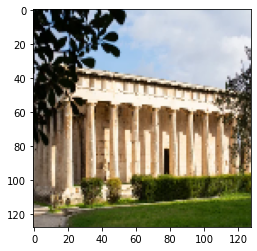

In [12]:
plt.imshow(x_train[0])

In [20]:
366864 * 3

1100592

In [19]:
model = load_model('deep_model/DenseNet.h5')

In [20]:
model